In [1]:
from Overload import Overload
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import timeit
overload = Overload()
import random
from tabulate import tabulate

In [28]:
from collections import Counter

def generate_all_to_one_model(graph):
    
    number_of_nodes = graph.number_of_nodes()
    sources = random.sample(range(number_of_nodes), number_of_nodes - 1)
    destination = random.choice(list(set(range(number_of_nodes)) - set(sources)))
    
    return sources, destination

def generate_random_failed_edges(graph, fraction):

        number_of_failed_edges = int(fraction * graph.number_of_edges())
        failed_edges = random.sample(graph.edges(), number_of_failed_edges)
        
        return failed_edges

def path_to_edges(paths):
    
    path_edges = []
    
    for path in paths:
        if path[1]:
            for i in range(len(path[2]) - 1):
                path_edges.append((path[2][i], path[2][i + 1]))
    return path_edges

def most_common(paths):
    edge_counts = Counter()
    for path in paths:
        for i in range(len(path)-1):
            edge = (min(path[i], path[i+1]), max(path[i], path[i+1]))
            edge_counts[edge] += 1
    return edge_counts.most_common(1)[0][0], edge_counts.most_common(1)[0][1]

def load_experiment(number_of_nodes):
    
    failure_rates = [0.4, 0.5, 0.6, 0.8]
    random_graph = nx.erdos_renyi_graph(number_of_nodes, 0.8)
    
    sources, destination = generate_all_to_one_model(random_graph)
    dataframe = []
    
    for rate in failure_rates:
        
        failed_edges = generate_random_failed_edges(random_graph, rate)
        print(f'Graph with "{random_graph.number_of_nodes()}" and failre rate "{rate}"')
        
        overloaded_edp = []
        edp_load = []
        
        overloaded_one= []
        one_load = []
        
        overloaded_multi = []
        multiple_load = []
        
        nodes = []
        edges = []
        failures = []
        
        for i in range(10):
            
            paths_edp = overload.compute_paths(random_graph, sources, destination, failed_edges, 'edps')
            print('Edps berechnet')
# #             print(f'EDPs paths : {paths_edp}')
            
            paths_one = overload.compute_paths(random_graph, sources, destination, failed_edges, 'onetree')
            print('One berechnet')
#             print(f'One tree paths : {paths_one}')
            
            paths_multi = overload.compute_paths(random_graph, sources, destination, failed_edges, 'multitree')
            print('Multiple berechnet')
#             print(f'Multiple trees paths : {paths_multi}')
        
            edp_to_edges = path_to_edges(paths_edp) 
            one_to_edges = path_to_edges(paths_one) 
            multi_to_edges = path_to_edges(paths_multi) 
        
            edge_edp, most_edp = most_common(edp_to_edges)
            edge_one, most_one = most_common(one_to_edges)
            edge_multi, most_multi = most_common(multi_to_edges)
        
            overloaded_edp.append(edge_edp)
            edp_load.append(most_edp)
            
            overloaded_one.append(edge_one)
            one_load.append(most_one)
            
            overloaded_multi.append(edge_multi)
            multiple_load.append(most_multi)
            
            failures.append(rate)
            nodes.append(random_graph.number_of_nodes())
            edges.append(random_graph.number_of_edges())
        
        print(f'Nodes is : {len(nodes)}')
        print(f'Edges is : {len(edges)}')
        print(f'Failure is : {len(failures)}')
        print(f'Overloaded edge edp is : {len(overloaded_edp)}')
        print(f'Overloaded edge one is : {len(overloaded_one)}')
        print(f'Overloaded edge multi is : {len(overloaded_multi)}')
        print(f'Common edp is {edp_load}')
        print(f'Common one is {one_load}')
        print(f'Common multi is {multiple_load}')
        
        df = pd.DataFrame({
            "nodes": nodes,
            "edges": edges,
            "fail": failures,
            "edp_edge": overloaded_edp,
            "c_edp": edp_load,
            "one_edge": overloaded_one,
            "c_one": one_load,
            "multi_edge": overloaded_multi,
            "c_multi": multiple_load,
        })
        
        dataframe.append(df)
    
    dataframes = pd.concat(dataframe)
    
    return dataframes

In [4]:
results = load_experiment(100)
# results.to_excel('load_all_structures.xlsx', index=False)
print(results.to_string())

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\849639337.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_edges = random.sample(graph.edges(), number_of_failed_edges)


Graph with "100" and failre rate "0.4"
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15]

EDPS : [[39, 0, 15], [39, 1, 15], [39, 4, 15], [39, 5, 15], [39, 9, 15], [39, 14, 15], [39, 17, 15], [39, 18, 15], [39, 21, 15], [39, 22, 15], [39, 23, 15], [39, 28, 15], [39, 29, 15], [39, 30, 15], [39, 31, 15], [39, 34, 15], [39, 37, 15], [39, 40, 15], [39, 41, 15], [39, 42, 15], [39, 44, 15], [39, 45, 15], [39, 46, 15], [39, 47, 15], [39, 48, 15], [39, 49, 15], [39, 50, 15], [39, 51, 15], [39, 53, 15], [39, 56, 15], [39, 57, 15], [39, 58, 15], [39, 60, 15], [39, 62, 15], [39, 63, 15], [39, 64, 15], [39, 67, 15], [39, 68, 15], [39, 69, 15], [39, 72, 15], [39, 73, 15], [39, 74, 15], [39, 75, 15], [39, 76, 15], [39, 79, 15], [39, 81, 15], [39, 82, 15], [39, 86, 15], [39, 88, 15], [39, 91, 15], [39, 92, 15], [39, 93, 15], [39, 95, 15], [39, 96, 15], [39, 99, 15], [39, 2, 16, 15], [39, 3, 19, 15], [39, 6, 20, 15], [39, 8, 24, 15], [39, 11, 35, 15], [39, 12, 26, 15], [39, 25, 43, 15], [39, 32, 55, 15], [39, 33, 80, 15], [39, 52, 59, 15], [39, 54, 87, 15], [39, 61, 90, 15], [39, 65, 98, 15

EDPS : [[68, 15], [68, 1, 15], [68, 4, 15], [68, 5, 15], [68, 9, 15], [68, 14, 15], [68, 16, 15], [68, 17, 15], [68, 18, 15], [68, 19, 15], [68, 20, 15], [68, 21, 15], [68, 26, 15], [68, 28, 15], [68, 29, 15], [68, 30, 15], [68, 34, 15], [68, 40, 15], [68, 41, 15], [68, 42, 15], [68, 43, 15], [68, 44, 15], [68, 46, 15], [68, 47, 15], [68, 49, 15], [68, 50, 15], [68, 51, 15], [68, 53, 15], [68, 57, 15], [68, 59, 15], [68, 60, 15], [68, 62, 15], [68, 63, 15], [68, 64, 15], [68, 67, 15], [68, 69, 15], [68, 72, 15], [68, 73, 15], [68, 74, 15], [68, 75, 15], [68, 76, 15], [68, 80, 15], [68, 86, 15], [68, 87, 15], [68, 88, 15], [68, 90, 15], [68, 91, 15], [68, 93, 15], [68, 98, 15], [68, 99, 15], [68, 3, 0, 15], [68, 6, 22, 15], [68, 7, 23, 15], [68, 8, 24, 15], [68, 10, 31, 15], [68, 11, 35, 15], [68, 12, 37, 15], [68, 13, 45, 15], [68, 25, 55, 15], [68, 27, 48, 15], [68, 32, 56, 15], [68, 36, 58, 15], [68, 39, 79, 15], [68, 52, 81, 15], [68, 54, 82, 15], [68, 61, 92, 15], [68, 66, 95, 15],

EDPS : [[10, 0, 15], [10, 1, 15], [10, 4, 15], [10, 5, 15], [10, 9, 15], [10, 14, 15], [10, 16, 15], [10, 17, 15], [10, 18, 15], [10, 19, 15], [10, 20, 15], [10, 21, 15], [10, 22, 15], [10, 23, 15], [10, 24, 15], [10, 28, 15], [10, 29, 15], [10, 30, 15], [10, 31, 15], [10, 34, 15], [10, 40, 15], [10, 41, 15], [10, 42, 15], [10, 43, 15], [10, 44, 15], [10, 45, 15], [10, 46, 15], [10, 47, 15], [10, 50, 15], [10, 51, 15], [10, 55, 15], [10, 56, 15], [10, 57, 15], [10, 58, 15], [10, 59, 15], [10, 60, 15], [10, 62, 15], [10, 64, 15], [10, 67, 15], [10, 68, 15], [10, 69, 15], [10, 72, 15], [10, 73, 15], [10, 74, 15], [10, 75, 15], [10, 76, 15], [10, 79, 15], [10, 81, 15], [10, 82, 15], [10, 86, 15], [10, 87, 15], [10, 90, 15], [10, 91, 15], [10, 92, 15], [10, 95, 15], [10, 96, 15], [10, 98, 15], [10, 99, 15], [10, 2, 35, 15], [10, 6, 48, 15], [10, 7, 26, 15], [10, 8, 37, 15], [10, 12, 49, 15], [10, 25, 53, 15], [10, 27, 63, 15], [10, 32, 80, 15], [10, 36, 88, 15], [10, 38, 93, 15]]
EDPS : [[

EDPS : [[67, 15], [67, 0, 15], [67, 1, 15], [67, 4, 15], [67, 5, 15], [67, 14, 15], [67, 16, 15], [67, 17, 15], [67, 18, 15], [67, 19, 15], [67, 21, 15], [67, 23, 15], [67, 28, 15], [67, 30, 15], [67, 31, 15], [67, 34, 15], [67, 37, 15], [67, 42, 15], [67, 44, 15], [67, 45, 15], [67, 47, 15], [67, 48, 15], [67, 49, 15], [67, 50, 15], [67, 51, 15], [67, 53, 15], [67, 55, 15], [67, 56, 15], [67, 57, 15], [67, 58, 15], [67, 59, 15], [67, 60, 15], [67, 62, 15], [67, 63, 15], [67, 64, 15], [67, 68, 15], [67, 69, 15], [67, 72, 15], [67, 73, 15], [67, 74, 15], [67, 75, 15], [67, 76, 15], [67, 79, 15], [67, 80, 15], [67, 81, 15], [67, 82, 15], [67, 86, 15], [67, 87, 15], [67, 88, 15], [67, 90, 15], [67, 91, 15], [67, 92, 15], [67, 96, 15], [67, 98, 15], [67, 99, 15], [67, 2, 22, 15], [67, 3, 9, 15], [67, 6, 20, 15], [67, 7, 24, 15], [67, 8, 35, 15], [67, 10, 29, 15], [67, 11, 41, 15], [67, 12, 26, 15], [67, 13, 40, 15], [67, 25, 43, 15], [67, 32, 46, 15], [67, 33, 93, 15], [67, 36, 95, 15]]
ED

EDPS : [[48, 15], [48, 0, 15], [48, 4, 15], [48, 5, 15], [48, 9, 15], [48, 14, 15], [48, 16, 15], [48, 18, 15], [48, 19, 15], [48, 20, 15], [48, 21, 15], [48, 22, 15], [48, 23, 15], [48, 26, 15], [48, 28, 15], [48, 29, 15], [48, 30, 15], [48, 31, 15], [48, 35, 15], [48, 40, 15], [48, 41, 15], [48, 43, 15], [48, 44, 15], [48, 45, 15], [48, 46, 15], [48, 49, 15], [48, 50, 15], [48, 51, 15], [48, 55, 15], [48, 57, 15], [48, 58, 15], [48, 59, 15], [48, 60, 15], [48, 62, 15], [48, 63, 15], [48, 64, 15], [48, 67, 15], [48, 69, 15], [48, 72, 15], [48, 73, 15], [48, 74, 15], [48, 75, 15], [48, 76, 15], [48, 79, 15], [48, 80, 15], [48, 81, 15], [48, 87, 15], [48, 88, 15], [48, 90, 15], [48, 95, 15], [48, 96, 15], [48, 98, 15], [48, 99, 15], [48, 2, 1, 15], [48, 6, 17, 15], [48, 7, 24, 15], [48, 11, 47, 15], [48, 12, 34, 15], [48, 27, 37, 15], [48, 32, 53, 15], [48, 33, 42, 15], [48, 36, 56, 15], [48, 38, 82, 15], [48, 39, 68, 15], [48, 52, 86, 15], [48, 54, 91, 15], [48, 61, 92, 15], [48, 66, 9

EDPS : [[75, 15], [75, 0, 15], [75, 4, 15], [75, 9, 15], [75, 14, 15], [75, 17, 15], [75, 19, 15], [75, 21, 15], [75, 22, 15], [75, 23, 15], [75, 24, 15], [75, 26, 15], [75, 28, 15], [75, 29, 15], [75, 30, 15], [75, 31, 15], [75, 34, 15], [75, 35, 15], [75, 40, 15], [75, 41, 15], [75, 43, 15], [75, 44, 15], [75, 45, 15], [75, 46, 15], [75, 47, 15], [75, 48, 15], [75, 49, 15], [75, 50, 15], [75, 51, 15], [75, 53, 15], [75, 56, 15], [75, 57, 15], [75, 58, 15], [75, 59, 15], [75, 60, 15], [75, 62, 15], [75, 63, 15], [75, 67, 15], [75, 68, 15], [75, 69, 15], [75, 72, 15], [75, 73, 15], [75, 74, 15], [75, 76, 15], [75, 79, 15], [75, 80, 15], [75, 81, 15], [75, 82, 15], [75, 86, 15], [75, 87, 15], [75, 88, 15], [75, 90, 15], [75, 91, 15], [75, 92, 15], [75, 95, 15], [75, 96, 15], [75, 98, 15], [75, 99, 15], [75, 2, 1, 15], [75, 3, 16, 15], [75, 6, 5, 15], [75, 7, 18, 15], [75, 8, 20, 15], [75, 10, 42, 15], [75, 11, 93, 15], [75, 12, 37, 15], [75, 13, 55, 15], [75, 27, 64, 15]]
EDPS : [[63, 1

EDPS : [[6, 0, 15], [6, 4, 15], [6, 5, 15], [6, 9, 15], [6, 16, 15], [6, 17, 15], [6, 18, 15], [6, 19, 15], [6, 20, 15], [6, 21, 15], [6, 22, 15], [6, 23, 15], [6, 24, 15], [6, 28, 15], [6, 29, 15], [6, 31, 15], [6, 35, 15], [6, 41, 15], [6, 43, 15], [6, 44, 15], [6, 48, 15], [6, 49, 15], [6, 50, 15], [6, 51, 15], [6, 53, 15], [6, 56, 15], [6, 57, 15], [6, 58, 15], [6, 59, 15], [6, 60, 15], [6, 62, 15], [6, 63, 15], [6, 64, 15], [6, 67, 15], [6, 68, 15], [6, 69, 15], [6, 73, 15], [6, 75, 15], [6, 76, 15], [6, 81, 15], [6, 82, 15], [6, 86, 15], [6, 87, 15], [6, 88, 15], [6, 90, 15], [6, 91, 15], [6, 92, 15], [6, 93, 15], [6, 95, 15], [6, 96, 15], [6, 98, 15], [6, 99, 15], [6, 3, 1, 15], [6, 7, 14, 15], [6, 8, 30, 15], [6, 10, 34, 15], [6, 11, 45, 15], [6, 13, 26, 15], [6, 25, 37, 15], [6, 33, 40, 15], [6, 36, 42, 15], [6, 38, 46, 15], [6, 39, 47, 15], [6, 52, 72, 15], [6, 54, 55, 15], [6, 61, 74, 15], [6, 66, 79, 15], [6, 71, 80, 15]]
EDPS : [[73, 15], [73, 0, 15], [73, 1, 15], [73, 4, 

EDPS : [[18, 15], [18, 0, 15], [18, 1, 15], [18, 5, 15], [18, 9, 15], [18, 16, 15], [18, 17, 15], [18, 19, 15], [18, 20, 15], [18, 21, 15], [18, 22, 15], [18, 23, 15], [18, 24, 15], [18, 26, 15], [18, 29, 15], [18, 30, 15], [18, 31, 15], [18, 35, 15], [18, 37, 15], [18, 40, 15], [18, 43, 15], [18, 44, 15], [18, 45, 15], [18, 46, 15], [18, 47, 15], [18, 48, 15], [18, 49, 15], [18, 50, 15], [18, 51, 15], [18, 53, 15], [18, 55, 15], [18, 56, 15], [18, 57, 15], [18, 58, 15], [18, 59, 15], [18, 60, 15], [18, 63, 15], [18, 64, 15], [18, 67, 15], [18, 68, 15], [18, 69, 15], [18, 73, 15], [18, 74, 15], [18, 76, 15], [18, 79, 15], [18, 80, 15], [18, 81, 15], [18, 86, 15], [18, 88, 15], [18, 90, 15], [18, 93, 15], [18, 95, 15], [18, 96, 15], [18, 2, 4, 15], [18, 3, 14, 15], [18, 6, 28, 15], [18, 7, 34, 15], [18, 8, 41, 15], [18, 10, 42, 15], [18, 11, 62, 15], [18, 12, 72, 15], [18, 25, 82, 15], [18, 27, 75, 15], [18, 32, 91, 15], [18, 33, 87, 15], [18, 36, 92, 15], [18, 38, 98, 15], [18, 39, 99,

EDPS : [[9, 15], [9, 0, 15], [9, 1, 15], [9, 4, 15], [9, 5, 15], [9, 14, 15], [9, 16, 15], [9, 18, 15], [9, 19, 15], [9, 21, 15], [9, 22, 15], [9, 23, 15], [9, 24, 15], [9, 26, 15], [9, 29, 15], [9, 30, 15], [9, 31, 15], [9, 34, 15], [9, 37, 15], [9, 40, 15], [9, 41, 15], [9, 43, 15], [9, 44, 15], [9, 46, 15], [9, 47, 15], [9, 48, 15], [9, 49, 15], [9, 50, 15], [9, 51, 15], [9, 53, 15], [9, 55, 15], [9, 56, 15], [9, 57, 15], [9, 58, 15], [9, 59, 15], [9, 68, 15], [9, 69, 15], [9, 73, 15], [9, 74, 15], [9, 75, 15], [9, 76, 15], [9, 79, 15], [9, 80, 15], [9, 81, 15], [9, 82, 15], [9, 86, 15], [9, 87, 15], [9, 88, 15], [9, 90, 15], [9, 91, 15], [9, 92, 15], [9, 93, 15], [9, 95, 15], [9, 98, 15], [9, 99, 15], [9, 3, 17, 15], [9, 6, 20, 15], [9, 7, 28, 15], [9, 8, 35, 15], [9, 10, 42, 15], [9, 11, 45, 15], [9, 12, 60, 15], [9, 13, 62, 15], [9, 25, 63, 15], [9, 32, 64, 15], [9, 33, 67, 15], [9, 36, 72, 15], [9, 38, 96, 15]]
EDPS : [[81, 15], [81, 0, 15], [81, 4, 15], [81, 5, 15], [81, 9, 15]

EDPS : [[93, 15], [93, 0, 15], [93, 1, 15], [93, 5, 15], [93, 9, 15], [93, 14, 15], [93, 16, 15], [93, 17, 15], [93, 18, 15], [93, 19, 15], [93, 20, 15], [93, 21, 15], [93, 22, 15], [93, 26, 15], [93, 28, 15], [93, 30, 15], [93, 31, 15], [93, 34, 15], [93, 40, 15], [93, 41, 15], [93, 43, 15], [93, 44, 15], [93, 45, 15], [93, 46, 15], [93, 49, 15], [93, 50, 15], [93, 53, 15], [93, 55, 15], [93, 56, 15], [93, 57, 15], [93, 58, 15], [93, 59, 15], [93, 60, 15], [93, 62, 15], [93, 63, 15], [93, 64, 15], [93, 68, 15], [93, 73, 15], [93, 74, 15], [93, 76, 15], [93, 79, 15], [93, 80, 15], [93, 81, 15], [93, 86, 15], [93, 87, 15], [93, 88, 15], [93, 91, 15], [93, 92, 15], [93, 99, 15], [93, 2, 4, 15], [93, 6, 23, 15], [93, 7, 24, 15], [93, 11, 29, 15], [93, 12, 35, 15], [93, 13, 37, 15], [93, 25, 42, 15], [93, 27, 47, 15], [93, 32, 48, 15], [93, 33, 67, 15], [93, 38, 51, 15], [93, 39, 69, 15], [93, 52, 72, 15], [93, 54, 75, 15], [93, 61, 82, 15], [93, 66, 90, 15], [93, 70, 95, 15], [93, 71, 96,

EDPS : [[34, 15], [34, 4, 15], [34, 9, 15], [34, 14, 15], [34, 16, 15], [34, 17, 15], [34, 20, 15], [34, 21, 15], [34, 22, 15], [34, 23, 15], [34, 24, 15], [34, 26, 15], [34, 28, 15], [34, 29, 15], [34, 30, 15], [34, 31, 15], [34, 35, 15], [34, 40, 15], [34, 41, 15], [34, 43, 15], [34, 44, 15], [34, 46, 15], [34, 47, 15], [34, 51, 15], [34, 53, 15], [34, 55, 15], [34, 56, 15], [34, 57, 15], [34, 58, 15], [34, 59, 15], [34, 60, 15], [34, 62, 15], [34, 63, 15], [34, 64, 15], [34, 67, 15], [34, 68, 15], [34, 69, 15], [34, 75, 15], [34, 76, 15], [34, 79, 15], [34, 80, 15], [34, 81, 15], [34, 82, 15], [34, 86, 15], [34, 87, 15], [34, 88, 15], [34, 90, 15], [34, 91, 15], [34, 92, 15], [34, 93, 15], [34, 95, 15], [34, 99, 15], [34, 2, 0, 15], [34, 7, 1, 15], [34, 8, 18, 15], [34, 10, 5, 15], [34, 12, 19, 15], [34, 25, 37, 15], [34, 27, 42, 15], [34, 32, 48, 15], [34, 33, 45, 15], [34, 36, 49, 15], [34, 38, 50, 15], [34, 39, 72, 15], [34, 52, 73, 15], [34, 54, 74, 15], [34, 61, 98, 15], [34, 6

EDPS : [[3, 0, 15], [3, 1, 15], [3, 4, 15], [3, 9, 15], [3, 14, 15], [3, 16, 15], [3, 17, 15], [3, 18, 15], [3, 19, 15], [3, 20, 15], [3, 22, 15], [3, 24, 15], [3, 26, 15], [3, 28, 15], [3, 29, 15], [3, 30, 15], [3, 31, 15], [3, 35, 15], [3, 37, 15], [3, 41, 15], [3, 42, 15], [3, 43, 15], [3, 44, 15], [3, 45, 15], [3, 46, 15], [3, 47, 15], [3, 49, 15], [3, 50, 15], [3, 51, 15], [3, 53, 15], [3, 55, 15], [3, 56, 15], [3, 57, 15], [3, 58, 15], [3, 60, 15], [3, 64, 15], [3, 67, 15], [3, 68, 15], [3, 69, 15], [3, 72, 15], [3, 73, 15], [3, 75, 15], [3, 76, 15], [3, 79, 15], [3, 80, 15], [3, 81, 15], [3, 82, 15], [3, 86, 15], [3, 87, 15], [3, 88, 15], [3, 90, 15], [3, 91, 15], [3, 96, 15], [3, 98, 15], [3, 2, 21, 15], [3, 6, 5, 15], [3, 8, 23, 15], [3, 11, 48, 15], [3, 12, 34, 15], [3, 13, 40, 15], [3, 25, 59, 15], [3, 27, 62, 15], [3, 32, 74, 15], [3, 33, 63, 15], [3, 36, 92, 15], [3, 38, 93, 15], [3, 39, 95, 15], [3, 54, 99, 15]]
EDPS : [[88, 15], [88, 0, 15], [88, 4, 15], [88, 5, 15], [88

EDPS : [[4, 15], [4, 0, 15], [4, 1, 15], [4, 9, 15], [4, 14, 15], [4, 16, 15], [4, 19, 15], [4, 20, 15], [4, 21, 15], [4, 22, 15], [4, 24, 15], [4, 26, 15], [4, 28, 15], [4, 29, 15], [4, 30, 15], [4, 31, 15], [4, 34, 15], [4, 35, 15], [4, 37, 15], [4, 41, 15], [4, 42, 15], [4, 43, 15], [4, 44, 15], [4, 48, 15], [4, 49, 15], [4, 50, 15], [4, 51, 15], [4, 53, 15], [4, 55, 15], [4, 56, 15], [4, 57, 15], [4, 59, 15], [4, 60, 15], [4, 62, 15], [4, 64, 15], [4, 67, 15], [4, 68, 15], [4, 69, 15], [4, 73, 15], [4, 74, 15], [4, 75, 15], [4, 76, 15], [4, 79, 15], [4, 80, 15], [4, 81, 15], [4, 87, 15], [4, 88, 15], [4, 90, 15], [4, 91, 15], [4, 92, 15], [4, 95, 15], [4, 96, 15], [4, 98, 15], [4, 99, 15], [4, 2, 17, 15], [4, 3, 18, 15], [4, 6, 5, 15], [4, 7, 23, 15], [4, 8, 40, 15], [4, 10, 45, 15], [4, 11, 46, 15], [4, 12, 47, 15], [4, 13, 58, 15], [4, 25, 63, 15], [4, 27, 72, 15], [4, 32, 93, 15], [4, 33, 82, 15], [4, 36, 86, 15]]
EDPS : [[61, 0, 15], [61, 1, 15], [61, 4, 15], [61, 5, 15], [61, 

EDPS : [[98, 15], [98, 0, 15], [98, 1, 15], [98, 4, 15], [98, 5, 15], [98, 9, 15], [98, 14, 15], [98, 16, 15], [98, 19, 15], [98, 20, 15], [98, 21, 15], [98, 22, 15], [98, 23, 15], [98, 26, 15], [98, 30, 15], [98, 31, 15], [98, 35, 15], [98, 37, 15], [98, 40, 15], [98, 41, 15], [98, 42, 15], [98, 43, 15], [98, 44, 15], [98, 45, 15], [98, 47, 15], [98, 48, 15], [98, 49, 15], [98, 51, 15], [98, 53, 15], [98, 55, 15], [98, 56, 15], [98, 57, 15], [98, 58, 15], [98, 59, 15], [98, 60, 15], [98, 62, 15], [98, 63, 15], [98, 64, 15], [98, 67, 15], [98, 68, 15], [98, 69, 15], [98, 72, 15], [98, 73, 15], [98, 74, 15], [98, 75, 15], [98, 76, 15], [98, 79, 15], [98, 81, 15], [98, 82, 15], [98, 86, 15], [98, 87, 15], [98, 88, 15], [98, 92, 15], [98, 95, 15], [98, 96, 15], [98, 99, 15], [98, 3, 17, 15], [98, 6, 18, 15], [98, 7, 24, 15], [98, 8, 34, 15], [98, 10, 28, 15], [98, 11, 29, 15], [98, 12, 46, 15], [98, 13, 80, 15], [98, 25, 50, 15], [98, 32, 90, 15], [98, 36, 91, 15], [98, 38, 93, 15]]
EDPS 

EDPS : [[22, 15], [22, 0, 15], [22, 1, 15], [22, 4, 15], [22, 9, 15], [22, 14, 15], [22, 16, 15], [22, 17, 15], [22, 18, 15], [22, 19, 15], [22, 20, 15], [22, 23, 15], [22, 24, 15], [22, 26, 15], [22, 28, 15], [22, 30, 15], [22, 31, 15], [22, 34, 15], [22, 35, 15], [22, 37, 15], [22, 40, 15], [22, 42, 15], [22, 45, 15], [22, 47, 15], [22, 48, 15], [22, 49, 15], [22, 50, 15], [22, 51, 15], [22, 53, 15], [22, 55, 15], [22, 56, 15], [22, 59, 15], [22, 60, 15], [22, 63, 15], [22, 69, 15], [22, 72, 15], [22, 73, 15], [22, 75, 15], [22, 76, 15], [22, 79, 15], [22, 80, 15], [22, 81, 15], [22, 82, 15], [22, 86, 15], [22, 88, 15], [22, 90, 15], [22, 91, 15], [22, 92, 15], [22, 93, 15], [22, 95, 15], [22, 96, 15], [22, 98, 15], [22, 99, 15], [22, 2, 21, 15], [22, 3, 29, 15], [22, 6, 5, 15], [22, 8, 41, 15], [22, 10, 43, 15], [22, 11, 44, 15], [22, 12, 46, 15], [22, 13, 57, 15], [22, 27, 58, 15], [22, 32, 62, 15], [22, 33, 64, 15], [22, 38, 67, 15], [22, 39, 68, 15], [22, 52, 74, 15], [22, 54, 87

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[50, 15], [50, 0, 15], [50, 1, 15], [50, 4, 15], [50, 5, 15], [50, 9, 15], [50, 14, 15], [50, 16, 15], [50, 17, 15], [50, 18, 15], [50, 19, 15], [50, 21, 15], [50, 22, 15], [50, 23, 15], [50, 26, 15], [50, 28, 15], [50, 30, 15], [50, 31, 15], [50, 35, 15], [50, 37, 15], [50, 40, 15], [50, 41, 15], [50, 42, 15], [50, 44, 15], [50, 46, 15], [50, 48, 15], [50, 49, 15], [50, 51, 15], [50, 53, 15], [50, 55, 15], [50, 56, 15], [50, 57, 15], [50, 59, 15], [50, 60, 15], [50, 62, 15], [50, 63, 15], [50, 67, 15], [50, 68, 15], [50, 72, 15], [50, 73, 15], [50, 74, 15], [50, 75, 15], [50, 76, 15], [50, 79, 15], [50, 80, 15], [50, 86, 15], [50, 87, 15], [50, 88, 15], [50, 90, 15], [50, 91, 15], [50, 92, 15], [50, 93, 15], [50, 95, 15], [50, 2, 24, 15], [50, 3, 20, 15], [50, 6, 29, 15], [50, 7, 34, 15], [50, 8, 45, 15], [50, 10, 43, 15], [50, 11, 47, 15], [50, 12, 58, 15], [50, 25, 64, 15], [50, 27, 82, 15], [50, 32, 81, 15], [50, 36, 69, 15], [50, 38, 96, 15], [50, 39, 99, 15], [50, 52, 98,

EDPS : [[34, 15], [34, 4, 15], [34, 9, 15], [34, 14, 15], [34, 16, 15], [34, 17, 15], [34, 20, 15], [34, 21, 15], [34, 22, 15], [34, 23, 15], [34, 24, 15], [34, 26, 15], [34, 28, 15], [34, 29, 15], [34, 30, 15], [34, 31, 15], [34, 35, 15], [34, 40, 15], [34, 41, 15], [34, 43, 15], [34, 44, 15], [34, 46, 15], [34, 47, 15], [34, 51, 15], [34, 53, 15], [34, 55, 15], [34, 56, 15], [34, 57, 15], [34, 58, 15], [34, 59, 15], [34, 60, 15], [34, 62, 15], [34, 63, 15], [34, 64, 15], [34, 67, 15], [34, 68, 15], [34, 69, 15], [34, 75, 15], [34, 76, 15], [34, 79, 15], [34, 80, 15], [34, 81, 15], [34, 82, 15], [34, 86, 15], [34, 87, 15], [34, 88, 15], [34, 90, 15], [34, 91, 15], [34, 92, 15], [34, 93, 15], [34, 95, 15], [34, 99, 15], [34, 2, 0, 15], [34, 7, 1, 15], [34, 8, 18, 15], [34, 10, 5, 15], [34, 12, 19, 15], [34, 25, 37, 15], [34, 27, 42, 15], [34, 32, 48, 15], [34, 33, 45, 15], [34, 36, 49, 15], [34, 38, 50, 15], [34, 39, 72, 15], [34, 52, 73, 15], [34, 54, 74, 15], [34, 61, 98, 15], [34, 6

EDPS : [[3, 0, 15], [3, 1, 15], [3, 4, 15], [3, 9, 15], [3, 14, 15], [3, 16, 15], [3, 17, 15], [3, 18, 15], [3, 19, 15], [3, 20, 15], [3, 22, 15], [3, 24, 15], [3, 26, 15], [3, 28, 15], [3, 29, 15], [3, 30, 15], [3, 31, 15], [3, 35, 15], [3, 37, 15], [3, 41, 15], [3, 42, 15], [3, 43, 15], [3, 44, 15], [3, 45, 15], [3, 46, 15], [3, 47, 15], [3, 49, 15], [3, 50, 15], [3, 51, 15], [3, 53, 15], [3, 55, 15], [3, 56, 15], [3, 57, 15], [3, 58, 15], [3, 60, 15], [3, 64, 15], [3, 67, 15], [3, 68, 15], [3, 69, 15], [3, 72, 15], [3, 73, 15], [3, 75, 15], [3, 76, 15], [3, 79, 15], [3, 80, 15], [3, 81, 15], [3, 82, 15], [3, 86, 15], [3, 87, 15], [3, 88, 15], [3, 90, 15], [3, 91, 15], [3, 96, 15], [3, 98, 15], [3, 2, 21, 15], [3, 6, 5, 15], [3, 8, 23, 15], [3, 11, 48, 15], [3, 12, 34, 15], [3, 13, 40, 15], [3, 25, 59, 15], [3, 27, 62, 15], [3, 32, 74, 15], [3, 33, 63, 15], [3, 36, 92, 15], [3, 38, 93, 15], [3, 39, 95, 15], [3, 54, 99, 15]]
EDPS : [[88, 15], [88, 0, 15], [88, 4, 15], [88, 5, 15], [88

EDPS : [[61, 0, 15], [61, 1, 15], [61, 4, 15], [61, 5, 15], [61, 9, 15], [61, 16, 15], [61, 18, 15], [61, 19, 15], [61, 20, 15], [61, 22, 15], [61, 23, 15], [61, 26, 15], [61, 28, 15], [61, 29, 15], [61, 30, 15], [61, 31, 15], [61, 34, 15], [61, 35, 15], [61, 37, 15], [61, 40, 15], [61, 41, 15], [61, 42, 15], [61, 43, 15], [61, 44, 15], [61, 45, 15], [61, 47, 15], [61, 48, 15], [61, 49, 15], [61, 50, 15], [61, 51, 15], [61, 53, 15], [61, 55, 15], [61, 56, 15], [61, 57, 15], [61, 59, 15], [61, 60, 15], [61, 62, 15], [61, 64, 15], [61, 67, 15], [61, 68, 15], [61, 73, 15], [61, 74, 15], [61, 76, 15], [61, 79, 15], [61, 80, 15], [61, 81, 15], [61, 82, 15], [61, 87, 15], [61, 90, 15], [61, 91, 15], [61, 92, 15], [61, 93, 15], [61, 98, 15], [61, 2, 17, 15], [61, 6, 21, 15], [61, 10, 14, 15], [61, 11, 24, 15], [61, 12, 46, 15], [61, 13, 58, 15], [61, 25, 63, 15], [61, 27, 72, 15], [61, 32, 75, 15], [61, 33, 69, 15], [61, 36, 86, 15], [61, 38, 88, 15], [61, 39, 95, 15], [61, 52, 96, 15], [61, 

EDPS : [[25, 0, 15], [25, 1, 15], [25, 4, 15], [25, 5, 15], [25, 9, 15], [25, 14, 15], [25, 16, 15], [25, 18, 15], [25, 19, 15], [25, 20, 15], [25, 21, 15], [25, 23, 15], [25, 26, 15], [25, 28, 15], [25, 29, 15], [25, 30, 15], [25, 31, 15], [25, 34, 15], [25, 35, 15], [25, 37, 15], [25, 40, 15], [25, 41, 15], [25, 42, 15], [25, 43, 15], [25, 44, 15], [25, 45, 15], [25, 46, 15], [25, 49, 15], [25, 50, 15], [25, 53, 15], [25, 55, 15], [25, 56, 15], [25, 57, 15], [25, 58, 15], [25, 59, 15], [25, 62, 15], [25, 63, 15], [25, 64, 15], [25, 67, 15], [25, 68, 15], [25, 69, 15], [25, 72, 15], [25, 73, 15], [25, 74, 15], [25, 76, 15], [25, 79, 15], [25, 80, 15], [25, 81, 15], [25, 82, 15], [25, 86, 15], [25, 87, 15], [25, 88, 15], [25, 90, 15], [25, 91, 15], [25, 92, 15], [25, 93, 15], [25, 96, 15], [25, 98, 15], [25, 99, 15], [25, 2, 17, 15], [25, 3, 22, 15], [25, 6, 24, 15], [25, 7, 48, 15], [25, 10, 47, 15], [25, 11, 51, 15], [25, 12, 60, 15], [25, 27, 75, 15], [25, 32, 95, 15]]
EDPS : [[75, 

EDPS : [[42, 15], [42, 1, 15], [42, 4, 15], [42, 5, 15], [42, 14, 15], [42, 16, 15], [42, 17, 15], [42, 19, 15], [42, 20, 15], [42, 22, 15], [42, 23, 15], [42, 24, 15], [42, 26, 15], [42, 28, 15], [42, 29, 15], [42, 30, 15], [42, 31, 15], [42, 35, 15], [42, 41, 15], [42, 43, 15], [42, 45, 15], [42, 46, 15], [42, 47, 15], [42, 49, 15], [42, 50, 15], [42, 51, 15], [42, 55, 15], [42, 56, 15], [42, 57, 15], [42, 59, 15], [42, 60, 15], [42, 62, 15], [42, 63, 15], [42, 67, 15], [42, 68, 15], [42, 69, 15], [42, 72, 15], [42, 73, 15], [42, 74, 15], [42, 79, 15], [42, 80, 15], [42, 81, 15], [42, 82, 15], [42, 86, 15], [42, 87, 15], [42, 88, 15], [42, 90, 15], [42, 92, 15], [42, 95, 15], [42, 96, 15], [42, 98, 15], [42, 2, 0, 15], [42, 3, 9, 15], [42, 7, 18, 15], [42, 8, 21, 15], [42, 10, 34, 15], [42, 12, 37, 15], [42, 25, 40, 15], [42, 27, 48, 15], [42, 33, 44, 15], [42, 36, 58, 15], [42, 38, 53, 15], [42, 39, 64, 15], [42, 52, 75, 15], [42, 54, 91, 15], [42, 61, 76, 15], [42, 66, 93, 15], [42

EDPS : [[84, 0, 15], [84, 1, 15], [84, 4, 15], [84, 5, 15], [84, 9, 15], [84, 14, 15], [84, 16, 15], [84, 19, 15], [84, 20, 15], [84, 21, 15], [84, 22, 15], [84, 23, 15], [84, 24, 15], [84, 26, 15], [84, 28, 15], [84, 29, 15], [84, 30, 15], [84, 31, 15], [84, 34, 15], [84, 35, 15], [84, 37, 15], [84, 40, 15], [84, 41, 15], [84, 42, 15], [84, 43, 15], [84, 44, 15], [84, 45, 15], [84, 46, 15], [84, 47, 15], [84, 48, 15], [84, 49, 15], [84, 50, 15], [84, 53, 15], [84, 55, 15], [84, 56, 15], [84, 57, 15], [84, 58, 15], [84, 59, 15], [84, 60, 15], [84, 63, 15], [84, 64, 15], [84, 67, 15], [84, 68, 15], [84, 69, 15], [84, 72, 15], [84, 73, 15], [84, 75, 15], [84, 76, 15], [84, 79, 15], [84, 80, 15], [84, 81, 15], [84, 86, 15], [84, 87, 15], [84, 88, 15], [84, 90, 15], [84, 91, 15], [84, 92, 15], [84, 93, 15], [84, 95, 15], [84, 98, 15], [84, 99, 15], [84, 2, 17, 15], [84, 3, 18, 15], [84, 6, 51, 15], [84, 7, 62, 15], [84, 8, 74, 15], [84, 10, 82, 15], [84, 12, 96, 15]]
EDPS : [[90, 15], [90,

EDPS : [[5, 15], [5, 0, 15], [5, 9, 15], [5, 14, 15], [5, 17, 15], [5, 18, 15], [5, 20, 15], [5, 21, 15], [5, 23, 15], [5, 24, 15], [5, 26, 15], [5, 29, 15], [5, 30, 15], [5, 31, 15], [5, 40, 15], [5, 41, 15], [5, 42, 15], [5, 43, 15], [5, 44, 15], [5, 45, 15], [5, 47, 15], [5, 48, 15], [5, 49, 15], [5, 50, 15], [5, 51, 15], [5, 53, 15], [5, 55, 15], [5, 56, 15], [5, 57, 15], [5, 59, 15], [5, 60, 15], [5, 62, 15], [5, 63, 15], [5, 64, 15], [5, 67, 15], [5, 68, 15], [5, 69, 15], [5, 72, 15], [5, 74, 15], [5, 76, 15], [5, 79, 15], [5, 80, 15], [5, 81, 15], [5, 82, 15], [5, 87, 15], [5, 88, 15], [5, 90, 15], [5, 91, 15], [5, 93, 15], [5, 95, 15], [5, 96, 15], [5, 98, 15], [5, 6, 4, 15], [5, 10, 1, 15], [5, 11, 16, 15], [5, 12, 19, 15], [5, 13, 22, 15], [5, 25, 28, 15], [5, 32, 34, 15], [5, 33, 35, 15], [5, 36, 37, 15], [5, 39, 46, 15], [5, 52, 73, 15], [5, 54, 58, 15], [5, 61, 92, 15], [5, 65, 86, 15], [5, 70, 75, 15], [5, 83, 99, 15]]
EDPS : [[47, 15], [47, 0, 15], [47, 1, 15], [47, 5, 1

EDPS : [[19, 15], [19, 0, 15], [19, 1, 15], [19, 4, 15], [19, 9, 15], [19, 16, 15], [19, 17, 15], [19, 18, 15], [19, 20, 15], [19, 21, 15], [19, 22, 15], [19, 23, 15], [19, 24, 15], [19, 28, 15], [19, 35, 15], [19, 37, 15], [19, 40, 15], [19, 41, 15], [19, 42, 15], [19, 43, 15], [19, 44, 15], [19, 45, 15], [19, 46, 15], [19, 47, 15], [19, 48, 15], [19, 49, 15], [19, 50, 15], [19, 51, 15], [19, 57, 15], [19, 58, 15], [19, 59, 15], [19, 60, 15], [19, 62, 15], [19, 63, 15], [19, 64, 15], [19, 67, 15], [19, 68, 15], [19, 72, 15], [19, 73, 15], [19, 74, 15], [19, 75, 15], [19, 79, 15], [19, 80, 15], [19, 81, 15], [19, 82, 15], [19, 86, 15], [19, 87, 15], [19, 90, 15], [19, 91, 15], [19, 92, 15], [19, 93, 15], [19, 96, 15], [19, 98, 15], [19, 99, 15], [19, 2, 30, 15], [19, 3, 14, 15], [19, 6, 5, 15], [19, 7, 26, 15], [19, 8, 31, 15], [19, 10, 29, 15], [19, 12, 34, 15], [19, 13, 55, 15], [19, 25, 53, 15], [19, 32, 56, 15], [19, 33, 69, 15], [19, 36, 76, 15], [19, 38, 88, 15], [19, 52, 95, 15]

EDPS : [[26, 15], [26, 0, 15], [26, 1, 15], [26, 4, 15], [26, 5, 15], [26, 9, 15], [26, 16, 15], [26, 17, 15], [26, 18, 15], [26, 20, 15], [26, 21, 15], [26, 22, 15], [26, 24, 15], [26, 28, 15], [26, 29, 15], [26, 30, 15], [26, 31, 15], [26, 34, 15], [26, 35, 15], [26, 37, 15], [26, 42, 15], [26, 43, 15], [26, 44, 15], [26, 45, 15], [26, 47, 15], [26, 48, 15], [26, 49, 15], [26, 50, 15], [26, 51, 15], [26, 53, 15], [26, 55, 15], [26, 56, 15], [26, 57, 15], [26, 58, 15], [26, 59, 15], [26, 62, 15], [26, 68, 15], [26, 69, 15], [26, 72, 15], [26, 73, 15], [26, 74, 15], [26, 75, 15], [26, 76, 15], [26, 79, 15], [26, 81, 15], [26, 82, 15], [26, 86, 15], [26, 87, 15], [26, 88, 15], [26, 91, 15], [26, 93, 15], [26, 95, 15], [26, 96, 15], [26, 98, 15], [26, 3, 14, 15], [26, 7, 19, 15], [26, 12, 46, 15], [26, 13, 23, 15], [26, 25, 40, 15], [26, 27, 41, 15], [26, 33, 63, 15], [26, 36, 60, 15], [26, 38, 64, 15], [26, 52, 67, 15], [26, 54, 80, 15], [26, 61, 90, 15], [26, 66, 92, 15], [26, 70, 99, 

EDPS : [[35, 15], [35, 0, 15], [35, 1, 15], [35, 4, 15], [35, 14, 15], [35, 17, 15], [35, 18, 15], [35, 19, 15], [35, 20, 15], [35, 21, 15], [35, 22, 15], [35, 23, 15], [35, 26, 15], [35, 28, 15], [35, 29, 15], [35, 30, 15], [35, 31, 15], [35, 34, 15], [35, 40, 15], [35, 41, 15], [35, 42, 15], [35, 44, 15], [35, 46, 15], [35, 48, 15], [35, 49, 15], [35, 50, 15], [35, 51, 15], [35, 53, 15], [35, 55, 15], [35, 56, 15], [35, 58, 15], [35, 59, 15], [35, 60, 15], [35, 62, 15], [35, 63, 15], [35, 64, 15], [35, 72, 15], [35, 73, 15], [35, 74, 15], [35, 75, 15], [35, 79, 15], [35, 81, 15], [35, 86, 15], [35, 88, 15], [35, 90, 15], [35, 91, 15], [35, 92, 15], [35, 95, 15], [35, 98, 15], [35, 99, 15], [35, 2, 16, 15], [35, 3, 9, 15], [35, 6, 5, 15], [35, 7, 24, 15], [35, 8, 37, 15], [35, 11, 45, 15], [35, 12, 43, 15], [35, 13, 47, 15], [35, 25, 57, 15], [35, 33, 67, 15], [35, 36, 68, 15], [35, 54, 69, 15], [35, 61, 76, 15], [35, 70, 82, 15], [35, 71, 80, 15], [35, 77, 87, 15], [35, 78, 96, 15], 

EDPS : [[76, 15], [76, 0, 15], [76, 4, 15], [76, 5, 15], [76, 9, 15], [76, 14, 15], [76, 16, 15], [76, 17, 15], [76, 18, 15], [76, 20, 15], [76, 21, 15], [76, 22, 15], [76, 24, 15], [76, 26, 15], [76, 28, 15], [76, 34, 15], [76, 37, 15], [76, 41, 15], [76, 43, 15], [76, 44, 15], [76, 45, 15], [76, 46, 15], [76, 48, 15], [76, 49, 15], [76, 50, 15], [76, 51, 15], [76, 55, 15], [76, 56, 15], [76, 57, 15], [76, 58, 15], [76, 59, 15], [76, 62, 15], [76, 63, 15], [76, 64, 15], [76, 67, 15], [76, 68, 15], [76, 69, 15], [76, 72, 15], [76, 73, 15], [76, 75, 15], [76, 79, 15], [76, 80, 15], [76, 82, 15], [76, 86, 15], [76, 90, 15], [76, 91, 15], [76, 92, 15], [76, 93, 15], [76, 95, 15], [76, 96, 15], [76, 98, 15], [76, 99, 15], [76, 2, 1, 15], [76, 3, 19, 15], [76, 6, 23, 15], [76, 7, 29, 15], [76, 8, 30, 15], [76, 10, 31, 15], [76, 11, 35, 15], [76, 13, 40, 15], [76, 25, 42, 15], [76, 27, 47, 15], [76, 32, 53, 15], [76, 33, 81, 15], [76, 36, 60, 15], [76, 38, 74, 15], [76, 39, 88, 15], [76, 61,

EDPS : [[23, 15], [23, 0, 15], [23, 1, 15], [23, 5, 15], [23, 9, 15], [23, 14, 15], [23, 16, 15], [23, 17, 15], [23, 18, 15], [23, 19, 15], [23, 20, 15], [23, 21, 15], [23, 22, 15], [23, 24, 15], [23, 28, 15], [23, 29, 15], [23, 31, 15], [23, 34, 15], [23, 35, 15], [23, 37, 15], [23, 41, 15], [23, 42, 15], [23, 43, 15], [23, 45, 15], [23, 46, 15], [23, 47, 15], [23, 48, 15], [23, 49, 15], [23, 50, 15], [23, 51, 15], [23, 53, 15], [23, 55, 15], [23, 56, 15], [23, 57, 15], [23, 58, 15], [23, 59, 15], [23, 60, 15], [23, 62, 15], [23, 63, 15], [23, 64, 15], [23, 67, 15], [23, 69, 15], [23, 72, 15], [23, 73, 15], [23, 74, 15], [23, 75, 15], [23, 79, 15], [23, 80, 15], [23, 81, 15], [23, 82, 15], [23, 86, 15], [23, 87, 15], [23, 88, 15], [23, 90, 15], [23, 91, 15], [23, 95, 15], [23, 96, 15], [23, 98, 15], [23, 99, 15], [23, 2, 4, 15], [23, 6, 44, 15], [23, 7, 26, 15], [23, 8, 30, 15], [23, 10, 40, 15], [23, 13, 68, 15], [23, 25, 76, 15], [23, 27, 92, 15], [23, 38, 93, 15]]
EDPS : [[98, 15],

EDPS : [[22, 15], [22, 0, 15], [22, 1, 15], [22, 4, 15], [22, 9, 15], [22, 14, 15], [22, 16, 15], [22, 17, 15], [22, 18, 15], [22, 19, 15], [22, 20, 15], [22, 23, 15], [22, 24, 15], [22, 26, 15], [22, 28, 15], [22, 30, 15], [22, 31, 15], [22, 34, 15], [22, 35, 15], [22, 37, 15], [22, 40, 15], [22, 42, 15], [22, 45, 15], [22, 47, 15], [22, 48, 15], [22, 49, 15], [22, 50, 15], [22, 51, 15], [22, 53, 15], [22, 55, 15], [22, 56, 15], [22, 59, 15], [22, 60, 15], [22, 63, 15], [22, 69, 15], [22, 72, 15], [22, 73, 15], [22, 75, 15], [22, 76, 15], [22, 79, 15], [22, 80, 15], [22, 81, 15], [22, 82, 15], [22, 86, 15], [22, 88, 15], [22, 90, 15], [22, 91, 15], [22, 92, 15], [22, 93, 15], [22, 95, 15], [22, 96, 15], [22, 98, 15], [22, 99, 15], [22, 2, 21, 15], [22, 3, 29, 15], [22, 6, 5, 15], [22, 8, 41, 15], [22, 10, 43, 15], [22, 11, 44, 15], [22, 12, 46, 15], [22, 13, 57, 15], [22, 27, 58, 15], [22, 32, 62, 15], [22, 33, 64, 15], [22, 38, 67, 15], [22, 39, 68, 15], [22, 52, 74, 15], [22, 54, 87

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[93, 15], [93, 0, 15], [93, 1, 15], [93, 5, 15], [93, 9, 15], [93, 14, 15], [93, 16, 15], [93, 17, 15], [93, 18, 15], [93, 19, 15], [93, 20, 15], [93, 21, 15], [93, 22, 15], [93, 26, 15], [93, 28, 15], [93, 30, 15], [93, 31, 15], [93, 34, 15], [93, 40, 15], [93, 41, 15], [93, 43, 15], [93, 44, 15], [93, 45, 15], [93, 46, 15], [93, 49, 15], [93, 50, 15], [93, 53, 15], [93, 55, 15], [93, 56, 15], [93, 57, 15], [93, 58, 15], [93, 59, 15], [93, 60, 15], [93, 62, 15], [93, 63, 15], [93, 64, 15], [93, 68, 15], [93, 73, 15], [93, 74, 15], [93, 76, 15], [93, 79, 15], [93, 80, 15], [93, 81, 15], [93, 86, 15], [93, 87, 15], [93, 88, 15], [93, 91, 15], [93, 92, 15], [93, 99, 15], [93, 2, 4, 15], [93, 6, 23, 15], [93, 7, 24, 15], [93, 11, 29, 15], [93, 12, 35, 15], [93, 13, 37, 15], [93, 25, 42, 15], [93, 27, 47, 15], [93, 32, 48, 15], [93, 33, 67, 15], [93, 38, 51, 15], [93, 39, 69, 15], [93, 52, 72, 15], [93, 54, 75, 15], [93, 61, 82, 15], [93, 66, 90, 15], [93, 70, 95, 15], [93, 71, 96,

EDPS : [[34, 15], [34, 4, 15], [34, 9, 15], [34, 14, 15], [34, 16, 15], [34, 17, 15], [34, 20, 15], [34, 21, 15], [34, 22, 15], [34, 23, 15], [34, 24, 15], [34, 26, 15], [34, 28, 15], [34, 29, 15], [34, 30, 15], [34, 31, 15], [34, 35, 15], [34, 40, 15], [34, 41, 15], [34, 43, 15], [34, 44, 15], [34, 46, 15], [34, 47, 15], [34, 51, 15], [34, 53, 15], [34, 55, 15], [34, 56, 15], [34, 57, 15], [34, 58, 15], [34, 59, 15], [34, 60, 15], [34, 62, 15], [34, 63, 15], [34, 64, 15], [34, 67, 15], [34, 68, 15], [34, 69, 15], [34, 75, 15], [34, 76, 15], [34, 79, 15], [34, 80, 15], [34, 81, 15], [34, 82, 15], [34, 86, 15], [34, 87, 15], [34, 88, 15], [34, 90, 15], [34, 91, 15], [34, 92, 15], [34, 93, 15], [34, 95, 15], [34, 99, 15], [34, 2, 0, 15], [34, 7, 1, 15], [34, 8, 18, 15], [34, 10, 5, 15], [34, 12, 19, 15], [34, 25, 37, 15], [34, 27, 42, 15], [34, 32, 48, 15], [34, 33, 45, 15], [34, 36, 49, 15], [34, 38, 50, 15], [34, 39, 72, 15], [34, 52, 73, 15], [34, 54, 74, 15], [34, 61, 98, 15], [34, 6

EDPS : [[3, 0, 15], [3, 1, 15], [3, 4, 15], [3, 9, 15], [3, 14, 15], [3, 16, 15], [3, 17, 15], [3, 18, 15], [3, 19, 15], [3, 20, 15], [3, 22, 15], [3, 24, 15], [3, 26, 15], [3, 28, 15], [3, 29, 15], [3, 30, 15], [3, 31, 15], [3, 35, 15], [3, 37, 15], [3, 41, 15], [3, 42, 15], [3, 43, 15], [3, 44, 15], [3, 45, 15], [3, 46, 15], [3, 47, 15], [3, 49, 15], [3, 50, 15], [3, 51, 15], [3, 53, 15], [3, 55, 15], [3, 56, 15], [3, 57, 15], [3, 58, 15], [3, 60, 15], [3, 64, 15], [3, 67, 15], [3, 68, 15], [3, 69, 15], [3, 72, 15], [3, 73, 15], [3, 75, 15], [3, 76, 15], [3, 79, 15], [3, 80, 15], [3, 81, 15], [3, 82, 15], [3, 86, 15], [3, 87, 15], [3, 88, 15], [3, 90, 15], [3, 91, 15], [3, 96, 15], [3, 98, 15], [3, 2, 21, 15], [3, 6, 5, 15], [3, 8, 23, 15], [3, 11, 48, 15], [3, 12, 34, 15], [3, 13, 40, 15], [3, 25, 59, 15], [3, 27, 62, 15], [3, 32, 74, 15], [3, 33, 63, 15], [3, 36, 92, 15], [3, 38, 93, 15], [3, 39, 95, 15], [3, 54, 99, 15]]
EDPS : [[88, 15], [88, 0, 15], [88, 4, 15], [88, 5, 15], [88

EDPS : [[4, 15], [4, 0, 15], [4, 1, 15], [4, 9, 15], [4, 14, 15], [4, 16, 15], [4, 19, 15], [4, 20, 15], [4, 21, 15], [4, 22, 15], [4, 24, 15], [4, 26, 15], [4, 28, 15], [4, 29, 15], [4, 30, 15], [4, 31, 15], [4, 34, 15], [4, 35, 15], [4, 37, 15], [4, 41, 15], [4, 42, 15], [4, 43, 15], [4, 44, 15], [4, 48, 15], [4, 49, 15], [4, 50, 15], [4, 51, 15], [4, 53, 15], [4, 55, 15], [4, 56, 15], [4, 57, 15], [4, 59, 15], [4, 60, 15], [4, 62, 15], [4, 64, 15], [4, 67, 15], [4, 68, 15], [4, 69, 15], [4, 73, 15], [4, 74, 15], [4, 75, 15], [4, 76, 15], [4, 79, 15], [4, 80, 15], [4, 81, 15], [4, 87, 15], [4, 88, 15], [4, 90, 15], [4, 91, 15], [4, 92, 15], [4, 95, 15], [4, 96, 15], [4, 98, 15], [4, 99, 15], [4, 2, 17, 15], [4, 3, 18, 15], [4, 6, 5, 15], [4, 7, 23, 15], [4, 8, 40, 15], [4, 10, 45, 15], [4, 11, 46, 15], [4, 12, 47, 15], [4, 13, 58, 15], [4, 25, 63, 15], [4, 27, 72, 15], [4, 32, 93, 15], [4, 33, 82, 15], [4, 36, 86, 15]]
EDPS : [[61, 0, 15], [61, 1, 15], [61, 4, 15], [61, 5, 15], [61, 

EDPS : [[98, 15], [98, 0, 15], [98, 1, 15], [98, 4, 15], [98, 5, 15], [98, 9, 15], [98, 14, 15], [98, 16, 15], [98, 19, 15], [98, 20, 15], [98, 21, 15], [98, 22, 15], [98, 23, 15], [98, 26, 15], [98, 30, 15], [98, 31, 15], [98, 35, 15], [98, 37, 15], [98, 40, 15], [98, 41, 15], [98, 42, 15], [98, 43, 15], [98, 44, 15], [98, 45, 15], [98, 47, 15], [98, 48, 15], [98, 49, 15], [98, 51, 15], [98, 53, 15], [98, 55, 15], [98, 56, 15], [98, 57, 15], [98, 58, 15], [98, 59, 15], [98, 60, 15], [98, 62, 15], [98, 63, 15], [98, 64, 15], [98, 67, 15], [98, 68, 15], [98, 69, 15], [98, 72, 15], [98, 73, 15], [98, 74, 15], [98, 75, 15], [98, 76, 15], [98, 79, 15], [98, 81, 15], [98, 82, 15], [98, 86, 15], [98, 87, 15], [98, 88, 15], [98, 92, 15], [98, 95, 15], [98, 96, 15], [98, 99, 15], [98, 3, 17, 15], [98, 6, 18, 15], [98, 7, 24, 15], [98, 8, 34, 15], [98, 10, 28, 15], [98, 11, 29, 15], [98, 12, 46, 15], [98, 13, 80, 15], [98, 25, 50, 15], [98, 32, 90, 15], [98, 36, 91, 15], [98, 38, 93, 15]]
EDPS 

EDPS : [[92, 15], [92, 0, 15], [92, 1, 15], [92, 4, 15], [92, 9, 15], [92, 14, 15], [92, 16, 15], [92, 17, 15], [92, 19, 15], [92, 20, 15], [92, 22, 15], [92, 24, 15], [92, 29, 15], [92, 30, 15], [92, 31, 15], [92, 34, 15], [92, 35, 15], [92, 37, 15], [92, 40, 15], [92, 41, 15], [92, 42, 15], [92, 44, 15], [92, 45, 15], [92, 46, 15], [92, 49, 15], [92, 50, 15], [92, 51, 15], [92, 53, 15], [92, 55, 15], [92, 56, 15], [92, 57, 15], [92, 58, 15], [92, 59, 15], [92, 60, 15], [92, 62, 15], [92, 63, 15], [92, 64, 15], [92, 67, 15], [92, 73, 15], [92, 75, 15], [92, 76, 15], [92, 79, 15], [92, 80, 15], [92, 82, 15], [92, 88, 15], [92, 91, 15], [92, 93, 15], [92, 96, 15], [92, 98, 15], [92, 99, 15], [92, 2, 18, 15], [92, 6, 5, 15], [92, 7, 21, 15], [92, 8, 23, 15], [92, 10, 28, 15], [92, 11, 47, 15], [92, 12, 26, 15], [92, 25, 43, 15], [92, 27, 48, 15], [92, 32, 68, 15], [92, 33, 69, 15], [92, 36, 72, 15], [92, 38, 74, 15], [92, 39, 81, 15], [92, 54, 86, 15], [92, 61, 87, 15], [92, 65, 90, 15],

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[40, 15], [40, 0, 15], [40, 5, 15], [40, 9, 15], [40, 14, 15], [40, 17, 15], [40, 18, 15], [40, 19, 15], [40, 20, 15], [40, 21, 15], [40, 22, 15], [40, 24, 15], [40, 28, 15], [40, 29, 15], [40, 30, 15], [40, 31, 15], [40, 34, 15], [40, 35, 15], [40, 37, 15], [40, 41, 15], [40, 43, 15], [40, 44, 15], [40, 45, 15], [40, 46, 15], [40, 47, 15], [40, 48, 15], [40, 49, 15], [40, 50, 15], [40, 51, 15], [40, 53, 15], [40, 55, 15], [40, 58, 15], [40, 59, 15], [40, 60, 15], [40, 62, 15], [40, 63, 15], [40, 64, 15], [40, 68, 15], [40, 69, 15], [40, 72, 15], [40, 73, 15], [40, 74, 15], [40, 75, 15], [40, 79, 15], [40, 80, 15], [40, 81, 15], [40, 82, 15], [40, 86, 15], [40, 87, 15], [40, 88, 15], [40, 90, 15], [40, 91, 15], [40, 92, 15], [40, 93, 15], [40, 95, 15], [40, 96, 15], [40, 98, 15], [40, 99, 15], [40, 7, 1, 15], [40, 8, 4, 15], [40, 10, 16, 15], [40, 13, 23, 15], [40, 25, 26, 15], [40, 27, 42, 15], [40, 32, 56, 15], [40, 33, 57, 15], [40, 36, 67, 15], [40, 39, 76, 15]]
EDPS : [[93

EDPS : [[79, 15], [79, 1, 15], [79, 4, 15], [79, 5, 15], [79, 9, 15], [79, 14, 15], [79, 17, 15], [79, 18, 15], [79, 19, 15], [79, 20, 15], [79, 21, 15], [79, 22, 15], [79, 23, 15], [79, 26, 15], [79, 28, 15], [79, 29, 15], [79, 30, 15], [79, 31, 15], [79, 34, 15], [79, 35, 15], [79, 37, 15], [79, 40, 15], [79, 41, 15], [79, 42, 15], [79, 43, 15], [79, 44, 15], [79, 46, 15], [79, 47, 15], [79, 48, 15], [79, 49, 15], [79, 50, 15], [79, 51, 15], [79, 53, 15], [79, 55, 15], [79, 56, 15], [79, 57, 15], [79, 59, 15], [79, 62, 15], [79, 63, 15], [79, 67, 15], [79, 69, 15], [79, 75, 15], [79, 76, 15], [79, 80, 15], [79, 81, 15], [79, 86, 15], [79, 87, 15], [79, 88, 15], [79, 90, 15], [79, 91, 15], [79, 92, 15], [79, 93, 15], [79, 96, 15], [79, 98, 15], [79, 99, 15], [79, 2, 0, 15], [79, 3, 16, 15], [79, 7, 24, 15], [79, 8, 45, 15], [79, 10, 58, 15], [79, 11, 60, 15], [79, 12, 64, 15], [79, 25, 68, 15], [79, 27, 72, 15], [79, 36, 73, 15], [79, 38, 74, 15], [79, 39, 82, 15], [79, 52, 95, 15]]
E

EDPS : [[35, 15], [35, 0, 15], [35, 1, 15], [35, 4, 15], [35, 14, 15], [35, 17, 15], [35, 18, 15], [35, 19, 15], [35, 20, 15], [35, 21, 15], [35, 22, 15], [35, 23, 15], [35, 26, 15], [35, 28, 15], [35, 29, 15], [35, 30, 15], [35, 31, 15], [35, 34, 15], [35, 40, 15], [35, 41, 15], [35, 42, 15], [35, 44, 15], [35, 46, 15], [35, 48, 15], [35, 49, 15], [35, 50, 15], [35, 51, 15], [35, 53, 15], [35, 55, 15], [35, 56, 15], [35, 58, 15], [35, 59, 15], [35, 60, 15], [35, 62, 15], [35, 63, 15], [35, 64, 15], [35, 72, 15], [35, 73, 15], [35, 74, 15], [35, 75, 15], [35, 79, 15], [35, 81, 15], [35, 86, 15], [35, 88, 15], [35, 90, 15], [35, 91, 15], [35, 92, 15], [35, 95, 15], [35, 98, 15], [35, 99, 15], [35, 2, 16, 15], [35, 3, 9, 15], [35, 6, 5, 15], [35, 7, 24, 15], [35, 8, 37, 15], [35, 11, 45, 15], [35, 12, 43, 15], [35, 13, 47, 15], [35, 25, 57, 15], [35, 33, 67, 15], [35, 36, 68, 15], [35, 54, 69, 15], [35, 61, 76, 15], [35, 70, 82, 15], [35, 71, 80, 15], [35, 77, 87, 15], [35, 78, 96, 15], 

EDPS : [[71, 0, 15], [71, 4, 15], [71, 14, 15], [71, 18, 15], [71, 19, 15], [71, 20, 15], [71, 21, 15], [71, 22, 15], [71, 23, 15], [71, 24, 15], [71, 26, 15], [71, 28, 15], [71, 29, 15], [71, 31, 15], [71, 35, 15], [71, 40, 15], [71, 41, 15], [71, 42, 15], [71, 44, 15], [71, 45, 15], [71, 46, 15], [71, 47, 15], [71, 48, 15], [71, 49, 15], [71, 50, 15], [71, 51, 15], [71, 53, 15], [71, 55, 15], [71, 56, 15], [71, 57, 15], [71, 58, 15], [71, 59, 15], [71, 60, 15], [71, 63, 15], [71, 64, 15], [71, 67, 15], [71, 68, 15], [71, 69, 15], [71, 72, 15], [71, 73, 15], [71, 75, 15], [71, 76, 15], [71, 79, 15], [71, 80, 15], [71, 81, 15], [71, 87, 15], [71, 88, 15], [71, 90, 15], [71, 91, 15], [71, 92, 15], [71, 93, 15], [71, 95, 15], [71, 96, 15], [71, 99, 15], [71, 2, 1, 15], [71, 3, 9, 15], [71, 6, 5, 15], [71, 7, 16, 15], [71, 8, 17, 15], [71, 10, 30, 15], [71, 11, 62, 15], [71, 25, 34, 15], [71, 27, 37, 15], [71, 32, 43, 15], [71, 33, 82, 15], [71, 36, 74, 15], [71, 38, 86, 15], [71, 54, 98,

EDPS : [[23, 15], [23, 0, 15], [23, 1, 15], [23, 5, 15], [23, 9, 15], [23, 14, 15], [23, 16, 15], [23, 17, 15], [23, 18, 15], [23, 19, 15], [23, 20, 15], [23, 21, 15], [23, 22, 15], [23, 24, 15], [23, 28, 15], [23, 29, 15], [23, 31, 15], [23, 34, 15], [23, 35, 15], [23, 37, 15], [23, 41, 15], [23, 42, 15], [23, 43, 15], [23, 45, 15], [23, 46, 15], [23, 47, 15], [23, 48, 15], [23, 49, 15], [23, 50, 15], [23, 51, 15], [23, 53, 15], [23, 55, 15], [23, 56, 15], [23, 57, 15], [23, 58, 15], [23, 59, 15], [23, 60, 15], [23, 62, 15], [23, 63, 15], [23, 64, 15], [23, 67, 15], [23, 69, 15], [23, 72, 15], [23, 73, 15], [23, 74, 15], [23, 75, 15], [23, 79, 15], [23, 80, 15], [23, 81, 15], [23, 82, 15], [23, 86, 15], [23, 87, 15], [23, 88, 15], [23, 90, 15], [23, 91, 15], [23, 95, 15], [23, 96, 15], [23, 98, 15], [23, 99, 15], [23, 2, 4, 15], [23, 6, 44, 15], [23, 7, 26, 15], [23, 8, 30, 15], [23, 10, 40, 15], [23, 13, 68, 15], [23, 25, 76, 15], [23, 27, 92, 15], [23, 38, 93, 15]]
EDPS : [[98, 15],

EDPS : [[65, 0, 15], [65, 1, 15], [65, 4, 15], [65, 5, 15], [65, 9, 15], [65, 14, 15], [65, 17, 15], [65, 18, 15], [65, 19, 15], [65, 20, 15], [65, 21, 15], [65, 22, 15], [65, 23, 15], [65, 24, 15], [65, 28, 15], [65, 29, 15], [65, 30, 15], [65, 34, 15], [65, 37, 15], [65, 40, 15], [65, 41, 15], [65, 43, 15], [65, 44, 15], [65, 45, 15], [65, 47, 15], [65, 48, 15], [65, 49, 15], [65, 50, 15], [65, 51, 15], [65, 53, 15], [65, 55, 15], [65, 57, 15], [65, 58, 15], [65, 59, 15], [65, 62, 15], [65, 63, 15], [65, 64, 15], [65, 67, 15], [65, 69, 15], [65, 72, 15], [65, 73, 15], [65, 74, 15], [65, 76, 15], [65, 79, 15], [65, 80, 15], [65, 81, 15], [65, 82, 15], [65, 86, 15], [65, 87, 15], [65, 88, 15], [65, 90, 15], [65, 91, 15], [65, 92, 15], [65, 95, 15], [65, 96, 15], [65, 98, 15], [65, 99, 15], [65, 2, 16, 15], [65, 3, 26, 15], [65, 7, 31, 15], [65, 10, 42, 15], [65, 11, 35, 15], [65, 12, 46, 15], [65, 13, 56, 15], [65, 25, 68, 15], [65, 32, 60, 15], [65, 33, 75, 15], [65, 39, 93, 15]]
EDPS

EDPS : [[29, 15], [29, 1, 15], [29, 4, 15], [29, 5, 15], [29, 9, 15], [29, 14, 15], [29, 17, 15], [29, 18, 15], [29, 20, 15], [29, 21, 15], [29, 23, 15], [29, 24, 15], [29, 26, 15], [29, 28, 15], [29, 30, 15], [29, 31, 15], [29, 34, 15], [29, 35, 15], [29, 40, 15], [29, 41, 15], [29, 42, 15], [29, 43, 15], [29, 45, 15], [29, 46, 15], [29, 47, 15], [29, 48, 15], [29, 49, 15], [29, 51, 15], [29, 53, 15], [29, 56, 15], [29, 57, 15], [29, 58, 15], [29, 59, 15], [29, 60, 15], [29, 62, 15], [29, 63, 15], [29, 64, 15], [29, 68, 15], [29, 69, 15], [29, 72, 15], [29, 73, 15], [29, 74, 15], [29, 75, 15], [29, 79, 15], [29, 80, 15], [29, 81, 15], [29, 82, 15], [29, 86, 15], [29, 87, 15], [29, 90, 15], [29, 91, 15], [29, 92, 15], [29, 95, 15], [29, 96, 15], [29, 99, 15], [29, 3, 0, 15], [29, 6, 16, 15], [29, 7, 19, 15], [29, 10, 22, 15], [29, 11, 44, 15], [29, 12, 37, 15], [29, 13, 55, 15], [29, 25, 50, 15], [29, 27, 76, 15], [29, 32, 67, 15], [29, 36, 88, 15], [29, 39, 93, 15], [29, 52, 98, 15]]


One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[50, 15], [50, 0, 15], [50, 1, 15], [50, 4, 15], [50, 5, 15], [50, 9, 15], [50, 14, 15], [50, 16, 15], [50, 17, 15], [50, 18, 15], [50, 19, 15], [50, 21, 15], [50, 22, 15], [50, 23, 15], [50, 26, 15], [50, 28, 15], [50, 30, 15], [50, 31, 15], [50, 35, 15], [50, 37, 15], [50, 40, 15], [50, 41, 15], [50, 42, 15], [50, 44, 15], [50, 46, 15], [50, 48, 15], [50, 49, 15], [50, 51, 15], [50, 53, 15], [50, 55, 15], [50, 56, 15], [50, 57, 15], [50, 59, 15], [50, 60, 15], [50, 62, 15], [50, 63, 15], [50, 67, 15], [50, 68, 15], [50, 72, 15], [50, 73, 15], [50, 74, 15], [50, 75, 15], [50, 76, 15], [50, 79, 15], [50, 80, 15], [50, 86, 15], [50, 87, 15], [50, 88, 15], [50, 90, 15], [50, 91, 15], [50, 92, 15], [50, 93, 15], [50, 95, 15], [50, 2, 24, 15], [50, 3, 20, 15], [50, 6, 29, 15], [50, 7, 34, 15], [50, 8, 45, 15], [50, 10, 43, 15], [50, 11, 47, 15], [50, 12, 58, 15], [50, 25, 64, 15], [50, 27, 82, 15], [50, 32, 81, 15], [50, 36, 69, 15], [50, 38, 96, 15], [50, 39, 99, 15], [50, 52, 98,

EDPS : [[51, 15], [51, 0, 15], [51, 1, 15], [51, 4, 15], [51, 5, 15], [51, 9, 15], [51, 18, 15], [51, 19, 15], [51, 20, 15], [51, 21, 15], [51, 22, 15], [51, 23, 15], [51, 24, 15], [51, 26, 15], [51, 28, 15], [51, 29, 15], [51, 31, 15], [51, 34, 15], [51, 35, 15], [51, 37, 15], [51, 40, 15], [51, 42, 15], [51, 43, 15], [51, 44, 15], [51, 45, 15], [51, 46, 15], [51, 47, 15], [51, 48, 15], [51, 49, 15], [51, 50, 15], [51, 56, 15], [51, 57, 15], [51, 58, 15], [51, 60, 15], [51, 62, 15], [51, 63, 15], [51, 64, 15], [51, 67, 15], [51, 68, 15], [51, 69, 15], [51, 72, 15], [51, 73, 15], [51, 75, 15], [51, 76, 15], [51, 79, 15], [51, 80, 15], [51, 87, 15], [51, 88, 15], [51, 90, 15], [51, 91, 15], [51, 92, 15], [51, 95, 15], [51, 96, 15], [51, 98, 15], [51, 99, 15], [51, 2, 16, 15], [51, 3, 14, 15], [51, 6, 17, 15], [51, 7, 30, 15], [51, 10, 41, 15], [51, 11, 59, 15], [51, 12, 53, 15], [51, 13, 55, 15], [51, 27, 74, 15], [51, 32, 81, 15], [51, 36, 82, 15], [51, 38, 86, 15], [51, 39, 93, 15]]
E

EDPS : [[89, 0, 15], [89, 1, 15], [89, 4, 15], [89, 5, 15], [89, 14, 15], [89, 16, 15], [89, 19, 15], [89, 20, 15], [89, 21, 15], [89, 24, 15], [89, 26, 15], [89, 28, 15], [89, 29, 15], [89, 30, 15], [89, 31, 15], [89, 34, 15], [89, 35, 15], [89, 37, 15], [89, 40, 15], [89, 42, 15], [89, 43, 15], [89, 45, 15], [89, 46, 15], [89, 47, 15], [89, 48, 15], [89, 49, 15], [89, 50, 15], [89, 51, 15], [89, 53, 15], [89, 55, 15], [89, 59, 15], [89, 60, 15], [89, 62, 15], [89, 63, 15], [89, 64, 15], [89, 67, 15], [89, 68, 15], [89, 69, 15], [89, 72, 15], [89, 73, 15], [89, 74, 15], [89, 75, 15], [89, 76, 15], [89, 80, 15], [89, 81, 15], [89, 86, 15], [89, 87, 15], [89, 88, 15], [89, 90, 15], [89, 91, 15], [89, 92, 15], [89, 93, 15], [89, 95, 15], [89, 96, 15], [89, 98, 15], [89, 3, 9, 15], [89, 6, 17, 15], [89, 7, 18, 15], [89, 8, 22, 15], [89, 10, 23, 15], [89, 11, 41, 15], [89, 12, 44, 15], [89, 13, 56, 15], [89, 25, 57, 15], [89, 27, 58, 15], [89, 33, 82, 15], [89, 36, 79, 15], [89, 38, 99, 15

EDPS : [[8, 0, 15], [8, 4, 15], [8, 9, 15], [8, 14, 15], [8, 16, 15], [8, 17, 15], [8, 18, 15], [8, 19, 15], [8, 20, 15], [8, 21, 15], [8, 22, 15], [8, 23, 15], [8, 24, 15], [8, 30, 15], [8, 31, 15], [8, 34, 15], [8, 35, 15], [8, 37, 15], [8, 40, 15], [8, 41, 15], [8, 42, 15], [8, 44, 15], [8, 45, 15], [8, 46, 15], [8, 47, 15], [8, 49, 15], [8, 50, 15], [8, 53, 15], [8, 55, 15], [8, 56, 15], [8, 57, 15], [8, 59, 15], [8, 62, 15], [8, 63, 15], [8, 64, 15], [8, 67, 15], [8, 68, 15], [8, 72, 15], [8, 73, 15], [8, 74, 15], [8, 75, 15], [8, 76, 15], [8, 79, 15], [8, 80, 15], [8, 81, 15], [8, 82, 15], [8, 86, 15], [8, 87, 15], [8, 88, 15], [8, 91, 15], [8, 92, 15], [8, 95, 15], [8, 96, 15], [8, 98, 15], [8, 99, 15], [8, 2, 1, 15], [8, 3, 26, 15], [8, 6, 5, 15], [8, 7, 28, 15], [8, 10, 29, 15], [8, 13, 43, 15], [8, 32, 48, 15], [8, 33, 58, 15], [8, 36, 51, 15], [8, 38, 60, 15], [8, 39, 69, 15], [8, 52, 93, 15], [8, 54, 90, 15]]
EDPS : [[28, 15], [28, 0, 15], [28, 1, 15], [28, 4, 15], [28, 14,

EDPS : [[25, 0, 15], [25, 1, 15], [25, 4, 15], [25, 5, 15], [25, 9, 15], [25, 14, 15], [25, 16, 15], [25, 18, 15], [25, 19, 15], [25, 20, 15], [25, 21, 15], [25, 23, 15], [25, 26, 15], [25, 28, 15], [25, 29, 15], [25, 30, 15], [25, 31, 15], [25, 34, 15], [25, 35, 15], [25, 37, 15], [25, 40, 15], [25, 41, 15], [25, 42, 15], [25, 43, 15], [25, 44, 15], [25, 45, 15], [25, 46, 15], [25, 49, 15], [25, 50, 15], [25, 53, 15], [25, 55, 15], [25, 56, 15], [25, 57, 15], [25, 58, 15], [25, 59, 15], [25, 62, 15], [25, 63, 15], [25, 64, 15], [25, 67, 15], [25, 68, 15], [25, 69, 15], [25, 72, 15], [25, 73, 15], [25, 74, 15], [25, 76, 15], [25, 79, 15], [25, 80, 15], [25, 81, 15], [25, 82, 15], [25, 86, 15], [25, 87, 15], [25, 88, 15], [25, 90, 15], [25, 91, 15], [25, 92, 15], [25, 93, 15], [25, 96, 15], [25, 98, 15], [25, 99, 15], [25, 2, 17, 15], [25, 3, 22, 15], [25, 6, 24, 15], [25, 7, 48, 15], [25, 10, 47, 15], [25, 11, 51, 15], [25, 12, 60, 15], [25, 27, 75, 15], [25, 32, 95, 15]]
EDPS : [[75, 

EDPS : [[73, 15], [73, 0, 15], [73, 1, 15], [73, 4, 15], [73, 9, 15], [73, 14, 15], [73, 16, 15], [73, 17, 15], [73, 18, 15], [73, 19, 15], [73, 20, 15], [73, 21, 15], [73, 22, 15], [73, 23, 15], [73, 26, 15], [73, 28, 15], [73, 29, 15], [73, 30, 15], [73, 31, 15], [73, 35, 15], [73, 40, 15], [73, 42, 15], [73, 44, 15], [73, 46, 15], [73, 47, 15], [73, 48, 15], [73, 49, 15], [73, 50, 15], [73, 51, 15], [73, 55, 15], [73, 56, 15], [73, 57, 15], [73, 58, 15], [73, 59, 15], [73, 60, 15], [73, 62, 15], [73, 63, 15], [73, 64, 15], [73, 67, 15], [73, 68, 15], [73, 69, 15], [73, 72, 15], [73, 74, 15], [73, 75, 15], [73, 76, 15], [73, 80, 15], [73, 81, 15], [73, 82, 15], [73, 86, 15], [73, 87, 15], [73, 88, 15], [73, 90, 15], [73, 91, 15], [73, 92, 15], [73, 93, 15], [73, 95, 15], [73, 96, 15], [73, 98, 15], [73, 99, 15], [73, 2, 24, 15], [73, 3, 37, 15], [73, 6, 5, 15], [73, 7, 34, 15], [73, 8, 41, 15], [73, 10, 43, 15], [73, 12, 53, 15], [73, 13, 45, 15], [73, 25, 79, 15]]
EDPS : [[55, 15], 

EDPS : [[20, 15], [20, 0, 15], [20, 1, 15], [20, 4, 15], [20, 5, 15], [20, 14, 15], [20, 16, 15], [20, 17, 15], [20, 18, 15], [20, 19, 15], [20, 21, 15], [20, 22, 15], [20, 23, 15], [20, 26, 15], [20, 28, 15], [20, 29, 15], [20, 30, 15], [20, 31, 15], [20, 34, 15], [20, 35, 15], [20, 37, 15], [20, 40, 15], [20, 41, 15], [20, 42, 15], [20, 43, 15], [20, 44, 15], [20, 45, 15], [20, 46, 15], [20, 47, 15], [20, 48, 15], [20, 49, 15], [20, 51, 15], [20, 53, 15], [20, 55, 15], [20, 56, 15], [20, 57, 15], [20, 58, 15], [20, 59, 15], [20, 62, 15], [20, 63, 15], [20, 64, 15], [20, 68, 15], [20, 69, 15], [20, 72, 15], [20, 73, 15], [20, 74, 15], [20, 76, 15], [20, 79, 15], [20, 80, 15], [20, 81, 15], [20, 82, 15], [20, 87, 15], [20, 88, 15], [20, 90, 15], [20, 92, 15], [20, 93, 15], [20, 95, 15], [20, 98, 15], [20, 99, 15], [20, 3, 9, 15], [20, 6, 24, 15], [20, 7, 50, 15], [20, 8, 67, 15], [20, 10, 60, 15], [20, 11, 75, 15], [20, 13, 91, 15], [20, 25, 86, 15], [20, 32, 96, 15]]
Edps berechnet
On

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[17, 15], [17, 0, 15], [17, 1, 15], [17, 5, 15], [17, 14, 15], [17, 16, 15], [17, 18, 15], [17, 19, 15], [17, 20, 15], [17, 21, 15], [17, 22, 15], [17, 23, 15], [17, 26, 15], [17, 28, 15], [17, 29, 15], [17, 30, 15], [17, 31, 15], [17, 34, 15], [17, 35, 15], [17, 37, 15], [17, 40, 15], [17, 41, 15], [17, 42, 15], [17, 44, 15], [17, 45, 15], [17, 49, 15], [17, 50, 15], [17, 53, 15], [17, 55, 15], [17, 56, 15], [17, 57, 15], [17, 58, 15], [17, 59, 15], [17, 62, 15], [17, 64, 15], [17, 67, 15], [17, 68, 15], [17, 69, 15], [17, 72, 15], [17, 73, 15], [17, 74, 15], [17, 75, 15], [17, 76, 15], [17, 79, 15], [17, 81, 15], [17, 82, 15], [17, 86, 15], [17, 87, 15], [17, 88, 15], [17, 90, 15], [17, 92, 15], [17, 93, 15], [17, 95, 15], [17, 2, 4, 15], [17, 3, 9, 15], [17, 6, 24, 15], [17, 7, 43, 15], [17, 8, 46, 15], [17, 10, 47, 15], [17, 11, 48, 15], [17, 12, 51, 15], [17, 27, 63, 15], [17, 32, 60, 15], [17, 36, 80, 15], [17, 39, 91, 15], [17, 54, 96, 15], [17, 65, 98, 15], [17, 66, 99,

EDPS : [[54, 0, 15], [54, 1, 15], [54, 4, 15], [54, 5, 15], [54, 9, 15], [54, 14, 15], [54, 16, 15], [54, 17, 15], [54, 18, 15], [54, 19, 15], [54, 20, 15], [54, 21, 15], [54, 22, 15], [54, 26, 15], [54, 28, 15], [54, 29, 15], [54, 30, 15], [54, 31, 15], [54, 34, 15], [54, 35, 15], [54, 37, 15], [54, 40, 15], [54, 41, 15], [54, 42, 15], [54, 43, 15], [54, 44, 15], [54, 46, 15], [54, 47, 15], [54, 48, 15], [54, 49, 15], [54, 50, 15], [54, 51, 15], [54, 53, 15], [54, 55, 15], [54, 57, 15], [54, 58, 15], [54, 59, 15], [54, 60, 15], [54, 62, 15], [54, 63, 15], [54, 64, 15], [54, 67, 15], [54, 68, 15], [54, 69, 15], [54, 72, 15], [54, 73, 15], [54, 74, 15], [54, 75, 15], [54, 79, 15], [54, 80, 15], [54, 81, 15], [54, 82, 15], [54, 86, 15], [54, 87, 15], [54, 88, 15], [54, 90, 15], [54, 91, 15], [54, 92, 15], [54, 93, 15], [54, 95, 15], [54, 96, 15], [54, 98, 15], [54, 99, 15], [54, 2, 23, 15], [54, 3, 24, 15], [54, 6, 56, 15], [54, 8, 45, 15], [54, 10, 76, 15]]
EDPS : [[51, 15], [51, 0, 15]

EDPS : [[88, 15], [88, 0, 15], [88, 4, 15], [88, 5, 15], [88, 9, 15], [88, 14, 15], [88, 16, 15], [88, 17, 15], [88, 18, 15], [88, 20, 15], [88, 22, 15], [88, 23, 15], [88, 24, 15], [88, 26, 15], [88, 28, 15], [88, 30, 15], [88, 34, 15], [88, 35, 15], [88, 40, 15], [88, 41, 15], [88, 42, 15], [88, 45, 15], [88, 46, 15], [88, 47, 15], [88, 48, 15], [88, 49, 15], [88, 50, 15], [88, 51, 15], [88, 55, 15], [88, 56, 15], [88, 57, 15], [88, 58, 15], [88, 60, 15], [88, 62, 15], [88, 64, 15], [88, 67, 15], [88, 68, 15], [88, 69, 15], [88, 72, 15], [88, 73, 15], [88, 74, 15], [88, 75, 15], [88, 79, 15], [88, 80, 15], [88, 81, 15], [88, 82, 15], [88, 86, 15], [88, 87, 15], [88, 90, 15], [88, 92, 15], [88, 93, 15], [88, 95, 15], [88, 96, 15], [88, 98, 15], [88, 99, 15], [88, 3, 1, 15], [88, 6, 19, 15], [88, 7, 21, 15], [88, 8, 31, 15], [88, 11, 29, 15], [88, 12, 37, 15], [88, 13, 43, 15], [88, 25, 44, 15], [88, 27, 53, 15], [88, 36, 59, 15], [88, 38, 63, 15], [88, 39, 76, 15], [88, 52, 91, 15]]
E

EDPS : [[0, 15], [0, 1, 15], [0, 4, 15], [0, 5, 15], [0, 9, 15], [0, 14, 15], [0, 16, 15], [0, 17, 15], [0, 18, 15], [0, 19, 15], [0, 20, 15], [0, 21, 15], [0, 22, 15], [0, 23, 15], [0, 24, 15], [0, 26, 15], [0, 28, 15], [0, 30, 15], [0, 35, 15], [0, 37, 15], [0, 40, 15], [0, 41, 15], [0, 43, 15], [0, 44, 15], [0, 46, 15], [0, 47, 15], [0, 48, 15], [0, 49, 15], [0, 50, 15], [0, 51, 15], [0, 53, 15], [0, 56, 15], [0, 59, 15], [0, 60, 15], [0, 62, 15], [0, 63, 15], [0, 64, 15], [0, 67, 15], [0, 69, 15], [0, 72, 15], [0, 73, 15], [0, 74, 15], [0, 75, 15], [0, 76, 15], [0, 80, 15], [0, 81, 15], [0, 82, 15], [0, 87, 15], [0, 88, 15], [0, 90, 15], [0, 91, 15], [0, 92, 15], [0, 93, 15], [0, 95, 15], [0, 98, 15], [0, 99, 15], [0, 2, 31, 15], [0, 3, 29, 15], [0, 6, 57, 15], [0, 7, 34, 15], [0, 8, 42, 15], [0, 10, 45, 15], [0, 12, 55, 15], [0, 13, 58, 15], [0, 25, 68, 15], [0, 27, 79, 15], [0, 32, 96, 15], [0, 33, 86, 15]]
EDPS : [[8, 0, 15], [8, 4, 15], [8, 9, 15], [8, 14, 15], [8, 16, 15], [8,

EDPS : [[12, 0, 15], [12, 1, 15], [12, 4, 15], [12, 5, 15], [12, 9, 15], [12, 16, 15], [12, 17, 15], [12, 18, 15], [12, 19, 15], [12, 21, 15], [12, 22, 15], [12, 24, 15], [12, 26, 15], [12, 28, 15], [12, 29, 15], [12, 31, 15], [12, 34, 15], [12, 35, 15], [12, 37, 15], [12, 42, 15], [12, 43, 15], [12, 44, 15], [12, 46, 15], [12, 47, 15], [12, 48, 15], [12, 49, 15], [12, 50, 15], [12, 51, 15], [12, 53, 15], [12, 55, 15], [12, 56, 15], [12, 57, 15], [12, 58, 15], [12, 59, 15], [12, 60, 15], [12, 62, 15], [12, 63, 15], [12, 64, 15], [12, 67, 15], [12, 68, 15], [12, 69, 15], [12, 72, 15], [12, 73, 15], [12, 75, 15], [12, 79, 15], [12, 80, 15], [12, 81, 15], [12, 82, 15], [12, 86, 15], [12, 88, 15], [12, 92, 15], [12, 93, 15], [12, 95, 15], [12, 96, 15], [12, 98, 15], [12, 2, 23, 15], [12, 3, 14, 15], [12, 10, 20, 15], [12, 11, 30, 15], [12, 13, 40, 15], [12, 25, 41, 15], [12, 27, 45, 15], [12, 32, 74, 15], [12, 33, 76, 15], [12, 36, 87, 15], [12, 38, 90, 15], [12, 39, 91, 15], [12, 54, 99, 

EDPS : [[6, 0, 15], [6, 4, 15], [6, 5, 15], [6, 9, 15], [6, 16, 15], [6, 17, 15], [6, 18, 15], [6, 19, 15], [6, 20, 15], [6, 21, 15], [6, 22, 15], [6, 23, 15], [6, 24, 15], [6, 28, 15], [6, 29, 15], [6, 31, 15], [6, 35, 15], [6, 41, 15], [6, 43, 15], [6, 44, 15], [6, 48, 15], [6, 49, 15], [6, 50, 15], [6, 51, 15], [6, 53, 15], [6, 56, 15], [6, 57, 15], [6, 58, 15], [6, 59, 15], [6, 60, 15], [6, 62, 15], [6, 63, 15], [6, 64, 15], [6, 67, 15], [6, 68, 15], [6, 69, 15], [6, 73, 15], [6, 75, 15], [6, 76, 15], [6, 81, 15], [6, 82, 15], [6, 86, 15], [6, 87, 15], [6, 88, 15], [6, 90, 15], [6, 91, 15], [6, 92, 15], [6, 93, 15], [6, 95, 15], [6, 96, 15], [6, 98, 15], [6, 99, 15], [6, 3, 1, 15], [6, 7, 14, 15], [6, 8, 30, 15], [6, 10, 34, 15], [6, 11, 45, 15], [6, 13, 26, 15], [6, 25, 37, 15], [6, 33, 40, 15], [6, 36, 42, 15], [6, 38, 46, 15], [6, 39, 47, 15], [6, 52, 72, 15], [6, 54, 55, 15], [6, 61, 74, 15], [6, 66, 79, 15], [6, 71, 80, 15]]
EDPS : [[73, 15], [73, 0, 15], [73, 1, 15], [73, 4, 

EDPS : [[84, 0, 15], [84, 1, 15], [84, 4, 15], [84, 5, 15], [84, 9, 15], [84, 14, 15], [84, 16, 15], [84, 19, 15], [84, 20, 15], [84, 21, 15], [84, 22, 15], [84, 23, 15], [84, 24, 15], [84, 26, 15], [84, 28, 15], [84, 29, 15], [84, 30, 15], [84, 31, 15], [84, 34, 15], [84, 35, 15], [84, 37, 15], [84, 40, 15], [84, 41, 15], [84, 42, 15], [84, 43, 15], [84, 44, 15], [84, 45, 15], [84, 46, 15], [84, 47, 15], [84, 48, 15], [84, 49, 15], [84, 50, 15], [84, 53, 15], [84, 55, 15], [84, 56, 15], [84, 57, 15], [84, 58, 15], [84, 59, 15], [84, 60, 15], [84, 63, 15], [84, 64, 15], [84, 67, 15], [84, 68, 15], [84, 69, 15], [84, 72, 15], [84, 73, 15], [84, 75, 15], [84, 76, 15], [84, 79, 15], [84, 80, 15], [84, 81, 15], [84, 86, 15], [84, 87, 15], [84, 88, 15], [84, 90, 15], [84, 91, 15], [84, 92, 15], [84, 93, 15], [84, 95, 15], [84, 98, 15], [84, 99, 15], [84, 2, 17, 15], [84, 3, 18, 15], [84, 6, 51, 15], [84, 7, 62, 15], [84, 8, 74, 15], [84, 10, 82, 15], [84, 12, 96, 15]]
EDPS : [[90, 15], [90,

EDPS : [[7, 0, 15], [7, 1, 15], [7, 4, 15], [7, 9, 15], [7, 14, 15], [7, 16, 15], [7, 17, 15], [7, 18, 15], [7, 19, 15], [7, 20, 15], [7, 21, 15], [7, 23, 15], [7, 24, 15], [7, 26, 15], [7, 28, 15], [7, 29, 15], [7, 30, 15], [7, 31, 15], [7, 34, 15], [7, 35, 15], [7, 37, 15], [7, 40, 15], [7, 41, 15], [7, 42, 15], [7, 43, 15], [7, 44, 15], [7, 45, 15], [7, 48, 15], [7, 49, 15], [7, 50, 15], [7, 51, 15], [7, 53, 15], [7, 55, 15], [7, 57, 15], [7, 59, 15], [7, 60, 15], [7, 62, 15], [7, 63, 15], [7, 64, 15], [7, 67, 15], [7, 68, 15], [7, 69, 15], [7, 72, 15], [7, 73, 15], [7, 74, 15], [7, 75, 15], [7, 76, 15], [7, 79, 15], [7, 80, 15], [7, 81, 15], [7, 86, 15], [7, 87, 15], [7, 88, 15], [7, 90, 15], [7, 91, 15], [7, 92, 15], [7, 93, 15], [7, 95, 15], [7, 96, 15], [7, 98, 15], [7, 99, 15], [7, 6, 5, 15], [7, 8, 22, 15], [7, 10, 46, 15], [7, 11, 47, 15], [7, 13, 56, 15], [7, 25, 58, 15], [7, 27, 82, 15]]
EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15]

EDPS : [[17, 15], [17, 0, 15], [17, 1, 15], [17, 5, 15], [17, 14, 15], [17, 16, 15], [17, 18, 15], [17, 19, 15], [17, 20, 15], [17, 21, 15], [17, 22, 15], [17, 23, 15], [17, 26, 15], [17, 28, 15], [17, 29, 15], [17, 30, 15], [17, 31, 15], [17, 34, 15], [17, 35, 15], [17, 37, 15], [17, 40, 15], [17, 41, 15], [17, 42, 15], [17, 44, 15], [17, 45, 15], [17, 49, 15], [17, 50, 15], [17, 53, 15], [17, 55, 15], [17, 56, 15], [17, 57, 15], [17, 58, 15], [17, 59, 15], [17, 62, 15], [17, 64, 15], [17, 67, 15], [17, 68, 15], [17, 69, 15], [17, 72, 15], [17, 73, 15], [17, 74, 15], [17, 75, 15], [17, 76, 15], [17, 79, 15], [17, 81, 15], [17, 82, 15], [17, 86, 15], [17, 87, 15], [17, 88, 15], [17, 90, 15], [17, 92, 15], [17, 93, 15], [17, 95, 15], [17, 2, 4, 15], [17, 3, 9, 15], [17, 6, 24, 15], [17, 7, 43, 15], [17, 8, 46, 15], [17, 10, 47, 15], [17, 11, 48, 15], [17, 12, 51, 15], [17, 27, 63, 15], [17, 32, 60, 15], [17, 36, 80, 15], [17, 39, 91, 15], [17, 54, 96, 15], [17, 65, 98, 15], [17, 66, 99,

EDPS : [[34, 15], [34, 4, 15], [34, 9, 15], [34, 14, 15], [34, 16, 15], [34, 17, 15], [34, 20, 15], [34, 21, 15], [34, 22, 15], [34, 23, 15], [34, 24, 15], [34, 26, 15], [34, 28, 15], [34, 29, 15], [34, 30, 15], [34, 31, 15], [34, 35, 15], [34, 40, 15], [34, 41, 15], [34, 43, 15], [34, 44, 15], [34, 46, 15], [34, 47, 15], [34, 51, 15], [34, 53, 15], [34, 55, 15], [34, 56, 15], [34, 57, 15], [34, 58, 15], [34, 59, 15], [34, 60, 15], [34, 62, 15], [34, 63, 15], [34, 64, 15], [34, 67, 15], [34, 68, 15], [34, 69, 15], [34, 75, 15], [34, 76, 15], [34, 79, 15], [34, 80, 15], [34, 81, 15], [34, 82, 15], [34, 86, 15], [34, 87, 15], [34, 88, 15], [34, 90, 15], [34, 91, 15], [34, 92, 15], [34, 93, 15], [34, 95, 15], [34, 99, 15], [34, 2, 0, 15], [34, 7, 1, 15], [34, 8, 18, 15], [34, 10, 5, 15], [34, 12, 19, 15], [34, 25, 37, 15], [34, 27, 42, 15], [34, 32, 48, 15], [34, 33, 45, 15], [34, 36, 49, 15], [34, 38, 50, 15], [34, 39, 72, 15], [34, 52, 73, 15], [34, 54, 74, 15], [34, 61, 98, 15], [34, 6

EDPS : [[3, 0, 15], [3, 1, 15], [3, 4, 15], [3, 9, 15], [3, 14, 15], [3, 16, 15], [3, 17, 15], [3, 18, 15], [3, 19, 15], [3, 20, 15], [3, 22, 15], [3, 24, 15], [3, 26, 15], [3, 28, 15], [3, 29, 15], [3, 30, 15], [3, 31, 15], [3, 35, 15], [3, 37, 15], [3, 41, 15], [3, 42, 15], [3, 43, 15], [3, 44, 15], [3, 45, 15], [3, 46, 15], [3, 47, 15], [3, 49, 15], [3, 50, 15], [3, 51, 15], [3, 53, 15], [3, 55, 15], [3, 56, 15], [3, 57, 15], [3, 58, 15], [3, 60, 15], [3, 64, 15], [3, 67, 15], [3, 68, 15], [3, 69, 15], [3, 72, 15], [3, 73, 15], [3, 75, 15], [3, 76, 15], [3, 79, 15], [3, 80, 15], [3, 81, 15], [3, 82, 15], [3, 86, 15], [3, 87, 15], [3, 88, 15], [3, 90, 15], [3, 91, 15], [3, 96, 15], [3, 98, 15], [3, 2, 21, 15], [3, 6, 5, 15], [3, 8, 23, 15], [3, 11, 48, 15], [3, 12, 34, 15], [3, 13, 40, 15], [3, 25, 59, 15], [3, 27, 62, 15], [3, 32, 74, 15], [3, 33, 63, 15], [3, 36, 92, 15], [3, 38, 93, 15], [3, 39, 95, 15], [3, 54, 99, 15]]
EDPS : [[88, 15], [88, 0, 15], [88, 4, 15], [88, 5, 15], [88

EDPS : [[4, 15], [4, 0, 15], [4, 1, 15], [4, 9, 15], [4, 14, 15], [4, 16, 15], [4, 19, 15], [4, 20, 15], [4, 21, 15], [4, 22, 15], [4, 24, 15], [4, 26, 15], [4, 28, 15], [4, 29, 15], [4, 30, 15], [4, 31, 15], [4, 34, 15], [4, 35, 15], [4, 37, 15], [4, 41, 15], [4, 42, 15], [4, 43, 15], [4, 44, 15], [4, 48, 15], [4, 49, 15], [4, 50, 15], [4, 51, 15], [4, 53, 15], [4, 55, 15], [4, 56, 15], [4, 57, 15], [4, 59, 15], [4, 60, 15], [4, 62, 15], [4, 64, 15], [4, 67, 15], [4, 68, 15], [4, 69, 15], [4, 73, 15], [4, 74, 15], [4, 75, 15], [4, 76, 15], [4, 79, 15], [4, 80, 15], [4, 81, 15], [4, 87, 15], [4, 88, 15], [4, 90, 15], [4, 91, 15], [4, 92, 15], [4, 95, 15], [4, 96, 15], [4, 98, 15], [4, 99, 15], [4, 2, 17, 15], [4, 3, 18, 15], [4, 6, 5, 15], [4, 7, 23, 15], [4, 8, 40, 15], [4, 10, 45, 15], [4, 11, 46, 15], [4, 12, 47, 15], [4, 13, 58, 15], [4, 25, 63, 15], [4, 27, 72, 15], [4, 32, 93, 15], [4, 33, 82, 15], [4, 36, 86, 15]]
EDPS : [[61, 0, 15], [61, 1, 15], [61, 4, 15], [61, 5, 15], [61, 

EDPS : [[23, 15], [23, 0, 15], [23, 1, 15], [23, 5, 15], [23, 9, 15], [23, 14, 15], [23, 16, 15], [23, 17, 15], [23, 18, 15], [23, 19, 15], [23, 20, 15], [23, 21, 15], [23, 22, 15], [23, 24, 15], [23, 28, 15], [23, 29, 15], [23, 31, 15], [23, 34, 15], [23, 35, 15], [23, 37, 15], [23, 41, 15], [23, 42, 15], [23, 43, 15], [23, 45, 15], [23, 46, 15], [23, 47, 15], [23, 48, 15], [23, 49, 15], [23, 50, 15], [23, 51, 15], [23, 53, 15], [23, 55, 15], [23, 56, 15], [23, 57, 15], [23, 58, 15], [23, 59, 15], [23, 60, 15], [23, 62, 15], [23, 63, 15], [23, 64, 15], [23, 67, 15], [23, 69, 15], [23, 72, 15], [23, 73, 15], [23, 74, 15], [23, 75, 15], [23, 79, 15], [23, 80, 15], [23, 81, 15], [23, 82, 15], [23, 86, 15], [23, 87, 15], [23, 88, 15], [23, 90, 15], [23, 91, 15], [23, 95, 15], [23, 96, 15], [23, 98, 15], [23, 99, 15], [23, 2, 4, 15], [23, 6, 44, 15], [23, 7, 26, 15], [23, 8, 30, 15], [23, 10, 40, 15], [23, 13, 68, 15], [23, 25, 76, 15], [23, 27, 92, 15], [23, 38, 93, 15]]
EDPS : [[98, 15],

EDPS : [[92, 15], [92, 0, 15], [92, 1, 15], [92, 4, 15], [92, 9, 15], [92, 14, 15], [92, 16, 15], [92, 17, 15], [92, 19, 15], [92, 20, 15], [92, 22, 15], [92, 24, 15], [92, 29, 15], [92, 30, 15], [92, 31, 15], [92, 34, 15], [92, 35, 15], [92, 37, 15], [92, 40, 15], [92, 41, 15], [92, 42, 15], [92, 44, 15], [92, 45, 15], [92, 46, 15], [92, 49, 15], [92, 50, 15], [92, 51, 15], [92, 53, 15], [92, 55, 15], [92, 56, 15], [92, 57, 15], [92, 58, 15], [92, 59, 15], [92, 60, 15], [92, 62, 15], [92, 63, 15], [92, 64, 15], [92, 67, 15], [92, 73, 15], [92, 75, 15], [92, 76, 15], [92, 79, 15], [92, 80, 15], [92, 82, 15], [92, 88, 15], [92, 91, 15], [92, 93, 15], [92, 96, 15], [92, 98, 15], [92, 99, 15], [92, 2, 18, 15], [92, 6, 5, 15], [92, 7, 21, 15], [92, 8, 23, 15], [92, 10, 28, 15], [92, 11, 47, 15], [92, 12, 26, 15], [92, 25, 43, 15], [92, 27, 48, 15], [92, 32, 68, 15], [92, 33, 69, 15], [92, 36, 72, 15], [92, 38, 74, 15], [92, 39, 81, 15], [92, 54, 86, 15], [92, 61, 87, 15], [92, 65, 90, 15],

EDPS : [[83, 0, 15], [83, 1, 15], [83, 4, 15], [83, 5, 15], [83, 9, 15], [83, 14, 15], [83, 16, 15], [83, 17, 15], [83, 18, 15], [83, 19, 15], [83, 20, 15], [83, 21, 15], [83, 22, 15], [83, 24, 15], [83, 26, 15], [83, 28, 15], [83, 29, 15], [83, 30, 15], [83, 31, 15], [83, 34, 15], [83, 40, 15], [83, 42, 15], [83, 43, 15], [83, 44, 15], [83, 45, 15], [83, 46, 15], [83, 48, 15], [83, 49, 15], [83, 50, 15], [83, 53, 15], [83, 55, 15], [83, 56, 15], [83, 57, 15], [83, 58, 15], [83, 59, 15], [83, 60, 15], [83, 62, 15], [83, 63, 15], [83, 64, 15], [83, 69, 15], [83, 72, 15], [83, 73, 15], [83, 74, 15], [83, 75, 15], [83, 76, 15], [83, 80, 15], [83, 81, 15], [83, 86, 15], [83, 87, 15], [83, 90, 15], [83, 91, 15], [83, 92, 15], [83, 95, 15], [83, 96, 15], [83, 98, 15], [83, 99, 15], [83, 2, 23, 15], [83, 3, 35, 15], [83, 6, 41, 15], [83, 7, 37, 15], [83, 10, 47, 15], [83, 11, 51, 15], [83, 12, 67, 15], [83, 25, 68, 15], [83, 27, 79, 15], [83, 32, 93, 15], [83, 33, 82, 15], [83, 38, 88, 15]]
E

EDPS : [[33, 0, 15], [33, 1, 15], [33, 4, 15], [33, 5, 15], [33, 9, 15], [33, 18, 15], [33, 19, 15], [33, 20, 15], [33, 21, 15], [33, 22, 15], [33, 24, 15], [33, 26, 15], [33, 28, 15], [33, 30, 15], [33, 31, 15], [33, 34, 15], [33, 35, 15], [33, 40, 15], [33, 41, 15], [33, 42, 15], [33, 44, 15], [33, 45, 15], [33, 46, 15], [33, 48, 15], [33, 53, 15], [33, 55, 15], [33, 57, 15], [33, 58, 15], [33, 62, 15], [33, 63, 15], [33, 64, 15], [33, 67, 15], [33, 69, 15], [33, 72, 15], [33, 73, 15], [33, 75, 15], [33, 76, 15], [33, 80, 15], [33, 81, 15], [33, 82, 15], [33, 86, 15], [33, 87, 15], [33, 91, 15], [33, 92, 15], [33, 93, 15], [33, 95, 15], [33, 96, 15], [33, 99, 15], [33, 2, 16, 15], [33, 3, 14, 15], [33, 6, 17, 15], [33, 8, 23, 15], [33, 11, 29, 15], [33, 12, 37, 15], [33, 13, 43, 15], [33, 27, 47, 15], [33, 32, 49, 15], [33, 36, 50, 15], [33, 38, 51, 15], [33, 39, 56, 15], [33, 52, 59, 15], [33, 54, 60, 15], [33, 61, 68, 15], [33, 65, 74, 15], [33, 66, 79, 15], [33, 70, 88, 15], [33, 

EDPS : [[39, 0, 15], [39, 1, 15], [39, 4, 15], [39, 5, 15], [39, 9, 15], [39, 14, 15], [39, 17, 15], [39, 18, 15], [39, 21, 15], [39, 22, 15], [39, 23, 15], [39, 28, 15], [39, 29, 15], [39, 30, 15], [39, 31, 15], [39, 34, 15], [39, 37, 15], [39, 40, 15], [39, 41, 15], [39, 42, 15], [39, 44, 15], [39, 45, 15], [39, 46, 15], [39, 47, 15], [39, 48, 15], [39, 49, 15], [39, 50, 15], [39, 51, 15], [39, 53, 15], [39, 56, 15], [39, 57, 15], [39, 58, 15], [39, 60, 15], [39, 62, 15], [39, 63, 15], [39, 64, 15], [39, 67, 15], [39, 68, 15], [39, 69, 15], [39, 72, 15], [39, 73, 15], [39, 74, 15], [39, 75, 15], [39, 76, 15], [39, 79, 15], [39, 81, 15], [39, 82, 15], [39, 86, 15], [39, 88, 15], [39, 91, 15], [39, 92, 15], [39, 93, 15], [39, 95, 15], [39, 96, 15], [39, 99, 15], [39, 2, 16, 15], [39, 3, 19, 15], [39, 6, 20, 15], [39, 8, 24, 15], [39, 11, 35, 15], [39, 12, 26, 15], [39, 25, 43, 15], [39, 32, 55, 15], [39, 33, 80, 15], [39, 52, 59, 15], [39, 54, 87, 15], [39, 61, 90, 15], [39, 65, 98, 15

EDPS : [[41, 15], [41, 0, 15], [41, 1, 15], [41, 4, 15], [41, 5, 15], [41, 9, 15], [41, 14, 15], [41, 16, 15], [41, 17, 15], [41, 19, 15], [41, 20, 15], [41, 21, 15], [41, 23, 15], [41, 24, 15], [41, 28, 15], [41, 29, 15], [41, 30, 15], [41, 31, 15], [41, 34, 15], [41, 35, 15], [41, 37, 15], [41, 40, 15], [41, 42, 15], [41, 45, 15], [41, 48, 15], [41, 49, 15], [41, 50, 15], [41, 55, 15], [41, 56, 15], [41, 57, 15], [41, 58, 15], [41, 59, 15], [41, 60, 15], [41, 62, 15], [41, 63, 15], [41, 64, 15], [41, 68, 15], [41, 69, 15], [41, 72, 15], [41, 74, 15], [41, 75, 15], [41, 76, 15], [41, 79, 15], [41, 80, 15], [41, 81, 15], [41, 82, 15], [41, 86, 15], [41, 87, 15], [41, 88, 15], [41, 91, 15], [41, 92, 15], [41, 93, 15], [41, 95, 15], [41, 96, 15], [41, 98, 15], [41, 99, 15], [41, 3, 18, 15], [41, 6, 22, 15], [41, 7, 26, 15], [41, 8, 44, 15], [41, 10, 43, 15], [41, 11, 46, 15], [41, 13, 47, 15], [41, 25, 53, 15], [41, 27, 51, 15], [41, 32, 67, 15], [41, 33, 73, 15], [41, 38, 90, 15]]
EDPS 

EDPS : [[10, 0, 15], [10, 1, 15], [10, 4, 15], [10, 5, 15], [10, 9, 15], [10, 14, 15], [10, 16, 15], [10, 17, 15], [10, 18, 15], [10, 19, 15], [10, 20, 15], [10, 21, 15], [10, 22, 15], [10, 23, 15], [10, 24, 15], [10, 28, 15], [10, 29, 15], [10, 30, 15], [10, 31, 15], [10, 34, 15], [10, 40, 15], [10, 41, 15], [10, 42, 15], [10, 43, 15], [10, 44, 15], [10, 45, 15], [10, 46, 15], [10, 47, 15], [10, 50, 15], [10, 51, 15], [10, 55, 15], [10, 56, 15], [10, 57, 15], [10, 58, 15], [10, 59, 15], [10, 60, 15], [10, 62, 15], [10, 64, 15], [10, 67, 15], [10, 68, 15], [10, 69, 15], [10, 72, 15], [10, 73, 15], [10, 74, 15], [10, 75, 15], [10, 76, 15], [10, 79, 15], [10, 81, 15], [10, 82, 15], [10, 86, 15], [10, 87, 15], [10, 90, 15], [10, 91, 15], [10, 92, 15], [10, 95, 15], [10, 96, 15], [10, 98, 15], [10, 99, 15], [10, 2, 35, 15], [10, 6, 48, 15], [10, 7, 26, 15], [10, 8, 37, 15], [10, 12, 49, 15], [10, 25, 53, 15], [10, 27, 63, 15], [10, 32, 80, 15], [10, 36, 88, 15], [10, 38, 93, 15]]
EDPS : [[

EDPS : [[89, 0, 15], [89, 1, 15], [89, 4, 15], [89, 5, 15], [89, 14, 15], [89, 16, 15], [89, 19, 15], [89, 20, 15], [89, 21, 15], [89, 24, 15], [89, 26, 15], [89, 28, 15], [89, 29, 15], [89, 30, 15], [89, 31, 15], [89, 34, 15], [89, 35, 15], [89, 37, 15], [89, 40, 15], [89, 42, 15], [89, 43, 15], [89, 45, 15], [89, 46, 15], [89, 47, 15], [89, 48, 15], [89, 49, 15], [89, 50, 15], [89, 51, 15], [89, 53, 15], [89, 55, 15], [89, 59, 15], [89, 60, 15], [89, 62, 15], [89, 63, 15], [89, 64, 15], [89, 67, 15], [89, 68, 15], [89, 69, 15], [89, 72, 15], [89, 73, 15], [89, 74, 15], [89, 75, 15], [89, 76, 15], [89, 80, 15], [89, 81, 15], [89, 86, 15], [89, 87, 15], [89, 88, 15], [89, 90, 15], [89, 91, 15], [89, 92, 15], [89, 93, 15], [89, 95, 15], [89, 96, 15], [89, 98, 15], [89, 3, 9, 15], [89, 6, 17, 15], [89, 7, 18, 15], [89, 8, 22, 15], [89, 10, 23, 15], [89, 11, 41, 15], [89, 12, 44, 15], [89, 13, 56, 15], [89, 25, 57, 15], [89, 27, 58, 15], [89, 33, 82, 15], [89, 36, 79, 15], [89, 38, 99, 15

EDPS : [[61, 0, 15], [61, 1, 15], [61, 4, 15], [61, 5, 15], [61, 9, 15], [61, 16, 15], [61, 18, 15], [61, 19, 15], [61, 20, 15], [61, 22, 15], [61, 23, 15], [61, 26, 15], [61, 28, 15], [61, 29, 15], [61, 30, 15], [61, 31, 15], [61, 34, 15], [61, 35, 15], [61, 37, 15], [61, 40, 15], [61, 41, 15], [61, 42, 15], [61, 43, 15], [61, 44, 15], [61, 45, 15], [61, 47, 15], [61, 48, 15], [61, 49, 15], [61, 50, 15], [61, 51, 15], [61, 53, 15], [61, 55, 15], [61, 56, 15], [61, 57, 15], [61, 59, 15], [61, 60, 15], [61, 62, 15], [61, 64, 15], [61, 67, 15], [61, 68, 15], [61, 73, 15], [61, 74, 15], [61, 76, 15], [61, 79, 15], [61, 80, 15], [61, 81, 15], [61, 82, 15], [61, 87, 15], [61, 90, 15], [61, 91, 15], [61, 92, 15], [61, 93, 15], [61, 98, 15], [61, 2, 17, 15], [61, 6, 21, 15], [61, 10, 14, 15], [61, 11, 24, 15], [61, 12, 46, 15], [61, 13, 58, 15], [61, 25, 63, 15], [61, 27, 72, 15], [61, 32, 75, 15], [61, 33, 69, 15], [61, 36, 86, 15], [61, 38, 88, 15], [61, 39, 95, 15], [61, 52, 96, 15], [61, 

EDPS : [[32, 0, 15], [32, 1, 15], [32, 4, 15], [32, 5, 15], [32, 9, 15], [32, 14, 15], [32, 16, 15], [32, 17, 15], [32, 18, 15], [32, 19, 15], [32, 20, 15], [32, 21, 15], [32, 22, 15], [32, 24, 15], [32, 28, 15], [32, 29, 15], [32, 30, 15], [32, 31, 15], [32, 34, 15], [32, 37, 15], [32, 40, 15], [32, 41, 15], [32, 43, 15], [32, 44, 15], [32, 46, 15], [32, 47, 15], [32, 48, 15], [32, 49, 15], [32, 50, 15], [32, 51, 15], [32, 53, 15], [32, 55, 15], [32, 56, 15], [32, 57, 15], [32, 58, 15], [32, 59, 15], [32, 60, 15], [32, 62, 15], [32, 64, 15], [32, 67, 15], [32, 68, 15], [32, 72, 15], [32, 74, 15], [32, 75, 15], [32, 76, 15], [32, 80, 15], [32, 81, 15], [32, 90, 15], [32, 91, 15], [32, 92, 15], [32, 93, 15], [32, 95, 15], [32, 96, 15], [32, 98, 15], [32, 99, 15], [32, 2, 23, 15], [32, 3, 26, 15], [32, 8, 35, 15], [32, 10, 42, 15], [32, 12, 63, 15], [32, 13, 45, 15], [32, 25, 69, 15], [32, 27, 73, 15], [32, 33, 82, 15], [32, 36, 79, 15], [32, 38, 86, 15], [32, 39, 88, 15], [32, 52, 87, 1

EDPS : [[69, 15], [69, 0, 15], [69, 1, 15], [69, 4, 15], [69, 5, 15], [69, 9, 15], [69, 14, 15], [69, 17, 15], [69, 18, 15], [69, 20, 15], [69, 21, 15], [69, 22, 15], [69, 23, 15], [69, 26, 15], [69, 28, 15], [69, 29, 15], [69, 30, 15], [69, 34, 15], [69, 37, 15], [69, 40, 15], [69, 41, 15], [69, 42, 15], [69, 45, 15], [69, 47, 15], [69, 48, 15], [69, 49, 15], [69, 51, 15], [69, 55, 15], [69, 56, 15], [69, 57, 15], [69, 60, 15], [69, 62, 15], [69, 63, 15], [69, 64, 15], [69, 67, 15], [69, 68, 15], [69, 72, 15], [69, 73, 15], [69, 74, 15], [69, 75, 15], [69, 76, 15], [69, 79, 15], [69, 80, 15], [69, 82, 15], [69, 87, 15], [69, 88, 15], [69, 90, 15], [69, 95, 15], [69, 96, 15], [69, 98, 15], [69, 2, 16, 15], [69, 3, 19, 15], [69, 6, 24, 15], [69, 7, 31, 15], [69, 10, 43, 15], [69, 11, 35, 15], [69, 12, 44, 15], [69, 13, 58, 15], [69, 25, 46, 15], [69, 33, 53, 15], [69, 36, 50, 15], [69, 39, 81, 15], [69, 52, 59, 15], [69, 54, 86, 15], [69, 65, 91, 15], [69, 66, 92, 15], [69, 70, 93, 15],

EDPS : [[46, 15], [46, 0, 15], [46, 1, 15], [46, 9, 15], [46, 14, 15], [46, 16, 15], [46, 18, 15], [46, 19, 15], [46, 20, 15], [46, 23, 15], [46, 24, 15], [46, 28, 15], [46, 29, 15], [46, 31, 15], [46, 34, 15], [46, 35, 15], [46, 40, 15], [46, 42, 15], [46, 43, 15], [46, 44, 15], [46, 45, 15], [46, 47, 15], [46, 48, 15], [46, 49, 15], [46, 50, 15], [46, 51, 15], [46, 53, 15], [46, 55, 15], [46, 56, 15], [46, 57, 15], [46, 58, 15], [46, 59, 15], [46, 60, 15], [46, 63, 15], [46, 64, 15], [46, 68, 15], [46, 72, 15], [46, 73, 15], [46, 74, 15], [46, 75, 15], [46, 76, 15], [46, 79, 15], [46, 80, 15], [46, 81, 15], [46, 82, 15], [46, 88, 15], [46, 91, 15], [46, 92, 15], [46, 93, 15], [46, 95, 15], [46, 99, 15], [46, 2, 4, 15], [46, 3, 17, 15], [46, 8, 21, 15], [46, 10, 5, 15], [46, 11, 22, 15], [46, 12, 26, 15], [46, 25, 30, 15], [46, 27, 37, 15], [46, 32, 41, 15], [46, 33, 62, 15], [46, 38, 67, 15], [46, 39, 69, 15], [46, 52, 86, 15], [46, 54, 87, 15], [46, 70, 90, 15], [46, 71, 96, 15], [4

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\849639337.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_edges = random.sample(graph.edges(), number_of_failed_edges)


EDPS : [[33, 0, 15], [33, 1, 15], [33, 4, 15], [33, 5, 15], [33, 9, 15], [33, 18, 15], [33, 19, 15], [33, 20, 15], [33, 21, 15], [33, 22, 15], [33, 24, 15], [33, 26, 15], [33, 28, 15], [33, 30, 15], [33, 31, 15], [33, 34, 15], [33, 35, 15], [33, 40, 15], [33, 41, 15], [33, 42, 15], [33, 44, 15], [33, 45, 15], [33, 46, 15], [33, 48, 15], [33, 53, 15], [33, 55, 15], [33, 57, 15], [33, 58, 15], [33, 62, 15], [33, 63, 15], [33, 64, 15], [33, 67, 15], [33, 69, 15], [33, 72, 15], [33, 73, 15], [33, 75, 15], [33, 76, 15], [33, 80, 15], [33, 81, 15], [33, 82, 15], [33, 86, 15], [33, 87, 15], [33, 91, 15], [33, 92, 15], [33, 93, 15], [33, 95, 15], [33, 96, 15], [33, 99, 15], [33, 2, 16, 15], [33, 3, 14, 15], [33, 6, 17, 15], [33, 8, 23, 15], [33, 11, 29, 15], [33, 12, 37, 15], [33, 13, 43, 15], [33, 27, 47, 15], [33, 32, 49, 15], [33, 36, 50, 15], [33, 38, 51, 15], [33, 39, 56, 15], [33, 52, 59, 15], [33, 54, 60, 15], [33, 61, 68, 15], [33, 65, 74, 15], [33, 66, 79, 15], [33, 70, 88, 15], [33, 

EDPS : [[38, 0, 15], [38, 1, 15], [38, 4, 15], [38, 9, 15], [38, 14, 15], [38, 18, 15], [38, 19, 15], [38, 20, 15], [38, 22, 15], [38, 23, 15], [38, 24, 15], [38, 26, 15], [38, 28, 15], [38, 30, 15], [38, 31, 15], [38, 34, 15], [38, 41, 15], [38, 42, 15], [38, 43, 15], [38, 44, 15], [38, 45, 15], [38, 46, 15], [38, 48, 15], [38, 49, 15], [38, 50, 15], [38, 51, 15], [38, 53, 15], [38, 55, 15], [38, 56, 15], [38, 58, 15], [38, 59, 15], [38, 60, 15], [38, 62, 15], [38, 63, 15], [38, 64, 15], [38, 67, 15], [38, 72, 15], [38, 73, 15], [38, 74, 15], [38, 75, 15], [38, 76, 15], [38, 79, 15], [38, 80, 15], [38, 82, 15], [38, 86, 15], [38, 87, 15], [38, 88, 15], [38, 90, 15], [38, 91, 15], [38, 92, 15], [38, 93, 15], [38, 95, 15], [38, 96, 15], [38, 98, 15], [38, 99, 15], [38, 3, 16, 15], [38, 6, 5, 15], [38, 8, 17, 15], [38, 10, 21, 15], [38, 11, 29, 15], [38, 12, 35, 15], [38, 13, 37, 15], [38, 25, 40, 15], [38, 32, 47, 15], [38, 33, 57, 15], [38, 36, 68, 15], [38, 54, 69, 15], [38, 61, 81, 1

EDPS : [[14, 15], [14, 0, 15], [14, 1, 15], [14, 4, 15], [14, 5, 15], [14, 9, 15], [14, 16, 15], [14, 17, 15], [14, 20, 15], [14, 21, 15], [14, 22, 15], [14, 23, 15], [14, 24, 15], [14, 28, 15], [14, 29, 15], [14, 30, 15], [14, 31, 15], [14, 34, 15], [14, 35, 15], [14, 37, 15], [14, 40, 15], [14, 41, 15], [14, 42, 15], [14, 44, 15], [14, 45, 15], [14, 46, 15], [14, 48, 15], [14, 50, 15], [14, 53, 15], [14, 55, 15], [14, 56, 15], [14, 57, 15], [14, 58, 15], [14, 59, 15], [14, 60, 15], [14, 62, 15], [14, 63, 15], [14, 64, 15], [14, 67, 15], [14, 68, 15], [14, 69, 15], [14, 72, 15], [14, 73, 15], [14, 74, 15], [14, 75, 15], [14, 76, 15], [14, 79, 15], [14, 80, 15], [14, 81, 15], [14, 82, 15], [14, 87, 15], [14, 88, 15], [14, 90, 15], [14, 91, 15], [14, 92, 15], [14, 93, 15], [14, 95, 15], [14, 96, 15], [14, 98, 15], [14, 99, 15], [14, 3, 18, 15], [14, 7, 19, 15], [14, 8, 47, 15], [14, 10, 43, 15], [14, 13, 26, 15], [14, 25, 49, 15], [14, 27, 51, 15], [14, 38, 86, 15]]
EDPS : [[68, 15], [6

EDPS : [[1, 15], [1, 0, 15], [1, 4, 15], [1, 9, 15], [1, 14, 15], [1, 16, 15], [1, 17, 15], [1, 18, 15], [1, 19, 15], [1, 20, 15], [1, 21, 15], [1, 22, 15], [1, 23, 15], [1, 24, 15], [1, 26, 15], [1, 28, 15], [1, 29, 15], [1, 35, 15], [1, 41, 15], [1, 42, 15], [1, 43, 15], [1, 44, 15], [1, 45, 15], [1, 46, 15], [1, 47, 15], [1, 49, 15], [1, 50, 15], [1, 51, 15], [1, 53, 15], [1, 55, 15], [1, 56, 15], [1, 57, 15], [1, 58, 15], [1, 59, 15], [1, 60, 15], [1, 62, 15], [1, 64, 15], [1, 67, 15], [1, 68, 15], [1, 69, 15], [1, 72, 15], [1, 73, 15], [1, 79, 15], [1, 80, 15], [1, 82, 15], [1, 86, 15], [1, 87, 15], [1, 90, 15], [1, 91, 15], [1, 92, 15], [1, 93, 15], [1, 95, 15], [1, 98, 15], [1, 99, 15], [1, 2, 30, 15], [1, 3, 31, 15], [1, 7, 34, 15], [1, 10, 5, 15], [1, 11, 48, 15], [1, 12, 37, 15], [1, 25, 40, 15], [1, 27, 63, 15], [1, 32, 74, 15], [1, 33, 75, 15], [1, 36, 76, 15], [1, 38, 88, 15], [1, 39, 81, 15], [1, 54, 96, 15]]
EDPS : [[74, 15], [74, 0, 15], [74, 4, 15], [74, 5, 15], [74, 9

EDPS : [[67, 15], [67, 0, 15], [67, 1, 15], [67, 4, 15], [67, 5, 15], [67, 14, 15], [67, 16, 15], [67, 17, 15], [67, 18, 15], [67, 19, 15], [67, 21, 15], [67, 23, 15], [67, 28, 15], [67, 30, 15], [67, 31, 15], [67, 34, 15], [67, 37, 15], [67, 42, 15], [67, 44, 15], [67, 45, 15], [67, 47, 15], [67, 48, 15], [67, 49, 15], [67, 50, 15], [67, 51, 15], [67, 53, 15], [67, 55, 15], [67, 56, 15], [67, 57, 15], [67, 58, 15], [67, 59, 15], [67, 60, 15], [67, 62, 15], [67, 63, 15], [67, 64, 15], [67, 68, 15], [67, 69, 15], [67, 72, 15], [67, 73, 15], [67, 74, 15], [67, 75, 15], [67, 76, 15], [67, 79, 15], [67, 80, 15], [67, 81, 15], [67, 82, 15], [67, 86, 15], [67, 87, 15], [67, 88, 15], [67, 90, 15], [67, 91, 15], [67, 92, 15], [67, 96, 15], [67, 98, 15], [67, 99, 15], [67, 2, 22, 15], [67, 3, 9, 15], [67, 6, 20, 15], [67, 7, 24, 15], [67, 8, 35, 15], [67, 10, 29, 15], [67, 11, 41, 15], [67, 12, 26, 15], [67, 13, 40, 15], [67, 25, 43, 15], [67, 32, 46, 15], [67, 33, 93, 15], [67, 36, 95, 15]]
ED

EDPS : [[8, 0, 15], [8, 4, 15], [8, 9, 15], [8, 14, 15], [8, 16, 15], [8, 17, 15], [8, 18, 15], [8, 19, 15], [8, 20, 15], [8, 21, 15], [8, 22, 15], [8, 23, 15], [8, 24, 15], [8, 30, 15], [8, 31, 15], [8, 34, 15], [8, 35, 15], [8, 37, 15], [8, 40, 15], [8, 41, 15], [8, 42, 15], [8, 44, 15], [8, 45, 15], [8, 46, 15], [8, 47, 15], [8, 49, 15], [8, 50, 15], [8, 53, 15], [8, 55, 15], [8, 56, 15], [8, 57, 15], [8, 59, 15], [8, 62, 15], [8, 63, 15], [8, 64, 15], [8, 67, 15], [8, 68, 15], [8, 72, 15], [8, 73, 15], [8, 74, 15], [8, 75, 15], [8, 76, 15], [8, 79, 15], [8, 80, 15], [8, 81, 15], [8, 82, 15], [8, 86, 15], [8, 87, 15], [8, 88, 15], [8, 91, 15], [8, 92, 15], [8, 95, 15], [8, 96, 15], [8, 98, 15], [8, 99, 15], [8, 2, 1, 15], [8, 3, 26, 15], [8, 6, 5, 15], [8, 7, 28, 15], [8, 10, 29, 15], [8, 13, 43, 15], [8, 32, 48, 15], [8, 33, 58, 15], [8, 36, 51, 15], [8, 38, 60, 15], [8, 39, 69, 15], [8, 52, 93, 15], [8, 54, 90, 15]]
EDPS : [[28, 15], [28, 0, 15], [28, 1, 15], [28, 4, 15], [28, 14,

EDPS : [[63, 15], [63, 0, 15], [63, 5, 15], [63, 14, 15], [63, 16, 15], [63, 18, 15], [63, 19, 15], [63, 20, 15], [63, 21, 15], [63, 22, 15], [63, 23, 15], [63, 24, 15], [63, 29, 15], [63, 30, 15], [63, 31, 15], [63, 34, 15], [63, 35, 15], [63, 37, 15], [63, 40, 15], [63, 41, 15], [63, 42, 15], [63, 44, 15], [63, 45, 15], [63, 46, 15], [63, 47, 15], [63, 48, 15], [63, 49, 15], [63, 50, 15], [63, 51, 15], [63, 53, 15], [63, 55, 15], [63, 56, 15], [63, 57, 15], [63, 58, 15], [63, 59, 15], [63, 60, 15], [63, 62, 15], [63, 67, 15], [63, 68, 15], [63, 69, 15], [63, 72, 15], [63, 73, 15], [63, 75, 15], [63, 76, 15], [63, 79, 15], [63, 80, 15], [63, 81, 15], [63, 82, 15], [63, 90, 15], [63, 92, 15], [63, 93, 15], [63, 95, 15], [63, 96, 15], [63, 98, 15], [63, 6, 4, 15], [63, 7, 1, 15], [63, 8, 9, 15], [63, 11, 17, 15], [63, 12, 26, 15], [63, 13, 43, 15], [63, 25, 28, 15], [63, 27, 64, 15], [63, 33, 86, 15], [63, 36, 74, 15], [63, 38, 87, 15], [63, 39, 88, 15], [63, 54, 91, 15], [63, 65, 99, 1

EDPS : [[73, 15], [73, 0, 15], [73, 1, 15], [73, 4, 15], [73, 9, 15], [73, 14, 15], [73, 16, 15], [73, 17, 15], [73, 18, 15], [73, 19, 15], [73, 20, 15], [73, 21, 15], [73, 22, 15], [73, 23, 15], [73, 26, 15], [73, 28, 15], [73, 29, 15], [73, 30, 15], [73, 31, 15], [73, 35, 15], [73, 40, 15], [73, 42, 15], [73, 44, 15], [73, 46, 15], [73, 47, 15], [73, 48, 15], [73, 49, 15], [73, 50, 15], [73, 51, 15], [73, 55, 15], [73, 56, 15], [73, 57, 15], [73, 58, 15], [73, 59, 15], [73, 60, 15], [73, 62, 15], [73, 63, 15], [73, 64, 15], [73, 67, 15], [73, 68, 15], [73, 69, 15], [73, 72, 15], [73, 74, 15], [73, 75, 15], [73, 76, 15], [73, 80, 15], [73, 81, 15], [73, 82, 15], [73, 86, 15], [73, 87, 15], [73, 88, 15], [73, 90, 15], [73, 91, 15], [73, 92, 15], [73, 93, 15], [73, 95, 15], [73, 96, 15], [73, 98, 15], [73, 99, 15], [73, 2, 24, 15], [73, 3, 37, 15], [73, 6, 5, 15], [73, 7, 34, 15], [73, 8, 41, 15], [73, 10, 43, 15], [73, 12, 53, 15], [73, 13, 45, 15], [73, 25, 79, 15]]
EDPS : [[55, 15], 

EDPS : [[20, 15], [20, 0, 15], [20, 1, 15], [20, 4, 15], [20, 5, 15], [20, 14, 15], [20, 16, 15], [20, 17, 15], [20, 18, 15], [20, 19, 15], [20, 21, 15], [20, 22, 15], [20, 23, 15], [20, 26, 15], [20, 28, 15], [20, 29, 15], [20, 30, 15], [20, 31, 15], [20, 34, 15], [20, 35, 15], [20, 37, 15], [20, 40, 15], [20, 41, 15], [20, 42, 15], [20, 43, 15], [20, 44, 15], [20, 45, 15], [20, 46, 15], [20, 47, 15], [20, 48, 15], [20, 49, 15], [20, 51, 15], [20, 53, 15], [20, 55, 15], [20, 56, 15], [20, 57, 15], [20, 58, 15], [20, 59, 15], [20, 62, 15], [20, 63, 15], [20, 64, 15], [20, 68, 15], [20, 69, 15], [20, 72, 15], [20, 73, 15], [20, 74, 15], [20, 76, 15], [20, 79, 15], [20, 80, 15], [20, 81, 15], [20, 82, 15], [20, 87, 15], [20, 88, 15], [20, 90, 15], [20, 92, 15], [20, 93, 15], [20, 95, 15], [20, 98, 15], [20, 99, 15], [20, 3, 9, 15], [20, 6, 24, 15], [20, 7, 50, 15], [20, 8, 67, 15], [20, 10, 60, 15], [20, 11, 75, 15], [20, 13, 91, 15], [20, 25, 86, 15], [20, 32, 96, 15]]
Edps berechnet
On

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[93, 15], [93, 0, 15], [93, 1, 15], [93, 5, 15], [93, 9, 15], [93, 14, 15], [93, 16, 15], [93, 17, 15], [93, 18, 15], [93, 19, 15], [93, 20, 15], [93, 21, 15], [93, 22, 15], [93, 26, 15], [93, 28, 15], [93, 30, 15], [93, 31, 15], [93, 34, 15], [93, 40, 15], [93, 41, 15], [93, 43, 15], [93, 44, 15], [93, 45, 15], [93, 46, 15], [93, 49, 15], [93, 50, 15], [93, 53, 15], [93, 55, 15], [93, 56, 15], [93, 57, 15], [93, 58, 15], [93, 59, 15], [93, 60, 15], [93, 62, 15], [93, 63, 15], [93, 64, 15], [93, 68, 15], [93, 73, 15], [93, 74, 15], [93, 76, 15], [93, 79, 15], [93, 80, 15], [93, 81, 15], [93, 86, 15], [93, 87, 15], [93, 88, 15], [93, 91, 15], [93, 92, 15], [93, 99, 15], [93, 2, 4, 15], [93, 6, 23, 15], [93, 7, 24, 15], [93, 11, 29, 15], [93, 12, 35, 15], [93, 13, 37, 15], [93, 25, 42, 15], [93, 27, 47, 15], [93, 32, 48, 15], [93, 33, 67, 15], [93, 38, 51, 15], [93, 39, 69, 15], [93, 52, 72, 15], [93, 54, 75, 15], [93, 61, 82, 15], [93, 66, 90, 15], [93, 70, 95, 15], [93, 71, 96,

EDPS : [[44, 15], [44, 0, 15], [44, 1, 15], [44, 4, 15], [44, 5, 15], [44, 9, 15], [44, 14, 15], [44, 16, 15], [44, 17, 15], [44, 18, 15], [44, 19, 15], [44, 20, 15], [44, 21, 15], [44, 24, 15], [44, 26, 15], [44, 28, 15], [44, 30, 15], [44, 31, 15], [44, 34, 15], [44, 35, 15], [44, 37, 15], [44, 40, 15], [44, 45, 15], [44, 46, 15], [44, 48, 15], [44, 49, 15], [44, 50, 15], [44, 51, 15], [44, 53, 15], [44, 55, 15], [44, 56, 15], [44, 57, 15], [44, 59, 15], [44, 60, 15], [44, 63, 15], [44, 64, 15], [44, 67, 15], [44, 68, 15], [44, 72, 15], [44, 73, 15], [44, 75, 15], [44, 76, 15], [44, 79, 15], [44, 80, 15], [44, 81, 15], [44, 82, 15], [44, 86, 15], [44, 87, 15], [44, 91, 15], [44, 92, 15], [44, 93, 15], [44, 95, 15], [44, 96, 15], [44, 98, 15], [44, 99, 15], [44, 3, 22, 15], [44, 6, 23, 15], [44, 7, 29, 15], [44, 8, 41, 15], [44, 10, 42, 15], [44, 11, 47, 15], [44, 12, 43, 15], [44, 25, 58, 15], [44, 32, 62, 15], [44, 33, 69, 15], [44, 38, 74, 15], [44, 39, 88, 15], [44, 54, 90, 15]]
E

EDPS : [[88, 15], [88, 0, 15], [88, 4, 15], [88, 5, 15], [88, 9, 15], [88, 14, 15], [88, 16, 15], [88, 17, 15], [88, 18, 15], [88, 20, 15], [88, 22, 15], [88, 23, 15], [88, 24, 15], [88, 26, 15], [88, 28, 15], [88, 30, 15], [88, 34, 15], [88, 35, 15], [88, 40, 15], [88, 41, 15], [88, 42, 15], [88, 45, 15], [88, 46, 15], [88, 47, 15], [88, 48, 15], [88, 49, 15], [88, 50, 15], [88, 51, 15], [88, 55, 15], [88, 56, 15], [88, 57, 15], [88, 58, 15], [88, 60, 15], [88, 62, 15], [88, 64, 15], [88, 67, 15], [88, 68, 15], [88, 69, 15], [88, 72, 15], [88, 73, 15], [88, 74, 15], [88, 75, 15], [88, 79, 15], [88, 80, 15], [88, 81, 15], [88, 82, 15], [88, 86, 15], [88, 87, 15], [88, 90, 15], [88, 92, 15], [88, 93, 15], [88, 95, 15], [88, 96, 15], [88, 98, 15], [88, 99, 15], [88, 3, 1, 15], [88, 6, 19, 15], [88, 7, 21, 15], [88, 8, 31, 15], [88, 11, 29, 15], [88, 12, 37, 15], [88, 13, 43, 15], [88, 25, 44, 15], [88, 27, 53, 15], [88, 36, 59, 15], [88, 38, 63, 15], [88, 39, 76, 15], [88, 52, 91, 15]]
E

EDPS : [[0, 15], [0, 1, 15], [0, 4, 15], [0, 5, 15], [0, 9, 15], [0, 14, 15], [0, 16, 15], [0, 17, 15], [0, 18, 15], [0, 19, 15], [0, 20, 15], [0, 21, 15], [0, 22, 15], [0, 23, 15], [0, 24, 15], [0, 26, 15], [0, 28, 15], [0, 30, 15], [0, 35, 15], [0, 37, 15], [0, 40, 15], [0, 41, 15], [0, 43, 15], [0, 44, 15], [0, 46, 15], [0, 47, 15], [0, 48, 15], [0, 49, 15], [0, 50, 15], [0, 51, 15], [0, 53, 15], [0, 56, 15], [0, 59, 15], [0, 60, 15], [0, 62, 15], [0, 63, 15], [0, 64, 15], [0, 67, 15], [0, 69, 15], [0, 72, 15], [0, 73, 15], [0, 74, 15], [0, 75, 15], [0, 76, 15], [0, 80, 15], [0, 81, 15], [0, 82, 15], [0, 87, 15], [0, 88, 15], [0, 90, 15], [0, 91, 15], [0, 92, 15], [0, 93, 15], [0, 95, 15], [0, 98, 15], [0, 99, 15], [0, 2, 31, 15], [0, 3, 29, 15], [0, 6, 57, 15], [0, 7, 34, 15], [0, 8, 42, 15], [0, 10, 45, 15], [0, 12, 55, 15], [0, 13, 58, 15], [0, 25, 68, 15], [0, 27, 79, 15], [0, 32, 96, 15], [0, 33, 86, 15]]
EDPS : [[8, 0, 15], [8, 4, 15], [8, 9, 15], [8, 14, 15], [8, 16, 15], [8,

EDPS : [[30, 15], [30, 0, 15], [30, 4, 15], [30, 5, 15], [30, 9, 15], [30, 14, 15], [30, 16, 15], [30, 17, 15], [30, 18, 15], [30, 20, 15], [30, 21, 15], [30, 22, 15], [30, 24, 15], [30, 26, 15], [30, 28, 15], [30, 29, 15], [30, 31, 15], [30, 34, 15], [30, 35, 15], [30, 40, 15], [30, 41, 15], [30, 42, 15], [30, 44, 15], [30, 45, 15], [30, 47, 15], [30, 48, 15], [30, 49, 15], [30, 50, 15], [30, 53, 15], [30, 55, 15], [30, 56, 15], [30, 57, 15], [30, 58, 15], [30, 59, 15], [30, 60, 15], [30, 62, 15], [30, 63, 15], [30, 64, 15], [30, 67, 15], [30, 68, 15], [30, 69, 15], [30, 72, 15], [30, 73, 15], [30, 75, 15], [30, 79, 15], [30, 80, 15], [30, 81, 15], [30, 82, 15], [30, 86, 15], [30, 87, 15], [30, 88, 15], [30, 91, 15], [30, 92, 15], [30, 93, 15], [30, 95, 15], [30, 96, 15], [30, 98, 15], [30, 99, 15], [30, 2, 1, 15], [30, 3, 19, 15], [30, 7, 23, 15], [30, 8, 37, 15], [30, 10, 43, 15], [30, 11, 46, 15], [30, 13, 51, 15], [30, 25, 74, 15], [30, 32, 76, 15], [30, 36, 90, 15]]
EDPS : [[25, 

EDPS : [[69, 15], [69, 0, 15], [69, 1, 15], [69, 4, 15], [69, 5, 15], [69, 9, 15], [69, 14, 15], [69, 17, 15], [69, 18, 15], [69, 20, 15], [69, 21, 15], [69, 22, 15], [69, 23, 15], [69, 26, 15], [69, 28, 15], [69, 29, 15], [69, 30, 15], [69, 34, 15], [69, 37, 15], [69, 40, 15], [69, 41, 15], [69, 42, 15], [69, 45, 15], [69, 47, 15], [69, 48, 15], [69, 49, 15], [69, 51, 15], [69, 55, 15], [69, 56, 15], [69, 57, 15], [69, 60, 15], [69, 62, 15], [69, 63, 15], [69, 64, 15], [69, 67, 15], [69, 68, 15], [69, 72, 15], [69, 73, 15], [69, 74, 15], [69, 75, 15], [69, 76, 15], [69, 79, 15], [69, 80, 15], [69, 82, 15], [69, 87, 15], [69, 88, 15], [69, 90, 15], [69, 95, 15], [69, 96, 15], [69, 98, 15], [69, 2, 16, 15], [69, 3, 19, 15], [69, 6, 24, 15], [69, 7, 31, 15], [69, 10, 43, 15], [69, 11, 35, 15], [69, 12, 44, 15], [69, 13, 58, 15], [69, 25, 46, 15], [69, 33, 53, 15], [69, 36, 50, 15], [69, 39, 81, 15], [69, 52, 59, 15], [69, 54, 86, 15], [69, 65, 91, 15], [69, 66, 92, 15], [69, 70, 93, 15],

EDPS : [[46, 15], [46, 0, 15], [46, 1, 15], [46, 9, 15], [46, 14, 15], [46, 16, 15], [46, 18, 15], [46, 19, 15], [46, 20, 15], [46, 23, 15], [46, 24, 15], [46, 28, 15], [46, 29, 15], [46, 31, 15], [46, 34, 15], [46, 35, 15], [46, 40, 15], [46, 42, 15], [46, 43, 15], [46, 44, 15], [46, 45, 15], [46, 47, 15], [46, 48, 15], [46, 49, 15], [46, 50, 15], [46, 51, 15], [46, 53, 15], [46, 55, 15], [46, 56, 15], [46, 57, 15], [46, 58, 15], [46, 59, 15], [46, 60, 15], [46, 63, 15], [46, 64, 15], [46, 68, 15], [46, 72, 15], [46, 73, 15], [46, 74, 15], [46, 75, 15], [46, 76, 15], [46, 79, 15], [46, 80, 15], [46, 81, 15], [46, 82, 15], [46, 88, 15], [46, 91, 15], [46, 92, 15], [46, 93, 15], [46, 95, 15], [46, 99, 15], [46, 2, 4, 15], [46, 3, 17, 15], [46, 8, 21, 15], [46, 10, 5, 15], [46, 11, 22, 15], [46, 12, 26, 15], [46, 25, 30, 15], [46, 27, 37, 15], [46, 32, 41, 15], [46, 33, 62, 15], [46, 38, 67, 15], [46, 39, 69, 15], [46, 52, 86, 15], [46, 54, 87, 15], [46, 70, 90, 15], [46, 71, 96, 15], [4

EDPS : [[5, 15], [5, 0, 15], [5, 9, 15], [5, 14, 15], [5, 17, 15], [5, 18, 15], [5, 20, 15], [5, 21, 15], [5, 23, 15], [5, 24, 15], [5, 26, 15], [5, 29, 15], [5, 30, 15], [5, 31, 15], [5, 40, 15], [5, 41, 15], [5, 42, 15], [5, 43, 15], [5, 44, 15], [5, 45, 15], [5, 47, 15], [5, 48, 15], [5, 49, 15], [5, 50, 15], [5, 51, 15], [5, 53, 15], [5, 55, 15], [5, 56, 15], [5, 57, 15], [5, 59, 15], [5, 60, 15], [5, 62, 15], [5, 63, 15], [5, 64, 15], [5, 67, 15], [5, 68, 15], [5, 69, 15], [5, 72, 15], [5, 74, 15], [5, 76, 15], [5, 79, 15], [5, 80, 15], [5, 81, 15], [5, 82, 15], [5, 87, 15], [5, 88, 15], [5, 90, 15], [5, 91, 15], [5, 93, 15], [5, 95, 15], [5, 96, 15], [5, 98, 15], [5, 6, 4, 15], [5, 10, 1, 15], [5, 11, 16, 15], [5, 12, 19, 15], [5, 13, 22, 15], [5, 25, 28, 15], [5, 32, 34, 15], [5, 33, 35, 15], [5, 36, 37, 15], [5, 39, 46, 15], [5, 52, 73, 15], [5, 54, 58, 15], [5, 61, 92, 15], [5, 65, 86, 15], [5, 70, 75, 15], [5, 83, 99, 15]]
EDPS : [[47, 15], [47, 0, 15], [47, 1, 15], [47, 5, 1

EDPS : [[82, 15], [82, 0, 15], [82, 1, 15], [82, 5, 15], [82, 9, 15], [82, 14, 15], [82, 16, 15], [82, 17, 15], [82, 19, 15], [82, 20, 15], [82, 21, 15], [82, 22, 15], [82, 23, 15], [82, 24, 15], [82, 26, 15], [82, 28, 15], [82, 29, 15], [82, 30, 15], [82, 34, 15], [82, 40, 15], [82, 41, 15], [82, 42, 15], [82, 43, 15], [82, 44, 15], [82, 46, 15], [82, 49, 15], [82, 53, 15], [82, 58, 15], [82, 59, 15], [82, 60, 15], [82, 62, 15], [82, 63, 15], [82, 64, 15], [82, 67, 15], [82, 69, 15], [82, 72, 15], [82, 73, 15], [82, 75, 15], [82, 76, 15], [82, 80, 15], [82, 86, 15], [82, 87, 15], [82, 88, 15], [82, 92, 15], [82, 95, 15], [82, 96, 15], [82, 98, 15], [82, 99, 15], [82, 2, 4, 15], [82, 3, 18, 15], [82, 6, 31, 15], [82, 8, 35, 15], [82, 10, 45, 15], [82, 12, 37, 15], [82, 25, 50, 15], [82, 27, 47, 15], [82, 33, 48, 15], [82, 36, 51, 15], [82, 38, 55, 15], [82, 39, 56, 15], [82, 52, 57, 15], [82, 54, 68, 15], [82, 61, 74, 15], [82, 65, 79, 15], [82, 66, 81, 15], [82, 70, 90, 15], [82, 77, 

EDPS : [[26, 15], [26, 0, 15], [26, 1, 15], [26, 4, 15], [26, 5, 15], [26, 9, 15], [26, 16, 15], [26, 17, 15], [26, 18, 15], [26, 20, 15], [26, 21, 15], [26, 22, 15], [26, 24, 15], [26, 28, 15], [26, 29, 15], [26, 30, 15], [26, 31, 15], [26, 34, 15], [26, 35, 15], [26, 37, 15], [26, 42, 15], [26, 43, 15], [26, 44, 15], [26, 45, 15], [26, 47, 15], [26, 48, 15], [26, 49, 15], [26, 50, 15], [26, 51, 15], [26, 53, 15], [26, 55, 15], [26, 56, 15], [26, 57, 15], [26, 58, 15], [26, 59, 15], [26, 62, 15], [26, 68, 15], [26, 69, 15], [26, 72, 15], [26, 73, 15], [26, 74, 15], [26, 75, 15], [26, 76, 15], [26, 79, 15], [26, 81, 15], [26, 82, 15], [26, 86, 15], [26, 87, 15], [26, 88, 15], [26, 91, 15], [26, 93, 15], [26, 95, 15], [26, 96, 15], [26, 98, 15], [26, 3, 14, 15], [26, 7, 19, 15], [26, 12, 46, 15], [26, 13, 23, 15], [26, 25, 40, 15], [26, 27, 41, 15], [26, 33, 63, 15], [26, 36, 60, 15], [26, 38, 64, 15], [26, 52, 67, 15], [26, 54, 80, 15], [26, 61, 90, 15], [26, 66, 92, 15], [26, 70, 99, 

EDPS : [[36, 0, 15], [36, 1, 15], [36, 4, 15], [36, 5, 15], [36, 9, 15], [36, 16, 15], [36, 17, 15], [36, 18, 15], [36, 19, 15], [36, 20, 15], [36, 21, 15], [36, 24, 15], [36, 26, 15], [36, 28, 15], [36, 29, 15], [36, 30, 15], [36, 31, 15], [36, 34, 15], [36, 35, 15], [36, 37, 15], [36, 40, 15], [36, 42, 15], [36, 43, 15], [36, 47, 15], [36, 48, 15], [36, 49, 15], [36, 50, 15], [36, 51, 15], [36, 55, 15], [36, 56, 15], [36, 58, 15], [36, 59, 15], [36, 60, 15], [36, 62, 15], [36, 63, 15], [36, 64, 15], [36, 67, 15], [36, 68, 15], [36, 69, 15], [36, 72, 15], [36, 73, 15], [36, 74, 15], [36, 75, 15], [36, 76, 15], [36, 79, 15], [36, 80, 15], [36, 81, 15], [36, 82, 15], [36, 86, 15], [36, 87, 15], [36, 88, 15], [36, 90, 15], [36, 91, 15], [36, 92, 15], [36, 95, 15], [36, 96, 15], [36, 98, 15], [36, 3, 14, 15], [36, 6, 22, 15], [36, 7, 23, 15], [36, 8, 41, 15], [36, 10, 44, 15], [36, 11, 45, 15], [36, 12, 46, 15], [36, 13, 57, 15], [36, 25, 53, 15], [36, 27, 93, 15], [36, 32, 99, 15]]
EDPS 

EDPS : [[60, 15], [60, 0, 15], [60, 1, 15], [60, 4, 15], [60, 5, 15], [60, 14, 15], [60, 16, 15], [60, 18, 15], [60, 19, 15], [60, 21, 15], [60, 22, 15], [60, 23, 15], [60, 24, 15], [60, 28, 15], [60, 29, 15], [60, 30, 15], [60, 31, 15], [60, 34, 15], [60, 35, 15], [60, 40, 15], [60, 41, 15], [60, 42, 15], [60, 44, 15], [60, 45, 15], [60, 46, 15], [60, 47, 15], [60, 48, 15], [60, 49, 15], [60, 50, 15], [60, 51, 15], [60, 56, 15], [60, 57, 15], [60, 59, 15], [60, 62, 15], [60, 63, 15], [60, 64, 15], [60, 67, 15], [60, 68, 15], [60, 69, 15], [60, 72, 15], [60, 73, 15], [60, 74, 15], [60, 75, 15], [60, 80, 15], [60, 81, 15], [60, 82, 15], [60, 86, 15], [60, 87, 15], [60, 88, 15], [60, 90, 15], [60, 92, 15], [60, 93, 15], [60, 95, 15], [60, 96, 15], [60, 98, 15], [60, 2, 17, 15], [60, 3, 9, 15], [60, 6, 20, 15], [60, 7, 26, 15], [60, 10, 43, 15], [60, 11, 58, 15], [60, 12, 37, 15], [60, 13, 55, 15], [60, 32, 53, 15], [60, 36, 76, 15], [60, 38, 79, 15], [60, 39, 91, 15], [60, 54, 99, 15]]
E

EDPS : [[23, 15], [23, 0, 15], [23, 1, 15], [23, 5, 15], [23, 9, 15], [23, 14, 15], [23, 16, 15], [23, 17, 15], [23, 18, 15], [23, 19, 15], [23, 20, 15], [23, 21, 15], [23, 22, 15], [23, 24, 15], [23, 28, 15], [23, 29, 15], [23, 31, 15], [23, 34, 15], [23, 35, 15], [23, 37, 15], [23, 41, 15], [23, 42, 15], [23, 43, 15], [23, 45, 15], [23, 46, 15], [23, 47, 15], [23, 48, 15], [23, 49, 15], [23, 50, 15], [23, 51, 15], [23, 53, 15], [23, 55, 15], [23, 56, 15], [23, 57, 15], [23, 58, 15], [23, 59, 15], [23, 60, 15], [23, 62, 15], [23, 63, 15], [23, 64, 15], [23, 67, 15], [23, 69, 15], [23, 72, 15], [23, 73, 15], [23, 74, 15], [23, 75, 15], [23, 79, 15], [23, 80, 15], [23, 81, 15], [23, 82, 15], [23, 86, 15], [23, 87, 15], [23, 88, 15], [23, 90, 15], [23, 91, 15], [23, 95, 15], [23, 96, 15], [23, 98, 15], [23, 99, 15], [23, 2, 4, 15], [23, 6, 44, 15], [23, 7, 26, 15], [23, 8, 30, 15], [23, 10, 40, 15], [23, 13, 68, 15], [23, 25, 76, 15], [23, 27, 92, 15], [23, 38, 93, 15]]
EDPS : [[98, 15],

EDPS : [[22, 15], [22, 0, 15], [22, 1, 15], [22, 4, 15], [22, 9, 15], [22, 14, 15], [22, 16, 15], [22, 17, 15], [22, 18, 15], [22, 19, 15], [22, 20, 15], [22, 23, 15], [22, 24, 15], [22, 26, 15], [22, 28, 15], [22, 30, 15], [22, 31, 15], [22, 34, 15], [22, 35, 15], [22, 37, 15], [22, 40, 15], [22, 42, 15], [22, 45, 15], [22, 47, 15], [22, 48, 15], [22, 49, 15], [22, 50, 15], [22, 51, 15], [22, 53, 15], [22, 55, 15], [22, 56, 15], [22, 59, 15], [22, 60, 15], [22, 63, 15], [22, 69, 15], [22, 72, 15], [22, 73, 15], [22, 75, 15], [22, 76, 15], [22, 79, 15], [22, 80, 15], [22, 81, 15], [22, 82, 15], [22, 86, 15], [22, 88, 15], [22, 90, 15], [22, 91, 15], [22, 92, 15], [22, 93, 15], [22, 95, 15], [22, 96, 15], [22, 98, 15], [22, 99, 15], [22, 2, 21, 15], [22, 3, 29, 15], [22, 6, 5, 15], [22, 8, 41, 15], [22, 10, 43, 15], [22, 11, 44, 15], [22, 12, 46, 15], [22, 13, 57, 15], [22, 27, 58, 15], [22, 32, 62, 15], [22, 33, 64, 15], [22, 38, 67, 15], [22, 39, 68, 15], [22, 52, 74, 15], [22, 54, 87

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[81, 15], [81, 0, 15], [81, 4, 15], [81, 5, 15], [81, 9, 15], [81, 14, 15], [81, 16, 15], [81, 17, 15], [81, 18, 15], [81, 19, 15], [81, 20, 15], [81, 22, 15], [81, 23, 15], [81, 24, 15], [81, 26, 15], [81, 28, 15], [81, 29, 15], [81, 30, 15], [81, 34, 15], [81, 35, 15], [81, 40, 15], [81, 41, 15], [81, 42, 15], [81, 43, 15], [81, 44, 15], [81, 45, 15], [81, 46, 15], [81, 47, 15], [81, 48, 15], [81, 53, 15], [81, 55, 15], [81, 56, 15], [81, 57, 15], [81, 58, 15], [81, 59, 15], [81, 60, 15], [81, 62, 15], [81, 63, 15], [81, 64, 15], [81, 67, 15], [81, 72, 15], [81, 73, 15], [81, 74, 15], [81, 75, 15], [81, 79, 15], [81, 86, 15], [81, 87, 15], [81, 88, 15], [81, 93, 15], [81, 95, 15], [81, 96, 15], [81, 98, 15], [81, 2, 1, 15], [81, 3, 31, 15], [81, 6, 21, 15], [81, 7, 37, 15], [81, 8, 49, 15], [81, 10, 50, 15], [81, 11, 51, 15], [81, 12, 68, 15], [81, 13, 69, 15], [81, 25, 76, 15], [81, 32, 80, 15], [81, 33, 82, 15], [81, 36, 90, 15], [81, 39, 91, 15], [81, 54, 92, 15], [81, 65,

EDPS : [[17, 15], [17, 0, 15], [17, 1, 15], [17, 5, 15], [17, 14, 15], [17, 16, 15], [17, 18, 15], [17, 19, 15], [17, 20, 15], [17, 21, 15], [17, 22, 15], [17, 23, 15], [17, 26, 15], [17, 28, 15], [17, 29, 15], [17, 30, 15], [17, 31, 15], [17, 34, 15], [17, 35, 15], [17, 37, 15], [17, 40, 15], [17, 41, 15], [17, 42, 15], [17, 44, 15], [17, 45, 15], [17, 49, 15], [17, 50, 15], [17, 53, 15], [17, 55, 15], [17, 56, 15], [17, 57, 15], [17, 58, 15], [17, 59, 15], [17, 62, 15], [17, 64, 15], [17, 67, 15], [17, 68, 15], [17, 69, 15], [17, 72, 15], [17, 73, 15], [17, 74, 15], [17, 75, 15], [17, 76, 15], [17, 79, 15], [17, 81, 15], [17, 82, 15], [17, 86, 15], [17, 87, 15], [17, 88, 15], [17, 90, 15], [17, 92, 15], [17, 93, 15], [17, 95, 15], [17, 2, 4, 15], [17, 3, 9, 15], [17, 6, 24, 15], [17, 7, 43, 15], [17, 8, 46, 15], [17, 10, 47, 15], [17, 11, 48, 15], [17, 12, 51, 15], [17, 27, 63, 15], [17, 32, 60, 15], [17, 36, 80, 15], [17, 39, 91, 15], [17, 54, 96, 15], [17, 65, 98, 15], [17, 66, 99,

EDPS : [[44, 15], [44, 0, 15], [44, 1, 15], [44, 4, 15], [44, 5, 15], [44, 9, 15], [44, 14, 15], [44, 16, 15], [44, 17, 15], [44, 18, 15], [44, 19, 15], [44, 20, 15], [44, 21, 15], [44, 24, 15], [44, 26, 15], [44, 28, 15], [44, 30, 15], [44, 31, 15], [44, 34, 15], [44, 35, 15], [44, 37, 15], [44, 40, 15], [44, 45, 15], [44, 46, 15], [44, 48, 15], [44, 49, 15], [44, 50, 15], [44, 51, 15], [44, 53, 15], [44, 55, 15], [44, 56, 15], [44, 57, 15], [44, 59, 15], [44, 60, 15], [44, 63, 15], [44, 64, 15], [44, 67, 15], [44, 68, 15], [44, 72, 15], [44, 73, 15], [44, 75, 15], [44, 76, 15], [44, 79, 15], [44, 80, 15], [44, 81, 15], [44, 82, 15], [44, 86, 15], [44, 87, 15], [44, 91, 15], [44, 92, 15], [44, 93, 15], [44, 95, 15], [44, 96, 15], [44, 98, 15], [44, 99, 15], [44, 3, 22, 15], [44, 6, 23, 15], [44, 7, 29, 15], [44, 8, 41, 15], [44, 10, 42, 15], [44, 11, 47, 15], [44, 12, 43, 15], [44, 25, 58, 15], [44, 32, 62, 15], [44, 33, 69, 15], [44, 38, 74, 15], [44, 39, 88, 15], [44, 54, 90, 15]]
E

EDPS : [[21, 15], [21, 0, 15], [21, 1, 15], [21, 4, 15], [21, 5, 15], [21, 9, 15], [21, 14, 15], [21, 16, 15], [21, 17, 15], [21, 18, 15], [21, 19, 15], [21, 20, 15], [21, 23, 15], [21, 24, 15], [21, 26, 15], [21, 28, 15], [21, 29, 15], [21, 30, 15], [21, 34, 15], [21, 35, 15], [21, 37, 15], [21, 40, 15], [21, 41, 15], [21, 44, 15], [21, 45, 15], [21, 47, 15], [21, 48, 15], [21, 50, 15], [21, 51, 15], [21, 53, 15], [21, 55, 15], [21, 57, 15], [21, 58, 15], [21, 59, 15], [21, 60, 15], [21, 63, 15], [21, 67, 15], [21, 68, 15], [21, 69, 15], [21, 72, 15], [21, 73, 15], [21, 74, 15], [21, 75, 15], [21, 76, 15], [21, 79, 15], [21, 80, 15], [21, 82, 15], [21, 86, 15], [21, 87, 15], [21, 90, 15], [21, 93, 15], [21, 98, 15], [21, 99, 15], [21, 2, 22, 15], [21, 6, 31, 15], [21, 7, 42, 15], [21, 8, 46, 15], [21, 10, 43, 15], [21, 11, 56, 15], [21, 12, 49, 15], [21, 25, 62, 15], [21, 32, 64, 15], [21, 33, 81, 15], [21, 36, 88, 15], [21, 39, 91, 15], [21, 52, 95, 15], [21, 54, 92, 15], [21, 65, 96

EDPS : [[76, 15], [76, 0, 15], [76, 4, 15], [76, 5, 15], [76, 9, 15], [76, 14, 15], [76, 16, 15], [76, 17, 15], [76, 18, 15], [76, 20, 15], [76, 21, 15], [76, 22, 15], [76, 24, 15], [76, 26, 15], [76, 28, 15], [76, 34, 15], [76, 37, 15], [76, 41, 15], [76, 43, 15], [76, 44, 15], [76, 45, 15], [76, 46, 15], [76, 48, 15], [76, 49, 15], [76, 50, 15], [76, 51, 15], [76, 55, 15], [76, 56, 15], [76, 57, 15], [76, 58, 15], [76, 59, 15], [76, 62, 15], [76, 63, 15], [76, 64, 15], [76, 67, 15], [76, 68, 15], [76, 69, 15], [76, 72, 15], [76, 73, 15], [76, 75, 15], [76, 79, 15], [76, 80, 15], [76, 82, 15], [76, 86, 15], [76, 90, 15], [76, 91, 15], [76, 92, 15], [76, 93, 15], [76, 95, 15], [76, 96, 15], [76, 98, 15], [76, 99, 15], [76, 2, 1, 15], [76, 3, 19, 15], [76, 6, 23, 15], [76, 7, 29, 15], [76, 8, 30, 15], [76, 10, 31, 15], [76, 11, 35, 15], [76, 13, 40, 15], [76, 25, 42, 15], [76, 27, 47, 15], [76, 32, 53, 15], [76, 33, 81, 15], [76, 36, 60, 15], [76, 38, 74, 15], [76, 39, 88, 15], [76, 61,

EDPS : [[23, 15], [23, 0, 15], [23, 1, 15], [23, 5, 15], [23, 9, 15], [23, 14, 15], [23, 16, 15], [23, 17, 15], [23, 18, 15], [23, 19, 15], [23, 20, 15], [23, 21, 15], [23, 22, 15], [23, 24, 15], [23, 28, 15], [23, 29, 15], [23, 31, 15], [23, 34, 15], [23, 35, 15], [23, 37, 15], [23, 41, 15], [23, 42, 15], [23, 43, 15], [23, 45, 15], [23, 46, 15], [23, 47, 15], [23, 48, 15], [23, 49, 15], [23, 50, 15], [23, 51, 15], [23, 53, 15], [23, 55, 15], [23, 56, 15], [23, 57, 15], [23, 58, 15], [23, 59, 15], [23, 60, 15], [23, 62, 15], [23, 63, 15], [23, 64, 15], [23, 67, 15], [23, 69, 15], [23, 72, 15], [23, 73, 15], [23, 74, 15], [23, 75, 15], [23, 79, 15], [23, 80, 15], [23, 81, 15], [23, 82, 15], [23, 86, 15], [23, 87, 15], [23, 88, 15], [23, 90, 15], [23, 91, 15], [23, 95, 15], [23, 96, 15], [23, 98, 15], [23, 99, 15], [23, 2, 4, 15], [23, 6, 44, 15], [23, 7, 26, 15], [23, 8, 30, 15], [23, 10, 40, 15], [23, 13, 68, 15], [23, 25, 76, 15], [23, 27, 92, 15], [23, 38, 93, 15]]
EDPS : [[98, 15],

EDPS : [[65, 0, 15], [65, 1, 15], [65, 4, 15], [65, 5, 15], [65, 9, 15], [65, 14, 15], [65, 17, 15], [65, 18, 15], [65, 19, 15], [65, 20, 15], [65, 21, 15], [65, 22, 15], [65, 23, 15], [65, 24, 15], [65, 28, 15], [65, 29, 15], [65, 30, 15], [65, 34, 15], [65, 37, 15], [65, 40, 15], [65, 41, 15], [65, 43, 15], [65, 44, 15], [65, 45, 15], [65, 47, 15], [65, 48, 15], [65, 49, 15], [65, 50, 15], [65, 51, 15], [65, 53, 15], [65, 55, 15], [65, 57, 15], [65, 58, 15], [65, 59, 15], [65, 62, 15], [65, 63, 15], [65, 64, 15], [65, 67, 15], [65, 69, 15], [65, 72, 15], [65, 73, 15], [65, 74, 15], [65, 76, 15], [65, 79, 15], [65, 80, 15], [65, 81, 15], [65, 82, 15], [65, 86, 15], [65, 87, 15], [65, 88, 15], [65, 90, 15], [65, 91, 15], [65, 92, 15], [65, 95, 15], [65, 96, 15], [65, 98, 15], [65, 99, 15], [65, 2, 16, 15], [65, 3, 26, 15], [65, 7, 31, 15], [65, 10, 42, 15], [65, 11, 35, 15], [65, 12, 46, 15], [65, 13, 56, 15], [65, 25, 68, 15], [65, 32, 60, 15], [65, 33, 75, 15], [65, 39, 93, 15]]
EDPS

EDPS : [[66, 0, 15], [66, 1, 15], [66, 4, 15], [66, 9, 15], [66, 14, 15], [66, 16, 15], [66, 17, 15], [66, 20, 15], [66, 21, 15], [66, 23, 15], [66, 24, 15], [66, 26, 15], [66, 28, 15], [66, 30, 15], [66, 31, 15], [66, 34, 15], [66, 37, 15], [66, 42, 15], [66, 43, 15], [66, 44, 15], [66, 45, 15], [66, 48, 15], [66, 49, 15], [66, 50, 15], [66, 51, 15], [66, 53, 15], [66, 55, 15], [66, 56, 15], [66, 57, 15], [66, 58, 15], [66, 59, 15], [66, 60, 15], [66, 62, 15], [66, 63, 15], [66, 64, 15], [66, 67, 15], [66, 68, 15], [66, 69, 15], [66, 72, 15], [66, 73, 15], [66, 75, 15], [66, 76, 15], [66, 79, 15], [66, 80, 15], [66, 81, 15], [66, 82, 15], [66, 86, 15], [66, 87, 15], [66, 88, 15], [66, 90, 15], [66, 91, 15], [66, 92, 15], [66, 93, 15], [66, 95, 15], [66, 96, 15], [66, 99, 15], [66, 2, 18, 15], [66, 3, 19, 15], [66, 6, 5, 15], [66, 10, 22, 15], [66, 11, 29, 15], [66, 12, 35, 15], [66, 13, 40, 15], [66, 27, 41, 15], [66, 32, 46, 15], [66, 36, 47, 15], [66, 38, 74, 15], [66, 52, 98, 15]]


One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[50, 15], [50, 0, 15], [50, 1, 15], [50, 4, 15], [50, 5, 15], [50, 9, 15], [50, 14, 15], [50, 16, 15], [50, 17, 15], [50, 18, 15], [50, 19, 15], [50, 21, 15], [50, 22, 15], [50, 23, 15], [50, 26, 15], [50, 28, 15], [50, 30, 15], [50, 31, 15], [50, 35, 15], [50, 37, 15], [50, 40, 15], [50, 41, 15], [50, 42, 15], [50, 44, 15], [50, 46, 15], [50, 48, 15], [50, 49, 15], [50, 51, 15], [50, 53, 15], [50, 55, 15], [50, 56, 15], [50, 57, 15], [50, 59, 15], [50, 60, 15], [50, 62, 15], [50, 63, 15], [50, 67, 15], [50, 68, 15], [50, 72, 15], [50, 73, 15], [50, 74, 15], [50, 75, 15], [50, 76, 15], [50, 79, 15], [50, 80, 15], [50, 86, 15], [50, 87, 15], [50, 88, 15], [50, 90, 15], [50, 91, 15], [50, 92, 15], [50, 93, 15], [50, 95, 15], [50, 2, 24, 15], [50, 3, 20, 15], [50, 6, 29, 15], [50, 7, 34, 15], [50, 8, 45, 15], [50, 10, 43, 15], [50, 11, 47, 15], [50, 12, 58, 15], [50, 25, 64, 15], [50, 27, 82, 15], [50, 32, 81, 15], [50, 36, 69, 15], [50, 38, 96, 15], [50, 39, 99, 15], [50, 52, 98,

EDPS : [[34, 15], [34, 4, 15], [34, 9, 15], [34, 14, 15], [34, 16, 15], [34, 17, 15], [34, 20, 15], [34, 21, 15], [34, 22, 15], [34, 23, 15], [34, 24, 15], [34, 26, 15], [34, 28, 15], [34, 29, 15], [34, 30, 15], [34, 31, 15], [34, 35, 15], [34, 40, 15], [34, 41, 15], [34, 43, 15], [34, 44, 15], [34, 46, 15], [34, 47, 15], [34, 51, 15], [34, 53, 15], [34, 55, 15], [34, 56, 15], [34, 57, 15], [34, 58, 15], [34, 59, 15], [34, 60, 15], [34, 62, 15], [34, 63, 15], [34, 64, 15], [34, 67, 15], [34, 68, 15], [34, 69, 15], [34, 75, 15], [34, 76, 15], [34, 79, 15], [34, 80, 15], [34, 81, 15], [34, 82, 15], [34, 86, 15], [34, 87, 15], [34, 88, 15], [34, 90, 15], [34, 91, 15], [34, 92, 15], [34, 93, 15], [34, 95, 15], [34, 99, 15], [34, 2, 0, 15], [34, 7, 1, 15], [34, 8, 18, 15], [34, 10, 5, 15], [34, 12, 19, 15], [34, 25, 37, 15], [34, 27, 42, 15], [34, 32, 48, 15], [34, 33, 45, 15], [34, 36, 49, 15], [34, 38, 50, 15], [34, 39, 72, 15], [34, 52, 73, 15], [34, 54, 74, 15], [34, 61, 98, 15], [34, 6

EDPS : [[35, 15], [35, 0, 15], [35, 1, 15], [35, 4, 15], [35, 14, 15], [35, 17, 15], [35, 18, 15], [35, 19, 15], [35, 20, 15], [35, 21, 15], [35, 22, 15], [35, 23, 15], [35, 26, 15], [35, 28, 15], [35, 29, 15], [35, 30, 15], [35, 31, 15], [35, 34, 15], [35, 40, 15], [35, 41, 15], [35, 42, 15], [35, 44, 15], [35, 46, 15], [35, 48, 15], [35, 49, 15], [35, 50, 15], [35, 51, 15], [35, 53, 15], [35, 55, 15], [35, 56, 15], [35, 58, 15], [35, 59, 15], [35, 60, 15], [35, 62, 15], [35, 63, 15], [35, 64, 15], [35, 72, 15], [35, 73, 15], [35, 74, 15], [35, 75, 15], [35, 79, 15], [35, 81, 15], [35, 86, 15], [35, 88, 15], [35, 90, 15], [35, 91, 15], [35, 92, 15], [35, 95, 15], [35, 98, 15], [35, 99, 15], [35, 2, 16, 15], [35, 3, 9, 15], [35, 6, 5, 15], [35, 7, 24, 15], [35, 8, 37, 15], [35, 11, 45, 15], [35, 12, 43, 15], [35, 13, 47, 15], [35, 25, 57, 15], [35, 33, 67, 15], [35, 36, 68, 15], [35, 54, 69, 15], [35, 61, 76, 15], [35, 70, 82, 15], [35, 71, 80, 15], [35, 77, 87, 15], [35, 78, 96, 15], 

EDPS : [[4, 15], [4, 0, 15], [4, 1, 15], [4, 9, 15], [4, 14, 15], [4, 16, 15], [4, 19, 15], [4, 20, 15], [4, 21, 15], [4, 22, 15], [4, 24, 15], [4, 26, 15], [4, 28, 15], [4, 29, 15], [4, 30, 15], [4, 31, 15], [4, 34, 15], [4, 35, 15], [4, 37, 15], [4, 41, 15], [4, 42, 15], [4, 43, 15], [4, 44, 15], [4, 48, 15], [4, 49, 15], [4, 50, 15], [4, 51, 15], [4, 53, 15], [4, 55, 15], [4, 56, 15], [4, 57, 15], [4, 59, 15], [4, 60, 15], [4, 62, 15], [4, 64, 15], [4, 67, 15], [4, 68, 15], [4, 69, 15], [4, 73, 15], [4, 74, 15], [4, 75, 15], [4, 76, 15], [4, 79, 15], [4, 80, 15], [4, 81, 15], [4, 87, 15], [4, 88, 15], [4, 90, 15], [4, 91, 15], [4, 92, 15], [4, 95, 15], [4, 96, 15], [4, 98, 15], [4, 99, 15], [4, 2, 17, 15], [4, 3, 18, 15], [4, 6, 5, 15], [4, 7, 23, 15], [4, 8, 40, 15], [4, 10, 45, 15], [4, 11, 46, 15], [4, 12, 47, 15], [4, 13, 58, 15], [4, 25, 63, 15], [4, 27, 72, 15], [4, 32, 93, 15], [4, 33, 82, 15], [4, 36, 86, 15]]
EDPS : [[61, 0, 15], [61, 1, 15], [61, 4, 15], [61, 5, 15], [61, 

EDPS : [[98, 15], [98, 0, 15], [98, 1, 15], [98, 4, 15], [98, 5, 15], [98, 9, 15], [98, 14, 15], [98, 16, 15], [98, 19, 15], [98, 20, 15], [98, 21, 15], [98, 22, 15], [98, 23, 15], [98, 26, 15], [98, 30, 15], [98, 31, 15], [98, 35, 15], [98, 37, 15], [98, 40, 15], [98, 41, 15], [98, 42, 15], [98, 43, 15], [98, 44, 15], [98, 45, 15], [98, 47, 15], [98, 48, 15], [98, 49, 15], [98, 51, 15], [98, 53, 15], [98, 55, 15], [98, 56, 15], [98, 57, 15], [98, 58, 15], [98, 59, 15], [98, 60, 15], [98, 62, 15], [98, 63, 15], [98, 64, 15], [98, 67, 15], [98, 68, 15], [98, 69, 15], [98, 72, 15], [98, 73, 15], [98, 74, 15], [98, 75, 15], [98, 76, 15], [98, 79, 15], [98, 81, 15], [98, 82, 15], [98, 86, 15], [98, 87, 15], [98, 88, 15], [98, 92, 15], [98, 95, 15], [98, 96, 15], [98, 99, 15], [98, 3, 17, 15], [98, 6, 18, 15], [98, 7, 24, 15], [98, 8, 34, 15], [98, 10, 28, 15], [98, 11, 29, 15], [98, 12, 46, 15], [98, 13, 80, 15], [98, 25, 50, 15], [98, 32, 90, 15], [98, 36, 91, 15], [98, 38, 93, 15]]
EDPS 

EDPS : [[65, 0, 15], [65, 1, 15], [65, 4, 15], [65, 5, 15], [65, 9, 15], [65, 14, 15], [65, 17, 15], [65, 18, 15], [65, 19, 15], [65, 20, 15], [65, 21, 15], [65, 22, 15], [65, 23, 15], [65, 24, 15], [65, 28, 15], [65, 29, 15], [65, 30, 15], [65, 34, 15], [65, 37, 15], [65, 40, 15], [65, 41, 15], [65, 43, 15], [65, 44, 15], [65, 45, 15], [65, 47, 15], [65, 48, 15], [65, 49, 15], [65, 50, 15], [65, 51, 15], [65, 53, 15], [65, 55, 15], [65, 57, 15], [65, 58, 15], [65, 59, 15], [65, 62, 15], [65, 63, 15], [65, 64, 15], [65, 67, 15], [65, 69, 15], [65, 72, 15], [65, 73, 15], [65, 74, 15], [65, 76, 15], [65, 79, 15], [65, 80, 15], [65, 81, 15], [65, 82, 15], [65, 86, 15], [65, 87, 15], [65, 88, 15], [65, 90, 15], [65, 91, 15], [65, 92, 15], [65, 95, 15], [65, 96, 15], [65, 98, 15], [65, 99, 15], [65, 2, 16, 15], [65, 3, 26, 15], [65, 7, 31, 15], [65, 10, 42, 15], [65, 11, 35, 15], [65, 12, 46, 15], [65, 13, 56, 15], [65, 25, 68, 15], [65, 32, 60, 15], [65, 33, 75, 15], [65, 39, 93, 15]]
EDPS

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[9, 15], [9, 0, 15], [9, 1, 15], [9, 4, 15], [9, 5, 15], [9, 14, 15], [9, 16, 15], [9, 18, 15], [9, 19, 15], [9, 21, 15], [9, 22, 15], [9, 23, 15], [9, 24, 15], [9, 26, 15], [9, 29, 15], [9, 30, 15], [9, 31, 15], [9, 34, 15], [9, 37, 15], [9, 40, 15], [9, 41, 15], [9, 43, 15], [9, 44, 15], [9, 46, 15], [9, 47, 15], [9, 48, 15], [9, 49, 15], [9, 50, 15], [9, 51, 15], [9, 53, 15], [9, 55, 15], [9, 56, 15], [9, 57, 15], [9, 58, 15], [9, 59, 15], [9, 68, 15], [9, 69, 15], [9, 73, 15], [9, 74, 15], [9, 75, 15], [9, 76, 15], [9, 79, 15], [9, 80, 15], [9, 81, 15], [9, 82, 15], [9, 86, 15], [9, 87, 15], [9, 88, 15], [9, 90, 15], [9, 91, 15], [9, 92, 15], [9, 93, 15], [9, 95, 15], [9, 98, 15], [9, 99, 15], [9, 3, 17, 15], [9, 6, 20, 15], [9, 7, 28, 15], [9, 8, 35, 15], [9, 10, 42, 15], [9, 11, 45, 15], [9, 12, 60, 15], [9, 13, 62, 15], [9, 25, 63, 15], [9, 32, 64, 15], [9, 33, 67, 15], [9, 36, 72, 15], [9, 38, 96, 15]]
EDPS : [[81, 15], [81, 0, 15], [81, 4, 15], [81, 5, 15], [81, 9, 15]

EDPS : [[17, 15], [17, 0, 15], [17, 1, 15], [17, 5, 15], [17, 14, 15], [17, 16, 15], [17, 18, 15], [17, 19, 15], [17, 20, 15], [17, 21, 15], [17, 22, 15], [17, 23, 15], [17, 26, 15], [17, 28, 15], [17, 29, 15], [17, 30, 15], [17, 31, 15], [17, 34, 15], [17, 35, 15], [17, 37, 15], [17, 40, 15], [17, 41, 15], [17, 42, 15], [17, 44, 15], [17, 45, 15], [17, 49, 15], [17, 50, 15], [17, 53, 15], [17, 55, 15], [17, 56, 15], [17, 57, 15], [17, 58, 15], [17, 59, 15], [17, 62, 15], [17, 64, 15], [17, 67, 15], [17, 68, 15], [17, 69, 15], [17, 72, 15], [17, 73, 15], [17, 74, 15], [17, 75, 15], [17, 76, 15], [17, 79, 15], [17, 81, 15], [17, 82, 15], [17, 86, 15], [17, 87, 15], [17, 88, 15], [17, 90, 15], [17, 92, 15], [17, 93, 15], [17, 95, 15], [17, 2, 4, 15], [17, 3, 9, 15], [17, 6, 24, 15], [17, 7, 43, 15], [17, 8, 46, 15], [17, 10, 47, 15], [17, 11, 48, 15], [17, 12, 51, 15], [17, 27, 63, 15], [17, 32, 60, 15], [17, 36, 80, 15], [17, 39, 91, 15], [17, 54, 96, 15], [17, 65, 98, 15], [17, 66, 99,

EDPS : [[54, 0, 15], [54, 1, 15], [54, 4, 15], [54, 5, 15], [54, 9, 15], [54, 14, 15], [54, 16, 15], [54, 17, 15], [54, 18, 15], [54, 19, 15], [54, 20, 15], [54, 21, 15], [54, 22, 15], [54, 26, 15], [54, 28, 15], [54, 29, 15], [54, 30, 15], [54, 31, 15], [54, 34, 15], [54, 35, 15], [54, 37, 15], [54, 40, 15], [54, 41, 15], [54, 42, 15], [54, 43, 15], [54, 44, 15], [54, 46, 15], [54, 47, 15], [54, 48, 15], [54, 49, 15], [54, 50, 15], [54, 51, 15], [54, 53, 15], [54, 55, 15], [54, 57, 15], [54, 58, 15], [54, 59, 15], [54, 60, 15], [54, 62, 15], [54, 63, 15], [54, 64, 15], [54, 67, 15], [54, 68, 15], [54, 69, 15], [54, 72, 15], [54, 73, 15], [54, 74, 15], [54, 75, 15], [54, 79, 15], [54, 80, 15], [54, 81, 15], [54, 82, 15], [54, 86, 15], [54, 87, 15], [54, 88, 15], [54, 90, 15], [54, 91, 15], [54, 92, 15], [54, 93, 15], [54, 95, 15], [54, 96, 15], [54, 98, 15], [54, 99, 15], [54, 2, 23, 15], [54, 3, 24, 15], [54, 6, 56, 15], [54, 8, 45, 15], [54, 10, 76, 15]]
EDPS : [[51, 15], [51, 0, 15]

EDPS : [[21, 15], [21, 0, 15], [21, 1, 15], [21, 4, 15], [21, 5, 15], [21, 9, 15], [21, 14, 15], [21, 16, 15], [21, 17, 15], [21, 18, 15], [21, 19, 15], [21, 20, 15], [21, 23, 15], [21, 24, 15], [21, 26, 15], [21, 28, 15], [21, 29, 15], [21, 30, 15], [21, 34, 15], [21, 35, 15], [21, 37, 15], [21, 40, 15], [21, 41, 15], [21, 44, 15], [21, 45, 15], [21, 47, 15], [21, 48, 15], [21, 50, 15], [21, 51, 15], [21, 53, 15], [21, 55, 15], [21, 57, 15], [21, 58, 15], [21, 59, 15], [21, 60, 15], [21, 63, 15], [21, 67, 15], [21, 68, 15], [21, 69, 15], [21, 72, 15], [21, 73, 15], [21, 74, 15], [21, 75, 15], [21, 76, 15], [21, 79, 15], [21, 80, 15], [21, 82, 15], [21, 86, 15], [21, 87, 15], [21, 90, 15], [21, 93, 15], [21, 98, 15], [21, 99, 15], [21, 2, 22, 15], [21, 6, 31, 15], [21, 7, 42, 15], [21, 8, 46, 15], [21, 10, 43, 15], [21, 11, 56, 15], [21, 12, 49, 15], [21, 25, 62, 15], [21, 32, 64, 15], [21, 33, 81, 15], [21, 36, 88, 15], [21, 39, 91, 15], [21, 52, 95, 15], [21, 54, 92, 15], [21, 65, 96

EDPS : [[4, 15], [4, 0, 15], [4, 1, 15], [4, 9, 15], [4, 14, 15], [4, 16, 15], [4, 19, 15], [4, 20, 15], [4, 21, 15], [4, 22, 15], [4, 24, 15], [4, 26, 15], [4, 28, 15], [4, 29, 15], [4, 30, 15], [4, 31, 15], [4, 34, 15], [4, 35, 15], [4, 37, 15], [4, 41, 15], [4, 42, 15], [4, 43, 15], [4, 44, 15], [4, 48, 15], [4, 49, 15], [4, 50, 15], [4, 51, 15], [4, 53, 15], [4, 55, 15], [4, 56, 15], [4, 57, 15], [4, 59, 15], [4, 60, 15], [4, 62, 15], [4, 64, 15], [4, 67, 15], [4, 68, 15], [4, 69, 15], [4, 73, 15], [4, 74, 15], [4, 75, 15], [4, 76, 15], [4, 79, 15], [4, 80, 15], [4, 81, 15], [4, 87, 15], [4, 88, 15], [4, 90, 15], [4, 91, 15], [4, 92, 15], [4, 95, 15], [4, 96, 15], [4, 98, 15], [4, 99, 15], [4, 2, 17, 15], [4, 3, 18, 15], [4, 6, 5, 15], [4, 7, 23, 15], [4, 8, 40, 15], [4, 10, 45, 15], [4, 11, 46, 15], [4, 12, 47, 15], [4, 13, 58, 15], [4, 25, 63, 15], [4, 27, 72, 15], [4, 32, 93, 15], [4, 33, 82, 15], [4, 36, 86, 15]]
EDPS : [[61, 0, 15], [61, 1, 15], [61, 4, 15], [61, 5, 15], [61, 

EDPS : [[12, 0, 15], [12, 1, 15], [12, 4, 15], [12, 5, 15], [12, 9, 15], [12, 16, 15], [12, 17, 15], [12, 18, 15], [12, 19, 15], [12, 21, 15], [12, 22, 15], [12, 24, 15], [12, 26, 15], [12, 28, 15], [12, 29, 15], [12, 31, 15], [12, 34, 15], [12, 35, 15], [12, 37, 15], [12, 42, 15], [12, 43, 15], [12, 44, 15], [12, 46, 15], [12, 47, 15], [12, 48, 15], [12, 49, 15], [12, 50, 15], [12, 51, 15], [12, 53, 15], [12, 55, 15], [12, 56, 15], [12, 57, 15], [12, 58, 15], [12, 59, 15], [12, 60, 15], [12, 62, 15], [12, 63, 15], [12, 64, 15], [12, 67, 15], [12, 68, 15], [12, 69, 15], [12, 72, 15], [12, 73, 15], [12, 75, 15], [12, 79, 15], [12, 80, 15], [12, 81, 15], [12, 82, 15], [12, 86, 15], [12, 88, 15], [12, 92, 15], [12, 93, 15], [12, 95, 15], [12, 96, 15], [12, 98, 15], [12, 2, 23, 15], [12, 3, 14, 15], [12, 10, 20, 15], [12, 11, 30, 15], [12, 13, 40, 15], [12, 25, 41, 15], [12, 27, 45, 15], [12, 32, 74, 15], [12, 33, 76, 15], [12, 36, 87, 15], [12, 38, 90, 15], [12, 39, 91, 15], [12, 54, 99, 

EDPS : [[22, 15], [22, 0, 15], [22, 1, 15], [22, 4, 15], [22, 9, 15], [22, 14, 15], [22, 16, 15], [22, 17, 15], [22, 18, 15], [22, 19, 15], [22, 20, 15], [22, 23, 15], [22, 24, 15], [22, 26, 15], [22, 28, 15], [22, 30, 15], [22, 31, 15], [22, 34, 15], [22, 35, 15], [22, 37, 15], [22, 40, 15], [22, 42, 15], [22, 45, 15], [22, 47, 15], [22, 48, 15], [22, 49, 15], [22, 50, 15], [22, 51, 15], [22, 53, 15], [22, 55, 15], [22, 56, 15], [22, 59, 15], [22, 60, 15], [22, 63, 15], [22, 69, 15], [22, 72, 15], [22, 73, 15], [22, 75, 15], [22, 76, 15], [22, 79, 15], [22, 80, 15], [22, 81, 15], [22, 82, 15], [22, 86, 15], [22, 88, 15], [22, 90, 15], [22, 91, 15], [22, 92, 15], [22, 93, 15], [22, 95, 15], [22, 96, 15], [22, 98, 15], [22, 99, 15], [22, 2, 21, 15], [22, 3, 29, 15], [22, 6, 5, 15], [22, 8, 41, 15], [22, 10, 43, 15], [22, 11, 44, 15], [22, 12, 46, 15], [22, 13, 57, 15], [22, 27, 58, 15], [22, 32, 62, 15], [22, 33, 64, 15], [22, 38, 67, 15], [22, 39, 68, 15], [22, 52, 74, 15], [22, 54, 87

EDPS : [[83, 0, 15], [83, 1, 15], [83, 4, 15], [83, 5, 15], [83, 9, 15], [83, 14, 15], [83, 16, 15], [83, 17, 15], [83, 18, 15], [83, 19, 15], [83, 20, 15], [83, 21, 15], [83, 22, 15], [83, 24, 15], [83, 26, 15], [83, 28, 15], [83, 29, 15], [83, 30, 15], [83, 31, 15], [83, 34, 15], [83, 40, 15], [83, 42, 15], [83, 43, 15], [83, 44, 15], [83, 45, 15], [83, 46, 15], [83, 48, 15], [83, 49, 15], [83, 50, 15], [83, 53, 15], [83, 55, 15], [83, 56, 15], [83, 57, 15], [83, 58, 15], [83, 59, 15], [83, 60, 15], [83, 62, 15], [83, 63, 15], [83, 64, 15], [83, 69, 15], [83, 72, 15], [83, 73, 15], [83, 74, 15], [83, 75, 15], [83, 76, 15], [83, 80, 15], [83, 81, 15], [83, 86, 15], [83, 87, 15], [83, 90, 15], [83, 91, 15], [83, 92, 15], [83, 95, 15], [83, 96, 15], [83, 98, 15], [83, 99, 15], [83, 2, 23, 15], [83, 3, 35, 15], [83, 6, 41, 15], [83, 7, 37, 15], [83, 10, 47, 15], [83, 11, 51, 15], [83, 12, 67, 15], [83, 25, 68, 15], [83, 27, 79, 15], [83, 32, 93, 15], [83, 33, 82, 15], [83, 38, 88, 15]]
E

EDPS : [[5, 15], [5, 0, 15], [5, 9, 15], [5, 14, 15], [5, 17, 15], [5, 18, 15], [5, 20, 15], [5, 21, 15], [5, 23, 15], [5, 24, 15], [5, 26, 15], [5, 29, 15], [5, 30, 15], [5, 31, 15], [5, 40, 15], [5, 41, 15], [5, 42, 15], [5, 43, 15], [5, 44, 15], [5, 45, 15], [5, 47, 15], [5, 48, 15], [5, 49, 15], [5, 50, 15], [5, 51, 15], [5, 53, 15], [5, 55, 15], [5, 56, 15], [5, 57, 15], [5, 59, 15], [5, 60, 15], [5, 62, 15], [5, 63, 15], [5, 64, 15], [5, 67, 15], [5, 68, 15], [5, 69, 15], [5, 72, 15], [5, 74, 15], [5, 76, 15], [5, 79, 15], [5, 80, 15], [5, 81, 15], [5, 82, 15], [5, 87, 15], [5, 88, 15], [5, 90, 15], [5, 91, 15], [5, 93, 15], [5, 95, 15], [5, 96, 15], [5, 98, 15], [5, 6, 4, 15], [5, 10, 1, 15], [5, 11, 16, 15], [5, 12, 19, 15], [5, 13, 22, 15], [5, 25, 28, 15], [5, 32, 34, 15], [5, 33, 35, 15], [5, 36, 37, 15], [5, 39, 46, 15], [5, 52, 73, 15], [5, 54, 58, 15], [5, 61, 92, 15], [5, 65, 86, 15], [5, 70, 75, 15], [5, 83, 99, 15]]
EDPS : [[47, 15], [47, 0, 15], [47, 1, 15], [47, 5, 1

EDPS : [[77, 1, 15], [77, 4, 15], [77, 5, 15], [77, 9, 15], [77, 14, 15], [77, 16, 15], [77, 17, 15], [77, 18, 15], [77, 19, 15], [77, 21, 15], [77, 22, 15], [77, 23, 15], [77, 24, 15], [77, 28, 15], [77, 29, 15], [77, 30, 15], [77, 34, 15], [77, 35, 15], [77, 37, 15], [77, 40, 15], [77, 41, 15], [77, 43, 15], [77, 44, 15], [77, 45, 15], [77, 46, 15], [77, 47, 15], [77, 48, 15], [77, 51, 15], [77, 53, 15], [77, 55, 15], [77, 56, 15], [77, 57, 15], [77, 58, 15], [77, 59, 15], [77, 62, 15], [77, 63, 15], [77, 64, 15], [77, 68, 15], [77, 72, 15], [77, 73, 15], [77, 74, 15], [77, 75, 15], [77, 76, 15], [77, 79, 15], [77, 80, 15], [77, 81, 15], [77, 82, 15], [77, 87, 15], [77, 88, 15], [77, 90, 15], [77, 92, 15], [77, 93, 15], [77, 95, 15], [77, 96, 15], [77, 98, 15], [77, 2, 0, 15], [77, 3, 20, 15], [77, 6, 31, 15], [77, 8, 42, 15], [77, 10, 50, 15], [77, 11, 60, 15], [77, 13, 26, 15], [77, 25, 49, 15], [77, 32, 67, 15], [77, 36, 69, 15], [77, 38, 86, 15], [77, 39, 91, 15], [77, 54, 99, 15

EDPS : [[78, 1, 15], [78, 9, 15], [78, 14, 15], [78, 16, 15], [78, 17, 15], [78, 18, 15], [78, 19, 15], [78, 20, 15], [78, 21, 15], [78, 22, 15], [78, 23, 15], [78, 24, 15], [78, 26, 15], [78, 29, 15], [78, 30, 15], [78, 31, 15], [78, 34, 15], [78, 35, 15], [78, 37, 15], [78, 40, 15], [78, 41, 15], [78, 42, 15], [78, 43, 15], [78, 45, 15], [78, 48, 15], [78, 49, 15], [78, 50, 15], [78, 51, 15], [78, 56, 15], [78, 57, 15], [78, 58, 15], [78, 59, 15], [78, 60, 15], [78, 62, 15], [78, 63, 15], [78, 64, 15], [78, 67, 15], [78, 68, 15], [78, 69, 15], [78, 72, 15], [78, 73, 15], [78, 74, 15], [78, 75, 15], [78, 76, 15], [78, 79, 15], [78, 81, 15], [78, 82, 15], [78, 86, 15], [78, 87, 15], [78, 88, 15], [78, 90, 15], [78, 91, 15], [78, 92, 15], [78, 96, 15], [78, 98, 15], [78, 99, 15], [78, 3, 0, 15], [78, 6, 4, 15], [78, 7, 28, 15], [78, 8, 44, 15], [78, 10, 5, 15], [78, 11, 46, 15], [78, 12, 47, 15], [78, 13, 55, 15], [78, 25, 53, 15], [78, 27, 93, 15], [78, 32, 80, 15], [78, 33, 95, 15]]
E

EDPS : [[21, 15], [21, 0, 15], [21, 1, 15], [21, 4, 15], [21, 5, 15], [21, 9, 15], [21, 14, 15], [21, 16, 15], [21, 17, 15], [21, 18, 15], [21, 19, 15], [21, 20, 15], [21, 23, 15], [21, 24, 15], [21, 26, 15], [21, 28, 15], [21, 29, 15], [21, 30, 15], [21, 34, 15], [21, 35, 15], [21, 37, 15], [21, 40, 15], [21, 41, 15], [21, 44, 15], [21, 45, 15], [21, 47, 15], [21, 48, 15], [21, 50, 15], [21, 51, 15], [21, 53, 15], [21, 55, 15], [21, 57, 15], [21, 58, 15], [21, 59, 15], [21, 60, 15], [21, 63, 15], [21, 67, 15], [21, 68, 15], [21, 69, 15], [21, 72, 15], [21, 73, 15], [21, 74, 15], [21, 75, 15], [21, 76, 15], [21, 79, 15], [21, 80, 15], [21, 82, 15], [21, 86, 15], [21, 87, 15], [21, 90, 15], [21, 93, 15], [21, 98, 15], [21, 99, 15], [21, 2, 22, 15], [21, 6, 31, 15], [21, 7, 42, 15], [21, 8, 46, 15], [21, 10, 43, 15], [21, 11, 56, 15], [21, 12, 49, 15], [21, 25, 62, 15], [21, 32, 64, 15], [21, 33, 81, 15], [21, 36, 88, 15], [21, 39, 91, 15], [21, 52, 95, 15], [21, 54, 92, 15], [21, 65, 96

EDPS : [[0, 15], [0, 1, 15], [0, 4, 15], [0, 5, 15], [0, 9, 15], [0, 14, 15], [0, 16, 15], [0, 17, 15], [0, 18, 15], [0, 19, 15], [0, 20, 15], [0, 21, 15], [0, 22, 15], [0, 23, 15], [0, 24, 15], [0, 26, 15], [0, 28, 15], [0, 30, 15], [0, 35, 15], [0, 37, 15], [0, 40, 15], [0, 41, 15], [0, 43, 15], [0, 44, 15], [0, 46, 15], [0, 47, 15], [0, 48, 15], [0, 49, 15], [0, 50, 15], [0, 51, 15], [0, 53, 15], [0, 56, 15], [0, 59, 15], [0, 60, 15], [0, 62, 15], [0, 63, 15], [0, 64, 15], [0, 67, 15], [0, 69, 15], [0, 72, 15], [0, 73, 15], [0, 74, 15], [0, 75, 15], [0, 76, 15], [0, 80, 15], [0, 81, 15], [0, 82, 15], [0, 87, 15], [0, 88, 15], [0, 90, 15], [0, 91, 15], [0, 92, 15], [0, 93, 15], [0, 95, 15], [0, 98, 15], [0, 99, 15], [0, 2, 31, 15], [0, 3, 29, 15], [0, 6, 57, 15], [0, 7, 34, 15], [0, 8, 42, 15], [0, 10, 45, 15], [0, 12, 55, 15], [0, 13, 58, 15], [0, 25, 68, 15], [0, 27, 79, 15], [0, 32, 96, 15], [0, 33, 86, 15]]
EDPS : [[8, 0, 15], [8, 4, 15], [8, 9, 15], [8, 14, 15], [8, 16, 15], [8,

EDPS : [[30, 15], [30, 0, 15], [30, 4, 15], [30, 5, 15], [30, 9, 15], [30, 14, 15], [30, 16, 15], [30, 17, 15], [30, 18, 15], [30, 20, 15], [30, 21, 15], [30, 22, 15], [30, 24, 15], [30, 26, 15], [30, 28, 15], [30, 29, 15], [30, 31, 15], [30, 34, 15], [30, 35, 15], [30, 40, 15], [30, 41, 15], [30, 42, 15], [30, 44, 15], [30, 45, 15], [30, 47, 15], [30, 48, 15], [30, 49, 15], [30, 50, 15], [30, 53, 15], [30, 55, 15], [30, 56, 15], [30, 57, 15], [30, 58, 15], [30, 59, 15], [30, 60, 15], [30, 62, 15], [30, 63, 15], [30, 64, 15], [30, 67, 15], [30, 68, 15], [30, 69, 15], [30, 72, 15], [30, 73, 15], [30, 75, 15], [30, 79, 15], [30, 80, 15], [30, 81, 15], [30, 82, 15], [30, 86, 15], [30, 87, 15], [30, 88, 15], [30, 91, 15], [30, 92, 15], [30, 93, 15], [30, 95, 15], [30, 96, 15], [30, 98, 15], [30, 99, 15], [30, 2, 1, 15], [30, 3, 19, 15], [30, 7, 23, 15], [30, 8, 37, 15], [30, 10, 43, 15], [30, 11, 46, 15], [30, 13, 51, 15], [30, 25, 74, 15], [30, 32, 76, 15], [30, 36, 90, 15]]
EDPS : [[25, 

EDPS : [[73, 15], [73, 0, 15], [73, 1, 15], [73, 4, 15], [73, 9, 15], [73, 14, 15], [73, 16, 15], [73, 17, 15], [73, 18, 15], [73, 19, 15], [73, 20, 15], [73, 21, 15], [73, 22, 15], [73, 23, 15], [73, 26, 15], [73, 28, 15], [73, 29, 15], [73, 30, 15], [73, 31, 15], [73, 35, 15], [73, 40, 15], [73, 42, 15], [73, 44, 15], [73, 46, 15], [73, 47, 15], [73, 48, 15], [73, 49, 15], [73, 50, 15], [73, 51, 15], [73, 55, 15], [73, 56, 15], [73, 57, 15], [73, 58, 15], [73, 59, 15], [73, 60, 15], [73, 62, 15], [73, 63, 15], [73, 64, 15], [73, 67, 15], [73, 68, 15], [73, 69, 15], [73, 72, 15], [73, 74, 15], [73, 75, 15], [73, 76, 15], [73, 80, 15], [73, 81, 15], [73, 82, 15], [73, 86, 15], [73, 87, 15], [73, 88, 15], [73, 90, 15], [73, 91, 15], [73, 92, 15], [73, 93, 15], [73, 95, 15], [73, 96, 15], [73, 98, 15], [73, 99, 15], [73, 2, 24, 15], [73, 3, 37, 15], [73, 6, 5, 15], [73, 7, 34, 15], [73, 8, 41, 15], [73, 10, 43, 15], [73, 12, 53, 15], [73, 13, 45, 15], [73, 25, 79, 15]]
EDPS : [[55, 15], 

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[9, 15], [9, 0, 15], [9, 1, 15], [9, 4, 15], [9, 5, 15], [9, 14, 15], [9, 16, 15], [9, 18, 15], [9, 19, 15], [9, 21, 15], [9, 22, 15], [9, 23, 15], [9, 24, 15], [9, 26, 15], [9, 29, 15], [9, 30, 15], [9, 31, 15], [9, 34, 15], [9, 37, 15], [9, 40, 15], [9, 41, 15], [9, 43, 15], [9, 44, 15], [9, 46, 15], [9, 47, 15], [9, 48, 15], [9, 49, 15], [9, 50, 15], [9, 51, 15], [9, 53, 15], [9, 55, 15], [9, 56, 15], [9, 57, 15], [9, 58, 15], [9, 59, 15], [9, 68, 15], [9, 69, 15], [9, 73, 15], [9, 74, 15], [9, 75, 15], [9, 76, 15], [9, 79, 15], [9, 80, 15], [9, 81, 15], [9, 82, 15], [9, 86, 15], [9, 87, 15], [9, 88, 15], [9, 90, 15], [9, 91, 15], [9, 92, 15], [9, 93, 15], [9, 95, 15], [9, 98, 15], [9, 99, 15], [9, 3, 17, 15], [9, 6, 20, 15], [9, 7, 28, 15], [9, 8, 35, 15], [9, 10, 42, 15], [9, 11, 45, 15], [9, 12, 60, 15], [9, 13, 62, 15], [9, 25, 63, 15], [9, 32, 64, 15], [9, 33, 67, 15], [9, 36, 72, 15], [9, 38, 96, 15]]
EDPS : [[81, 15], [81, 0, 15], [81, 4, 15], [81, 5, 15], [81, 9, 15]

EDPS : [[17, 15], [17, 0, 15], [17, 1, 15], [17, 5, 15], [17, 14, 15], [17, 16, 15], [17, 18, 15], [17, 19, 15], [17, 20, 15], [17, 21, 15], [17, 22, 15], [17, 23, 15], [17, 26, 15], [17, 28, 15], [17, 29, 15], [17, 30, 15], [17, 31, 15], [17, 34, 15], [17, 35, 15], [17, 37, 15], [17, 40, 15], [17, 41, 15], [17, 42, 15], [17, 44, 15], [17, 45, 15], [17, 49, 15], [17, 50, 15], [17, 53, 15], [17, 55, 15], [17, 56, 15], [17, 57, 15], [17, 58, 15], [17, 59, 15], [17, 62, 15], [17, 64, 15], [17, 67, 15], [17, 68, 15], [17, 69, 15], [17, 72, 15], [17, 73, 15], [17, 74, 15], [17, 75, 15], [17, 76, 15], [17, 79, 15], [17, 81, 15], [17, 82, 15], [17, 86, 15], [17, 87, 15], [17, 88, 15], [17, 90, 15], [17, 92, 15], [17, 93, 15], [17, 95, 15], [17, 2, 4, 15], [17, 3, 9, 15], [17, 6, 24, 15], [17, 7, 43, 15], [17, 8, 46, 15], [17, 10, 47, 15], [17, 11, 48, 15], [17, 12, 51, 15], [17, 27, 63, 15], [17, 32, 60, 15], [17, 36, 80, 15], [17, 39, 91, 15], [17, 54, 96, 15], [17, 65, 98, 15], [17, 66, 99,

EDPS : [[51, 15], [51, 0, 15], [51, 1, 15], [51, 4, 15], [51, 5, 15], [51, 9, 15], [51, 18, 15], [51, 19, 15], [51, 20, 15], [51, 21, 15], [51, 22, 15], [51, 23, 15], [51, 24, 15], [51, 26, 15], [51, 28, 15], [51, 29, 15], [51, 31, 15], [51, 34, 15], [51, 35, 15], [51, 37, 15], [51, 40, 15], [51, 42, 15], [51, 43, 15], [51, 44, 15], [51, 45, 15], [51, 46, 15], [51, 47, 15], [51, 48, 15], [51, 49, 15], [51, 50, 15], [51, 56, 15], [51, 57, 15], [51, 58, 15], [51, 60, 15], [51, 62, 15], [51, 63, 15], [51, 64, 15], [51, 67, 15], [51, 68, 15], [51, 69, 15], [51, 72, 15], [51, 73, 15], [51, 75, 15], [51, 76, 15], [51, 79, 15], [51, 80, 15], [51, 87, 15], [51, 88, 15], [51, 90, 15], [51, 91, 15], [51, 92, 15], [51, 95, 15], [51, 96, 15], [51, 98, 15], [51, 99, 15], [51, 2, 16, 15], [51, 3, 14, 15], [51, 6, 17, 15], [51, 7, 30, 15], [51, 10, 41, 15], [51, 11, 59, 15], [51, 12, 53, 15], [51, 13, 55, 15], [51, 27, 74, 15], [51, 32, 81, 15], [51, 36, 82, 15], [51, 38, 86, 15], [51, 39, 93, 15]]
E

EDPS : [[16, 15], [16, 0, 15], [16, 1, 15], [16, 4, 15], [16, 9, 15], [16, 14, 15], [16, 17, 15], [16, 18, 15], [16, 19, 15], [16, 20, 15], [16, 21, 15], [16, 22, 15], [16, 23, 15], [16, 24, 15], [16, 26, 15], [16, 28, 15], [16, 30, 15], [16, 34, 15], [16, 41, 15], [16, 42, 15], [16, 44, 15], [16, 45, 15], [16, 46, 15], [16, 47, 15], [16, 48, 15], [16, 50, 15], [16, 53, 15], [16, 55, 15], [16, 56, 15], [16, 57, 15], [16, 59, 15], [16, 60, 15], [16, 62, 15], [16, 63, 15], [16, 64, 15], [16, 67, 15], [16, 68, 15], [16, 72, 15], [16, 73, 15], [16, 74, 15], [16, 76, 15], [16, 80, 15], [16, 81, 15], [16, 82, 15], [16, 86, 15], [16, 87, 15], [16, 88, 15], [16, 90, 15], [16, 91, 15], [16, 92, 15], [16, 93, 15], [16, 95, 15], [16, 96, 15], [16, 98, 15], [16, 99, 15], [16, 2, 31, 15], [16, 3, 29, 15], [16, 6, 5, 15], [16, 7, 35, 15], [16, 8, 37, 15], [16, 10, 40, 15], [16, 11, 51, 15], [16, 12, 43, 15], [16, 13, 49, 15], [16, 25, 58, 15], [16, 27, 75, 15], [16, 36, 69, 15], [16, 52, 79, 15]]
ED

EDPS : [[8, 0, 15], [8, 4, 15], [8, 9, 15], [8, 14, 15], [8, 16, 15], [8, 17, 15], [8, 18, 15], [8, 19, 15], [8, 20, 15], [8, 21, 15], [8, 22, 15], [8, 23, 15], [8, 24, 15], [8, 30, 15], [8, 31, 15], [8, 34, 15], [8, 35, 15], [8, 37, 15], [8, 40, 15], [8, 41, 15], [8, 42, 15], [8, 44, 15], [8, 45, 15], [8, 46, 15], [8, 47, 15], [8, 49, 15], [8, 50, 15], [8, 53, 15], [8, 55, 15], [8, 56, 15], [8, 57, 15], [8, 59, 15], [8, 62, 15], [8, 63, 15], [8, 64, 15], [8, 67, 15], [8, 68, 15], [8, 72, 15], [8, 73, 15], [8, 74, 15], [8, 75, 15], [8, 76, 15], [8, 79, 15], [8, 80, 15], [8, 81, 15], [8, 82, 15], [8, 86, 15], [8, 87, 15], [8, 88, 15], [8, 91, 15], [8, 92, 15], [8, 95, 15], [8, 96, 15], [8, 98, 15], [8, 99, 15], [8, 2, 1, 15], [8, 3, 26, 15], [8, 6, 5, 15], [8, 7, 28, 15], [8, 10, 29, 15], [8, 13, 43, 15], [8, 32, 48, 15], [8, 33, 58, 15], [8, 36, 51, 15], [8, 38, 60, 15], [8, 39, 69, 15], [8, 52, 93, 15], [8, 54, 90, 15]]
EDPS : [[28, 15], [28, 0, 15], [28, 1, 15], [28, 4, 15], [28, 14,

EDPS : [[30, 15], [30, 0, 15], [30, 4, 15], [30, 5, 15], [30, 9, 15], [30, 14, 15], [30, 16, 15], [30, 17, 15], [30, 18, 15], [30, 20, 15], [30, 21, 15], [30, 22, 15], [30, 24, 15], [30, 26, 15], [30, 28, 15], [30, 29, 15], [30, 31, 15], [30, 34, 15], [30, 35, 15], [30, 40, 15], [30, 41, 15], [30, 42, 15], [30, 44, 15], [30, 45, 15], [30, 47, 15], [30, 48, 15], [30, 49, 15], [30, 50, 15], [30, 53, 15], [30, 55, 15], [30, 56, 15], [30, 57, 15], [30, 58, 15], [30, 59, 15], [30, 60, 15], [30, 62, 15], [30, 63, 15], [30, 64, 15], [30, 67, 15], [30, 68, 15], [30, 69, 15], [30, 72, 15], [30, 73, 15], [30, 75, 15], [30, 79, 15], [30, 80, 15], [30, 81, 15], [30, 82, 15], [30, 86, 15], [30, 87, 15], [30, 88, 15], [30, 91, 15], [30, 92, 15], [30, 93, 15], [30, 95, 15], [30, 96, 15], [30, 98, 15], [30, 99, 15], [30, 2, 1, 15], [30, 3, 19, 15], [30, 7, 23, 15], [30, 8, 37, 15], [30, 10, 43, 15], [30, 11, 46, 15], [30, 13, 51, 15], [30, 25, 74, 15], [30, 32, 76, 15], [30, 36, 90, 15]]
EDPS : [[25, 

EDPS : [[42, 15], [42, 1, 15], [42, 4, 15], [42, 5, 15], [42, 14, 15], [42, 16, 15], [42, 17, 15], [42, 19, 15], [42, 20, 15], [42, 22, 15], [42, 23, 15], [42, 24, 15], [42, 26, 15], [42, 28, 15], [42, 29, 15], [42, 30, 15], [42, 31, 15], [42, 35, 15], [42, 41, 15], [42, 43, 15], [42, 45, 15], [42, 46, 15], [42, 47, 15], [42, 49, 15], [42, 50, 15], [42, 51, 15], [42, 55, 15], [42, 56, 15], [42, 57, 15], [42, 59, 15], [42, 60, 15], [42, 62, 15], [42, 63, 15], [42, 67, 15], [42, 68, 15], [42, 69, 15], [42, 72, 15], [42, 73, 15], [42, 74, 15], [42, 79, 15], [42, 80, 15], [42, 81, 15], [42, 82, 15], [42, 86, 15], [42, 87, 15], [42, 88, 15], [42, 90, 15], [42, 92, 15], [42, 95, 15], [42, 96, 15], [42, 98, 15], [42, 2, 0, 15], [42, 3, 9, 15], [42, 7, 18, 15], [42, 8, 21, 15], [42, 10, 34, 15], [42, 12, 37, 15], [42, 25, 40, 15], [42, 27, 48, 15], [42, 33, 44, 15], [42, 36, 58, 15], [42, 38, 53, 15], [42, 39, 64, 15], [42, 52, 75, 15], [42, 54, 91, 15], [42, 61, 76, 15], [42, 66, 93, 15], [42

EDPS : [[90, 15], [90, 0, 15], [90, 1, 15], [90, 4, 15], [90, 5, 15], [90, 9, 15], [90, 14, 15], [90, 16, 15], [90, 17, 15], [90, 18, 15], [90, 19, 15], [90, 20, 15], [90, 21, 15], [90, 22, 15], [90, 23, 15], [90, 24, 15], [90, 28, 15], [90, 29, 15], [90, 34, 15], [90, 35, 15], [90, 37, 15], [90, 40, 15], [90, 42, 15], [90, 43, 15], [90, 47, 15], [90, 48, 15], [90, 50, 15], [90, 51, 15], [90, 53, 15], [90, 55, 15], [90, 56, 15], [90, 57, 15], [90, 60, 15], [90, 62, 15], [90, 63, 15], [90, 64, 15], [90, 67, 15], [90, 68, 15], [90, 69, 15], [90, 72, 15], [90, 73, 15], [90, 74, 15], [90, 75, 15], [90, 76, 15], [90, 79, 15], [90, 80, 15], [90, 86, 15], [90, 87, 15], [90, 88, 15], [90, 91, 15], [90, 95, 15], [90, 96, 15], [90, 99, 15], [90, 2, 30, 15], [90, 3, 26, 15], [90, 6, 31, 15], [90, 7, 41, 15], [90, 10, 44, 15], [90, 11, 45, 15], [90, 25, 46, 15], [90, 27, 49, 15], [90, 32, 58, 15], [90, 36, 59, 15], [90, 38, 82, 15], [90, 54, 81, 15], [90, 61, 92, 15], [90, 65, 98, 15], [90, 66, 93

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[93, 15], [93, 0, 15], [93, 1, 15], [93, 5, 15], [93, 9, 15], [93, 14, 15], [93, 16, 15], [93, 17, 15], [93, 18, 15], [93, 19, 15], [93, 20, 15], [93, 21, 15], [93, 22, 15], [93, 26, 15], [93, 28, 15], [93, 30, 15], [93, 31, 15], [93, 34, 15], [93, 40, 15], [93, 41, 15], [93, 43, 15], [93, 44, 15], [93, 45, 15], [93, 46, 15], [93, 49, 15], [93, 50, 15], [93, 53, 15], [93, 55, 15], [93, 56, 15], [93, 57, 15], [93, 58, 15], [93, 59, 15], [93, 60, 15], [93, 62, 15], [93, 63, 15], [93, 64, 15], [93, 68, 15], [93, 73, 15], [93, 74, 15], [93, 76, 15], [93, 79, 15], [93, 80, 15], [93, 81, 15], [93, 86, 15], [93, 87, 15], [93, 88, 15], [93, 91, 15], [93, 92, 15], [93, 99, 15], [93, 2, 4, 15], [93, 6, 23, 15], [93, 7, 24, 15], [93, 11, 29, 15], [93, 12, 35, 15], [93, 13, 37, 15], [93, 25, 42, 15], [93, 27, 47, 15], [93, 32, 48, 15], [93, 33, 67, 15], [93, 38, 51, 15], [93, 39, 69, 15], [93, 52, 72, 15], [93, 54, 75, 15], [93, 61, 82, 15], [93, 66, 90, 15], [93, 70, 95, 15], [93, 71, 96,

EDPS : [[34, 15], [34, 4, 15], [34, 9, 15], [34, 14, 15], [34, 16, 15], [34, 17, 15], [34, 20, 15], [34, 21, 15], [34, 22, 15], [34, 23, 15], [34, 24, 15], [34, 26, 15], [34, 28, 15], [34, 29, 15], [34, 30, 15], [34, 31, 15], [34, 35, 15], [34, 40, 15], [34, 41, 15], [34, 43, 15], [34, 44, 15], [34, 46, 15], [34, 47, 15], [34, 51, 15], [34, 53, 15], [34, 55, 15], [34, 56, 15], [34, 57, 15], [34, 58, 15], [34, 59, 15], [34, 60, 15], [34, 62, 15], [34, 63, 15], [34, 64, 15], [34, 67, 15], [34, 68, 15], [34, 69, 15], [34, 75, 15], [34, 76, 15], [34, 79, 15], [34, 80, 15], [34, 81, 15], [34, 82, 15], [34, 86, 15], [34, 87, 15], [34, 88, 15], [34, 90, 15], [34, 91, 15], [34, 92, 15], [34, 93, 15], [34, 95, 15], [34, 99, 15], [34, 2, 0, 15], [34, 7, 1, 15], [34, 8, 18, 15], [34, 10, 5, 15], [34, 12, 19, 15], [34, 25, 37, 15], [34, 27, 42, 15], [34, 32, 48, 15], [34, 33, 45, 15], [34, 36, 49, 15], [34, 38, 50, 15], [34, 39, 72, 15], [34, 52, 73, 15], [34, 54, 74, 15], [34, 61, 98, 15], [34, 6

EDPS : [[3, 0, 15], [3, 1, 15], [3, 4, 15], [3, 9, 15], [3, 14, 15], [3, 16, 15], [3, 17, 15], [3, 18, 15], [3, 19, 15], [3, 20, 15], [3, 22, 15], [3, 24, 15], [3, 26, 15], [3, 28, 15], [3, 29, 15], [3, 30, 15], [3, 31, 15], [3, 35, 15], [3, 37, 15], [3, 41, 15], [3, 42, 15], [3, 43, 15], [3, 44, 15], [3, 45, 15], [3, 46, 15], [3, 47, 15], [3, 49, 15], [3, 50, 15], [3, 51, 15], [3, 53, 15], [3, 55, 15], [3, 56, 15], [3, 57, 15], [3, 58, 15], [3, 60, 15], [3, 64, 15], [3, 67, 15], [3, 68, 15], [3, 69, 15], [3, 72, 15], [3, 73, 15], [3, 75, 15], [3, 76, 15], [3, 79, 15], [3, 80, 15], [3, 81, 15], [3, 82, 15], [3, 86, 15], [3, 87, 15], [3, 88, 15], [3, 90, 15], [3, 91, 15], [3, 96, 15], [3, 98, 15], [3, 2, 21, 15], [3, 6, 5, 15], [3, 8, 23, 15], [3, 11, 48, 15], [3, 12, 34, 15], [3, 13, 40, 15], [3, 25, 59, 15], [3, 27, 62, 15], [3, 32, 74, 15], [3, 33, 63, 15], [3, 36, 92, 15], [3, 38, 93, 15], [3, 39, 95, 15], [3, 54, 99, 15]]
EDPS : [[88, 15], [88, 0, 15], [88, 4, 15], [88, 5, 15], [88

EDPS : [[76, 15], [76, 0, 15], [76, 4, 15], [76, 5, 15], [76, 9, 15], [76, 14, 15], [76, 16, 15], [76, 17, 15], [76, 18, 15], [76, 20, 15], [76, 21, 15], [76, 22, 15], [76, 24, 15], [76, 26, 15], [76, 28, 15], [76, 34, 15], [76, 37, 15], [76, 41, 15], [76, 43, 15], [76, 44, 15], [76, 45, 15], [76, 46, 15], [76, 48, 15], [76, 49, 15], [76, 50, 15], [76, 51, 15], [76, 55, 15], [76, 56, 15], [76, 57, 15], [76, 58, 15], [76, 59, 15], [76, 62, 15], [76, 63, 15], [76, 64, 15], [76, 67, 15], [76, 68, 15], [76, 69, 15], [76, 72, 15], [76, 73, 15], [76, 75, 15], [76, 79, 15], [76, 80, 15], [76, 82, 15], [76, 86, 15], [76, 90, 15], [76, 91, 15], [76, 92, 15], [76, 93, 15], [76, 95, 15], [76, 96, 15], [76, 98, 15], [76, 99, 15], [76, 2, 1, 15], [76, 3, 19, 15], [76, 6, 23, 15], [76, 7, 29, 15], [76, 8, 30, 15], [76, 10, 31, 15], [76, 11, 35, 15], [76, 13, 40, 15], [76, 25, 42, 15], [76, 27, 47, 15], [76, 32, 53, 15], [76, 33, 81, 15], [76, 36, 60, 15], [76, 38, 74, 15], [76, 39, 88, 15], [76, 61,

EDPS : [[37, 15], [37, 0, 15], [37, 4, 15], [37, 9, 15], [37, 14, 15], [37, 17, 15], [37, 18, 15], [37, 19, 15], [37, 20, 15], [37, 21, 15], [37, 22, 15], [37, 23, 15], [37, 26, 15], [37, 28, 15], [37, 31, 15], [37, 40, 15], [37, 41, 15], [37, 44, 15], [37, 45, 15], [37, 47, 15], [37, 49, 15], [37, 50, 15], [37, 51, 15], [37, 53, 15], [37, 55, 15], [37, 56, 15], [37, 57, 15], [37, 58, 15], [37, 59, 15], [37, 62, 15], [37, 63, 15], [37, 64, 15], [37, 67, 15], [37, 69, 15], [37, 72, 15], [37, 74, 15], [37, 76, 15], [37, 79, 15], [37, 80, 15], [37, 86, 15], [37, 87, 15], [37, 90, 15], [37, 91, 15], [37, 92, 15], [37, 95, 15], [37, 98, 15], [37, 99, 15], [37, 2, 1, 15], [37, 3, 16, 15], [37, 7, 24, 15], [37, 8, 30, 15], [37, 12, 5, 15], [37, 13, 29, 15], [37, 25, 34, 15], [37, 27, 42, 15], [37, 32, 43, 15], [37, 36, 35, 15], [37, 39, 46, 15], [37, 52, 48, 15], [37, 54, 60, 15], [37, 61, 68, 15], [37, 65, 73, 15], [37, 66, 75, 15], [37, 70, 81, 15], [37, 77, 82, 15], [37, 78, 88, 15], [37, 

EDPS : [[31, 15], [31, 4, 15], [31, 5, 15], [31, 9, 15], [31, 14, 15], [31, 17, 15], [31, 18, 15], [31, 20, 15], [31, 22, 15], [31, 23, 15], [31, 24, 15], [31, 26, 15], [31, 28, 15], [31, 29, 15], [31, 30, 15], [31, 34, 15], [31, 35, 15], [31, 37, 15], [31, 40, 15], [31, 41, 15], [31, 42, 15], [31, 43, 15], [31, 44, 15], [31, 45, 15], [31, 46, 15], [31, 47, 15], [31, 48, 15], [31, 49, 15], [31, 50, 15], [31, 51, 15], [31, 53, 15], [31, 55, 15], [31, 56, 15], [31, 57, 15], [31, 59, 15], [31, 60, 15], [31, 62, 15], [31, 63, 15], [31, 67, 15], [31, 72, 15], [31, 73, 15], [31, 74, 15], [31, 75, 15], [31, 79, 15], [31, 80, 15], [31, 86, 15], [31, 87, 15], [31, 91, 15], [31, 92, 15], [31, 93, 15], [31, 95, 15], [31, 96, 15], [31, 98, 15], [31, 99, 15], [31, 2, 0, 15], [31, 3, 1, 15], [31, 6, 16, 15], [31, 7, 19, 15], [31, 8, 21, 15], [31, 10, 58, 15], [31, 11, 68, 15], [31, 12, 64, 15], [31, 25, 69, 15], [31, 27, 76, 15], [31, 32, 81, 15], [31, 33, 82, 15], [31, 36, 88, 15], [31, 38, 90, 15]

EDPS : [[83, 0, 15], [83, 1, 15], [83, 4, 15], [83, 5, 15], [83, 9, 15], [83, 14, 15], [83, 16, 15], [83, 17, 15], [83, 18, 15], [83, 19, 15], [83, 20, 15], [83, 21, 15], [83, 22, 15], [83, 24, 15], [83, 26, 15], [83, 28, 15], [83, 29, 15], [83, 30, 15], [83, 31, 15], [83, 34, 15], [83, 40, 15], [83, 42, 15], [83, 43, 15], [83, 44, 15], [83, 45, 15], [83, 46, 15], [83, 48, 15], [83, 49, 15], [83, 50, 15], [83, 53, 15], [83, 55, 15], [83, 56, 15], [83, 57, 15], [83, 58, 15], [83, 59, 15], [83, 60, 15], [83, 62, 15], [83, 63, 15], [83, 64, 15], [83, 69, 15], [83, 72, 15], [83, 73, 15], [83, 74, 15], [83, 75, 15], [83, 76, 15], [83, 80, 15], [83, 81, 15], [83, 86, 15], [83, 87, 15], [83, 90, 15], [83, 91, 15], [83, 92, 15], [83, 95, 15], [83, 96, 15], [83, 98, 15], [83, 99, 15], [83, 2, 23, 15], [83, 3, 35, 15], [83, 6, 41, 15], [83, 7, 37, 15], [83, 10, 47, 15], [83, 11, 51, 15], [83, 12, 67, 15], [83, 25, 68, 15], [83, 27, 79, 15], [83, 32, 93, 15], [83, 33, 82, 15], [83, 38, 88, 15]]
E

EDPS : [[33, 0, 15], [33, 1, 15], [33, 4, 15], [33, 5, 15], [33, 9, 15], [33, 18, 15], [33, 19, 15], [33, 20, 15], [33, 21, 15], [33, 22, 15], [33, 24, 15], [33, 26, 15], [33, 28, 15], [33, 30, 15], [33, 31, 15], [33, 34, 15], [33, 35, 15], [33, 40, 15], [33, 41, 15], [33, 42, 15], [33, 44, 15], [33, 45, 15], [33, 46, 15], [33, 48, 15], [33, 53, 15], [33, 55, 15], [33, 57, 15], [33, 58, 15], [33, 62, 15], [33, 63, 15], [33, 64, 15], [33, 67, 15], [33, 69, 15], [33, 72, 15], [33, 73, 15], [33, 75, 15], [33, 76, 15], [33, 80, 15], [33, 81, 15], [33, 82, 15], [33, 86, 15], [33, 87, 15], [33, 91, 15], [33, 92, 15], [33, 93, 15], [33, 95, 15], [33, 96, 15], [33, 99, 15], [33, 2, 16, 15], [33, 3, 14, 15], [33, 6, 17, 15], [33, 8, 23, 15], [33, 11, 29, 15], [33, 12, 37, 15], [33, 13, 43, 15], [33, 27, 47, 15], [33, 32, 49, 15], [33, 36, 50, 15], [33, 38, 51, 15], [33, 39, 56, 15], [33, 52, 59, 15], [33, 54, 60, 15], [33, 61, 68, 15], [33, 65, 74, 15], [33, 66, 79, 15], [33, 70, 88, 15], [33, 

EDPS : [[82, 15], [82, 0, 15], [82, 1, 15], [82, 5, 15], [82, 9, 15], [82, 14, 15], [82, 16, 15], [82, 17, 15], [82, 19, 15], [82, 20, 15], [82, 21, 15], [82, 22, 15], [82, 23, 15], [82, 24, 15], [82, 26, 15], [82, 28, 15], [82, 29, 15], [82, 30, 15], [82, 34, 15], [82, 40, 15], [82, 41, 15], [82, 42, 15], [82, 43, 15], [82, 44, 15], [82, 46, 15], [82, 49, 15], [82, 53, 15], [82, 58, 15], [82, 59, 15], [82, 60, 15], [82, 62, 15], [82, 63, 15], [82, 64, 15], [82, 67, 15], [82, 69, 15], [82, 72, 15], [82, 73, 15], [82, 75, 15], [82, 76, 15], [82, 80, 15], [82, 86, 15], [82, 87, 15], [82, 88, 15], [82, 92, 15], [82, 95, 15], [82, 96, 15], [82, 98, 15], [82, 99, 15], [82, 2, 4, 15], [82, 3, 18, 15], [82, 6, 31, 15], [82, 8, 35, 15], [82, 10, 45, 15], [82, 12, 37, 15], [82, 25, 50, 15], [82, 27, 47, 15], [82, 33, 48, 15], [82, 36, 51, 15], [82, 38, 55, 15], [82, 39, 56, 15], [82, 52, 57, 15], [82, 54, 68, 15], [82, 61, 74, 15], [82, 65, 79, 15], [82, 66, 81, 15], [82, 70, 90, 15], [82, 77, 

EDPS : [[68, 15], [68, 1, 15], [68, 4, 15], [68, 5, 15], [68, 9, 15], [68, 14, 15], [68, 16, 15], [68, 17, 15], [68, 18, 15], [68, 19, 15], [68, 20, 15], [68, 21, 15], [68, 26, 15], [68, 28, 15], [68, 29, 15], [68, 30, 15], [68, 34, 15], [68, 40, 15], [68, 41, 15], [68, 42, 15], [68, 43, 15], [68, 44, 15], [68, 46, 15], [68, 47, 15], [68, 49, 15], [68, 50, 15], [68, 51, 15], [68, 53, 15], [68, 57, 15], [68, 59, 15], [68, 60, 15], [68, 62, 15], [68, 63, 15], [68, 64, 15], [68, 67, 15], [68, 69, 15], [68, 72, 15], [68, 73, 15], [68, 74, 15], [68, 75, 15], [68, 76, 15], [68, 80, 15], [68, 86, 15], [68, 87, 15], [68, 88, 15], [68, 90, 15], [68, 91, 15], [68, 93, 15], [68, 98, 15], [68, 99, 15], [68, 3, 0, 15], [68, 6, 22, 15], [68, 7, 23, 15], [68, 8, 24, 15], [68, 10, 31, 15], [68, 11, 35, 15], [68, 12, 37, 15], [68, 13, 45, 15], [68, 25, 55, 15], [68, 27, 48, 15], [68, 32, 56, 15], [68, 36, 58, 15], [68, 39, 79, 15], [68, 52, 81, 15], [68, 54, 82, 15], [68, 61, 92, 15], [68, 66, 95, 15],

EDPS : [[74, 15], [74, 0, 15], [74, 4, 15], [74, 5, 15], [74, 9, 15], [74, 14, 15], [74, 16, 15], [74, 17, 15], [74, 18, 15], [74, 19, 15], [74, 20, 15], [74, 21, 15], [74, 23, 15], [74, 24, 15], [74, 26, 15], [74, 28, 15], [74, 29, 15], [74, 31, 15], [74, 35, 15], [74, 37, 15], [74, 40, 15], [74, 41, 15], [74, 42, 15], [74, 43, 15], [74, 45, 15], [74, 46, 15], [74, 47, 15], [74, 48, 15], [74, 49, 15], [74, 50, 15], [74, 53, 15], [74, 55, 15], [74, 56, 15], [74, 57, 15], [74, 59, 15], [74, 60, 15], [74, 62, 15], [74, 64, 15], [74, 67, 15], [74, 68, 15], [74, 69, 15], [74, 72, 15], [74, 73, 15], [74, 75, 15], [74, 80, 15], [74, 81, 15], [74, 86, 15], [74, 87, 15], [74, 88, 15], [74, 90, 15], [74, 91, 15], [74, 93, 15], [74, 95, 15], [74, 96, 15], [74, 98, 15], [74, 99, 15], [74, 7, 1, 15], [74, 8, 22, 15], [74, 10, 30, 15], [74, 13, 51, 15], [74, 25, 34, 15], [74, 27, 58, 15], [74, 32, 44, 15], [74, 36, 63, 15], [74, 38, 76, 15], [74, 39, 79, 15], [74, 52, 82, 15], [74, 54, 92, 15]]
EDP

EDPS : [[67, 15], [67, 0, 15], [67, 1, 15], [67, 4, 15], [67, 5, 15], [67, 14, 15], [67, 16, 15], [67, 17, 15], [67, 18, 15], [67, 19, 15], [67, 21, 15], [67, 23, 15], [67, 28, 15], [67, 30, 15], [67, 31, 15], [67, 34, 15], [67, 37, 15], [67, 42, 15], [67, 44, 15], [67, 45, 15], [67, 47, 15], [67, 48, 15], [67, 49, 15], [67, 50, 15], [67, 51, 15], [67, 53, 15], [67, 55, 15], [67, 56, 15], [67, 57, 15], [67, 58, 15], [67, 59, 15], [67, 60, 15], [67, 62, 15], [67, 63, 15], [67, 64, 15], [67, 68, 15], [67, 69, 15], [67, 72, 15], [67, 73, 15], [67, 74, 15], [67, 75, 15], [67, 76, 15], [67, 79, 15], [67, 80, 15], [67, 81, 15], [67, 82, 15], [67, 86, 15], [67, 87, 15], [67, 88, 15], [67, 90, 15], [67, 91, 15], [67, 92, 15], [67, 96, 15], [67, 98, 15], [67, 99, 15], [67, 2, 22, 15], [67, 3, 9, 15], [67, 6, 20, 15], [67, 7, 24, 15], [67, 8, 35, 15], [67, 10, 29, 15], [67, 11, 41, 15], [67, 12, 26, 15], [67, 13, 40, 15], [67, 25, 43, 15], [67, 32, 46, 15], [67, 33, 93, 15], [67, 36, 95, 15]]
ED

EDPS : [[48, 15], [48, 0, 15], [48, 4, 15], [48, 5, 15], [48, 9, 15], [48, 14, 15], [48, 16, 15], [48, 18, 15], [48, 19, 15], [48, 20, 15], [48, 21, 15], [48, 22, 15], [48, 23, 15], [48, 26, 15], [48, 28, 15], [48, 29, 15], [48, 30, 15], [48, 31, 15], [48, 35, 15], [48, 40, 15], [48, 41, 15], [48, 43, 15], [48, 44, 15], [48, 45, 15], [48, 46, 15], [48, 49, 15], [48, 50, 15], [48, 51, 15], [48, 55, 15], [48, 57, 15], [48, 58, 15], [48, 59, 15], [48, 60, 15], [48, 62, 15], [48, 63, 15], [48, 64, 15], [48, 67, 15], [48, 69, 15], [48, 72, 15], [48, 73, 15], [48, 74, 15], [48, 75, 15], [48, 76, 15], [48, 79, 15], [48, 80, 15], [48, 81, 15], [48, 87, 15], [48, 88, 15], [48, 90, 15], [48, 95, 15], [48, 96, 15], [48, 98, 15], [48, 99, 15], [48, 2, 1, 15], [48, 6, 17, 15], [48, 7, 24, 15], [48, 11, 47, 15], [48, 12, 34, 15], [48, 27, 37, 15], [48, 32, 53, 15], [48, 33, 42, 15], [48, 36, 56, 15], [48, 38, 82, 15], [48, 39, 68, 15], [48, 52, 86, 15], [48, 54, 91, 15], [48, 61, 92, 15], [48, 66, 9

EDPS : [[63, 15], [63, 0, 15], [63, 5, 15], [63, 14, 15], [63, 16, 15], [63, 18, 15], [63, 19, 15], [63, 20, 15], [63, 21, 15], [63, 22, 15], [63, 23, 15], [63, 24, 15], [63, 29, 15], [63, 30, 15], [63, 31, 15], [63, 34, 15], [63, 35, 15], [63, 37, 15], [63, 40, 15], [63, 41, 15], [63, 42, 15], [63, 44, 15], [63, 45, 15], [63, 46, 15], [63, 47, 15], [63, 48, 15], [63, 49, 15], [63, 50, 15], [63, 51, 15], [63, 53, 15], [63, 55, 15], [63, 56, 15], [63, 57, 15], [63, 58, 15], [63, 59, 15], [63, 60, 15], [63, 62, 15], [63, 67, 15], [63, 68, 15], [63, 69, 15], [63, 72, 15], [63, 73, 15], [63, 75, 15], [63, 76, 15], [63, 79, 15], [63, 80, 15], [63, 81, 15], [63, 82, 15], [63, 90, 15], [63, 92, 15], [63, 93, 15], [63, 95, 15], [63, 96, 15], [63, 98, 15], [63, 6, 4, 15], [63, 7, 1, 15], [63, 8, 9, 15], [63, 11, 17, 15], [63, 12, 26, 15], [63, 13, 43, 15], [63, 25, 28, 15], [63, 27, 64, 15], [63, 33, 86, 15], [63, 36, 74, 15], [63, 38, 87, 15], [63, 39, 88, 15], [63, 54, 91, 15], [63, 65, 99, 1

EDPS : [[66, 0, 15], [66, 1, 15], [66, 4, 15], [66, 9, 15], [66, 14, 15], [66, 16, 15], [66, 17, 15], [66, 20, 15], [66, 21, 15], [66, 23, 15], [66, 24, 15], [66, 26, 15], [66, 28, 15], [66, 30, 15], [66, 31, 15], [66, 34, 15], [66, 37, 15], [66, 42, 15], [66, 43, 15], [66, 44, 15], [66, 45, 15], [66, 48, 15], [66, 49, 15], [66, 50, 15], [66, 51, 15], [66, 53, 15], [66, 55, 15], [66, 56, 15], [66, 57, 15], [66, 58, 15], [66, 59, 15], [66, 60, 15], [66, 62, 15], [66, 63, 15], [66, 64, 15], [66, 67, 15], [66, 68, 15], [66, 69, 15], [66, 72, 15], [66, 73, 15], [66, 75, 15], [66, 76, 15], [66, 79, 15], [66, 80, 15], [66, 81, 15], [66, 82, 15], [66, 86, 15], [66, 87, 15], [66, 88, 15], [66, 90, 15], [66, 91, 15], [66, 92, 15], [66, 93, 15], [66, 95, 15], [66, 96, 15], [66, 99, 15], [66, 2, 18, 15], [66, 3, 19, 15], [66, 6, 5, 15], [66, 10, 22, 15], [66, 11, 29, 15], [66, 12, 35, 15], [66, 13, 40, 15], [66, 27, 41, 15], [66, 32, 46, 15], [66, 36, 47, 15], [66, 38, 74, 15], [66, 52, 98, 15]]


One berechnet
Multiple berechnet
Nodes is : 10
Edges is : 10
Failure is : 10
Overloaded edge edp is : 10
Overloaded edge one is : 10
Overloaded edge multi is : 10
Common edp is [32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Common one is [32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Common multi is [12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
Graph with "100" and failre rate "0.6"
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\849639337.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_edges = random.sample(graph.edges(), number_of_failed_edges)


EDPS : [[33, 0, 15], [33, 1, 15], [33, 4, 15], [33, 5, 15], [33, 9, 15], [33, 18, 15], [33, 19, 15], [33, 20, 15], [33, 21, 15], [33, 22, 15], [33, 24, 15], [33, 26, 15], [33, 28, 15], [33, 30, 15], [33, 31, 15], [33, 34, 15], [33, 35, 15], [33, 40, 15], [33, 41, 15], [33, 42, 15], [33, 44, 15], [33, 45, 15], [33, 46, 15], [33, 48, 15], [33, 53, 15], [33, 55, 15], [33, 57, 15], [33, 58, 15], [33, 62, 15], [33, 63, 15], [33, 64, 15], [33, 67, 15], [33, 69, 15], [33, 72, 15], [33, 73, 15], [33, 75, 15], [33, 76, 15], [33, 80, 15], [33, 81, 15], [33, 82, 15], [33, 86, 15], [33, 87, 15], [33, 91, 15], [33, 92, 15], [33, 93, 15], [33, 95, 15], [33, 96, 15], [33, 99, 15], [33, 2, 16, 15], [33, 3, 14, 15], [33, 6, 17, 15], [33, 8, 23, 15], [33, 11, 29, 15], [33, 12, 37, 15], [33, 13, 43, 15], [33, 27, 47, 15], [33, 32, 49, 15], [33, 36, 50, 15], [33, 38, 51, 15], [33, 39, 56, 15], [33, 52, 59, 15], [33, 54, 60, 15], [33, 61, 68, 15], [33, 65, 74, 15], [33, 66, 79, 15], [33, 70, 88, 15], [33, 

EDPS : [[38, 0, 15], [38, 1, 15], [38, 4, 15], [38, 9, 15], [38, 14, 15], [38, 18, 15], [38, 19, 15], [38, 20, 15], [38, 22, 15], [38, 23, 15], [38, 24, 15], [38, 26, 15], [38, 28, 15], [38, 30, 15], [38, 31, 15], [38, 34, 15], [38, 41, 15], [38, 42, 15], [38, 43, 15], [38, 44, 15], [38, 45, 15], [38, 46, 15], [38, 48, 15], [38, 49, 15], [38, 50, 15], [38, 51, 15], [38, 53, 15], [38, 55, 15], [38, 56, 15], [38, 58, 15], [38, 59, 15], [38, 60, 15], [38, 62, 15], [38, 63, 15], [38, 64, 15], [38, 67, 15], [38, 72, 15], [38, 73, 15], [38, 74, 15], [38, 75, 15], [38, 76, 15], [38, 79, 15], [38, 80, 15], [38, 82, 15], [38, 86, 15], [38, 87, 15], [38, 88, 15], [38, 90, 15], [38, 91, 15], [38, 92, 15], [38, 93, 15], [38, 95, 15], [38, 96, 15], [38, 98, 15], [38, 99, 15], [38, 3, 16, 15], [38, 6, 5, 15], [38, 8, 17, 15], [38, 10, 21, 15], [38, 11, 29, 15], [38, 12, 35, 15], [38, 13, 37, 15], [38, 25, 40, 15], [38, 32, 47, 15], [38, 33, 57, 15], [38, 36, 68, 15], [38, 54, 69, 15], [38, 61, 81, 1

EDPS : [[14, 15], [14, 0, 15], [14, 1, 15], [14, 4, 15], [14, 5, 15], [14, 9, 15], [14, 16, 15], [14, 17, 15], [14, 20, 15], [14, 21, 15], [14, 22, 15], [14, 23, 15], [14, 24, 15], [14, 28, 15], [14, 29, 15], [14, 30, 15], [14, 31, 15], [14, 34, 15], [14, 35, 15], [14, 37, 15], [14, 40, 15], [14, 41, 15], [14, 42, 15], [14, 44, 15], [14, 45, 15], [14, 46, 15], [14, 48, 15], [14, 50, 15], [14, 53, 15], [14, 55, 15], [14, 56, 15], [14, 57, 15], [14, 58, 15], [14, 59, 15], [14, 60, 15], [14, 62, 15], [14, 63, 15], [14, 64, 15], [14, 67, 15], [14, 68, 15], [14, 69, 15], [14, 72, 15], [14, 73, 15], [14, 74, 15], [14, 75, 15], [14, 76, 15], [14, 79, 15], [14, 80, 15], [14, 81, 15], [14, 82, 15], [14, 87, 15], [14, 88, 15], [14, 90, 15], [14, 91, 15], [14, 92, 15], [14, 93, 15], [14, 95, 15], [14, 96, 15], [14, 98, 15], [14, 99, 15], [14, 3, 18, 15], [14, 7, 19, 15], [14, 8, 47, 15], [14, 10, 43, 15], [14, 13, 26, 15], [14, 25, 49, 15], [14, 27, 51, 15], [14, 38, 86, 15]]
EDPS : [[68, 15], [6

EDPS : [[1, 15], [1, 0, 15], [1, 4, 15], [1, 9, 15], [1, 14, 15], [1, 16, 15], [1, 17, 15], [1, 18, 15], [1, 19, 15], [1, 20, 15], [1, 21, 15], [1, 22, 15], [1, 23, 15], [1, 24, 15], [1, 26, 15], [1, 28, 15], [1, 29, 15], [1, 35, 15], [1, 41, 15], [1, 42, 15], [1, 43, 15], [1, 44, 15], [1, 45, 15], [1, 46, 15], [1, 47, 15], [1, 49, 15], [1, 50, 15], [1, 51, 15], [1, 53, 15], [1, 55, 15], [1, 56, 15], [1, 57, 15], [1, 58, 15], [1, 59, 15], [1, 60, 15], [1, 62, 15], [1, 64, 15], [1, 67, 15], [1, 68, 15], [1, 69, 15], [1, 72, 15], [1, 73, 15], [1, 79, 15], [1, 80, 15], [1, 82, 15], [1, 86, 15], [1, 87, 15], [1, 90, 15], [1, 91, 15], [1, 92, 15], [1, 93, 15], [1, 95, 15], [1, 98, 15], [1, 99, 15], [1, 2, 30, 15], [1, 3, 31, 15], [1, 7, 34, 15], [1, 10, 5, 15], [1, 11, 48, 15], [1, 12, 37, 15], [1, 25, 40, 15], [1, 27, 63, 15], [1, 32, 74, 15], [1, 33, 75, 15], [1, 36, 76, 15], [1, 38, 88, 15], [1, 39, 81, 15], [1, 54, 96, 15]]
EDPS : [[74, 15], [74, 0, 15], [74, 4, 15], [74, 5, 15], [74, 9

EDPS : [[96, 15], [96, 4, 15], [96, 5, 15], [96, 14, 15], [96, 16, 15], [96, 18, 15], [96, 19, 15], [96, 22, 15], [96, 23, 15], [96, 26, 15], [96, 28, 15], [96, 29, 15], [96, 30, 15], [96, 31, 15], [96, 40, 15], [96, 41, 15], [96, 42, 15], [96, 43, 15], [96, 44, 15], [96, 45, 15], [96, 47, 15], [96, 48, 15], [96, 49, 15], [96, 51, 15], [96, 53, 15], [96, 55, 15], [96, 57, 15], [96, 58, 15], [96, 59, 15], [96, 60, 15], [96, 63, 15], [96, 64, 15], [96, 67, 15], [96, 69, 15], [96, 72, 15], [96, 73, 15], [96, 74, 15], [96, 75, 15], [96, 76, 15], [96, 79, 15], [96, 80, 15], [96, 81, 15], [96, 82, 15], [96, 86, 15], [96, 88, 15], [96, 90, 15], [96, 92, 15], [96, 95, 15], [96, 98, 15], [96, 2, 0, 15], [96, 3, 1, 15], [96, 6, 9, 15], [96, 7, 17, 15], [96, 8, 20, 15], [96, 10, 21, 15], [96, 12, 24, 15], [96, 25, 34, 15], [96, 32, 37, 15], [96, 33, 35, 15], [96, 36, 50, 15], [96, 38, 46, 15], [96, 39, 56, 15], [96, 52, 62, 15], [96, 54, 68, 15], [96, 65, 87, 15], [96, 66, 91, 15], [96, 71, 93, 1

EDPS : [[28, 15], [28, 0, 15], [28, 1, 15], [28, 4, 15], [28, 14, 15], [28, 16, 15], [28, 17, 15], [28, 19, 15], [28, 20, 15], [28, 21, 15], [28, 22, 15], [28, 23, 15], [28, 24, 15], [28, 26, 15], [28, 29, 15], [28, 30, 15], [28, 31, 15], [28, 34, 15], [28, 35, 15], [28, 37, 15], [28, 40, 15], [28, 41, 15], [28, 42, 15], [28, 43, 15], [28, 44, 15], [28, 46, 15], [28, 47, 15], [28, 48, 15], [28, 49, 15], [28, 50, 15], [28, 51, 15], [28, 55, 15], [28, 57, 15], [28, 59, 15], [28, 60, 15], [28, 62, 15], [28, 64, 15], [28, 67, 15], [28, 68, 15], [28, 69, 15], [28, 72, 15], [28, 73, 15], [28, 74, 15], [28, 75, 15], [28, 76, 15], [28, 79, 15], [28, 80, 15], [28, 81, 15], [28, 82, 15], [28, 86, 15], [28, 87, 15], [28, 88, 15], [28, 90, 15], [28, 91, 15], [28, 93, 15], [28, 95, 15], [28, 96, 15], [28, 99, 15], [28, 2, 18, 15], [28, 3, 9, 15], [28, 6, 5, 15], [28, 7, 45, 15], [28, 10, 56, 15], [28, 11, 58, 15], [28, 12, 53, 15], [28, 25, 63, 15], [28, 32, 92, 15], [28, 36, 98, 15]]
EDPS : [[48, 

EDPS : [[75, 15], [75, 0, 15], [75, 4, 15], [75, 9, 15], [75, 14, 15], [75, 17, 15], [75, 19, 15], [75, 21, 15], [75, 22, 15], [75, 23, 15], [75, 24, 15], [75, 26, 15], [75, 28, 15], [75, 29, 15], [75, 30, 15], [75, 31, 15], [75, 34, 15], [75, 35, 15], [75, 40, 15], [75, 41, 15], [75, 43, 15], [75, 44, 15], [75, 45, 15], [75, 46, 15], [75, 47, 15], [75, 48, 15], [75, 49, 15], [75, 50, 15], [75, 51, 15], [75, 53, 15], [75, 56, 15], [75, 57, 15], [75, 58, 15], [75, 59, 15], [75, 60, 15], [75, 62, 15], [75, 63, 15], [75, 67, 15], [75, 68, 15], [75, 69, 15], [75, 72, 15], [75, 73, 15], [75, 74, 15], [75, 76, 15], [75, 79, 15], [75, 80, 15], [75, 81, 15], [75, 82, 15], [75, 86, 15], [75, 87, 15], [75, 88, 15], [75, 90, 15], [75, 91, 15], [75, 92, 15], [75, 95, 15], [75, 96, 15], [75, 98, 15], [75, 99, 15], [75, 2, 1, 15], [75, 3, 16, 15], [75, 6, 5, 15], [75, 7, 18, 15], [75, 8, 20, 15], [75, 10, 42, 15], [75, 11, 93, 15], [75, 12, 37, 15], [75, 13, 55, 15], [75, 27, 64, 15]]
EDPS : [[63, 1

EDPS : [[56, 15], [56, 0, 15], [56, 1, 15], [56, 4, 15], [56, 5, 15], [56, 9, 15], [56, 14, 15], [56, 16, 15], [56, 17, 15], [56, 18, 15], [56, 20, 15], [56, 22, 15], [56, 23, 15], [56, 24, 15], [56, 26, 15], [56, 29, 15], [56, 30, 15], [56, 31, 15], [56, 34, 15], [56, 35, 15], [56, 37, 15], [56, 41, 15], [56, 42, 15], [56, 43, 15], [56, 44, 15], [56, 46, 15], [56, 47, 15], [56, 49, 15], [56, 50, 15], [56, 51, 15], [56, 55, 15], [56, 58, 15], [56, 59, 15], [56, 60, 15], [56, 62, 15], [56, 63, 15], [56, 64, 15], [56, 67, 15], [56, 69, 15], [56, 72, 15], [56, 73, 15], [56, 74, 15], [56, 75, 15], [56, 76, 15], [56, 79, 15], [56, 80, 15], [56, 81, 15], [56, 86, 15], [56, 87, 15], [56, 88, 15], [56, 90, 15], [56, 91, 15], [56, 92, 15], [56, 93, 15], [56, 95, 15], [56, 98, 15], [56, 2, 19, 15], [56, 3, 28, 15], [56, 6, 21, 15], [56, 8, 40, 15], [56, 10, 45, 15], [56, 11, 48, 15], [56, 12, 53, 15], [56, 13, 57, 15], [56, 25, 68, 15], [56, 27, 82, 15], [56, 32, 96, 15], [56, 38, 99, 15]]
EDPS 

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[81, 15], [81, 0, 15], [81, 4, 15], [81, 5, 15], [81, 9, 15], [81, 14, 15], [81, 16, 15], [81, 17, 15], [81, 18, 15], [81, 19, 15], [81, 20, 15], [81, 22, 15], [81, 23, 15], [81, 24, 15], [81, 26, 15], [81, 28, 15], [81, 29, 15], [81, 30, 15], [81, 34, 15], [81, 35, 15], [81, 40, 15], [81, 41, 15], [81, 42, 15], [81, 43, 15], [81, 44, 15], [81, 45, 15], [81, 46, 15], [81, 47, 15], [81, 48, 15], [81, 53, 15], [81, 55, 15], [81, 56, 15], [81, 57, 15], [81, 58, 15], [81, 59, 15], [81, 60, 15], [81, 62, 15], [81, 63, 15], [81, 64, 15], [81, 67, 15], [81, 72, 15], [81, 73, 15], [81, 74, 15], [81, 75, 15], [81, 79, 15], [81, 86, 15], [81, 87, 15], [81, 88, 15], [81, 93, 15], [81, 95, 15], [81, 96, 15], [81, 98, 15], [81, 2, 1, 15], [81, 3, 31, 15], [81, 6, 21, 15], [81, 7, 37, 15], [81, 8, 49, 15], [81, 10, 50, 15], [81, 11, 51, 15], [81, 12, 68, 15], [81, 13, 69, 15], [81, 25, 76, 15], [81, 32, 80, 15], [81, 33, 82, 15], [81, 36, 90, 15], [81, 39, 91, 15], [81, 54, 92, 15], [81, 65,

EDPS : [[45, 15], [45, 1, 15], [45, 5, 15], [45, 14, 15], [45, 16, 15], [45, 17, 15], [45, 18, 15], [45, 19, 15], [45, 20, 15], [45, 21, 15], [45, 22, 15], [45, 23, 15], [45, 24, 15], [45, 26, 15], [45, 29, 15], [45, 30, 15], [45, 31, 15], [45, 37, 15], [45, 40, 15], [45, 41, 15], [45, 42, 15], [45, 43, 15], [45, 44, 15], [45, 46, 15], [45, 47, 15], [45, 48, 15], [45, 49, 15], [45, 51, 15], [45, 55, 15], [45, 58, 15], [45, 59, 15], [45, 60, 15], [45, 62, 15], [45, 63, 15], [45, 64, 15], [45, 67, 15], [45, 69, 15], [45, 74, 15], [45, 75, 15], [45, 76, 15], [45, 81, 15], [45, 86, 15], [45, 87, 15], [45, 88, 15], [45, 91, 15], [45, 92, 15], [45, 93, 15], [45, 95, 15], [45, 96, 15], [45, 98, 15], [45, 99, 15], [45, 2, 0, 15], [45, 3, 4, 15], [45, 7, 9, 15], [45, 8, 34, 15], [45, 10, 28, 15], [45, 11, 35, 15], [45, 13, 56, 15], [45, 25, 50, 15], [45, 27, 53, 15], [45, 33, 57, 15], [45, 38, 72, 15], [45, 39, 68, 15], [45, 52, 73, 15], [45, 61, 79, 15], [45, 65, 80, 15], [45, 66, 82, 15], [45

EDPS : [[51, 15], [51, 0, 15], [51, 1, 15], [51, 4, 15], [51, 5, 15], [51, 9, 15], [51, 18, 15], [51, 19, 15], [51, 20, 15], [51, 21, 15], [51, 22, 15], [51, 23, 15], [51, 24, 15], [51, 26, 15], [51, 28, 15], [51, 29, 15], [51, 31, 15], [51, 34, 15], [51, 35, 15], [51, 37, 15], [51, 40, 15], [51, 42, 15], [51, 43, 15], [51, 44, 15], [51, 45, 15], [51, 46, 15], [51, 47, 15], [51, 48, 15], [51, 49, 15], [51, 50, 15], [51, 56, 15], [51, 57, 15], [51, 58, 15], [51, 60, 15], [51, 62, 15], [51, 63, 15], [51, 64, 15], [51, 67, 15], [51, 68, 15], [51, 69, 15], [51, 72, 15], [51, 73, 15], [51, 75, 15], [51, 76, 15], [51, 79, 15], [51, 80, 15], [51, 87, 15], [51, 88, 15], [51, 90, 15], [51, 91, 15], [51, 92, 15], [51, 95, 15], [51, 96, 15], [51, 98, 15], [51, 99, 15], [51, 2, 16, 15], [51, 3, 14, 15], [51, 6, 17, 15], [51, 7, 30, 15], [51, 10, 41, 15], [51, 11, 59, 15], [51, 12, 53, 15], [51, 13, 55, 15], [51, 27, 74, 15], [51, 32, 81, 15], [51, 36, 82, 15], [51, 38, 86, 15], [51, 39, 93, 15]]
E

EDPS : [[96, 15], [96, 4, 15], [96, 5, 15], [96, 14, 15], [96, 16, 15], [96, 18, 15], [96, 19, 15], [96, 22, 15], [96, 23, 15], [96, 26, 15], [96, 28, 15], [96, 29, 15], [96, 30, 15], [96, 31, 15], [96, 40, 15], [96, 41, 15], [96, 42, 15], [96, 43, 15], [96, 44, 15], [96, 45, 15], [96, 47, 15], [96, 48, 15], [96, 49, 15], [96, 51, 15], [96, 53, 15], [96, 55, 15], [96, 57, 15], [96, 58, 15], [96, 59, 15], [96, 60, 15], [96, 63, 15], [96, 64, 15], [96, 67, 15], [96, 69, 15], [96, 72, 15], [96, 73, 15], [96, 74, 15], [96, 75, 15], [96, 76, 15], [96, 79, 15], [96, 80, 15], [96, 81, 15], [96, 82, 15], [96, 86, 15], [96, 88, 15], [96, 90, 15], [96, 92, 15], [96, 95, 15], [96, 98, 15], [96, 2, 0, 15], [96, 3, 1, 15], [96, 6, 9, 15], [96, 7, 17, 15], [96, 8, 20, 15], [96, 10, 21, 15], [96, 12, 24, 15], [96, 25, 34, 15], [96, 32, 37, 15], [96, 33, 35, 15], [96, 36, 50, 15], [96, 38, 46, 15], [96, 39, 56, 15], [96, 52, 62, 15], [96, 54, 68, 15], [96, 65, 87, 15], [96, 66, 91, 15], [96, 71, 93, 1

EDPS : [[8, 0, 15], [8, 4, 15], [8, 9, 15], [8, 14, 15], [8, 16, 15], [8, 17, 15], [8, 18, 15], [8, 19, 15], [8, 20, 15], [8, 21, 15], [8, 22, 15], [8, 23, 15], [8, 24, 15], [8, 30, 15], [8, 31, 15], [8, 34, 15], [8, 35, 15], [8, 37, 15], [8, 40, 15], [8, 41, 15], [8, 42, 15], [8, 44, 15], [8, 45, 15], [8, 46, 15], [8, 47, 15], [8, 49, 15], [8, 50, 15], [8, 53, 15], [8, 55, 15], [8, 56, 15], [8, 57, 15], [8, 59, 15], [8, 62, 15], [8, 63, 15], [8, 64, 15], [8, 67, 15], [8, 68, 15], [8, 72, 15], [8, 73, 15], [8, 74, 15], [8, 75, 15], [8, 76, 15], [8, 79, 15], [8, 80, 15], [8, 81, 15], [8, 82, 15], [8, 86, 15], [8, 87, 15], [8, 88, 15], [8, 91, 15], [8, 92, 15], [8, 95, 15], [8, 96, 15], [8, 98, 15], [8, 99, 15], [8, 2, 1, 15], [8, 3, 26, 15], [8, 6, 5, 15], [8, 7, 28, 15], [8, 10, 29, 15], [8, 13, 43, 15], [8, 32, 48, 15], [8, 33, 58, 15], [8, 36, 51, 15], [8, 38, 60, 15], [8, 39, 69, 15], [8, 52, 93, 15], [8, 54, 90, 15]]
EDPS : [[28, 15], [28, 0, 15], [28, 1, 15], [28, 4, 15], [28, 14,

EDPS : [[30, 15], [30, 0, 15], [30, 4, 15], [30, 5, 15], [30, 9, 15], [30, 14, 15], [30, 16, 15], [30, 17, 15], [30, 18, 15], [30, 20, 15], [30, 21, 15], [30, 22, 15], [30, 24, 15], [30, 26, 15], [30, 28, 15], [30, 29, 15], [30, 31, 15], [30, 34, 15], [30, 35, 15], [30, 40, 15], [30, 41, 15], [30, 42, 15], [30, 44, 15], [30, 45, 15], [30, 47, 15], [30, 48, 15], [30, 49, 15], [30, 50, 15], [30, 53, 15], [30, 55, 15], [30, 56, 15], [30, 57, 15], [30, 58, 15], [30, 59, 15], [30, 60, 15], [30, 62, 15], [30, 63, 15], [30, 64, 15], [30, 67, 15], [30, 68, 15], [30, 69, 15], [30, 72, 15], [30, 73, 15], [30, 75, 15], [30, 79, 15], [30, 80, 15], [30, 81, 15], [30, 82, 15], [30, 86, 15], [30, 87, 15], [30, 88, 15], [30, 91, 15], [30, 92, 15], [30, 93, 15], [30, 95, 15], [30, 96, 15], [30, 98, 15], [30, 99, 15], [30, 2, 1, 15], [30, 3, 19, 15], [30, 7, 23, 15], [30, 8, 37, 15], [30, 10, 43, 15], [30, 11, 46, 15], [30, 13, 51, 15], [30, 25, 74, 15], [30, 32, 76, 15], [30, 36, 90, 15]]
EDPS : [[25, 

EDPS : [[55, 15], [55, 1, 15], [55, 4, 15], [55, 5, 15], [55, 9, 15], [55, 14, 15], [55, 16, 15], [55, 17, 15], [55, 18, 15], [55, 20, 15], [55, 21, 15], [55, 22, 15], [55, 23, 15], [55, 24, 15], [55, 26, 15], [55, 28, 15], [55, 30, 15], [55, 31, 15], [55, 34, 15], [55, 35, 15], [55, 37, 15], [55, 40, 15], [55, 41, 15], [55, 42, 15], [55, 44, 15], [55, 45, 15], [55, 46, 15], [55, 47, 15], [55, 48, 15], [55, 49, 15], [55, 50, 15], [55, 53, 15], [55, 56, 15], [55, 57, 15], [55, 58, 15], [55, 62, 15], [55, 63, 15], [55, 64, 15], [55, 67, 15], [55, 69, 15], [55, 72, 15], [55, 73, 15], [55, 74, 15], [55, 76, 15], [55, 79, 15], [55, 80, 15], [55, 81, 15], [55, 86, 15], [55, 87, 15], [55, 88, 15], [55, 90, 15], [55, 91, 15], [55, 92, 15], [55, 93, 15], [55, 95, 15], [55, 96, 15], [55, 98, 15], [55, 99, 15], [55, 2, 0, 15], [55, 3, 19, 15], [55, 7, 29, 15], [55, 8, 59, 15], [55, 10, 43, 15], [55, 12, 51, 15], [55, 13, 60, 15], [55, 25, 68, 15], [55, 27, 75, 15], [55, 33, 82, 15]]
EDPS : [[56, 

EDPS : [[20, 15], [20, 0, 15], [20, 1, 15], [20, 4, 15], [20, 5, 15], [20, 14, 15], [20, 16, 15], [20, 17, 15], [20, 18, 15], [20, 19, 15], [20, 21, 15], [20, 22, 15], [20, 23, 15], [20, 26, 15], [20, 28, 15], [20, 29, 15], [20, 30, 15], [20, 31, 15], [20, 34, 15], [20, 35, 15], [20, 37, 15], [20, 40, 15], [20, 41, 15], [20, 42, 15], [20, 43, 15], [20, 44, 15], [20, 45, 15], [20, 46, 15], [20, 47, 15], [20, 48, 15], [20, 49, 15], [20, 51, 15], [20, 53, 15], [20, 55, 15], [20, 56, 15], [20, 57, 15], [20, 58, 15], [20, 59, 15], [20, 62, 15], [20, 63, 15], [20, 64, 15], [20, 68, 15], [20, 69, 15], [20, 72, 15], [20, 73, 15], [20, 74, 15], [20, 76, 15], [20, 79, 15], [20, 80, 15], [20, 81, 15], [20, 82, 15], [20, 87, 15], [20, 88, 15], [20, 90, 15], [20, 92, 15], [20, 93, 15], [20, 95, 15], [20, 98, 15], [20, 99, 15], [20, 3, 9, 15], [20, 6, 24, 15], [20, 7, 50, 15], [20, 8, 67, 15], [20, 10, 60, 15], [20, 11, 75, 15], [20, 13, 91, 15], [20, 25, 86, 15], [20, 32, 96, 15]]
Edps berechnet
On

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[50, 15], [50, 0, 15], [50, 1, 15], [50, 4, 15], [50, 5, 15], [50, 9, 15], [50, 14, 15], [50, 16, 15], [50, 17, 15], [50, 18, 15], [50, 19, 15], [50, 21, 15], [50, 22, 15], [50, 23, 15], [50, 26, 15], [50, 28, 15], [50, 30, 15], [50, 31, 15], [50, 35, 15], [50, 37, 15], [50, 40, 15], [50, 41, 15], [50, 42, 15], [50, 44, 15], [50, 46, 15], [50, 48, 15], [50, 49, 15], [50, 51, 15], [50, 53, 15], [50, 55, 15], [50, 56, 15], [50, 57, 15], [50, 59, 15], [50, 60, 15], [50, 62, 15], [50, 63, 15], [50, 67, 15], [50, 68, 15], [50, 72, 15], [50, 73, 15], [50, 74, 15], [50, 75, 15], [50, 76, 15], [50, 79, 15], [50, 80, 15], [50, 86, 15], [50, 87, 15], [50, 88, 15], [50, 90, 15], [50, 91, 15], [50, 92, 15], [50, 93, 15], [50, 95, 15], [50, 2, 24, 15], [50, 3, 20, 15], [50, 6, 29, 15], [50, 7, 34, 15], [50, 8, 45, 15], [50, 10, 43, 15], [50, 11, 47, 15], [50, 12, 58, 15], [50, 25, 64, 15], [50, 27, 82, 15], [50, 32, 81, 15], [50, 36, 69, 15], [50, 38, 96, 15], [50, 39, 99, 15], [50, 52, 98,

EDPS : [[44, 15], [44, 0, 15], [44, 1, 15], [44, 4, 15], [44, 5, 15], [44, 9, 15], [44, 14, 15], [44, 16, 15], [44, 17, 15], [44, 18, 15], [44, 19, 15], [44, 20, 15], [44, 21, 15], [44, 24, 15], [44, 26, 15], [44, 28, 15], [44, 30, 15], [44, 31, 15], [44, 34, 15], [44, 35, 15], [44, 37, 15], [44, 40, 15], [44, 45, 15], [44, 46, 15], [44, 48, 15], [44, 49, 15], [44, 50, 15], [44, 51, 15], [44, 53, 15], [44, 55, 15], [44, 56, 15], [44, 57, 15], [44, 59, 15], [44, 60, 15], [44, 63, 15], [44, 64, 15], [44, 67, 15], [44, 68, 15], [44, 72, 15], [44, 73, 15], [44, 75, 15], [44, 76, 15], [44, 79, 15], [44, 80, 15], [44, 81, 15], [44, 82, 15], [44, 86, 15], [44, 87, 15], [44, 91, 15], [44, 92, 15], [44, 93, 15], [44, 95, 15], [44, 96, 15], [44, 98, 15], [44, 99, 15], [44, 3, 22, 15], [44, 6, 23, 15], [44, 7, 29, 15], [44, 8, 41, 15], [44, 10, 42, 15], [44, 11, 47, 15], [44, 12, 43, 15], [44, 25, 58, 15], [44, 32, 62, 15], [44, 33, 69, 15], [44, 38, 74, 15], [44, 39, 88, 15], [44, 54, 90, 15]]
E

EDPS : [[16, 15], [16, 0, 15], [16, 1, 15], [16, 4, 15], [16, 9, 15], [16, 14, 15], [16, 17, 15], [16, 18, 15], [16, 19, 15], [16, 20, 15], [16, 21, 15], [16, 22, 15], [16, 23, 15], [16, 24, 15], [16, 26, 15], [16, 28, 15], [16, 30, 15], [16, 34, 15], [16, 41, 15], [16, 42, 15], [16, 44, 15], [16, 45, 15], [16, 46, 15], [16, 47, 15], [16, 48, 15], [16, 50, 15], [16, 53, 15], [16, 55, 15], [16, 56, 15], [16, 57, 15], [16, 59, 15], [16, 60, 15], [16, 62, 15], [16, 63, 15], [16, 64, 15], [16, 67, 15], [16, 68, 15], [16, 72, 15], [16, 73, 15], [16, 74, 15], [16, 76, 15], [16, 80, 15], [16, 81, 15], [16, 82, 15], [16, 86, 15], [16, 87, 15], [16, 88, 15], [16, 90, 15], [16, 91, 15], [16, 92, 15], [16, 93, 15], [16, 95, 15], [16, 96, 15], [16, 98, 15], [16, 99, 15], [16, 2, 31, 15], [16, 3, 29, 15], [16, 6, 5, 15], [16, 7, 35, 15], [16, 8, 37, 15], [16, 10, 40, 15], [16, 11, 51, 15], [16, 12, 43, 15], [16, 13, 49, 15], [16, 25, 58, 15], [16, 27, 75, 15], [16, 36, 69, 15], [16, 52, 79, 15]]
ED

EDPS : [[71, 0, 15], [71, 4, 15], [71, 14, 15], [71, 18, 15], [71, 19, 15], [71, 20, 15], [71, 21, 15], [71, 22, 15], [71, 23, 15], [71, 24, 15], [71, 26, 15], [71, 28, 15], [71, 29, 15], [71, 31, 15], [71, 35, 15], [71, 40, 15], [71, 41, 15], [71, 42, 15], [71, 44, 15], [71, 45, 15], [71, 46, 15], [71, 47, 15], [71, 48, 15], [71, 49, 15], [71, 50, 15], [71, 51, 15], [71, 53, 15], [71, 55, 15], [71, 56, 15], [71, 57, 15], [71, 58, 15], [71, 59, 15], [71, 60, 15], [71, 63, 15], [71, 64, 15], [71, 67, 15], [71, 68, 15], [71, 69, 15], [71, 72, 15], [71, 73, 15], [71, 75, 15], [71, 76, 15], [71, 79, 15], [71, 80, 15], [71, 81, 15], [71, 87, 15], [71, 88, 15], [71, 90, 15], [71, 91, 15], [71, 92, 15], [71, 93, 15], [71, 95, 15], [71, 96, 15], [71, 99, 15], [71, 2, 1, 15], [71, 3, 9, 15], [71, 6, 5, 15], [71, 7, 16, 15], [71, 8, 17, 15], [71, 10, 30, 15], [71, 11, 62, 15], [71, 25, 34, 15], [71, 27, 37, 15], [71, 32, 43, 15], [71, 33, 82, 15], [71, 36, 74, 15], [71, 38, 86, 15], [71, 54, 98,

EDPS : [[98, 15], [98, 0, 15], [98, 1, 15], [98, 4, 15], [98, 5, 15], [98, 9, 15], [98, 14, 15], [98, 16, 15], [98, 19, 15], [98, 20, 15], [98, 21, 15], [98, 22, 15], [98, 23, 15], [98, 26, 15], [98, 30, 15], [98, 31, 15], [98, 35, 15], [98, 37, 15], [98, 40, 15], [98, 41, 15], [98, 42, 15], [98, 43, 15], [98, 44, 15], [98, 45, 15], [98, 47, 15], [98, 48, 15], [98, 49, 15], [98, 51, 15], [98, 53, 15], [98, 55, 15], [98, 56, 15], [98, 57, 15], [98, 58, 15], [98, 59, 15], [98, 60, 15], [98, 62, 15], [98, 63, 15], [98, 64, 15], [98, 67, 15], [98, 68, 15], [98, 69, 15], [98, 72, 15], [98, 73, 15], [98, 74, 15], [98, 75, 15], [98, 76, 15], [98, 79, 15], [98, 81, 15], [98, 82, 15], [98, 86, 15], [98, 87, 15], [98, 88, 15], [98, 92, 15], [98, 95, 15], [98, 96, 15], [98, 99, 15], [98, 3, 17, 15], [98, 6, 18, 15], [98, 7, 24, 15], [98, 8, 34, 15], [98, 10, 28, 15], [98, 11, 29, 15], [98, 12, 46, 15], [98, 13, 80, 15], [98, 25, 50, 15], [98, 32, 90, 15], [98, 36, 91, 15], [98, 38, 93, 15]]
EDPS 

EDPS : [[31, 15], [31, 4, 15], [31, 5, 15], [31, 9, 15], [31, 14, 15], [31, 17, 15], [31, 18, 15], [31, 20, 15], [31, 22, 15], [31, 23, 15], [31, 24, 15], [31, 26, 15], [31, 28, 15], [31, 29, 15], [31, 30, 15], [31, 34, 15], [31, 35, 15], [31, 37, 15], [31, 40, 15], [31, 41, 15], [31, 42, 15], [31, 43, 15], [31, 44, 15], [31, 45, 15], [31, 46, 15], [31, 47, 15], [31, 48, 15], [31, 49, 15], [31, 50, 15], [31, 51, 15], [31, 53, 15], [31, 55, 15], [31, 56, 15], [31, 57, 15], [31, 59, 15], [31, 60, 15], [31, 62, 15], [31, 63, 15], [31, 67, 15], [31, 72, 15], [31, 73, 15], [31, 74, 15], [31, 75, 15], [31, 79, 15], [31, 80, 15], [31, 86, 15], [31, 87, 15], [31, 91, 15], [31, 92, 15], [31, 93, 15], [31, 95, 15], [31, 96, 15], [31, 98, 15], [31, 99, 15], [31, 2, 0, 15], [31, 3, 1, 15], [31, 6, 16, 15], [31, 7, 19, 15], [31, 8, 21, 15], [31, 10, 58, 15], [31, 11, 68, 15], [31, 12, 64, 15], [31, 25, 69, 15], [31, 27, 76, 15], [31, 32, 81, 15], [31, 33, 82, 15], [31, 36, 88, 15], [31, 38, 90, 15]

EDPS : [[46, 15], [46, 0, 15], [46, 1, 15], [46, 9, 15], [46, 14, 15], [46, 16, 15], [46, 18, 15], [46, 19, 15], [46, 20, 15], [46, 23, 15], [46, 24, 15], [46, 28, 15], [46, 29, 15], [46, 31, 15], [46, 34, 15], [46, 35, 15], [46, 40, 15], [46, 42, 15], [46, 43, 15], [46, 44, 15], [46, 45, 15], [46, 47, 15], [46, 48, 15], [46, 49, 15], [46, 50, 15], [46, 51, 15], [46, 53, 15], [46, 55, 15], [46, 56, 15], [46, 57, 15], [46, 58, 15], [46, 59, 15], [46, 60, 15], [46, 63, 15], [46, 64, 15], [46, 68, 15], [46, 72, 15], [46, 73, 15], [46, 74, 15], [46, 75, 15], [46, 76, 15], [46, 79, 15], [46, 80, 15], [46, 81, 15], [46, 82, 15], [46, 88, 15], [46, 91, 15], [46, 92, 15], [46, 93, 15], [46, 95, 15], [46, 99, 15], [46, 2, 4, 15], [46, 3, 17, 15], [46, 8, 21, 15], [46, 10, 5, 15], [46, 11, 22, 15], [46, 12, 26, 15], [46, 25, 30, 15], [46, 27, 37, 15], [46, 32, 41, 15], [46, 33, 62, 15], [46, 38, 67, 15], [46, 39, 69, 15], [46, 52, 86, 15], [46, 54, 87, 15], [46, 70, 90, 15], [46, 71, 96, 15], [4

EDPS : [[5, 15], [5, 0, 15], [5, 9, 15], [5, 14, 15], [5, 17, 15], [5, 18, 15], [5, 20, 15], [5, 21, 15], [5, 23, 15], [5, 24, 15], [5, 26, 15], [5, 29, 15], [5, 30, 15], [5, 31, 15], [5, 40, 15], [5, 41, 15], [5, 42, 15], [5, 43, 15], [5, 44, 15], [5, 45, 15], [5, 47, 15], [5, 48, 15], [5, 49, 15], [5, 50, 15], [5, 51, 15], [5, 53, 15], [5, 55, 15], [5, 56, 15], [5, 57, 15], [5, 59, 15], [5, 60, 15], [5, 62, 15], [5, 63, 15], [5, 64, 15], [5, 67, 15], [5, 68, 15], [5, 69, 15], [5, 72, 15], [5, 74, 15], [5, 76, 15], [5, 79, 15], [5, 80, 15], [5, 81, 15], [5, 82, 15], [5, 87, 15], [5, 88, 15], [5, 90, 15], [5, 91, 15], [5, 93, 15], [5, 95, 15], [5, 96, 15], [5, 98, 15], [5, 6, 4, 15], [5, 10, 1, 15], [5, 11, 16, 15], [5, 12, 19, 15], [5, 13, 22, 15], [5, 25, 28, 15], [5, 32, 34, 15], [5, 33, 35, 15], [5, 36, 37, 15], [5, 39, 46, 15], [5, 52, 73, 15], [5, 54, 58, 15], [5, 61, 92, 15], [5, 65, 86, 15], [5, 70, 75, 15], [5, 83, 99, 15]]
EDPS : [[47, 15], [47, 0, 15], [47, 1, 15], [47, 5, 1

EDPS : [[82, 15], [82, 0, 15], [82, 1, 15], [82, 5, 15], [82, 9, 15], [82, 14, 15], [82, 16, 15], [82, 17, 15], [82, 19, 15], [82, 20, 15], [82, 21, 15], [82, 22, 15], [82, 23, 15], [82, 24, 15], [82, 26, 15], [82, 28, 15], [82, 29, 15], [82, 30, 15], [82, 34, 15], [82, 40, 15], [82, 41, 15], [82, 42, 15], [82, 43, 15], [82, 44, 15], [82, 46, 15], [82, 49, 15], [82, 53, 15], [82, 58, 15], [82, 59, 15], [82, 60, 15], [82, 62, 15], [82, 63, 15], [82, 64, 15], [82, 67, 15], [82, 69, 15], [82, 72, 15], [82, 73, 15], [82, 75, 15], [82, 76, 15], [82, 80, 15], [82, 86, 15], [82, 87, 15], [82, 88, 15], [82, 92, 15], [82, 95, 15], [82, 96, 15], [82, 98, 15], [82, 99, 15], [82, 2, 4, 15], [82, 3, 18, 15], [82, 6, 31, 15], [82, 8, 35, 15], [82, 10, 45, 15], [82, 12, 37, 15], [82, 25, 50, 15], [82, 27, 47, 15], [82, 33, 48, 15], [82, 36, 51, 15], [82, 38, 55, 15], [82, 39, 56, 15], [82, 52, 57, 15], [82, 54, 68, 15], [82, 61, 74, 15], [82, 65, 79, 15], [82, 66, 81, 15], [82, 70, 90, 15], [82, 77, 

EDPS : [[26, 15], [26, 0, 15], [26, 1, 15], [26, 4, 15], [26, 5, 15], [26, 9, 15], [26, 16, 15], [26, 17, 15], [26, 18, 15], [26, 20, 15], [26, 21, 15], [26, 22, 15], [26, 24, 15], [26, 28, 15], [26, 29, 15], [26, 30, 15], [26, 31, 15], [26, 34, 15], [26, 35, 15], [26, 37, 15], [26, 42, 15], [26, 43, 15], [26, 44, 15], [26, 45, 15], [26, 47, 15], [26, 48, 15], [26, 49, 15], [26, 50, 15], [26, 51, 15], [26, 53, 15], [26, 55, 15], [26, 56, 15], [26, 57, 15], [26, 58, 15], [26, 59, 15], [26, 62, 15], [26, 68, 15], [26, 69, 15], [26, 72, 15], [26, 73, 15], [26, 74, 15], [26, 75, 15], [26, 76, 15], [26, 79, 15], [26, 81, 15], [26, 82, 15], [26, 86, 15], [26, 87, 15], [26, 88, 15], [26, 91, 15], [26, 93, 15], [26, 95, 15], [26, 96, 15], [26, 98, 15], [26, 3, 14, 15], [26, 7, 19, 15], [26, 12, 46, 15], [26, 13, 23, 15], [26, 25, 40, 15], [26, 27, 41, 15], [26, 33, 63, 15], [26, 36, 60, 15], [26, 38, 64, 15], [26, 52, 67, 15], [26, 54, 80, 15], [26, 61, 90, 15], [26, 66, 92, 15], [26, 70, 99, 

EDPS : [[11, 1, 15], [11, 4, 15], [11, 5, 15], [11, 9, 15], [11, 16, 15], [11, 17, 15], [11, 18, 15], [11, 20, 15], [11, 21, 15], [11, 22, 15], [11, 24, 15], [11, 28, 15], [11, 29, 15], [11, 30, 15], [11, 31, 15], [11, 35, 15], [11, 41, 15], [11, 44, 15], [11, 45, 15], [11, 46, 15], [11, 47, 15], [11, 48, 15], [11, 50, 15], [11, 51, 15], [11, 56, 15], [11, 58, 15], [11, 59, 15], [11, 60, 15], [11, 62, 15], [11, 63, 15], [11, 67, 15], [11, 68, 15], [11, 69, 15], [11, 72, 15], [11, 75, 15], [11, 76, 15], [11, 79, 15], [11, 80, 15], [11, 81, 15], [11, 86, 15], [11, 88, 15], [11, 90, 15], [11, 92, 15], [11, 93, 15], [11, 95, 15], [11, 98, 15], [11, 99, 15], [11, 3, 0, 15], [11, 6, 19, 15], [11, 7, 14, 15], [11, 12, 26, 15], [11, 13, 23, 15], [11, 25, 34, 15], [11, 27, 37, 15], [11, 33, 40, 15], [11, 36, 42, 15], [11, 38, 43, 15], [11, 39, 49, 15], [11, 54, 53, 15], [11, 61, 55, 15], [11, 65, 57, 15], [11, 66, 64, 15], [11, 70, 73, 15], [11, 71, 87, 15], [11, 77, 74, 15], [11, 78, 82, 15], 

EDPS : [[58, 15], [58, 1, 15], [58, 9, 15], [58, 14, 15], [58, 17, 15], [58, 18, 15], [58, 19, 15], [58, 20, 15], [58, 21, 15], [58, 23, 15], [58, 26, 15], [58, 29, 15], [58, 30, 15], [58, 34, 15], [58, 35, 15], [58, 37, 15], [58, 40, 15], [58, 41, 15], [58, 43, 15], [58, 45, 15], [58, 46, 15], [58, 47, 15], [58, 48, 15], [58, 49, 15], [58, 51, 15], [58, 53, 15], [58, 55, 15], [58, 56, 15], [58, 57, 15], [58, 59, 15], [58, 63, 15], [58, 64, 15], [58, 67, 15], [58, 72, 15], [58, 73, 15], [58, 75, 15], [58, 76, 15], [58, 80, 15], [58, 81, 15], [58, 82, 15], [58, 86, 15], [58, 88, 15], [58, 91, 15], [58, 92, 15], [58, 93, 15], [58, 95, 15], [58, 96, 15], [58, 98, 15], [58, 99, 15], [58, 2, 0, 15], [58, 3, 4, 15], [58, 6, 5, 15], [58, 10, 16, 15], [58, 11, 22, 15], [58, 12, 24, 15], [58, 13, 60, 15], [58, 25, 28, 15], [58, 27, 31, 15], [58, 32, 44, 15], [58, 33, 42, 15], [58, 36, 50, 15], [58, 38, 62, 15], [58, 39, 68, 15], [58, 54, 69, 15], [58, 65, 74, 15], [58, 66, 79, 15], [58, 70, 90,

EDPS : [[37, 15], [37, 0, 15], [37, 4, 15], [37, 9, 15], [37, 14, 15], [37, 17, 15], [37, 18, 15], [37, 19, 15], [37, 20, 15], [37, 21, 15], [37, 22, 15], [37, 23, 15], [37, 26, 15], [37, 28, 15], [37, 31, 15], [37, 40, 15], [37, 41, 15], [37, 44, 15], [37, 45, 15], [37, 47, 15], [37, 49, 15], [37, 50, 15], [37, 51, 15], [37, 53, 15], [37, 55, 15], [37, 56, 15], [37, 57, 15], [37, 58, 15], [37, 59, 15], [37, 62, 15], [37, 63, 15], [37, 64, 15], [37, 67, 15], [37, 69, 15], [37, 72, 15], [37, 74, 15], [37, 76, 15], [37, 79, 15], [37, 80, 15], [37, 86, 15], [37, 87, 15], [37, 90, 15], [37, 91, 15], [37, 92, 15], [37, 95, 15], [37, 98, 15], [37, 99, 15], [37, 2, 1, 15], [37, 3, 16, 15], [37, 7, 24, 15], [37, 8, 30, 15], [37, 12, 5, 15], [37, 13, 29, 15], [37, 25, 34, 15], [37, 27, 42, 15], [37, 32, 43, 15], [37, 36, 35, 15], [37, 39, 46, 15], [37, 52, 48, 15], [37, 54, 60, 15], [37, 61, 68, 15], [37, 65, 73, 15], [37, 66, 75, 15], [37, 70, 81, 15], [37, 77, 82, 15], [37, 78, 88, 15], [37, 

EDPS : [[57, 15], [57, 1, 15], [57, 4, 15], [57, 5, 15], [57, 9, 15], [57, 14, 15], [57, 16, 15], [57, 17, 15], [57, 18, 15], [57, 19, 15], [57, 20, 15], [57, 21, 15], [57, 23, 15], [57, 24, 15], [57, 26, 15], [57, 28, 15], [57, 29, 15], [57, 30, 15], [57, 31, 15], [57, 34, 15], [57, 37, 15], [57, 41, 15], [57, 42, 15], [57, 43, 15], [57, 44, 15], [57, 46, 15], [57, 47, 15], [57, 48, 15], [57, 49, 15], [57, 50, 15], [57, 51, 15], [57, 53, 15], [57, 55, 15], [57, 58, 15], [57, 59, 15], [57, 60, 15], [57, 62, 15], [57, 63, 15], [57, 64, 15], [57, 67, 15], [57, 68, 15], [57, 69, 15], [57, 72, 15], [57, 73, 15], [57, 74, 15], [57, 75, 15], [57, 76, 15], [57, 79, 15], [57, 80, 15], [57, 81, 15], [57, 86, 15], [57, 87, 15], [57, 88, 15], [57, 90, 15], [57, 91, 15], [57, 92, 15], [57, 93, 15], [57, 95, 15], [57, 96, 15], [57, 98, 15], [57, 99, 15], [57, 2, 0, 15], [57, 3, 22, 15], [57, 6, 35, 15], [57, 7, 40, 15], [57, 8, 45, 15], [57, 10, 56, 15], [57, 12, 82, 15]]
EDPS : [[65, 0, 15], [65, 

EDPS : [[66, 0, 15], [66, 1, 15], [66, 4, 15], [66, 9, 15], [66, 14, 15], [66, 16, 15], [66, 17, 15], [66, 20, 15], [66, 21, 15], [66, 23, 15], [66, 24, 15], [66, 26, 15], [66, 28, 15], [66, 30, 15], [66, 31, 15], [66, 34, 15], [66, 37, 15], [66, 42, 15], [66, 43, 15], [66, 44, 15], [66, 45, 15], [66, 48, 15], [66, 49, 15], [66, 50, 15], [66, 51, 15], [66, 53, 15], [66, 55, 15], [66, 56, 15], [66, 57, 15], [66, 58, 15], [66, 59, 15], [66, 60, 15], [66, 62, 15], [66, 63, 15], [66, 64, 15], [66, 67, 15], [66, 68, 15], [66, 69, 15], [66, 72, 15], [66, 73, 15], [66, 75, 15], [66, 76, 15], [66, 79, 15], [66, 80, 15], [66, 81, 15], [66, 82, 15], [66, 86, 15], [66, 87, 15], [66, 88, 15], [66, 90, 15], [66, 91, 15], [66, 92, 15], [66, 93, 15], [66, 95, 15], [66, 96, 15], [66, 99, 15], [66, 2, 18, 15], [66, 3, 19, 15], [66, 6, 5, 15], [66, 10, 22, 15], [66, 11, 29, 15], [66, 12, 35, 15], [66, 13, 40, 15], [66, 27, 41, 15], [66, 32, 46, 15], [66, 36, 47, 15], [66, 38, 74, 15], [66, 52, 98, 15]]


One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[9, 15], [9, 0, 15], [9, 1, 15], [9, 4, 15], [9, 5, 15], [9, 14, 15], [9, 16, 15], [9, 18, 15], [9, 19, 15], [9, 21, 15], [9, 22, 15], [9, 23, 15], [9, 24, 15], [9, 26, 15], [9, 29, 15], [9, 30, 15], [9, 31, 15], [9, 34, 15], [9, 37, 15], [9, 40, 15], [9, 41, 15], [9, 43, 15], [9, 44, 15], [9, 46, 15], [9, 47, 15], [9, 48, 15], [9, 49, 15], [9, 50, 15], [9, 51, 15], [9, 53, 15], [9, 55, 15], [9, 56, 15], [9, 57, 15], [9, 58, 15], [9, 59, 15], [9, 68, 15], [9, 69, 15], [9, 73, 15], [9, 74, 15], [9, 75, 15], [9, 76, 15], [9, 79, 15], [9, 80, 15], [9, 81, 15], [9, 82, 15], [9, 86, 15], [9, 87, 15], [9, 88, 15], [9, 90, 15], [9, 91, 15], [9, 92, 15], [9, 93, 15], [9, 95, 15], [9, 98, 15], [9, 99, 15], [9, 3, 17, 15], [9, 6, 20, 15], [9, 7, 28, 15], [9, 8, 35, 15], [9, 10, 42, 15], [9, 11, 45, 15], [9, 12, 60, 15], [9, 13, 62, 15], [9, 25, 63, 15], [9, 32, 64, 15], [9, 33, 67, 15], [9, 36, 72, 15], [9, 38, 96, 15]]
EDPS : [[81, 15], [81, 0, 15], [81, 4, 15], [81, 5, 15], [81, 9, 15]

EDPS : [[17, 15], [17, 0, 15], [17, 1, 15], [17, 5, 15], [17, 14, 15], [17, 16, 15], [17, 18, 15], [17, 19, 15], [17, 20, 15], [17, 21, 15], [17, 22, 15], [17, 23, 15], [17, 26, 15], [17, 28, 15], [17, 29, 15], [17, 30, 15], [17, 31, 15], [17, 34, 15], [17, 35, 15], [17, 37, 15], [17, 40, 15], [17, 41, 15], [17, 42, 15], [17, 44, 15], [17, 45, 15], [17, 49, 15], [17, 50, 15], [17, 53, 15], [17, 55, 15], [17, 56, 15], [17, 57, 15], [17, 58, 15], [17, 59, 15], [17, 62, 15], [17, 64, 15], [17, 67, 15], [17, 68, 15], [17, 69, 15], [17, 72, 15], [17, 73, 15], [17, 74, 15], [17, 75, 15], [17, 76, 15], [17, 79, 15], [17, 81, 15], [17, 82, 15], [17, 86, 15], [17, 87, 15], [17, 88, 15], [17, 90, 15], [17, 92, 15], [17, 93, 15], [17, 95, 15], [17, 2, 4, 15], [17, 3, 9, 15], [17, 6, 24, 15], [17, 7, 43, 15], [17, 8, 46, 15], [17, 10, 47, 15], [17, 11, 48, 15], [17, 12, 51, 15], [17, 27, 63, 15], [17, 32, 60, 15], [17, 36, 80, 15], [17, 39, 91, 15], [17, 54, 96, 15], [17, 65, 98, 15], [17, 66, 99,

EDPS : [[54, 0, 15], [54, 1, 15], [54, 4, 15], [54, 5, 15], [54, 9, 15], [54, 14, 15], [54, 16, 15], [54, 17, 15], [54, 18, 15], [54, 19, 15], [54, 20, 15], [54, 21, 15], [54, 22, 15], [54, 26, 15], [54, 28, 15], [54, 29, 15], [54, 30, 15], [54, 31, 15], [54, 34, 15], [54, 35, 15], [54, 37, 15], [54, 40, 15], [54, 41, 15], [54, 42, 15], [54, 43, 15], [54, 44, 15], [54, 46, 15], [54, 47, 15], [54, 48, 15], [54, 49, 15], [54, 50, 15], [54, 51, 15], [54, 53, 15], [54, 55, 15], [54, 57, 15], [54, 58, 15], [54, 59, 15], [54, 60, 15], [54, 62, 15], [54, 63, 15], [54, 64, 15], [54, 67, 15], [54, 68, 15], [54, 69, 15], [54, 72, 15], [54, 73, 15], [54, 74, 15], [54, 75, 15], [54, 79, 15], [54, 80, 15], [54, 81, 15], [54, 82, 15], [54, 86, 15], [54, 87, 15], [54, 88, 15], [54, 90, 15], [54, 91, 15], [54, 92, 15], [54, 93, 15], [54, 95, 15], [54, 96, 15], [54, 98, 15], [54, 99, 15], [54, 2, 23, 15], [54, 3, 24, 15], [54, 6, 56, 15], [54, 8, 45, 15], [54, 10, 76, 15]]
EDPS : [[51, 15], [51, 0, 15]

EDPS : [[16, 15], [16, 0, 15], [16, 1, 15], [16, 4, 15], [16, 9, 15], [16, 14, 15], [16, 17, 15], [16, 18, 15], [16, 19, 15], [16, 20, 15], [16, 21, 15], [16, 22, 15], [16, 23, 15], [16, 24, 15], [16, 26, 15], [16, 28, 15], [16, 30, 15], [16, 34, 15], [16, 41, 15], [16, 42, 15], [16, 44, 15], [16, 45, 15], [16, 46, 15], [16, 47, 15], [16, 48, 15], [16, 50, 15], [16, 53, 15], [16, 55, 15], [16, 56, 15], [16, 57, 15], [16, 59, 15], [16, 60, 15], [16, 62, 15], [16, 63, 15], [16, 64, 15], [16, 67, 15], [16, 68, 15], [16, 72, 15], [16, 73, 15], [16, 74, 15], [16, 76, 15], [16, 80, 15], [16, 81, 15], [16, 82, 15], [16, 86, 15], [16, 87, 15], [16, 88, 15], [16, 90, 15], [16, 91, 15], [16, 92, 15], [16, 93, 15], [16, 95, 15], [16, 96, 15], [16, 98, 15], [16, 99, 15], [16, 2, 31, 15], [16, 3, 29, 15], [16, 6, 5, 15], [16, 7, 35, 15], [16, 8, 37, 15], [16, 10, 40, 15], [16, 11, 51, 15], [16, 12, 43, 15], [16, 13, 49, 15], [16, 25, 58, 15], [16, 27, 75, 15], [16, 36, 69, 15], [16, 52, 79, 15]]
ED

EDPS : [[0, 15], [0, 1, 15], [0, 4, 15], [0, 5, 15], [0, 9, 15], [0, 14, 15], [0, 16, 15], [0, 17, 15], [0, 18, 15], [0, 19, 15], [0, 20, 15], [0, 21, 15], [0, 22, 15], [0, 23, 15], [0, 24, 15], [0, 26, 15], [0, 28, 15], [0, 30, 15], [0, 35, 15], [0, 37, 15], [0, 40, 15], [0, 41, 15], [0, 43, 15], [0, 44, 15], [0, 46, 15], [0, 47, 15], [0, 48, 15], [0, 49, 15], [0, 50, 15], [0, 51, 15], [0, 53, 15], [0, 56, 15], [0, 59, 15], [0, 60, 15], [0, 62, 15], [0, 63, 15], [0, 64, 15], [0, 67, 15], [0, 69, 15], [0, 72, 15], [0, 73, 15], [0, 74, 15], [0, 75, 15], [0, 76, 15], [0, 80, 15], [0, 81, 15], [0, 82, 15], [0, 87, 15], [0, 88, 15], [0, 90, 15], [0, 91, 15], [0, 92, 15], [0, 93, 15], [0, 95, 15], [0, 98, 15], [0, 99, 15], [0, 2, 31, 15], [0, 3, 29, 15], [0, 6, 57, 15], [0, 7, 34, 15], [0, 8, 42, 15], [0, 10, 45, 15], [0, 12, 55, 15], [0, 13, 58, 15], [0, 25, 68, 15], [0, 27, 79, 15], [0, 32, 96, 15], [0, 33, 86, 15]]
EDPS : [[8, 0, 15], [8, 4, 15], [8, 9, 15], [8, 14, 15], [8, 16, 15], [8,

EDPS : [[32, 0, 15], [32, 1, 15], [32, 4, 15], [32, 5, 15], [32, 9, 15], [32, 14, 15], [32, 16, 15], [32, 17, 15], [32, 18, 15], [32, 19, 15], [32, 20, 15], [32, 21, 15], [32, 22, 15], [32, 24, 15], [32, 28, 15], [32, 29, 15], [32, 30, 15], [32, 31, 15], [32, 34, 15], [32, 37, 15], [32, 40, 15], [32, 41, 15], [32, 43, 15], [32, 44, 15], [32, 46, 15], [32, 47, 15], [32, 48, 15], [32, 49, 15], [32, 50, 15], [32, 51, 15], [32, 53, 15], [32, 55, 15], [32, 56, 15], [32, 57, 15], [32, 58, 15], [32, 59, 15], [32, 60, 15], [32, 62, 15], [32, 64, 15], [32, 67, 15], [32, 68, 15], [32, 72, 15], [32, 74, 15], [32, 75, 15], [32, 76, 15], [32, 80, 15], [32, 81, 15], [32, 90, 15], [32, 91, 15], [32, 92, 15], [32, 93, 15], [32, 95, 15], [32, 96, 15], [32, 98, 15], [32, 99, 15], [32, 2, 23, 15], [32, 3, 26, 15], [32, 8, 35, 15], [32, 10, 42, 15], [32, 12, 63, 15], [32, 13, 45, 15], [32, 25, 69, 15], [32, 27, 73, 15], [32, 33, 82, 15], [32, 36, 79, 15], [32, 38, 86, 15], [32, 39, 88, 15], [32, 52, 87, 1

EDPS : [[42, 15], [42, 1, 15], [42, 4, 15], [42, 5, 15], [42, 14, 15], [42, 16, 15], [42, 17, 15], [42, 19, 15], [42, 20, 15], [42, 22, 15], [42, 23, 15], [42, 24, 15], [42, 26, 15], [42, 28, 15], [42, 29, 15], [42, 30, 15], [42, 31, 15], [42, 35, 15], [42, 41, 15], [42, 43, 15], [42, 45, 15], [42, 46, 15], [42, 47, 15], [42, 49, 15], [42, 50, 15], [42, 51, 15], [42, 55, 15], [42, 56, 15], [42, 57, 15], [42, 59, 15], [42, 60, 15], [42, 62, 15], [42, 63, 15], [42, 67, 15], [42, 68, 15], [42, 69, 15], [42, 72, 15], [42, 73, 15], [42, 74, 15], [42, 79, 15], [42, 80, 15], [42, 81, 15], [42, 82, 15], [42, 86, 15], [42, 87, 15], [42, 88, 15], [42, 90, 15], [42, 92, 15], [42, 95, 15], [42, 96, 15], [42, 98, 15], [42, 2, 0, 15], [42, 3, 9, 15], [42, 7, 18, 15], [42, 8, 21, 15], [42, 10, 34, 15], [42, 12, 37, 15], [42, 25, 40, 15], [42, 27, 48, 15], [42, 33, 44, 15], [42, 36, 58, 15], [42, 38, 53, 15], [42, 39, 64, 15], [42, 52, 75, 15], [42, 54, 91, 15], [42, 61, 76, 15], [42, 66, 93, 15], [42

EDPS : [[46, 15], [46, 0, 15], [46, 1, 15], [46, 9, 15], [46, 14, 15], [46, 16, 15], [46, 18, 15], [46, 19, 15], [46, 20, 15], [46, 23, 15], [46, 24, 15], [46, 28, 15], [46, 29, 15], [46, 31, 15], [46, 34, 15], [46, 35, 15], [46, 40, 15], [46, 42, 15], [46, 43, 15], [46, 44, 15], [46, 45, 15], [46, 47, 15], [46, 48, 15], [46, 49, 15], [46, 50, 15], [46, 51, 15], [46, 53, 15], [46, 55, 15], [46, 56, 15], [46, 57, 15], [46, 58, 15], [46, 59, 15], [46, 60, 15], [46, 63, 15], [46, 64, 15], [46, 68, 15], [46, 72, 15], [46, 73, 15], [46, 74, 15], [46, 75, 15], [46, 76, 15], [46, 79, 15], [46, 80, 15], [46, 81, 15], [46, 82, 15], [46, 88, 15], [46, 91, 15], [46, 92, 15], [46, 93, 15], [46, 95, 15], [46, 99, 15], [46, 2, 4, 15], [46, 3, 17, 15], [46, 8, 21, 15], [46, 10, 5, 15], [46, 11, 22, 15], [46, 12, 26, 15], [46, 25, 30, 15], [46, 27, 37, 15], [46, 32, 41, 15], [46, 33, 62, 15], [46, 38, 67, 15], [46, 39, 69, 15], [46, 52, 86, 15], [46, 54, 87, 15], [46, 70, 90, 15], [46, 71, 96, 15], [4

EDPS : [[33, 0, 15], [33, 1, 15], [33, 4, 15], [33, 5, 15], [33, 9, 15], [33, 18, 15], [33, 19, 15], [33, 20, 15], [33, 21, 15], [33, 22, 15], [33, 24, 15], [33, 26, 15], [33, 28, 15], [33, 30, 15], [33, 31, 15], [33, 34, 15], [33, 35, 15], [33, 40, 15], [33, 41, 15], [33, 42, 15], [33, 44, 15], [33, 45, 15], [33, 46, 15], [33, 48, 15], [33, 53, 15], [33, 55, 15], [33, 57, 15], [33, 58, 15], [33, 62, 15], [33, 63, 15], [33, 64, 15], [33, 67, 15], [33, 69, 15], [33, 72, 15], [33, 73, 15], [33, 75, 15], [33, 76, 15], [33, 80, 15], [33, 81, 15], [33, 82, 15], [33, 86, 15], [33, 87, 15], [33, 91, 15], [33, 92, 15], [33, 93, 15], [33, 95, 15], [33, 96, 15], [33, 99, 15], [33, 2, 16, 15], [33, 3, 14, 15], [33, 6, 17, 15], [33, 8, 23, 15], [33, 11, 29, 15], [33, 12, 37, 15], [33, 13, 43, 15], [33, 27, 47, 15], [33, 32, 49, 15], [33, 36, 50, 15], [33, 38, 51, 15], [33, 39, 56, 15], [33, 52, 59, 15], [33, 54, 60, 15], [33, 61, 68, 15], [33, 65, 74, 15], [33, 66, 79, 15], [33, 70, 88, 15], [33, 

EDPS : [[82, 15], [82, 0, 15], [82, 1, 15], [82, 5, 15], [82, 9, 15], [82, 14, 15], [82, 16, 15], [82, 17, 15], [82, 19, 15], [82, 20, 15], [82, 21, 15], [82, 22, 15], [82, 23, 15], [82, 24, 15], [82, 26, 15], [82, 28, 15], [82, 29, 15], [82, 30, 15], [82, 34, 15], [82, 40, 15], [82, 41, 15], [82, 42, 15], [82, 43, 15], [82, 44, 15], [82, 46, 15], [82, 49, 15], [82, 53, 15], [82, 58, 15], [82, 59, 15], [82, 60, 15], [82, 62, 15], [82, 63, 15], [82, 64, 15], [82, 67, 15], [82, 69, 15], [82, 72, 15], [82, 73, 15], [82, 75, 15], [82, 76, 15], [82, 80, 15], [82, 86, 15], [82, 87, 15], [82, 88, 15], [82, 92, 15], [82, 95, 15], [82, 96, 15], [82, 98, 15], [82, 99, 15], [82, 2, 4, 15], [82, 3, 18, 15], [82, 6, 31, 15], [82, 8, 35, 15], [82, 10, 45, 15], [82, 12, 37, 15], [82, 25, 50, 15], [82, 27, 47, 15], [82, 33, 48, 15], [82, 36, 51, 15], [82, 38, 55, 15], [82, 39, 56, 15], [82, 52, 57, 15], [82, 54, 68, 15], [82, 61, 74, 15], [82, 65, 79, 15], [82, 66, 81, 15], [82, 70, 90, 15], [82, 77, 

EDPS : [[41, 15], [41, 0, 15], [41, 1, 15], [41, 4, 15], [41, 5, 15], [41, 9, 15], [41, 14, 15], [41, 16, 15], [41, 17, 15], [41, 19, 15], [41, 20, 15], [41, 21, 15], [41, 23, 15], [41, 24, 15], [41, 28, 15], [41, 29, 15], [41, 30, 15], [41, 31, 15], [41, 34, 15], [41, 35, 15], [41, 37, 15], [41, 40, 15], [41, 42, 15], [41, 45, 15], [41, 48, 15], [41, 49, 15], [41, 50, 15], [41, 55, 15], [41, 56, 15], [41, 57, 15], [41, 58, 15], [41, 59, 15], [41, 60, 15], [41, 62, 15], [41, 63, 15], [41, 64, 15], [41, 68, 15], [41, 69, 15], [41, 72, 15], [41, 74, 15], [41, 75, 15], [41, 76, 15], [41, 79, 15], [41, 80, 15], [41, 81, 15], [41, 82, 15], [41, 86, 15], [41, 87, 15], [41, 88, 15], [41, 91, 15], [41, 92, 15], [41, 93, 15], [41, 95, 15], [41, 96, 15], [41, 98, 15], [41, 99, 15], [41, 3, 18, 15], [41, 6, 22, 15], [41, 7, 26, 15], [41, 8, 44, 15], [41, 10, 43, 15], [41, 11, 46, 15], [41, 13, 47, 15], [41, 25, 53, 15], [41, 27, 51, 15], [41, 32, 67, 15], [41, 33, 73, 15], [41, 38, 90, 15]]
EDPS 

EDPS : [[10, 0, 15], [10, 1, 15], [10, 4, 15], [10, 5, 15], [10, 9, 15], [10, 14, 15], [10, 16, 15], [10, 17, 15], [10, 18, 15], [10, 19, 15], [10, 20, 15], [10, 21, 15], [10, 22, 15], [10, 23, 15], [10, 24, 15], [10, 28, 15], [10, 29, 15], [10, 30, 15], [10, 31, 15], [10, 34, 15], [10, 40, 15], [10, 41, 15], [10, 42, 15], [10, 43, 15], [10, 44, 15], [10, 45, 15], [10, 46, 15], [10, 47, 15], [10, 50, 15], [10, 51, 15], [10, 55, 15], [10, 56, 15], [10, 57, 15], [10, 58, 15], [10, 59, 15], [10, 60, 15], [10, 62, 15], [10, 64, 15], [10, 67, 15], [10, 68, 15], [10, 69, 15], [10, 72, 15], [10, 73, 15], [10, 74, 15], [10, 75, 15], [10, 76, 15], [10, 79, 15], [10, 81, 15], [10, 82, 15], [10, 86, 15], [10, 87, 15], [10, 90, 15], [10, 91, 15], [10, 92, 15], [10, 95, 15], [10, 96, 15], [10, 98, 15], [10, 99, 15], [10, 2, 35, 15], [10, 6, 48, 15], [10, 7, 26, 15], [10, 8, 37, 15], [10, 12, 49, 15], [10, 25, 53, 15], [10, 27, 63, 15], [10, 32, 80, 15], [10, 36, 88, 15], [10, 38, 93, 15]]
EDPS : [[

EDPS : [[97, 0, 15], [97, 1, 15], [97, 4, 15], [97, 5, 15], [97, 9, 15], [97, 14, 15], [97, 16, 15], [97, 18, 15], [97, 19, 15], [97, 21, 15], [97, 22, 15], [97, 23, 15], [97, 24, 15], [97, 26, 15], [97, 28, 15], [97, 31, 15], [97, 34, 15], [97, 40, 15], [97, 41, 15], [97, 43, 15], [97, 45, 15], [97, 46, 15], [97, 47, 15], [97, 48, 15], [97, 50, 15], [97, 51, 15], [97, 53, 15], [97, 55, 15], [97, 56, 15], [97, 57, 15], [97, 58, 15], [97, 59, 15], [97, 60, 15], [97, 62, 15], [97, 63, 15], [97, 67, 15], [97, 68, 15], [97, 69, 15], [97, 72, 15], [97, 73, 15], [97, 75, 15], [97, 76, 15], [97, 79, 15], [97, 80, 15], [97, 81, 15], [97, 82, 15], [97, 88, 15], [97, 91, 15], [97, 92, 15], [97, 93, 15], [97, 95, 15], [97, 99, 15], [97, 2, 17, 15], [97, 6, 20, 15], [97, 8, 30, 15], [97, 10, 29, 15], [97, 11, 35, 15], [97, 12, 37, 15], [97, 13, 49, 15], [97, 25, 42, 15], [97, 32, 44, 15], [97, 33, 64, 15], [97, 38, 74, 15], [97, 39, 86, 15], [97, 52, 87, 15], [97, 65, 90, 15], [97, 66, 96, 15], [9

EDPS : [[87, 15], [87, 0, 15], [87, 1, 15], [87, 4, 15], [87, 5, 15], [87, 9, 15], [87, 14, 15], [87, 16, 15], [87, 17, 15], [87, 19, 15], [87, 20, 15], [87, 21, 15], [87, 23, 15], [87, 24, 15], [87, 26, 15], [87, 28, 15], [87, 29, 15], [87, 30, 15], [87, 31, 15], [87, 34, 15], [87, 37, 15], [87, 40, 15], [87, 41, 15], [87, 42, 15], [87, 43, 15], [87, 44, 15], [87, 45, 15], [87, 47, 15], [87, 48, 15], [87, 50, 15], [87, 51, 15], [87, 53, 15], [87, 55, 15], [87, 56, 15], [87, 57, 15], [87, 59, 15], [87, 60, 15], [87, 64, 15], [87, 67, 15], [87, 68, 15], [87, 69, 15], [87, 72, 15], [87, 73, 15], [87, 74, 15], [87, 75, 15], [87, 79, 15], [87, 80, 15], [87, 81, 15], [87, 82, 15], [87, 86, 15], [87, 88, 15], [87, 90, 15], [87, 91, 15], [87, 93, 15], [87, 95, 15], [87, 98, 15], [87, 99, 15], [87, 2, 18, 15], [87, 3, 22, 15], [87, 6, 35, 15], [87, 7, 49, 15], [87, 8, 46, 15], [87, 10, 58, 15], [87, 13, 62, 15], [87, 25, 63, 15], [87, 27, 76, 15], [87, 33, 92, 15], [87, 36, 96, 15]]
EDPS : [[5

EDPS : [[63, 15], [63, 0, 15], [63, 5, 15], [63, 14, 15], [63, 16, 15], [63, 18, 15], [63, 19, 15], [63, 20, 15], [63, 21, 15], [63, 22, 15], [63, 23, 15], [63, 24, 15], [63, 29, 15], [63, 30, 15], [63, 31, 15], [63, 34, 15], [63, 35, 15], [63, 37, 15], [63, 40, 15], [63, 41, 15], [63, 42, 15], [63, 44, 15], [63, 45, 15], [63, 46, 15], [63, 47, 15], [63, 48, 15], [63, 49, 15], [63, 50, 15], [63, 51, 15], [63, 53, 15], [63, 55, 15], [63, 56, 15], [63, 57, 15], [63, 58, 15], [63, 59, 15], [63, 60, 15], [63, 62, 15], [63, 67, 15], [63, 68, 15], [63, 69, 15], [63, 72, 15], [63, 73, 15], [63, 75, 15], [63, 76, 15], [63, 79, 15], [63, 80, 15], [63, 81, 15], [63, 82, 15], [63, 90, 15], [63, 92, 15], [63, 93, 15], [63, 95, 15], [63, 96, 15], [63, 98, 15], [63, 6, 4, 15], [63, 7, 1, 15], [63, 8, 9, 15], [63, 11, 17, 15], [63, 12, 26, 15], [63, 13, 43, 15], [63, 25, 28, 15], [63, 27, 64, 15], [63, 33, 86, 15], [63, 36, 74, 15], [63, 38, 87, 15], [63, 39, 88, 15], [63, 54, 91, 15], [63, 65, 99, 1

EDPS : [[73, 15], [73, 0, 15], [73, 1, 15], [73, 4, 15], [73, 9, 15], [73, 14, 15], [73, 16, 15], [73, 17, 15], [73, 18, 15], [73, 19, 15], [73, 20, 15], [73, 21, 15], [73, 22, 15], [73, 23, 15], [73, 26, 15], [73, 28, 15], [73, 29, 15], [73, 30, 15], [73, 31, 15], [73, 35, 15], [73, 40, 15], [73, 42, 15], [73, 44, 15], [73, 46, 15], [73, 47, 15], [73, 48, 15], [73, 49, 15], [73, 50, 15], [73, 51, 15], [73, 55, 15], [73, 56, 15], [73, 57, 15], [73, 58, 15], [73, 59, 15], [73, 60, 15], [73, 62, 15], [73, 63, 15], [73, 64, 15], [73, 67, 15], [73, 68, 15], [73, 69, 15], [73, 72, 15], [73, 74, 15], [73, 75, 15], [73, 76, 15], [73, 80, 15], [73, 81, 15], [73, 82, 15], [73, 86, 15], [73, 87, 15], [73, 88, 15], [73, 90, 15], [73, 91, 15], [73, 92, 15], [73, 93, 15], [73, 95, 15], [73, 96, 15], [73, 98, 15], [73, 99, 15], [73, 2, 24, 15], [73, 3, 37, 15], [73, 6, 5, 15], [73, 7, 34, 15], [73, 8, 41, 15], [73, 10, 43, 15], [73, 12, 53, 15], [73, 13, 45, 15], [73, 25, 79, 15]]
EDPS : [[55, 15], 

EDPS : [[20, 15], [20, 0, 15], [20, 1, 15], [20, 4, 15], [20, 5, 15], [20, 14, 15], [20, 16, 15], [20, 17, 15], [20, 18, 15], [20, 19, 15], [20, 21, 15], [20, 22, 15], [20, 23, 15], [20, 26, 15], [20, 28, 15], [20, 29, 15], [20, 30, 15], [20, 31, 15], [20, 34, 15], [20, 35, 15], [20, 37, 15], [20, 40, 15], [20, 41, 15], [20, 42, 15], [20, 43, 15], [20, 44, 15], [20, 45, 15], [20, 46, 15], [20, 47, 15], [20, 48, 15], [20, 49, 15], [20, 51, 15], [20, 53, 15], [20, 55, 15], [20, 56, 15], [20, 57, 15], [20, 58, 15], [20, 59, 15], [20, 62, 15], [20, 63, 15], [20, 64, 15], [20, 68, 15], [20, 69, 15], [20, 72, 15], [20, 73, 15], [20, 74, 15], [20, 76, 15], [20, 79, 15], [20, 80, 15], [20, 81, 15], [20, 82, 15], [20, 87, 15], [20, 88, 15], [20, 90, 15], [20, 92, 15], [20, 93, 15], [20, 95, 15], [20, 98, 15], [20, 99, 15], [20, 3, 9, 15], [20, 6, 24, 15], [20, 7, 50, 15], [20, 8, 67, 15], [20, 10, 60, 15], [20, 11, 75, 15], [20, 13, 91, 15], [20, 25, 86, 15], [20, 32, 96, 15]]
Edps berechnet
On

EDPS : [[9, 15], [9, 0, 15], [9, 1, 15], [9, 4, 15], [9, 5, 15], [9, 14, 15], [9, 16, 15], [9, 18, 15], [9, 19, 15], [9, 21, 15], [9, 22, 15], [9, 23, 15], [9, 24, 15], [9, 26, 15], [9, 29, 15], [9, 30, 15], [9, 31, 15], [9, 34, 15], [9, 37, 15], [9, 40, 15], [9, 41, 15], [9, 43, 15], [9, 44, 15], [9, 46, 15], [9, 47, 15], [9, 48, 15], [9, 49, 15], [9, 50, 15], [9, 51, 15], [9, 53, 15], [9, 55, 15], [9, 56, 15], [9, 57, 15], [9, 58, 15], [9, 59, 15], [9, 68, 15], [9, 69, 15], [9, 73, 15], [9, 74, 15], [9, 75, 15], [9, 76, 15], [9, 79, 15], [9, 80, 15], [9, 81, 15], [9, 82, 15], [9, 86, 15], [9, 87, 15], [9, 88, 15], [9, 90, 15], [9, 91, 15], [9, 92, 15], [9, 93, 15], [9, 95, 15], [9, 98, 15], [9, 99, 15], [9, 3, 17, 15], [9, 6, 20, 15], [9, 7, 28, 15], [9, 8, 35, 15], [9, 10, 42, 15], [9, 11, 45, 15], [9, 12, 60, 15], [9, 13, 62, 15], [9, 25, 63, 15], [9, 32, 64, 15], [9, 33, 67, 15], [9, 36, 72, 15], [9, 38, 96, 15]]
EDPS : [[81, 15], [81, 0, 15], [81, 4, 15], [81, 5, 15], [81, 9, 15]

EDPS : [[50, 15], [50, 0, 15], [50, 1, 15], [50, 4, 15], [50, 5, 15], [50, 9, 15], [50, 14, 15], [50, 16, 15], [50, 17, 15], [50, 18, 15], [50, 19, 15], [50, 21, 15], [50, 22, 15], [50, 23, 15], [50, 26, 15], [50, 28, 15], [50, 30, 15], [50, 31, 15], [50, 35, 15], [50, 37, 15], [50, 40, 15], [50, 41, 15], [50, 42, 15], [50, 44, 15], [50, 46, 15], [50, 48, 15], [50, 49, 15], [50, 51, 15], [50, 53, 15], [50, 55, 15], [50, 56, 15], [50, 57, 15], [50, 59, 15], [50, 60, 15], [50, 62, 15], [50, 63, 15], [50, 67, 15], [50, 68, 15], [50, 72, 15], [50, 73, 15], [50, 74, 15], [50, 75, 15], [50, 76, 15], [50, 79, 15], [50, 80, 15], [50, 86, 15], [50, 87, 15], [50, 88, 15], [50, 90, 15], [50, 91, 15], [50, 92, 15], [50, 93, 15], [50, 95, 15], [50, 2, 24, 15], [50, 3, 20, 15], [50, 6, 29, 15], [50, 7, 34, 15], [50, 8, 45, 15], [50, 10, 43, 15], [50, 11, 47, 15], [50, 12, 58, 15], [50, 25, 64, 15], [50, 27, 82, 15], [50, 32, 81, 15], [50, 36, 69, 15], [50, 38, 96, 15], [50, 39, 99, 15], [50, 52, 98,

EDPS : [[54, 0, 15], [54, 1, 15], [54, 4, 15], [54, 5, 15], [54, 9, 15], [54, 14, 15], [54, 16, 15], [54, 17, 15], [54, 18, 15], [54, 19, 15], [54, 20, 15], [54, 21, 15], [54, 22, 15], [54, 26, 15], [54, 28, 15], [54, 29, 15], [54, 30, 15], [54, 31, 15], [54, 34, 15], [54, 35, 15], [54, 37, 15], [54, 40, 15], [54, 41, 15], [54, 42, 15], [54, 43, 15], [54, 44, 15], [54, 46, 15], [54, 47, 15], [54, 48, 15], [54, 49, 15], [54, 50, 15], [54, 51, 15], [54, 53, 15], [54, 55, 15], [54, 57, 15], [54, 58, 15], [54, 59, 15], [54, 60, 15], [54, 62, 15], [54, 63, 15], [54, 64, 15], [54, 67, 15], [54, 68, 15], [54, 69, 15], [54, 72, 15], [54, 73, 15], [54, 74, 15], [54, 75, 15], [54, 79, 15], [54, 80, 15], [54, 81, 15], [54, 82, 15], [54, 86, 15], [54, 87, 15], [54, 88, 15], [54, 90, 15], [54, 91, 15], [54, 92, 15], [54, 93, 15], [54, 95, 15], [54, 96, 15], [54, 98, 15], [54, 99, 15], [54, 2, 23, 15], [54, 3, 24, 15], [54, 6, 56, 15], [54, 8, 45, 15], [54, 10, 76, 15]]
EDPS : [[51, 15], [51, 0, 15]

EDPS : [[96, 15], [96, 4, 15], [96, 5, 15], [96, 14, 15], [96, 16, 15], [96, 18, 15], [96, 19, 15], [96, 22, 15], [96, 23, 15], [96, 26, 15], [96, 28, 15], [96, 29, 15], [96, 30, 15], [96, 31, 15], [96, 40, 15], [96, 41, 15], [96, 42, 15], [96, 43, 15], [96, 44, 15], [96, 45, 15], [96, 47, 15], [96, 48, 15], [96, 49, 15], [96, 51, 15], [96, 53, 15], [96, 55, 15], [96, 57, 15], [96, 58, 15], [96, 59, 15], [96, 60, 15], [96, 63, 15], [96, 64, 15], [96, 67, 15], [96, 69, 15], [96, 72, 15], [96, 73, 15], [96, 74, 15], [96, 75, 15], [96, 76, 15], [96, 79, 15], [96, 80, 15], [96, 81, 15], [96, 82, 15], [96, 86, 15], [96, 88, 15], [96, 90, 15], [96, 92, 15], [96, 95, 15], [96, 98, 15], [96, 2, 0, 15], [96, 3, 1, 15], [96, 6, 9, 15], [96, 7, 17, 15], [96, 8, 20, 15], [96, 10, 21, 15], [96, 12, 24, 15], [96, 25, 34, 15], [96, 32, 37, 15], [96, 33, 35, 15], [96, 36, 50, 15], [96, 38, 46, 15], [96, 39, 56, 15], [96, 52, 62, 15], [96, 54, 68, 15], [96, 65, 87, 15], [96, 66, 91, 15], [96, 71, 93, 1

EDPS : [[28, 15], [28, 0, 15], [28, 1, 15], [28, 4, 15], [28, 14, 15], [28, 16, 15], [28, 17, 15], [28, 19, 15], [28, 20, 15], [28, 21, 15], [28, 22, 15], [28, 23, 15], [28, 24, 15], [28, 26, 15], [28, 29, 15], [28, 30, 15], [28, 31, 15], [28, 34, 15], [28, 35, 15], [28, 37, 15], [28, 40, 15], [28, 41, 15], [28, 42, 15], [28, 43, 15], [28, 44, 15], [28, 46, 15], [28, 47, 15], [28, 48, 15], [28, 49, 15], [28, 50, 15], [28, 51, 15], [28, 55, 15], [28, 57, 15], [28, 59, 15], [28, 60, 15], [28, 62, 15], [28, 64, 15], [28, 67, 15], [28, 68, 15], [28, 69, 15], [28, 72, 15], [28, 73, 15], [28, 74, 15], [28, 75, 15], [28, 76, 15], [28, 79, 15], [28, 80, 15], [28, 81, 15], [28, 82, 15], [28, 86, 15], [28, 87, 15], [28, 88, 15], [28, 90, 15], [28, 91, 15], [28, 93, 15], [28, 95, 15], [28, 96, 15], [28, 99, 15], [28, 2, 18, 15], [28, 3, 9, 15], [28, 6, 5, 15], [28, 7, 45, 15], [28, 10, 56, 15], [28, 11, 58, 15], [28, 12, 53, 15], [28, 25, 63, 15], [28, 32, 92, 15], [28, 36, 98, 15]]
EDPS : [[48, 

EDPS : [[25, 0, 15], [25, 1, 15], [25, 4, 15], [25, 5, 15], [25, 9, 15], [25, 14, 15], [25, 16, 15], [25, 18, 15], [25, 19, 15], [25, 20, 15], [25, 21, 15], [25, 23, 15], [25, 26, 15], [25, 28, 15], [25, 29, 15], [25, 30, 15], [25, 31, 15], [25, 34, 15], [25, 35, 15], [25, 37, 15], [25, 40, 15], [25, 41, 15], [25, 42, 15], [25, 43, 15], [25, 44, 15], [25, 45, 15], [25, 46, 15], [25, 49, 15], [25, 50, 15], [25, 53, 15], [25, 55, 15], [25, 56, 15], [25, 57, 15], [25, 58, 15], [25, 59, 15], [25, 62, 15], [25, 63, 15], [25, 64, 15], [25, 67, 15], [25, 68, 15], [25, 69, 15], [25, 72, 15], [25, 73, 15], [25, 74, 15], [25, 76, 15], [25, 79, 15], [25, 80, 15], [25, 81, 15], [25, 82, 15], [25, 86, 15], [25, 87, 15], [25, 88, 15], [25, 90, 15], [25, 91, 15], [25, 92, 15], [25, 93, 15], [25, 96, 15], [25, 98, 15], [25, 99, 15], [25, 2, 17, 15], [25, 3, 22, 15], [25, 6, 24, 15], [25, 7, 48, 15], [25, 10, 47, 15], [25, 11, 51, 15], [25, 12, 60, 15], [25, 27, 75, 15], [25, 32, 95, 15]]
EDPS : [[75, 

EDPS : [[6, 0, 15], [6, 4, 15], [6, 5, 15], [6, 9, 15], [6, 16, 15], [6, 17, 15], [6, 18, 15], [6, 19, 15], [6, 20, 15], [6, 21, 15], [6, 22, 15], [6, 23, 15], [6, 24, 15], [6, 28, 15], [6, 29, 15], [6, 31, 15], [6, 35, 15], [6, 41, 15], [6, 43, 15], [6, 44, 15], [6, 48, 15], [6, 49, 15], [6, 50, 15], [6, 51, 15], [6, 53, 15], [6, 56, 15], [6, 57, 15], [6, 58, 15], [6, 59, 15], [6, 60, 15], [6, 62, 15], [6, 63, 15], [6, 64, 15], [6, 67, 15], [6, 68, 15], [6, 69, 15], [6, 73, 15], [6, 75, 15], [6, 76, 15], [6, 81, 15], [6, 82, 15], [6, 86, 15], [6, 87, 15], [6, 88, 15], [6, 90, 15], [6, 91, 15], [6, 92, 15], [6, 93, 15], [6, 95, 15], [6, 96, 15], [6, 98, 15], [6, 99, 15], [6, 3, 1, 15], [6, 7, 14, 15], [6, 8, 30, 15], [6, 10, 34, 15], [6, 11, 45, 15], [6, 13, 26, 15], [6, 25, 37, 15], [6, 33, 40, 15], [6, 36, 42, 15], [6, 38, 46, 15], [6, 39, 47, 15], [6, 52, 72, 15], [6, 54, 55, 15], [6, 61, 74, 15], [6, 66, 79, 15], [6, 71, 80, 15]]
EDPS : [[73, 15], [73, 0, 15], [73, 1, 15], [73, 4, 

EDPS : [[18, 15], [18, 0, 15], [18, 1, 15], [18, 5, 15], [18, 9, 15], [18, 16, 15], [18, 17, 15], [18, 19, 15], [18, 20, 15], [18, 21, 15], [18, 22, 15], [18, 23, 15], [18, 24, 15], [18, 26, 15], [18, 29, 15], [18, 30, 15], [18, 31, 15], [18, 35, 15], [18, 37, 15], [18, 40, 15], [18, 43, 15], [18, 44, 15], [18, 45, 15], [18, 46, 15], [18, 47, 15], [18, 48, 15], [18, 49, 15], [18, 50, 15], [18, 51, 15], [18, 53, 15], [18, 55, 15], [18, 56, 15], [18, 57, 15], [18, 58, 15], [18, 59, 15], [18, 60, 15], [18, 63, 15], [18, 64, 15], [18, 67, 15], [18, 68, 15], [18, 69, 15], [18, 73, 15], [18, 74, 15], [18, 76, 15], [18, 79, 15], [18, 80, 15], [18, 81, 15], [18, 86, 15], [18, 88, 15], [18, 90, 15], [18, 93, 15], [18, 95, 15], [18, 96, 15], [18, 2, 4, 15], [18, 3, 14, 15], [18, 6, 28, 15], [18, 7, 34, 15], [18, 8, 41, 15], [18, 10, 42, 15], [18, 11, 62, 15], [18, 12, 72, 15], [18, 25, 82, 15], [18, 27, 75, 15], [18, 32, 91, 15], [18, 33, 87, 15], [18, 36, 92, 15], [18, 38, 98, 15], [18, 39, 99,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[17, 15], [17, 0, 15], [17, 1, 15], [17, 5, 15], [17, 14, 15], [17, 16, 15], [17, 18, 15], [17, 19, 15], [17, 20, 15], [17, 21, 15], [17, 22, 15], [17, 23, 15], [17, 26, 15], [17, 28, 15], [17, 29, 15], [17, 30, 15], [17, 31, 15], [17, 34, 15], [17, 35, 15], [17, 37, 15], [17, 40, 15], [17, 41, 15], [17, 42, 15], [17, 44, 15], [17, 45, 15], [17, 49, 15], [17, 50, 15], [17, 53, 15], [17, 55, 15], [17, 56, 15], [17, 57, 15], [17, 58, 15], [17, 59, 15], [17, 62, 15], [17, 64, 15], [17, 67, 15], [17, 68, 15], [17, 69, 15], [17, 72, 15], [17, 73, 15], [17, 74, 15], [17, 75, 15], [17, 76, 15], [17, 79, 15], [17, 81, 15], [17, 82, 15], [17, 86, 15], [17, 87, 15], [17, 88, 15], [17, 90, 15], [17, 92, 15], [17, 93, 15], [17, 95, 15], [17, 2, 4, 15], [17, 3, 9, 15], [17, 6, 24, 15], [17, 7, 43, 15], [17, 8, 46, 15], [17, 10, 47, 15], [17, 11, 48, 15], [17, 12, 51, 15], [17, 27, 63, 15], [17, 32, 60, 15], [17, 36, 80, 15], [17, 39, 91, 15], [17, 54, 96, 15], [17, 65, 98, 15], [17, 66, 99,

EDPS : [[54, 0, 15], [54, 1, 15], [54, 4, 15], [54, 5, 15], [54, 9, 15], [54, 14, 15], [54, 16, 15], [54, 17, 15], [54, 18, 15], [54, 19, 15], [54, 20, 15], [54, 21, 15], [54, 22, 15], [54, 26, 15], [54, 28, 15], [54, 29, 15], [54, 30, 15], [54, 31, 15], [54, 34, 15], [54, 35, 15], [54, 37, 15], [54, 40, 15], [54, 41, 15], [54, 42, 15], [54, 43, 15], [54, 44, 15], [54, 46, 15], [54, 47, 15], [54, 48, 15], [54, 49, 15], [54, 50, 15], [54, 51, 15], [54, 53, 15], [54, 55, 15], [54, 57, 15], [54, 58, 15], [54, 59, 15], [54, 60, 15], [54, 62, 15], [54, 63, 15], [54, 64, 15], [54, 67, 15], [54, 68, 15], [54, 69, 15], [54, 72, 15], [54, 73, 15], [54, 74, 15], [54, 75, 15], [54, 79, 15], [54, 80, 15], [54, 81, 15], [54, 82, 15], [54, 86, 15], [54, 87, 15], [54, 88, 15], [54, 90, 15], [54, 91, 15], [54, 92, 15], [54, 93, 15], [54, 95, 15], [54, 96, 15], [54, 98, 15], [54, 99, 15], [54, 2, 23, 15], [54, 3, 24, 15], [54, 6, 56, 15], [54, 8, 45, 15], [54, 10, 76, 15]]
EDPS : [[51, 15], [51, 0, 15]

EDPS : [[89, 0, 15], [89, 1, 15], [89, 4, 15], [89, 5, 15], [89, 14, 15], [89, 16, 15], [89, 19, 15], [89, 20, 15], [89, 21, 15], [89, 24, 15], [89, 26, 15], [89, 28, 15], [89, 29, 15], [89, 30, 15], [89, 31, 15], [89, 34, 15], [89, 35, 15], [89, 37, 15], [89, 40, 15], [89, 42, 15], [89, 43, 15], [89, 45, 15], [89, 46, 15], [89, 47, 15], [89, 48, 15], [89, 49, 15], [89, 50, 15], [89, 51, 15], [89, 53, 15], [89, 55, 15], [89, 59, 15], [89, 60, 15], [89, 62, 15], [89, 63, 15], [89, 64, 15], [89, 67, 15], [89, 68, 15], [89, 69, 15], [89, 72, 15], [89, 73, 15], [89, 74, 15], [89, 75, 15], [89, 76, 15], [89, 80, 15], [89, 81, 15], [89, 86, 15], [89, 87, 15], [89, 88, 15], [89, 90, 15], [89, 91, 15], [89, 92, 15], [89, 93, 15], [89, 95, 15], [89, 96, 15], [89, 98, 15], [89, 3, 9, 15], [89, 6, 17, 15], [89, 7, 18, 15], [89, 8, 22, 15], [89, 10, 23, 15], [89, 11, 41, 15], [89, 12, 44, 15], [89, 13, 56, 15], [89, 25, 57, 15], [89, 27, 58, 15], [89, 33, 82, 15], [89, 36, 79, 15], [89, 38, 99, 15

EDPS : [[28, 15], [28, 0, 15], [28, 1, 15], [28, 4, 15], [28, 14, 15], [28, 16, 15], [28, 17, 15], [28, 19, 15], [28, 20, 15], [28, 21, 15], [28, 22, 15], [28, 23, 15], [28, 24, 15], [28, 26, 15], [28, 29, 15], [28, 30, 15], [28, 31, 15], [28, 34, 15], [28, 35, 15], [28, 37, 15], [28, 40, 15], [28, 41, 15], [28, 42, 15], [28, 43, 15], [28, 44, 15], [28, 46, 15], [28, 47, 15], [28, 48, 15], [28, 49, 15], [28, 50, 15], [28, 51, 15], [28, 55, 15], [28, 57, 15], [28, 59, 15], [28, 60, 15], [28, 62, 15], [28, 64, 15], [28, 67, 15], [28, 68, 15], [28, 69, 15], [28, 72, 15], [28, 73, 15], [28, 74, 15], [28, 75, 15], [28, 76, 15], [28, 79, 15], [28, 80, 15], [28, 81, 15], [28, 82, 15], [28, 86, 15], [28, 87, 15], [28, 88, 15], [28, 90, 15], [28, 91, 15], [28, 93, 15], [28, 95, 15], [28, 96, 15], [28, 99, 15], [28, 2, 18, 15], [28, 3, 9, 15], [28, 6, 5, 15], [28, 7, 45, 15], [28, 10, 56, 15], [28, 11, 58, 15], [28, 12, 53, 15], [28, 25, 63, 15], [28, 32, 92, 15], [28, 36, 98, 15]]
EDPS : [[48, 

EDPS : [[25, 0, 15], [25, 1, 15], [25, 4, 15], [25, 5, 15], [25, 9, 15], [25, 14, 15], [25, 16, 15], [25, 18, 15], [25, 19, 15], [25, 20, 15], [25, 21, 15], [25, 23, 15], [25, 26, 15], [25, 28, 15], [25, 29, 15], [25, 30, 15], [25, 31, 15], [25, 34, 15], [25, 35, 15], [25, 37, 15], [25, 40, 15], [25, 41, 15], [25, 42, 15], [25, 43, 15], [25, 44, 15], [25, 45, 15], [25, 46, 15], [25, 49, 15], [25, 50, 15], [25, 53, 15], [25, 55, 15], [25, 56, 15], [25, 57, 15], [25, 58, 15], [25, 59, 15], [25, 62, 15], [25, 63, 15], [25, 64, 15], [25, 67, 15], [25, 68, 15], [25, 69, 15], [25, 72, 15], [25, 73, 15], [25, 74, 15], [25, 76, 15], [25, 79, 15], [25, 80, 15], [25, 81, 15], [25, 82, 15], [25, 86, 15], [25, 87, 15], [25, 88, 15], [25, 90, 15], [25, 91, 15], [25, 92, 15], [25, 93, 15], [25, 96, 15], [25, 98, 15], [25, 99, 15], [25, 2, 17, 15], [25, 3, 22, 15], [25, 6, 24, 15], [25, 7, 48, 15], [25, 10, 47, 15], [25, 11, 51, 15], [25, 12, 60, 15], [25, 27, 75, 15], [25, 32, 95, 15]]
EDPS : [[75, 

EDPS : [[42, 15], [42, 1, 15], [42, 4, 15], [42, 5, 15], [42, 14, 15], [42, 16, 15], [42, 17, 15], [42, 19, 15], [42, 20, 15], [42, 22, 15], [42, 23, 15], [42, 24, 15], [42, 26, 15], [42, 28, 15], [42, 29, 15], [42, 30, 15], [42, 31, 15], [42, 35, 15], [42, 41, 15], [42, 43, 15], [42, 45, 15], [42, 46, 15], [42, 47, 15], [42, 49, 15], [42, 50, 15], [42, 51, 15], [42, 55, 15], [42, 56, 15], [42, 57, 15], [42, 59, 15], [42, 60, 15], [42, 62, 15], [42, 63, 15], [42, 67, 15], [42, 68, 15], [42, 69, 15], [42, 72, 15], [42, 73, 15], [42, 74, 15], [42, 79, 15], [42, 80, 15], [42, 81, 15], [42, 82, 15], [42, 86, 15], [42, 87, 15], [42, 88, 15], [42, 90, 15], [42, 92, 15], [42, 95, 15], [42, 96, 15], [42, 98, 15], [42, 2, 0, 15], [42, 3, 9, 15], [42, 7, 18, 15], [42, 8, 21, 15], [42, 10, 34, 15], [42, 12, 37, 15], [42, 25, 40, 15], [42, 27, 48, 15], [42, 33, 44, 15], [42, 36, 58, 15], [42, 38, 53, 15], [42, 39, 64, 15], [42, 52, 75, 15], [42, 54, 91, 15], [42, 61, 76, 15], [42, 66, 93, 15], [42

EDPS : [[46, 15], [46, 0, 15], [46, 1, 15], [46, 9, 15], [46, 14, 15], [46, 16, 15], [46, 18, 15], [46, 19, 15], [46, 20, 15], [46, 23, 15], [46, 24, 15], [46, 28, 15], [46, 29, 15], [46, 31, 15], [46, 34, 15], [46, 35, 15], [46, 40, 15], [46, 42, 15], [46, 43, 15], [46, 44, 15], [46, 45, 15], [46, 47, 15], [46, 48, 15], [46, 49, 15], [46, 50, 15], [46, 51, 15], [46, 53, 15], [46, 55, 15], [46, 56, 15], [46, 57, 15], [46, 58, 15], [46, 59, 15], [46, 60, 15], [46, 63, 15], [46, 64, 15], [46, 68, 15], [46, 72, 15], [46, 73, 15], [46, 74, 15], [46, 75, 15], [46, 76, 15], [46, 79, 15], [46, 80, 15], [46, 81, 15], [46, 82, 15], [46, 88, 15], [46, 91, 15], [46, 92, 15], [46, 93, 15], [46, 95, 15], [46, 99, 15], [46, 2, 4, 15], [46, 3, 17, 15], [46, 8, 21, 15], [46, 10, 5, 15], [46, 11, 22, 15], [46, 12, 26, 15], [46, 25, 30, 15], [46, 27, 37, 15], [46, 32, 41, 15], [46, 33, 62, 15], [46, 38, 67, 15], [46, 39, 69, 15], [46, 52, 86, 15], [46, 54, 87, 15], [46, 70, 90, 15], [46, 71, 96, 15], [4

EDPS : [[33, 0, 15], [33, 1, 15], [33, 4, 15], [33, 5, 15], [33, 9, 15], [33, 18, 15], [33, 19, 15], [33, 20, 15], [33, 21, 15], [33, 22, 15], [33, 24, 15], [33, 26, 15], [33, 28, 15], [33, 30, 15], [33, 31, 15], [33, 34, 15], [33, 35, 15], [33, 40, 15], [33, 41, 15], [33, 42, 15], [33, 44, 15], [33, 45, 15], [33, 46, 15], [33, 48, 15], [33, 53, 15], [33, 55, 15], [33, 57, 15], [33, 58, 15], [33, 62, 15], [33, 63, 15], [33, 64, 15], [33, 67, 15], [33, 69, 15], [33, 72, 15], [33, 73, 15], [33, 75, 15], [33, 76, 15], [33, 80, 15], [33, 81, 15], [33, 82, 15], [33, 86, 15], [33, 87, 15], [33, 91, 15], [33, 92, 15], [33, 93, 15], [33, 95, 15], [33, 96, 15], [33, 99, 15], [33, 2, 16, 15], [33, 3, 14, 15], [33, 6, 17, 15], [33, 8, 23, 15], [33, 11, 29, 15], [33, 12, 37, 15], [33, 13, 43, 15], [33, 27, 47, 15], [33, 32, 49, 15], [33, 36, 50, 15], [33, 38, 51, 15], [33, 39, 56, 15], [33, 52, 59, 15], [33, 54, 60, 15], [33, 61, 68, 15], [33, 65, 74, 15], [33, 66, 79, 15], [33, 70, 88, 15], [33, 

EDPS : [[77, 1, 15], [77, 4, 15], [77, 5, 15], [77, 9, 15], [77, 14, 15], [77, 16, 15], [77, 17, 15], [77, 18, 15], [77, 19, 15], [77, 21, 15], [77, 22, 15], [77, 23, 15], [77, 24, 15], [77, 28, 15], [77, 29, 15], [77, 30, 15], [77, 34, 15], [77, 35, 15], [77, 37, 15], [77, 40, 15], [77, 41, 15], [77, 43, 15], [77, 44, 15], [77, 45, 15], [77, 46, 15], [77, 47, 15], [77, 48, 15], [77, 51, 15], [77, 53, 15], [77, 55, 15], [77, 56, 15], [77, 57, 15], [77, 58, 15], [77, 59, 15], [77, 62, 15], [77, 63, 15], [77, 64, 15], [77, 68, 15], [77, 72, 15], [77, 73, 15], [77, 74, 15], [77, 75, 15], [77, 76, 15], [77, 79, 15], [77, 80, 15], [77, 81, 15], [77, 82, 15], [77, 87, 15], [77, 88, 15], [77, 90, 15], [77, 92, 15], [77, 93, 15], [77, 95, 15], [77, 96, 15], [77, 98, 15], [77, 2, 0, 15], [77, 3, 20, 15], [77, 6, 31, 15], [77, 8, 42, 15], [77, 10, 50, 15], [77, 11, 60, 15], [77, 13, 26, 15], [77, 25, 49, 15], [77, 32, 67, 15], [77, 36, 69, 15], [77, 38, 86, 15], [77, 39, 91, 15], [77, 54, 99, 15

EDPS : [[95, 15], [95, 0, 15], [95, 1, 15], [95, 4, 15], [95, 5, 15], [95, 9, 15], [95, 14, 15], [95, 16, 15], [95, 17, 15], [95, 18, 15], [95, 20, 15], [95, 22, 15], [95, 23, 15], [95, 26, 15], [95, 28, 15], [95, 29, 15], [95, 30, 15], [95, 31, 15], [95, 34, 15], [95, 35, 15], [95, 37, 15], [95, 40, 15], [95, 41, 15], [95, 42, 15], [95, 44, 15], [95, 45, 15], [95, 46, 15], [95, 47, 15], [95, 48, 15], [95, 50, 15], [95, 51, 15], [95, 53, 15], [95, 55, 15], [95, 56, 15], [95, 57, 15], [95, 58, 15], [95, 60, 15], [95, 62, 15], [95, 63, 15], [95, 64, 15], [95, 69, 15], [95, 72, 15], [95, 73, 15], [95, 74, 15], [95, 75, 15], [95, 76, 15], [95, 80, 15], [95, 81, 15], [95, 82, 15], [95, 86, 15], [95, 87, 15], [95, 88, 15], [95, 90, 15], [95, 96, 15], [95, 98, 15], [95, 99, 15], [95, 2, 19, 15], [95, 6, 21, 15], [95, 7, 24, 15], [95, 8, 49, 15], [95, 10, 43, 15], [95, 11, 59, 15], [95, 12, 67, 15], [95, 27, 68, 15], [95, 32, 91, 15], [95, 33, 92, 15], [95, 36, 79, 15], [95, 38, 93, 15]]
EDPS 

EDPS : [[80, 15], [80, 0, 15], [80, 1, 15], [80, 4, 15], [80, 5, 15], [80, 9, 15], [80, 14, 15], [80, 16, 15], [80, 18, 15], [80, 19, 15], [80, 20, 15], [80, 21, 15], [80, 22, 15], [80, 23, 15], [80, 28, 15], [80, 29, 15], [80, 30, 15], [80, 31, 15], [80, 34, 15], [80, 37, 15], [80, 40, 15], [80, 41, 15], [80, 42, 15], [80, 43, 15], [80, 44, 15], [80, 46, 15], [80, 47, 15], [80, 48, 15], [80, 49, 15], [80, 50, 15], [80, 51, 15], [80, 53, 15], [80, 55, 15], [80, 56, 15], [80, 57, 15], [80, 58, 15], [80, 59, 15], [80, 60, 15], [80, 63, 15], [80, 64, 15], [80, 67, 15], [80, 68, 15], [80, 69, 15], [80, 72, 15], [80, 73, 15], [80, 74, 15], [80, 75, 15], [80, 76, 15], [80, 79, 15], [80, 82, 15], [80, 86, 15], [80, 87, 15], [80, 88, 15], [80, 90, 15], [80, 91, 15], [80, 92, 15], [80, 93, 15], [80, 95, 15], [80, 96, 15], [80, 99, 15], [80, 2, 17, 15], [80, 3, 24, 15], [80, 7, 26, 15], [80, 8, 35, 15], [80, 11, 45, 15], [80, 12, 62, 15], [80, 13, 81, 15], [80, 25, 98, 15]]
EDPS : [[35, 15], [35

EDPS : [[58, 15], [58, 1, 15], [58, 9, 15], [58, 14, 15], [58, 17, 15], [58, 18, 15], [58, 19, 15], [58, 20, 15], [58, 21, 15], [58, 23, 15], [58, 26, 15], [58, 29, 15], [58, 30, 15], [58, 34, 15], [58, 35, 15], [58, 37, 15], [58, 40, 15], [58, 41, 15], [58, 43, 15], [58, 45, 15], [58, 46, 15], [58, 47, 15], [58, 48, 15], [58, 49, 15], [58, 51, 15], [58, 53, 15], [58, 55, 15], [58, 56, 15], [58, 57, 15], [58, 59, 15], [58, 63, 15], [58, 64, 15], [58, 67, 15], [58, 72, 15], [58, 73, 15], [58, 75, 15], [58, 76, 15], [58, 80, 15], [58, 81, 15], [58, 82, 15], [58, 86, 15], [58, 88, 15], [58, 91, 15], [58, 92, 15], [58, 93, 15], [58, 95, 15], [58, 96, 15], [58, 98, 15], [58, 99, 15], [58, 2, 0, 15], [58, 3, 4, 15], [58, 6, 5, 15], [58, 10, 16, 15], [58, 11, 22, 15], [58, 12, 24, 15], [58, 13, 60, 15], [58, 25, 28, 15], [58, 27, 31, 15], [58, 32, 44, 15], [58, 33, 42, 15], [58, 36, 50, 15], [58, 38, 62, 15], [58, 39, 68, 15], [58, 54, 69, 15], [58, 65, 74, 15], [58, 66, 79, 15], [58, 70, 90,

EDPS : [[23, 15], [23, 0, 15], [23, 1, 15], [23, 5, 15], [23, 9, 15], [23, 14, 15], [23, 16, 15], [23, 17, 15], [23, 18, 15], [23, 19, 15], [23, 20, 15], [23, 21, 15], [23, 22, 15], [23, 24, 15], [23, 28, 15], [23, 29, 15], [23, 31, 15], [23, 34, 15], [23, 35, 15], [23, 37, 15], [23, 41, 15], [23, 42, 15], [23, 43, 15], [23, 45, 15], [23, 46, 15], [23, 47, 15], [23, 48, 15], [23, 49, 15], [23, 50, 15], [23, 51, 15], [23, 53, 15], [23, 55, 15], [23, 56, 15], [23, 57, 15], [23, 58, 15], [23, 59, 15], [23, 60, 15], [23, 62, 15], [23, 63, 15], [23, 64, 15], [23, 67, 15], [23, 69, 15], [23, 72, 15], [23, 73, 15], [23, 74, 15], [23, 75, 15], [23, 79, 15], [23, 80, 15], [23, 81, 15], [23, 82, 15], [23, 86, 15], [23, 87, 15], [23, 88, 15], [23, 90, 15], [23, 91, 15], [23, 95, 15], [23, 96, 15], [23, 98, 15], [23, 99, 15], [23, 2, 4, 15], [23, 6, 44, 15], [23, 7, 26, 15], [23, 8, 30, 15], [23, 10, 40, 15], [23, 13, 68, 15], [23, 25, 76, 15], [23, 27, 92, 15], [23, 38, 93, 15]]
EDPS : [[98, 15],

EDPS : [[22, 15], [22, 0, 15], [22, 1, 15], [22, 4, 15], [22, 9, 15], [22, 14, 15], [22, 16, 15], [22, 17, 15], [22, 18, 15], [22, 19, 15], [22, 20, 15], [22, 23, 15], [22, 24, 15], [22, 26, 15], [22, 28, 15], [22, 30, 15], [22, 31, 15], [22, 34, 15], [22, 35, 15], [22, 37, 15], [22, 40, 15], [22, 42, 15], [22, 45, 15], [22, 47, 15], [22, 48, 15], [22, 49, 15], [22, 50, 15], [22, 51, 15], [22, 53, 15], [22, 55, 15], [22, 56, 15], [22, 59, 15], [22, 60, 15], [22, 63, 15], [22, 69, 15], [22, 72, 15], [22, 73, 15], [22, 75, 15], [22, 76, 15], [22, 79, 15], [22, 80, 15], [22, 81, 15], [22, 82, 15], [22, 86, 15], [22, 88, 15], [22, 90, 15], [22, 91, 15], [22, 92, 15], [22, 93, 15], [22, 95, 15], [22, 96, 15], [22, 98, 15], [22, 99, 15], [22, 2, 21, 15], [22, 3, 29, 15], [22, 6, 5, 15], [22, 8, 41, 15], [22, 10, 43, 15], [22, 11, 44, 15], [22, 12, 46, 15], [22, 13, 57, 15], [22, 27, 58, 15], [22, 32, 62, 15], [22, 33, 64, 15], [22, 38, 67, 15], [22, 39, 68, 15], [22, 52, 74, 15], [22, 54, 87

EDPS : [[72, 15], [72, 0, 15], [72, 1, 15], [72, 5, 15], [72, 14, 15], [72, 16, 15], [72, 17, 15], [72, 19, 15], [72, 20, 15], [72, 21, 15], [72, 22, 15], [72, 23, 15], [72, 24, 15], [72, 26, 15], [72, 28, 15], [72, 29, 15], [72, 30, 15], [72, 31, 15], [72, 35, 15], [72, 37, 15], [72, 40, 15], [72, 41, 15], [72, 42, 15], [72, 43, 15], [72, 44, 15], [72, 46, 15], [72, 47, 15], [72, 48, 15], [72, 50, 15], [72, 51, 15], [72, 53, 15], [72, 55, 15], [72, 56, 15], [72, 57, 15], [72, 58, 15], [72, 59, 15], [72, 60, 15], [72, 62, 15], [72, 63, 15], [72, 64, 15], [72, 67, 15], [72, 68, 15], [72, 69, 15], [72, 73, 15], [72, 74, 15], [72, 75, 15], [72, 76, 15], [72, 80, 15], [72, 81, 15], [72, 82, 15], [72, 87, 15], [72, 88, 15], [72, 90, 15], [72, 95, 15], [72, 96, 15], [72, 98, 15], [72, 99, 15], [72, 2, 4, 15], [72, 3, 9, 15], [72, 7, 18, 15], [72, 8, 34, 15], [72, 10, 45, 15], [72, 11, 79, 15], [72, 12, 49, 15], [72, 13, 91, 15], [72, 25, 86, 15], [72, 27, 92, 15], [72, 32, 93, 15]]
EDPS : [[

EDPS : [[33, 0, 15], [33, 1, 15], [33, 4, 15], [33, 5, 15], [33, 9, 15], [33, 18, 15], [33, 19, 15], [33, 20, 15], [33, 21, 15], [33, 22, 15], [33, 24, 15], [33, 26, 15], [33, 28, 15], [33, 30, 15], [33, 31, 15], [33, 34, 15], [33, 35, 15], [33, 40, 15], [33, 41, 15], [33, 42, 15], [33, 44, 15], [33, 45, 15], [33, 46, 15], [33, 48, 15], [33, 53, 15], [33, 55, 15], [33, 57, 15], [33, 58, 15], [33, 62, 15], [33, 63, 15], [33, 64, 15], [33, 67, 15], [33, 69, 15], [33, 72, 15], [33, 73, 15], [33, 75, 15], [33, 76, 15], [33, 80, 15], [33, 81, 15], [33, 82, 15], [33, 86, 15], [33, 87, 15], [33, 91, 15], [33, 92, 15], [33, 93, 15], [33, 95, 15], [33, 96, 15], [33, 99, 15], [33, 2, 16, 15], [33, 3, 14, 15], [33, 6, 17, 15], [33, 8, 23, 15], [33, 11, 29, 15], [33, 12, 37, 15], [33, 13, 43, 15], [33, 27, 47, 15], [33, 32, 49, 15], [33, 36, 50, 15], [33, 38, 51, 15], [33, 39, 56, 15], [33, 52, 59, 15], [33, 54, 60, 15], [33, 61, 68, 15], [33, 65, 74, 15], [33, 66, 79, 15], [33, 70, 88, 15], [33, 

EDPS : [[82, 15], [82, 0, 15], [82, 1, 15], [82, 5, 15], [82, 9, 15], [82, 14, 15], [82, 16, 15], [82, 17, 15], [82, 19, 15], [82, 20, 15], [82, 21, 15], [82, 22, 15], [82, 23, 15], [82, 24, 15], [82, 26, 15], [82, 28, 15], [82, 29, 15], [82, 30, 15], [82, 34, 15], [82, 40, 15], [82, 41, 15], [82, 42, 15], [82, 43, 15], [82, 44, 15], [82, 46, 15], [82, 49, 15], [82, 53, 15], [82, 58, 15], [82, 59, 15], [82, 60, 15], [82, 62, 15], [82, 63, 15], [82, 64, 15], [82, 67, 15], [82, 69, 15], [82, 72, 15], [82, 73, 15], [82, 75, 15], [82, 76, 15], [82, 80, 15], [82, 86, 15], [82, 87, 15], [82, 88, 15], [82, 92, 15], [82, 95, 15], [82, 96, 15], [82, 98, 15], [82, 99, 15], [82, 2, 4, 15], [82, 3, 18, 15], [82, 6, 31, 15], [82, 8, 35, 15], [82, 10, 45, 15], [82, 12, 37, 15], [82, 25, 50, 15], [82, 27, 47, 15], [82, 33, 48, 15], [82, 36, 51, 15], [82, 38, 55, 15], [82, 39, 56, 15], [82, 52, 57, 15], [82, 54, 68, 15], [82, 61, 74, 15], [82, 65, 79, 15], [82, 66, 81, 15], [82, 70, 90, 15], [82, 77, 

EDPS : [[95, 15], [95, 0, 15], [95, 1, 15], [95, 4, 15], [95, 5, 15], [95, 9, 15], [95, 14, 15], [95, 16, 15], [95, 17, 15], [95, 18, 15], [95, 20, 15], [95, 22, 15], [95, 23, 15], [95, 26, 15], [95, 28, 15], [95, 29, 15], [95, 30, 15], [95, 31, 15], [95, 34, 15], [95, 35, 15], [95, 37, 15], [95, 40, 15], [95, 41, 15], [95, 42, 15], [95, 44, 15], [95, 45, 15], [95, 46, 15], [95, 47, 15], [95, 48, 15], [95, 50, 15], [95, 51, 15], [95, 53, 15], [95, 55, 15], [95, 56, 15], [95, 57, 15], [95, 58, 15], [95, 60, 15], [95, 62, 15], [95, 63, 15], [95, 64, 15], [95, 69, 15], [95, 72, 15], [95, 73, 15], [95, 74, 15], [95, 75, 15], [95, 76, 15], [95, 80, 15], [95, 81, 15], [95, 82, 15], [95, 86, 15], [95, 87, 15], [95, 88, 15], [95, 90, 15], [95, 96, 15], [95, 98, 15], [95, 99, 15], [95, 2, 19, 15], [95, 6, 21, 15], [95, 7, 24, 15], [95, 8, 49, 15], [95, 10, 43, 15], [95, 11, 59, 15], [95, 12, 67, 15], [95, 27, 68, 15], [95, 32, 91, 15], [95, 33, 92, 15], [95, 36, 79, 15], [95, 38, 93, 15]]
EDPS 

EDPS : [[80, 15], [80, 0, 15], [80, 1, 15], [80, 4, 15], [80, 5, 15], [80, 9, 15], [80, 14, 15], [80, 16, 15], [80, 18, 15], [80, 19, 15], [80, 20, 15], [80, 21, 15], [80, 22, 15], [80, 23, 15], [80, 28, 15], [80, 29, 15], [80, 30, 15], [80, 31, 15], [80, 34, 15], [80, 37, 15], [80, 40, 15], [80, 41, 15], [80, 42, 15], [80, 43, 15], [80, 44, 15], [80, 46, 15], [80, 47, 15], [80, 48, 15], [80, 49, 15], [80, 50, 15], [80, 51, 15], [80, 53, 15], [80, 55, 15], [80, 56, 15], [80, 57, 15], [80, 58, 15], [80, 59, 15], [80, 60, 15], [80, 63, 15], [80, 64, 15], [80, 67, 15], [80, 68, 15], [80, 69, 15], [80, 72, 15], [80, 73, 15], [80, 74, 15], [80, 75, 15], [80, 76, 15], [80, 79, 15], [80, 82, 15], [80, 86, 15], [80, 87, 15], [80, 88, 15], [80, 90, 15], [80, 91, 15], [80, 92, 15], [80, 93, 15], [80, 95, 15], [80, 96, 15], [80, 99, 15], [80, 2, 17, 15], [80, 3, 24, 15], [80, 7, 26, 15], [80, 8, 35, 15], [80, 11, 45, 15], [80, 12, 62, 15], [80, 13, 81, 15], [80, 25, 98, 15]]
EDPS : [[35, 15], [35

EDPS : [[60, 15], [60, 0, 15], [60, 1, 15], [60, 4, 15], [60, 5, 15], [60, 14, 15], [60, 16, 15], [60, 18, 15], [60, 19, 15], [60, 21, 15], [60, 22, 15], [60, 23, 15], [60, 24, 15], [60, 28, 15], [60, 29, 15], [60, 30, 15], [60, 31, 15], [60, 34, 15], [60, 35, 15], [60, 40, 15], [60, 41, 15], [60, 42, 15], [60, 44, 15], [60, 45, 15], [60, 46, 15], [60, 47, 15], [60, 48, 15], [60, 49, 15], [60, 50, 15], [60, 51, 15], [60, 56, 15], [60, 57, 15], [60, 59, 15], [60, 62, 15], [60, 63, 15], [60, 64, 15], [60, 67, 15], [60, 68, 15], [60, 69, 15], [60, 72, 15], [60, 73, 15], [60, 74, 15], [60, 75, 15], [60, 80, 15], [60, 81, 15], [60, 82, 15], [60, 86, 15], [60, 87, 15], [60, 88, 15], [60, 90, 15], [60, 92, 15], [60, 93, 15], [60, 95, 15], [60, 96, 15], [60, 98, 15], [60, 2, 17, 15], [60, 3, 9, 15], [60, 6, 20, 15], [60, 7, 26, 15], [60, 10, 43, 15], [60, 11, 58, 15], [60, 12, 37, 15], [60, 13, 55, 15], [60, 32, 53, 15], [60, 36, 76, 15], [60, 38, 79, 15], [60, 39, 91, 15], [60, 54, 99, 15]]
E

EDPS : [[23, 15], [23, 0, 15], [23, 1, 15], [23, 5, 15], [23, 9, 15], [23, 14, 15], [23, 16, 15], [23, 17, 15], [23, 18, 15], [23, 19, 15], [23, 20, 15], [23, 21, 15], [23, 22, 15], [23, 24, 15], [23, 28, 15], [23, 29, 15], [23, 31, 15], [23, 34, 15], [23, 35, 15], [23, 37, 15], [23, 41, 15], [23, 42, 15], [23, 43, 15], [23, 45, 15], [23, 46, 15], [23, 47, 15], [23, 48, 15], [23, 49, 15], [23, 50, 15], [23, 51, 15], [23, 53, 15], [23, 55, 15], [23, 56, 15], [23, 57, 15], [23, 58, 15], [23, 59, 15], [23, 60, 15], [23, 62, 15], [23, 63, 15], [23, 64, 15], [23, 67, 15], [23, 69, 15], [23, 72, 15], [23, 73, 15], [23, 74, 15], [23, 75, 15], [23, 79, 15], [23, 80, 15], [23, 81, 15], [23, 82, 15], [23, 86, 15], [23, 87, 15], [23, 88, 15], [23, 90, 15], [23, 91, 15], [23, 95, 15], [23, 96, 15], [23, 98, 15], [23, 99, 15], [23, 2, 4, 15], [23, 6, 44, 15], [23, 7, 26, 15], [23, 8, 30, 15], [23, 10, 40, 15], [23, 13, 68, 15], [23, 25, 76, 15], [23, 27, 92, 15], [23, 38, 93, 15]]
EDPS : [[98, 15],

EDPS : [[31, 15], [31, 4, 15], [31, 5, 15], [31, 9, 15], [31, 14, 15], [31, 17, 15], [31, 18, 15], [31, 20, 15], [31, 22, 15], [31, 23, 15], [31, 24, 15], [31, 26, 15], [31, 28, 15], [31, 29, 15], [31, 30, 15], [31, 34, 15], [31, 35, 15], [31, 37, 15], [31, 40, 15], [31, 41, 15], [31, 42, 15], [31, 43, 15], [31, 44, 15], [31, 45, 15], [31, 46, 15], [31, 47, 15], [31, 48, 15], [31, 49, 15], [31, 50, 15], [31, 51, 15], [31, 53, 15], [31, 55, 15], [31, 56, 15], [31, 57, 15], [31, 59, 15], [31, 60, 15], [31, 62, 15], [31, 63, 15], [31, 67, 15], [31, 72, 15], [31, 73, 15], [31, 74, 15], [31, 75, 15], [31, 79, 15], [31, 80, 15], [31, 86, 15], [31, 87, 15], [31, 91, 15], [31, 92, 15], [31, 93, 15], [31, 95, 15], [31, 96, 15], [31, 98, 15], [31, 99, 15], [31, 2, 0, 15], [31, 3, 1, 15], [31, 6, 16, 15], [31, 7, 19, 15], [31, 8, 21, 15], [31, 10, 58, 15], [31, 11, 68, 15], [31, 12, 64, 15], [31, 25, 69, 15], [31, 27, 76, 15], [31, 32, 81, 15], [31, 33, 82, 15], [31, 36, 88, 15], [31, 38, 90, 15]

EDPS : [[83, 0, 15], [83, 1, 15], [83, 4, 15], [83, 5, 15], [83, 9, 15], [83, 14, 15], [83, 16, 15], [83, 17, 15], [83, 18, 15], [83, 19, 15], [83, 20, 15], [83, 21, 15], [83, 22, 15], [83, 24, 15], [83, 26, 15], [83, 28, 15], [83, 29, 15], [83, 30, 15], [83, 31, 15], [83, 34, 15], [83, 40, 15], [83, 42, 15], [83, 43, 15], [83, 44, 15], [83, 45, 15], [83, 46, 15], [83, 48, 15], [83, 49, 15], [83, 50, 15], [83, 53, 15], [83, 55, 15], [83, 56, 15], [83, 57, 15], [83, 58, 15], [83, 59, 15], [83, 60, 15], [83, 62, 15], [83, 63, 15], [83, 64, 15], [83, 69, 15], [83, 72, 15], [83, 73, 15], [83, 74, 15], [83, 75, 15], [83, 76, 15], [83, 80, 15], [83, 81, 15], [83, 86, 15], [83, 87, 15], [83, 90, 15], [83, 91, 15], [83, 92, 15], [83, 95, 15], [83, 96, 15], [83, 98, 15], [83, 99, 15], [83, 2, 23, 15], [83, 3, 35, 15], [83, 6, 41, 15], [83, 7, 37, 15], [83, 10, 47, 15], [83, 11, 51, 15], [83, 12, 67, 15], [83, 25, 68, 15], [83, 27, 79, 15], [83, 32, 93, 15], [83, 33, 82, 15], [83, 38, 88, 15]]
E

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\849639337.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_edges = random.sample(graph.edges(), number_of_failed_edges)


EDPS : [[33, 0, 15], [33, 1, 15], [33, 4, 15], [33, 5, 15], [33, 9, 15], [33, 18, 15], [33, 19, 15], [33, 20, 15], [33, 21, 15], [33, 22, 15], [33, 24, 15], [33, 26, 15], [33, 28, 15], [33, 30, 15], [33, 31, 15], [33, 34, 15], [33, 35, 15], [33, 40, 15], [33, 41, 15], [33, 42, 15], [33, 44, 15], [33, 45, 15], [33, 46, 15], [33, 48, 15], [33, 53, 15], [33, 55, 15], [33, 57, 15], [33, 58, 15], [33, 62, 15], [33, 63, 15], [33, 64, 15], [33, 67, 15], [33, 69, 15], [33, 72, 15], [33, 73, 15], [33, 75, 15], [33, 76, 15], [33, 80, 15], [33, 81, 15], [33, 82, 15], [33, 86, 15], [33, 87, 15], [33, 91, 15], [33, 92, 15], [33, 93, 15], [33, 95, 15], [33, 96, 15], [33, 99, 15], [33, 2, 16, 15], [33, 3, 14, 15], [33, 6, 17, 15], [33, 8, 23, 15], [33, 11, 29, 15], [33, 12, 37, 15], [33, 13, 43, 15], [33, 27, 47, 15], [33, 32, 49, 15], [33, 36, 50, 15], [33, 38, 51, 15], [33, 39, 56, 15], [33, 52, 59, 15], [33, 54, 60, 15], [33, 61, 68, 15], [33, 65, 74, 15], [33, 66, 79, 15], [33, 70, 88, 15], [33, 

EDPS : [[39, 0, 15], [39, 1, 15], [39, 4, 15], [39, 5, 15], [39, 9, 15], [39, 14, 15], [39, 17, 15], [39, 18, 15], [39, 21, 15], [39, 22, 15], [39, 23, 15], [39, 28, 15], [39, 29, 15], [39, 30, 15], [39, 31, 15], [39, 34, 15], [39, 37, 15], [39, 40, 15], [39, 41, 15], [39, 42, 15], [39, 44, 15], [39, 45, 15], [39, 46, 15], [39, 47, 15], [39, 48, 15], [39, 49, 15], [39, 50, 15], [39, 51, 15], [39, 53, 15], [39, 56, 15], [39, 57, 15], [39, 58, 15], [39, 60, 15], [39, 62, 15], [39, 63, 15], [39, 64, 15], [39, 67, 15], [39, 68, 15], [39, 69, 15], [39, 72, 15], [39, 73, 15], [39, 74, 15], [39, 75, 15], [39, 76, 15], [39, 79, 15], [39, 81, 15], [39, 82, 15], [39, 86, 15], [39, 88, 15], [39, 91, 15], [39, 92, 15], [39, 93, 15], [39, 95, 15], [39, 96, 15], [39, 99, 15], [39, 2, 16, 15], [39, 3, 19, 15], [39, 6, 20, 15], [39, 8, 24, 15], [39, 11, 35, 15], [39, 12, 26, 15], [39, 25, 43, 15], [39, 32, 55, 15], [39, 33, 80, 15], [39, 52, 59, 15], [39, 54, 87, 15], [39, 61, 90, 15], [39, 65, 98, 15

EDPS : [[45, 15], [45, 1, 15], [45, 5, 15], [45, 14, 15], [45, 16, 15], [45, 17, 15], [45, 18, 15], [45, 19, 15], [45, 20, 15], [45, 21, 15], [45, 22, 15], [45, 23, 15], [45, 24, 15], [45, 26, 15], [45, 29, 15], [45, 30, 15], [45, 31, 15], [45, 37, 15], [45, 40, 15], [45, 41, 15], [45, 42, 15], [45, 43, 15], [45, 44, 15], [45, 46, 15], [45, 47, 15], [45, 48, 15], [45, 49, 15], [45, 51, 15], [45, 55, 15], [45, 58, 15], [45, 59, 15], [45, 60, 15], [45, 62, 15], [45, 63, 15], [45, 64, 15], [45, 67, 15], [45, 69, 15], [45, 74, 15], [45, 75, 15], [45, 76, 15], [45, 81, 15], [45, 86, 15], [45, 87, 15], [45, 88, 15], [45, 91, 15], [45, 92, 15], [45, 93, 15], [45, 95, 15], [45, 96, 15], [45, 98, 15], [45, 99, 15], [45, 2, 0, 15], [45, 3, 4, 15], [45, 7, 9, 15], [45, 8, 34, 15], [45, 10, 28, 15], [45, 11, 35, 15], [45, 13, 56, 15], [45, 25, 50, 15], [45, 27, 53, 15], [45, 33, 57, 15], [45, 38, 72, 15], [45, 39, 68, 15], [45, 52, 73, 15], [45, 61, 79, 15], [45, 65, 80, 15], [45, 66, 82, 15], [45

EDPS : [[51, 15], [51, 0, 15], [51, 1, 15], [51, 4, 15], [51, 5, 15], [51, 9, 15], [51, 18, 15], [51, 19, 15], [51, 20, 15], [51, 21, 15], [51, 22, 15], [51, 23, 15], [51, 24, 15], [51, 26, 15], [51, 28, 15], [51, 29, 15], [51, 31, 15], [51, 34, 15], [51, 35, 15], [51, 37, 15], [51, 40, 15], [51, 42, 15], [51, 43, 15], [51, 44, 15], [51, 45, 15], [51, 46, 15], [51, 47, 15], [51, 48, 15], [51, 49, 15], [51, 50, 15], [51, 56, 15], [51, 57, 15], [51, 58, 15], [51, 60, 15], [51, 62, 15], [51, 63, 15], [51, 64, 15], [51, 67, 15], [51, 68, 15], [51, 69, 15], [51, 72, 15], [51, 73, 15], [51, 75, 15], [51, 76, 15], [51, 79, 15], [51, 80, 15], [51, 87, 15], [51, 88, 15], [51, 90, 15], [51, 91, 15], [51, 92, 15], [51, 95, 15], [51, 96, 15], [51, 98, 15], [51, 99, 15], [51, 2, 16, 15], [51, 3, 14, 15], [51, 6, 17, 15], [51, 7, 30, 15], [51, 10, 41, 15], [51, 11, 59, 15], [51, 12, 53, 15], [51, 13, 55, 15], [51, 27, 74, 15], [51, 32, 81, 15], [51, 36, 82, 15], [51, 38, 86, 15], [51, 39, 93, 15]]
E

EDPS : [[88, 15], [88, 0, 15], [88, 4, 15], [88, 5, 15], [88, 9, 15], [88, 14, 15], [88, 16, 15], [88, 17, 15], [88, 18, 15], [88, 20, 15], [88, 22, 15], [88, 23, 15], [88, 24, 15], [88, 26, 15], [88, 28, 15], [88, 30, 15], [88, 34, 15], [88, 35, 15], [88, 40, 15], [88, 41, 15], [88, 42, 15], [88, 45, 15], [88, 46, 15], [88, 47, 15], [88, 48, 15], [88, 49, 15], [88, 50, 15], [88, 51, 15], [88, 55, 15], [88, 56, 15], [88, 57, 15], [88, 58, 15], [88, 60, 15], [88, 62, 15], [88, 64, 15], [88, 67, 15], [88, 68, 15], [88, 69, 15], [88, 72, 15], [88, 73, 15], [88, 74, 15], [88, 75, 15], [88, 79, 15], [88, 80, 15], [88, 81, 15], [88, 82, 15], [88, 86, 15], [88, 87, 15], [88, 90, 15], [88, 92, 15], [88, 93, 15], [88, 95, 15], [88, 96, 15], [88, 98, 15], [88, 99, 15], [88, 3, 1, 15], [88, 6, 19, 15], [88, 7, 21, 15], [88, 8, 31, 15], [88, 11, 29, 15], [88, 12, 37, 15], [88, 13, 43, 15], [88, 25, 44, 15], [88, 27, 53, 15], [88, 36, 59, 15], [88, 38, 63, 15], [88, 39, 76, 15], [88, 52, 91, 15]]
E

EDPS : [[61, 0, 15], [61, 1, 15], [61, 4, 15], [61, 5, 15], [61, 9, 15], [61, 16, 15], [61, 18, 15], [61, 19, 15], [61, 20, 15], [61, 22, 15], [61, 23, 15], [61, 26, 15], [61, 28, 15], [61, 29, 15], [61, 30, 15], [61, 31, 15], [61, 34, 15], [61, 35, 15], [61, 37, 15], [61, 40, 15], [61, 41, 15], [61, 42, 15], [61, 43, 15], [61, 44, 15], [61, 45, 15], [61, 47, 15], [61, 48, 15], [61, 49, 15], [61, 50, 15], [61, 51, 15], [61, 53, 15], [61, 55, 15], [61, 56, 15], [61, 57, 15], [61, 59, 15], [61, 60, 15], [61, 62, 15], [61, 64, 15], [61, 67, 15], [61, 68, 15], [61, 73, 15], [61, 74, 15], [61, 76, 15], [61, 79, 15], [61, 80, 15], [61, 81, 15], [61, 82, 15], [61, 87, 15], [61, 90, 15], [61, 91, 15], [61, 92, 15], [61, 93, 15], [61, 98, 15], [61, 2, 17, 15], [61, 6, 21, 15], [61, 10, 14, 15], [61, 11, 24, 15], [61, 12, 46, 15], [61, 13, 58, 15], [61, 25, 63, 15], [61, 27, 72, 15], [61, 32, 75, 15], [61, 33, 69, 15], [61, 36, 86, 15], [61, 38, 88, 15], [61, 39, 95, 15], [61, 52, 96, 15], [61, 

EDPS : [[98, 15], [98, 0, 15], [98, 1, 15], [98, 4, 15], [98, 5, 15], [98, 9, 15], [98, 14, 15], [98, 16, 15], [98, 19, 15], [98, 20, 15], [98, 21, 15], [98, 22, 15], [98, 23, 15], [98, 26, 15], [98, 30, 15], [98, 31, 15], [98, 35, 15], [98, 37, 15], [98, 40, 15], [98, 41, 15], [98, 42, 15], [98, 43, 15], [98, 44, 15], [98, 45, 15], [98, 47, 15], [98, 48, 15], [98, 49, 15], [98, 51, 15], [98, 53, 15], [98, 55, 15], [98, 56, 15], [98, 57, 15], [98, 58, 15], [98, 59, 15], [98, 60, 15], [98, 62, 15], [98, 63, 15], [98, 64, 15], [98, 67, 15], [98, 68, 15], [98, 69, 15], [98, 72, 15], [98, 73, 15], [98, 74, 15], [98, 75, 15], [98, 76, 15], [98, 79, 15], [98, 81, 15], [98, 82, 15], [98, 86, 15], [98, 87, 15], [98, 88, 15], [98, 92, 15], [98, 95, 15], [98, 96, 15], [98, 99, 15], [98, 3, 17, 15], [98, 6, 18, 15], [98, 7, 24, 15], [98, 8, 34, 15], [98, 10, 28, 15], [98, 11, 29, 15], [98, 12, 46, 15], [98, 13, 80, 15], [98, 25, 50, 15], [98, 32, 90, 15], [98, 36, 91, 15], [98, 38, 93, 15]]
EDPS 

EDPS : [[65, 0, 15], [65, 1, 15], [65, 4, 15], [65, 5, 15], [65, 9, 15], [65, 14, 15], [65, 17, 15], [65, 18, 15], [65, 19, 15], [65, 20, 15], [65, 21, 15], [65, 22, 15], [65, 23, 15], [65, 24, 15], [65, 28, 15], [65, 29, 15], [65, 30, 15], [65, 34, 15], [65, 37, 15], [65, 40, 15], [65, 41, 15], [65, 43, 15], [65, 44, 15], [65, 45, 15], [65, 47, 15], [65, 48, 15], [65, 49, 15], [65, 50, 15], [65, 51, 15], [65, 53, 15], [65, 55, 15], [65, 57, 15], [65, 58, 15], [65, 59, 15], [65, 62, 15], [65, 63, 15], [65, 64, 15], [65, 67, 15], [65, 69, 15], [65, 72, 15], [65, 73, 15], [65, 74, 15], [65, 76, 15], [65, 79, 15], [65, 80, 15], [65, 81, 15], [65, 82, 15], [65, 86, 15], [65, 87, 15], [65, 88, 15], [65, 90, 15], [65, 91, 15], [65, 92, 15], [65, 95, 15], [65, 96, 15], [65, 98, 15], [65, 99, 15], [65, 2, 16, 15], [65, 3, 26, 15], [65, 7, 31, 15], [65, 10, 42, 15], [65, 11, 35, 15], [65, 12, 46, 15], [65, 13, 56, 15], [65, 25, 68, 15], [65, 32, 60, 15], [65, 33, 75, 15], [65, 39, 93, 15]]
EDPS

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[9, 15], [9, 0, 15], [9, 1, 15], [9, 4, 15], [9, 5, 15], [9, 14, 15], [9, 16, 15], [9, 18, 15], [9, 19, 15], [9, 21, 15], [9, 22, 15], [9, 23, 15], [9, 24, 15], [9, 26, 15], [9, 29, 15], [9, 30, 15], [9, 31, 15], [9, 34, 15], [9, 37, 15], [9, 40, 15], [9, 41, 15], [9, 43, 15], [9, 44, 15], [9, 46, 15], [9, 47, 15], [9, 48, 15], [9, 49, 15], [9, 50, 15], [9, 51, 15], [9, 53, 15], [9, 55, 15], [9, 56, 15], [9, 57, 15], [9, 58, 15], [9, 59, 15], [9, 68, 15], [9, 69, 15], [9, 73, 15], [9, 74, 15], [9, 75, 15], [9, 76, 15], [9, 79, 15], [9, 80, 15], [9, 81, 15], [9, 82, 15], [9, 86, 15], [9, 87, 15], [9, 88, 15], [9, 90, 15], [9, 91, 15], [9, 92, 15], [9, 93, 15], [9, 95, 15], [9, 98, 15], [9, 99, 15], [9, 3, 17, 15], [9, 6, 20, 15], [9, 7, 28, 15], [9, 8, 35, 15], [9, 10, 42, 15], [9, 11, 45, 15], [9, 12, 60, 15], [9, 13, 62, 15], [9, 25, 63, 15], [9, 32, 64, 15], [9, 33, 67, 15], [9, 36, 72, 15], [9, 38, 96, 15]]
EDPS : [[81, 15], [81, 0, 15], [81, 4, 15], [81, 5, 15], [81, 9, 15]

EDPS : [[94, 1, 15], [94, 4, 15], [94, 9, 15], [94, 14, 15], [94, 16, 15], [94, 17, 15], [94, 18, 15], [94, 21, 15], [94, 22, 15], [94, 23, 15], [94, 24, 15], [94, 26, 15], [94, 28, 15], [94, 29, 15], [94, 30, 15], [94, 31, 15], [94, 34, 15], [94, 35, 15], [94, 37, 15], [94, 40, 15], [94, 41, 15], [94, 42, 15], [94, 43, 15], [94, 45, 15], [94, 46, 15], [94, 47, 15], [94, 48, 15], [94, 49, 15], [94, 50, 15], [94, 51, 15], [94, 53, 15], [94, 55, 15], [94, 56, 15], [94, 57, 15], [94, 59, 15], [94, 60, 15], [94, 62, 15], [94, 63, 15], [94, 64, 15], [94, 68, 15], [94, 69, 15], [94, 72, 15], [94, 73, 15], [94, 74, 15], [94, 76, 15], [94, 80, 15], [94, 81, 15], [94, 82, 15], [94, 86, 15], [94, 87, 15], [94, 88, 15], [94, 90, 15], [94, 91, 15], [94, 92, 15], [94, 95, 15], [94, 99, 15], [94, 3, 0, 15], [94, 6, 5, 15], [94, 8, 19, 15], [94, 10, 20, 15], [94, 11, 44, 15], [94, 12, 58, 15], [94, 13, 67, 15], [94, 25, 79, 15], [94, 27, 75, 15], [94, 32, 93, 15], [94, 36, 96, 15], [94, 38, 98, 15]]


EDPS : [[54, 0, 15], [54, 1, 15], [54, 4, 15], [54, 5, 15], [54, 9, 15], [54, 14, 15], [54, 16, 15], [54, 17, 15], [54, 18, 15], [54, 19, 15], [54, 20, 15], [54, 21, 15], [54, 22, 15], [54, 26, 15], [54, 28, 15], [54, 29, 15], [54, 30, 15], [54, 31, 15], [54, 34, 15], [54, 35, 15], [54, 37, 15], [54, 40, 15], [54, 41, 15], [54, 42, 15], [54, 43, 15], [54, 44, 15], [54, 46, 15], [54, 47, 15], [54, 48, 15], [54, 49, 15], [54, 50, 15], [54, 51, 15], [54, 53, 15], [54, 55, 15], [54, 57, 15], [54, 58, 15], [54, 59, 15], [54, 60, 15], [54, 62, 15], [54, 63, 15], [54, 64, 15], [54, 67, 15], [54, 68, 15], [54, 69, 15], [54, 72, 15], [54, 73, 15], [54, 74, 15], [54, 75, 15], [54, 79, 15], [54, 80, 15], [54, 81, 15], [54, 82, 15], [54, 86, 15], [54, 87, 15], [54, 88, 15], [54, 90, 15], [54, 91, 15], [54, 92, 15], [54, 93, 15], [54, 95, 15], [54, 96, 15], [54, 98, 15], [54, 99, 15], [54, 2, 23, 15], [54, 3, 24, 15], [54, 6, 56, 15], [54, 8, 45, 15], [54, 10, 76, 15]]
EDPS : [[51, 15], [51, 0, 15]

EDPS : [[16, 15], [16, 0, 15], [16, 1, 15], [16, 4, 15], [16, 9, 15], [16, 14, 15], [16, 17, 15], [16, 18, 15], [16, 19, 15], [16, 20, 15], [16, 21, 15], [16, 22, 15], [16, 23, 15], [16, 24, 15], [16, 26, 15], [16, 28, 15], [16, 30, 15], [16, 34, 15], [16, 41, 15], [16, 42, 15], [16, 44, 15], [16, 45, 15], [16, 46, 15], [16, 47, 15], [16, 48, 15], [16, 50, 15], [16, 53, 15], [16, 55, 15], [16, 56, 15], [16, 57, 15], [16, 59, 15], [16, 60, 15], [16, 62, 15], [16, 63, 15], [16, 64, 15], [16, 67, 15], [16, 68, 15], [16, 72, 15], [16, 73, 15], [16, 74, 15], [16, 76, 15], [16, 80, 15], [16, 81, 15], [16, 82, 15], [16, 86, 15], [16, 87, 15], [16, 88, 15], [16, 90, 15], [16, 91, 15], [16, 92, 15], [16, 93, 15], [16, 95, 15], [16, 96, 15], [16, 98, 15], [16, 99, 15], [16, 2, 31, 15], [16, 3, 29, 15], [16, 6, 5, 15], [16, 7, 35, 15], [16, 8, 37, 15], [16, 10, 40, 15], [16, 11, 51, 15], [16, 12, 43, 15], [16, 13, 49, 15], [16, 25, 58, 15], [16, 27, 75, 15], [16, 36, 69, 15], [16, 52, 79, 15]]
ED

EDPS : [[4, 15], [4, 0, 15], [4, 1, 15], [4, 9, 15], [4, 14, 15], [4, 16, 15], [4, 19, 15], [4, 20, 15], [4, 21, 15], [4, 22, 15], [4, 24, 15], [4, 26, 15], [4, 28, 15], [4, 29, 15], [4, 30, 15], [4, 31, 15], [4, 34, 15], [4, 35, 15], [4, 37, 15], [4, 41, 15], [4, 42, 15], [4, 43, 15], [4, 44, 15], [4, 48, 15], [4, 49, 15], [4, 50, 15], [4, 51, 15], [4, 53, 15], [4, 55, 15], [4, 56, 15], [4, 57, 15], [4, 59, 15], [4, 60, 15], [4, 62, 15], [4, 64, 15], [4, 67, 15], [4, 68, 15], [4, 69, 15], [4, 73, 15], [4, 74, 15], [4, 75, 15], [4, 76, 15], [4, 79, 15], [4, 80, 15], [4, 81, 15], [4, 87, 15], [4, 88, 15], [4, 90, 15], [4, 91, 15], [4, 92, 15], [4, 95, 15], [4, 96, 15], [4, 98, 15], [4, 99, 15], [4, 2, 17, 15], [4, 3, 18, 15], [4, 6, 5, 15], [4, 7, 23, 15], [4, 8, 40, 15], [4, 10, 45, 15], [4, 11, 46, 15], [4, 12, 47, 15], [4, 13, 58, 15], [4, 25, 63, 15], [4, 27, 72, 15], [4, 32, 93, 15], [4, 33, 82, 15], [4, 36, 86, 15]]
EDPS : [[61, 0, 15], [61, 1, 15], [61, 4, 15], [61, 5, 15], [61, 

EDPS : [[98, 15], [98, 0, 15], [98, 1, 15], [98, 4, 15], [98, 5, 15], [98, 9, 15], [98, 14, 15], [98, 16, 15], [98, 19, 15], [98, 20, 15], [98, 21, 15], [98, 22, 15], [98, 23, 15], [98, 26, 15], [98, 30, 15], [98, 31, 15], [98, 35, 15], [98, 37, 15], [98, 40, 15], [98, 41, 15], [98, 42, 15], [98, 43, 15], [98, 44, 15], [98, 45, 15], [98, 47, 15], [98, 48, 15], [98, 49, 15], [98, 51, 15], [98, 53, 15], [98, 55, 15], [98, 56, 15], [98, 57, 15], [98, 58, 15], [98, 59, 15], [98, 60, 15], [98, 62, 15], [98, 63, 15], [98, 64, 15], [98, 67, 15], [98, 68, 15], [98, 69, 15], [98, 72, 15], [98, 73, 15], [98, 74, 15], [98, 75, 15], [98, 76, 15], [98, 79, 15], [98, 81, 15], [98, 82, 15], [98, 86, 15], [98, 87, 15], [98, 88, 15], [98, 92, 15], [98, 95, 15], [98, 96, 15], [98, 99, 15], [98, 3, 17, 15], [98, 6, 18, 15], [98, 7, 24, 15], [98, 8, 34, 15], [98, 10, 28, 15], [98, 11, 29, 15], [98, 12, 46, 15], [98, 13, 80, 15], [98, 25, 50, 15], [98, 32, 90, 15], [98, 36, 91, 15], [98, 38, 93, 15]]
EDPS 

EDPS : [[22, 15], [22, 0, 15], [22, 1, 15], [22, 4, 15], [22, 9, 15], [22, 14, 15], [22, 16, 15], [22, 17, 15], [22, 18, 15], [22, 19, 15], [22, 20, 15], [22, 23, 15], [22, 24, 15], [22, 26, 15], [22, 28, 15], [22, 30, 15], [22, 31, 15], [22, 34, 15], [22, 35, 15], [22, 37, 15], [22, 40, 15], [22, 42, 15], [22, 45, 15], [22, 47, 15], [22, 48, 15], [22, 49, 15], [22, 50, 15], [22, 51, 15], [22, 53, 15], [22, 55, 15], [22, 56, 15], [22, 59, 15], [22, 60, 15], [22, 63, 15], [22, 69, 15], [22, 72, 15], [22, 73, 15], [22, 75, 15], [22, 76, 15], [22, 79, 15], [22, 80, 15], [22, 81, 15], [22, 82, 15], [22, 86, 15], [22, 88, 15], [22, 90, 15], [22, 91, 15], [22, 92, 15], [22, 93, 15], [22, 95, 15], [22, 96, 15], [22, 98, 15], [22, 99, 15], [22, 2, 21, 15], [22, 3, 29, 15], [22, 6, 5, 15], [22, 8, 41, 15], [22, 10, 43, 15], [22, 11, 44, 15], [22, 12, 46, 15], [22, 13, 57, 15], [22, 27, 58, 15], [22, 32, 62, 15], [22, 33, 64, 15], [22, 38, 67, 15], [22, 39, 68, 15], [22, 52, 74, 15], [22, 54, 87

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[93, 15], [93, 0, 15], [93, 1, 15], [93, 5, 15], [93, 9, 15], [93, 14, 15], [93, 16, 15], [93, 17, 15], [93, 18, 15], [93, 19, 15], [93, 20, 15], [93, 21, 15], [93, 22, 15], [93, 26, 15], [93, 28, 15], [93, 30, 15], [93, 31, 15], [93, 34, 15], [93, 40, 15], [93, 41, 15], [93, 43, 15], [93, 44, 15], [93, 45, 15], [93, 46, 15], [93, 49, 15], [93, 50, 15], [93, 53, 15], [93, 55, 15], [93, 56, 15], [93, 57, 15], [93, 58, 15], [93, 59, 15], [93, 60, 15], [93, 62, 15], [93, 63, 15], [93, 64, 15], [93, 68, 15], [93, 73, 15], [93, 74, 15], [93, 76, 15], [93, 79, 15], [93, 80, 15], [93, 81, 15], [93, 86, 15], [93, 87, 15], [93, 88, 15], [93, 91, 15], [93, 92, 15], [93, 99, 15], [93, 2, 4, 15], [93, 6, 23, 15], [93, 7, 24, 15], [93, 11, 29, 15], [93, 12, 35, 15], [93, 13, 37, 15], [93, 25, 42, 15], [93, 27, 47, 15], [93, 32, 48, 15], [93, 33, 67, 15], [93, 38, 51, 15], [93, 39, 69, 15], [93, 52, 72, 15], [93, 54, 75, 15], [93, 61, 82, 15], [93, 66, 90, 15], [93, 70, 95, 15], [93, 71, 96,

EDPS : [[79, 15], [79, 1, 15], [79, 4, 15], [79, 5, 15], [79, 9, 15], [79, 14, 15], [79, 17, 15], [79, 18, 15], [79, 19, 15], [79, 20, 15], [79, 21, 15], [79, 22, 15], [79, 23, 15], [79, 26, 15], [79, 28, 15], [79, 29, 15], [79, 30, 15], [79, 31, 15], [79, 34, 15], [79, 35, 15], [79, 37, 15], [79, 40, 15], [79, 41, 15], [79, 42, 15], [79, 43, 15], [79, 44, 15], [79, 46, 15], [79, 47, 15], [79, 48, 15], [79, 49, 15], [79, 50, 15], [79, 51, 15], [79, 53, 15], [79, 55, 15], [79, 56, 15], [79, 57, 15], [79, 59, 15], [79, 62, 15], [79, 63, 15], [79, 67, 15], [79, 69, 15], [79, 75, 15], [79, 76, 15], [79, 80, 15], [79, 81, 15], [79, 86, 15], [79, 87, 15], [79, 88, 15], [79, 90, 15], [79, 91, 15], [79, 92, 15], [79, 93, 15], [79, 96, 15], [79, 98, 15], [79, 99, 15], [79, 2, 0, 15], [79, 3, 16, 15], [79, 7, 24, 15], [79, 8, 45, 15], [79, 10, 58, 15], [79, 11, 60, 15], [79, 12, 64, 15], [79, 25, 68, 15], [79, 27, 72, 15], [79, 36, 73, 15], [79, 38, 74, 15], [79, 39, 82, 15], [79, 52, 95, 15]]
E

EDPS : [[80, 15], [80, 0, 15], [80, 1, 15], [80, 4, 15], [80, 5, 15], [80, 9, 15], [80, 14, 15], [80, 16, 15], [80, 18, 15], [80, 19, 15], [80, 20, 15], [80, 21, 15], [80, 22, 15], [80, 23, 15], [80, 28, 15], [80, 29, 15], [80, 30, 15], [80, 31, 15], [80, 34, 15], [80, 37, 15], [80, 40, 15], [80, 41, 15], [80, 42, 15], [80, 43, 15], [80, 44, 15], [80, 46, 15], [80, 47, 15], [80, 48, 15], [80, 49, 15], [80, 50, 15], [80, 51, 15], [80, 53, 15], [80, 55, 15], [80, 56, 15], [80, 57, 15], [80, 58, 15], [80, 59, 15], [80, 60, 15], [80, 63, 15], [80, 64, 15], [80, 67, 15], [80, 68, 15], [80, 69, 15], [80, 72, 15], [80, 73, 15], [80, 74, 15], [80, 75, 15], [80, 76, 15], [80, 79, 15], [80, 82, 15], [80, 86, 15], [80, 87, 15], [80, 88, 15], [80, 90, 15], [80, 91, 15], [80, 92, 15], [80, 93, 15], [80, 95, 15], [80, 96, 15], [80, 99, 15], [80, 2, 17, 15], [80, 3, 24, 15], [80, 7, 26, 15], [80, 8, 35, 15], [80, 11, 45, 15], [80, 12, 62, 15], [80, 13, 81, 15], [80, 25, 98, 15]]
EDPS : [[35, 15], [35

EDPS : [[60, 15], [60, 0, 15], [60, 1, 15], [60, 4, 15], [60, 5, 15], [60, 14, 15], [60, 16, 15], [60, 18, 15], [60, 19, 15], [60, 21, 15], [60, 22, 15], [60, 23, 15], [60, 24, 15], [60, 28, 15], [60, 29, 15], [60, 30, 15], [60, 31, 15], [60, 34, 15], [60, 35, 15], [60, 40, 15], [60, 41, 15], [60, 42, 15], [60, 44, 15], [60, 45, 15], [60, 46, 15], [60, 47, 15], [60, 48, 15], [60, 49, 15], [60, 50, 15], [60, 51, 15], [60, 56, 15], [60, 57, 15], [60, 59, 15], [60, 62, 15], [60, 63, 15], [60, 64, 15], [60, 67, 15], [60, 68, 15], [60, 69, 15], [60, 72, 15], [60, 73, 15], [60, 74, 15], [60, 75, 15], [60, 80, 15], [60, 81, 15], [60, 82, 15], [60, 86, 15], [60, 87, 15], [60, 88, 15], [60, 90, 15], [60, 92, 15], [60, 93, 15], [60, 95, 15], [60, 96, 15], [60, 98, 15], [60, 2, 17, 15], [60, 3, 9, 15], [60, 6, 20, 15], [60, 7, 26, 15], [60, 10, 43, 15], [60, 11, 58, 15], [60, 12, 37, 15], [60, 13, 55, 15], [60, 32, 53, 15], [60, 36, 76, 15], [60, 38, 79, 15], [60, 39, 91, 15], [60, 54, 99, 15]]
E

EDPS : [[53, 15], [53, 0, 15], [53, 1, 15], [53, 4, 15], [53, 5, 15], [53, 9, 15], [53, 14, 15], [53, 16, 15], [53, 17, 15], [53, 18, 15], [53, 20, 15], [53, 21, 15], [53, 22, 15], [53, 23, 15], [53, 24, 15], [53, 26, 15], [53, 29, 15], [53, 30, 15], [53, 31, 15], [53, 34, 15], [53, 35, 15], [53, 37, 15], [53, 40, 15], [53, 44, 15], [53, 46, 15], [53, 49, 15], [53, 50, 15], [53, 55, 15], [53, 57, 15], [53, 58, 15], [53, 59, 15], [53, 62, 15], [53, 63, 15], [53, 64, 15], [53, 67, 15], [53, 68, 15], [53, 72, 15], [53, 74, 15], [53, 75, 15], [53, 79, 15], [53, 80, 15], [53, 81, 15], [53, 82, 15], [53, 86, 15], [53, 87, 15], [53, 90, 15], [53, 91, 15], [53, 92, 15], [53, 93, 15], [53, 95, 15], [53, 96, 15], [53, 98, 15], [53, 99, 15], [53, 2, 19, 15], [53, 3, 28, 15], [53, 6, 41, 15], [53, 7, 42, 15], [53, 8, 45, 15], [53, 12, 43, 15], [53, 25, 56, 15], [53, 27, 47, 15], [53, 32, 48, 15], [53, 33, 69, 15], [53, 38, 51, 15], [53, 39, 60, 15], [53, 54, 73, 15], [53, 61, 76, 15], [53, 65, 88,

EDPS : [[57, 15], [57, 1, 15], [57, 4, 15], [57, 5, 15], [57, 9, 15], [57, 14, 15], [57, 16, 15], [57, 17, 15], [57, 18, 15], [57, 19, 15], [57, 20, 15], [57, 21, 15], [57, 23, 15], [57, 24, 15], [57, 26, 15], [57, 28, 15], [57, 29, 15], [57, 30, 15], [57, 31, 15], [57, 34, 15], [57, 37, 15], [57, 41, 15], [57, 42, 15], [57, 43, 15], [57, 44, 15], [57, 46, 15], [57, 47, 15], [57, 48, 15], [57, 49, 15], [57, 50, 15], [57, 51, 15], [57, 53, 15], [57, 55, 15], [57, 58, 15], [57, 59, 15], [57, 60, 15], [57, 62, 15], [57, 63, 15], [57, 64, 15], [57, 67, 15], [57, 68, 15], [57, 69, 15], [57, 72, 15], [57, 73, 15], [57, 74, 15], [57, 75, 15], [57, 76, 15], [57, 79, 15], [57, 80, 15], [57, 81, 15], [57, 86, 15], [57, 87, 15], [57, 88, 15], [57, 90, 15], [57, 91, 15], [57, 92, 15], [57, 93, 15], [57, 95, 15], [57, 96, 15], [57, 98, 15], [57, 99, 15], [57, 2, 0, 15], [57, 3, 22, 15], [57, 6, 35, 15], [57, 7, 40, 15], [57, 8, 45, 15], [57, 10, 56, 15], [57, 12, 82, 15]]
EDPS : [[65, 0, 15], [65, 

EDPS : [[56, 15], [56, 0, 15], [56, 1, 15], [56, 4, 15], [56, 5, 15], [56, 9, 15], [56, 14, 15], [56, 16, 15], [56, 17, 15], [56, 18, 15], [56, 20, 15], [56, 22, 15], [56, 23, 15], [56, 24, 15], [56, 26, 15], [56, 29, 15], [56, 30, 15], [56, 31, 15], [56, 34, 15], [56, 35, 15], [56, 37, 15], [56, 41, 15], [56, 42, 15], [56, 43, 15], [56, 44, 15], [56, 46, 15], [56, 47, 15], [56, 49, 15], [56, 50, 15], [56, 51, 15], [56, 55, 15], [56, 58, 15], [56, 59, 15], [56, 60, 15], [56, 62, 15], [56, 63, 15], [56, 64, 15], [56, 67, 15], [56, 69, 15], [56, 72, 15], [56, 73, 15], [56, 74, 15], [56, 75, 15], [56, 76, 15], [56, 79, 15], [56, 80, 15], [56, 81, 15], [56, 86, 15], [56, 87, 15], [56, 88, 15], [56, 90, 15], [56, 91, 15], [56, 92, 15], [56, 93, 15], [56, 95, 15], [56, 98, 15], [56, 2, 19, 15], [56, 3, 28, 15], [56, 6, 21, 15], [56, 8, 40, 15], [56, 10, 45, 15], [56, 11, 48, 15], [56, 12, 53, 15], [56, 13, 57, 15], [56, 25, 68, 15], [56, 27, 82, 15], [56, 32, 96, 15], [56, 38, 99, 15]]
EDPS 

EDPS : [[20, 15], [20, 0, 15], [20, 1, 15], [20, 4, 15], [20, 5, 15], [20, 14, 15], [20, 16, 15], [20, 17, 15], [20, 18, 15], [20, 19, 15], [20, 21, 15], [20, 22, 15], [20, 23, 15], [20, 26, 15], [20, 28, 15], [20, 29, 15], [20, 30, 15], [20, 31, 15], [20, 34, 15], [20, 35, 15], [20, 37, 15], [20, 40, 15], [20, 41, 15], [20, 42, 15], [20, 43, 15], [20, 44, 15], [20, 45, 15], [20, 46, 15], [20, 47, 15], [20, 48, 15], [20, 49, 15], [20, 51, 15], [20, 53, 15], [20, 55, 15], [20, 56, 15], [20, 57, 15], [20, 58, 15], [20, 59, 15], [20, 62, 15], [20, 63, 15], [20, 64, 15], [20, 68, 15], [20, 69, 15], [20, 72, 15], [20, 73, 15], [20, 74, 15], [20, 76, 15], [20, 79, 15], [20, 80, 15], [20, 81, 15], [20, 82, 15], [20, 87, 15], [20, 88, 15], [20, 90, 15], [20, 92, 15], [20, 93, 15], [20, 95, 15], [20, 98, 15], [20, 99, 15], [20, 3, 9, 15], [20, 6, 24, 15], [20, 7, 50, 15], [20, 8, 67, 15], [20, 10, 60, 15], [20, 11, 75, 15], [20, 13, 91, 15], [20, 25, 86, 15], [20, 32, 96, 15]]
Edps berechnet
On

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[50, 15], [50, 0, 15], [50, 1, 15], [50, 4, 15], [50, 5, 15], [50, 9, 15], [50, 14, 15], [50, 16, 15], [50, 17, 15], [50, 18, 15], [50, 19, 15], [50, 21, 15], [50, 22, 15], [50, 23, 15], [50, 26, 15], [50, 28, 15], [50, 30, 15], [50, 31, 15], [50, 35, 15], [50, 37, 15], [50, 40, 15], [50, 41, 15], [50, 42, 15], [50, 44, 15], [50, 46, 15], [50, 48, 15], [50, 49, 15], [50, 51, 15], [50, 53, 15], [50, 55, 15], [50, 56, 15], [50, 57, 15], [50, 59, 15], [50, 60, 15], [50, 62, 15], [50, 63, 15], [50, 67, 15], [50, 68, 15], [50, 72, 15], [50, 73, 15], [50, 74, 15], [50, 75, 15], [50, 76, 15], [50, 79, 15], [50, 80, 15], [50, 86, 15], [50, 87, 15], [50, 88, 15], [50, 90, 15], [50, 91, 15], [50, 92, 15], [50, 93, 15], [50, 95, 15], [50, 2, 24, 15], [50, 3, 20, 15], [50, 6, 29, 15], [50, 7, 34, 15], [50, 8, 45, 15], [50, 10, 43, 15], [50, 11, 47, 15], [50, 12, 58, 15], [50, 25, 64, 15], [50, 27, 82, 15], [50, 32, 81, 15], [50, 36, 69, 15], [50, 38, 96, 15], [50, 39, 99, 15], [50, 52, 98,

EDPS : [[78, 1, 15], [78, 9, 15], [78, 14, 15], [78, 16, 15], [78, 17, 15], [78, 18, 15], [78, 19, 15], [78, 20, 15], [78, 21, 15], [78, 22, 15], [78, 23, 15], [78, 24, 15], [78, 26, 15], [78, 29, 15], [78, 30, 15], [78, 31, 15], [78, 34, 15], [78, 35, 15], [78, 37, 15], [78, 40, 15], [78, 41, 15], [78, 42, 15], [78, 43, 15], [78, 45, 15], [78, 48, 15], [78, 49, 15], [78, 50, 15], [78, 51, 15], [78, 56, 15], [78, 57, 15], [78, 58, 15], [78, 59, 15], [78, 60, 15], [78, 62, 15], [78, 63, 15], [78, 64, 15], [78, 67, 15], [78, 68, 15], [78, 69, 15], [78, 72, 15], [78, 73, 15], [78, 74, 15], [78, 75, 15], [78, 76, 15], [78, 79, 15], [78, 81, 15], [78, 82, 15], [78, 86, 15], [78, 87, 15], [78, 88, 15], [78, 90, 15], [78, 91, 15], [78, 92, 15], [78, 96, 15], [78, 98, 15], [78, 99, 15], [78, 3, 0, 15], [78, 6, 4, 15], [78, 7, 28, 15], [78, 8, 44, 15], [78, 10, 5, 15], [78, 11, 46, 15], [78, 12, 47, 15], [78, 13, 55, 15], [78, 25, 53, 15], [78, 27, 93, 15], [78, 32, 80, 15], [78, 33, 95, 15]]
E

EDPS : [[35, 15], [35, 0, 15], [35, 1, 15], [35, 4, 15], [35, 14, 15], [35, 17, 15], [35, 18, 15], [35, 19, 15], [35, 20, 15], [35, 21, 15], [35, 22, 15], [35, 23, 15], [35, 26, 15], [35, 28, 15], [35, 29, 15], [35, 30, 15], [35, 31, 15], [35, 34, 15], [35, 40, 15], [35, 41, 15], [35, 42, 15], [35, 44, 15], [35, 46, 15], [35, 48, 15], [35, 49, 15], [35, 50, 15], [35, 51, 15], [35, 53, 15], [35, 55, 15], [35, 56, 15], [35, 58, 15], [35, 59, 15], [35, 60, 15], [35, 62, 15], [35, 63, 15], [35, 64, 15], [35, 72, 15], [35, 73, 15], [35, 74, 15], [35, 75, 15], [35, 79, 15], [35, 81, 15], [35, 86, 15], [35, 88, 15], [35, 90, 15], [35, 91, 15], [35, 92, 15], [35, 95, 15], [35, 98, 15], [35, 99, 15], [35, 2, 16, 15], [35, 3, 9, 15], [35, 6, 5, 15], [35, 7, 24, 15], [35, 8, 37, 15], [35, 11, 45, 15], [35, 12, 43, 15], [35, 13, 47, 15], [35, 25, 57, 15], [35, 33, 67, 15], [35, 36, 68, 15], [35, 54, 69, 15], [35, 61, 76, 15], [35, 70, 82, 15], [35, 71, 80, 15], [35, 77, 87, 15], [35, 78, 96, 15], 

EDPS : [[58, 15], [58, 1, 15], [58, 9, 15], [58, 14, 15], [58, 17, 15], [58, 18, 15], [58, 19, 15], [58, 20, 15], [58, 21, 15], [58, 23, 15], [58, 26, 15], [58, 29, 15], [58, 30, 15], [58, 34, 15], [58, 35, 15], [58, 37, 15], [58, 40, 15], [58, 41, 15], [58, 43, 15], [58, 45, 15], [58, 46, 15], [58, 47, 15], [58, 48, 15], [58, 49, 15], [58, 51, 15], [58, 53, 15], [58, 55, 15], [58, 56, 15], [58, 57, 15], [58, 59, 15], [58, 63, 15], [58, 64, 15], [58, 67, 15], [58, 72, 15], [58, 73, 15], [58, 75, 15], [58, 76, 15], [58, 80, 15], [58, 81, 15], [58, 82, 15], [58, 86, 15], [58, 88, 15], [58, 91, 15], [58, 92, 15], [58, 93, 15], [58, 95, 15], [58, 96, 15], [58, 98, 15], [58, 99, 15], [58, 2, 0, 15], [58, 3, 4, 15], [58, 6, 5, 15], [58, 10, 16, 15], [58, 11, 22, 15], [58, 12, 24, 15], [58, 13, 60, 15], [58, 25, 28, 15], [58, 27, 31, 15], [58, 32, 44, 15], [58, 33, 42, 15], [58, 36, 50, 15], [58, 38, 62, 15], [58, 39, 68, 15], [58, 54, 69, 15], [58, 65, 74, 15], [58, 66, 79, 15], [58, 70, 90,

EDPS : [[53, 15], [53, 0, 15], [53, 1, 15], [53, 4, 15], [53, 5, 15], [53, 9, 15], [53, 14, 15], [53, 16, 15], [53, 17, 15], [53, 18, 15], [53, 20, 15], [53, 21, 15], [53, 22, 15], [53, 23, 15], [53, 24, 15], [53, 26, 15], [53, 29, 15], [53, 30, 15], [53, 31, 15], [53, 34, 15], [53, 35, 15], [53, 37, 15], [53, 40, 15], [53, 44, 15], [53, 46, 15], [53, 49, 15], [53, 50, 15], [53, 55, 15], [53, 57, 15], [53, 58, 15], [53, 59, 15], [53, 62, 15], [53, 63, 15], [53, 64, 15], [53, 67, 15], [53, 68, 15], [53, 72, 15], [53, 74, 15], [53, 75, 15], [53, 79, 15], [53, 80, 15], [53, 81, 15], [53, 82, 15], [53, 86, 15], [53, 87, 15], [53, 90, 15], [53, 91, 15], [53, 92, 15], [53, 93, 15], [53, 95, 15], [53, 96, 15], [53, 98, 15], [53, 99, 15], [53, 2, 19, 15], [53, 3, 28, 15], [53, 6, 41, 15], [53, 7, 42, 15], [53, 8, 45, 15], [53, 12, 43, 15], [53, 25, 56, 15], [53, 27, 47, 15], [53, 32, 48, 15], [53, 33, 69, 15], [53, 38, 51, 15], [53, 39, 60, 15], [53, 54, 73, 15], [53, 61, 76, 15], [53, 65, 88,

EDPS : [[49, 15], [49, 0, 15], [49, 1, 15], [49, 4, 15], [49, 5, 15], [49, 9, 15], [49, 17, 15], [49, 18, 15], [49, 19, 15], [49, 20, 15], [49, 22, 15], [49, 23, 15], [49, 24, 15], [49, 26, 15], [49, 28, 15], [49, 29, 15], [49, 30, 15], [49, 31, 15], [49, 35, 15], [49, 37, 15], [49, 40, 15], [49, 41, 15], [49, 42, 15], [49, 43, 15], [49, 44, 15], [49, 45, 15], [49, 46, 15], [49, 47, 15], [49, 48, 15], [49, 50, 15], [49, 51, 15], [49, 53, 15], [49, 55, 15], [49, 56, 15], [49, 57, 15], [49, 58, 15], [49, 59, 15], [49, 60, 15], [49, 62, 15], [49, 63, 15], [49, 64, 15], [49, 67, 15], [49, 68, 15], [49, 69, 15], [49, 73, 15], [49, 74, 15], [49, 75, 15], [49, 76, 15], [49, 79, 15], [49, 80, 15], [49, 82, 15], [49, 88, 15], [49, 91, 15], [49, 92, 15], [49, 93, 15], [49, 96, 15], [49, 98, 15], [49, 99, 15], [49, 2, 16, 15], [49, 3, 14, 15], [49, 6, 21, 15], [49, 7, 34, 15], [49, 8, 72, 15], [49, 12, 81, 15], [49, 13, 87, 15], [49, 25, 86, 15], [49, 27, 90, 15], [49, 32, 95, 15]]
EDPS : [[57, 1

EDPS : [[73, 15], [73, 0, 15], [73, 1, 15], [73, 4, 15], [73, 9, 15], [73, 14, 15], [73, 16, 15], [73, 17, 15], [73, 18, 15], [73, 19, 15], [73, 20, 15], [73, 21, 15], [73, 22, 15], [73, 23, 15], [73, 26, 15], [73, 28, 15], [73, 29, 15], [73, 30, 15], [73, 31, 15], [73, 35, 15], [73, 40, 15], [73, 42, 15], [73, 44, 15], [73, 46, 15], [73, 47, 15], [73, 48, 15], [73, 49, 15], [73, 50, 15], [73, 51, 15], [73, 55, 15], [73, 56, 15], [73, 57, 15], [73, 58, 15], [73, 59, 15], [73, 60, 15], [73, 62, 15], [73, 63, 15], [73, 64, 15], [73, 67, 15], [73, 68, 15], [73, 69, 15], [73, 72, 15], [73, 74, 15], [73, 75, 15], [73, 76, 15], [73, 80, 15], [73, 81, 15], [73, 82, 15], [73, 86, 15], [73, 87, 15], [73, 88, 15], [73, 90, 15], [73, 91, 15], [73, 92, 15], [73, 93, 15], [73, 95, 15], [73, 96, 15], [73, 98, 15], [73, 99, 15], [73, 2, 24, 15], [73, 3, 37, 15], [73, 6, 5, 15], [73, 7, 34, 15], [73, 8, 41, 15], [73, 10, 43, 15], [73, 12, 53, 15], [73, 13, 45, 15], [73, 25, 79, 15]]
EDPS : [[55, 15], 

EDPS : [[84, 0, 15], [84, 1, 15], [84, 4, 15], [84, 5, 15], [84, 9, 15], [84, 14, 15], [84, 16, 15], [84, 19, 15], [84, 20, 15], [84, 21, 15], [84, 22, 15], [84, 23, 15], [84, 24, 15], [84, 26, 15], [84, 28, 15], [84, 29, 15], [84, 30, 15], [84, 31, 15], [84, 34, 15], [84, 35, 15], [84, 37, 15], [84, 40, 15], [84, 41, 15], [84, 42, 15], [84, 43, 15], [84, 44, 15], [84, 45, 15], [84, 46, 15], [84, 47, 15], [84, 48, 15], [84, 49, 15], [84, 50, 15], [84, 53, 15], [84, 55, 15], [84, 56, 15], [84, 57, 15], [84, 58, 15], [84, 59, 15], [84, 60, 15], [84, 63, 15], [84, 64, 15], [84, 67, 15], [84, 68, 15], [84, 69, 15], [84, 72, 15], [84, 73, 15], [84, 75, 15], [84, 76, 15], [84, 79, 15], [84, 80, 15], [84, 81, 15], [84, 86, 15], [84, 87, 15], [84, 88, 15], [84, 90, 15], [84, 91, 15], [84, 92, 15], [84, 93, 15], [84, 95, 15], [84, 98, 15], [84, 99, 15], [84, 2, 17, 15], [84, 3, 18, 15], [84, 6, 51, 15], [84, 7, 62, 15], [84, 8, 74, 15], [84, 10, 82, 15], [84, 12, 96, 15]]
EDPS : [[90, 15], [90,

EDPS : [[7, 0, 15], [7, 1, 15], [7, 4, 15], [7, 9, 15], [7, 14, 15], [7, 16, 15], [7, 17, 15], [7, 18, 15], [7, 19, 15], [7, 20, 15], [7, 21, 15], [7, 23, 15], [7, 24, 15], [7, 26, 15], [7, 28, 15], [7, 29, 15], [7, 30, 15], [7, 31, 15], [7, 34, 15], [7, 35, 15], [7, 37, 15], [7, 40, 15], [7, 41, 15], [7, 42, 15], [7, 43, 15], [7, 44, 15], [7, 45, 15], [7, 48, 15], [7, 49, 15], [7, 50, 15], [7, 51, 15], [7, 53, 15], [7, 55, 15], [7, 57, 15], [7, 59, 15], [7, 60, 15], [7, 62, 15], [7, 63, 15], [7, 64, 15], [7, 67, 15], [7, 68, 15], [7, 69, 15], [7, 72, 15], [7, 73, 15], [7, 74, 15], [7, 75, 15], [7, 76, 15], [7, 79, 15], [7, 80, 15], [7, 81, 15], [7, 86, 15], [7, 87, 15], [7, 88, 15], [7, 90, 15], [7, 91, 15], [7, 92, 15], [7, 93, 15], [7, 95, 15], [7, 96, 15], [7, 98, 15], [7, 99, 15], [7, 6, 5, 15], [7, 8, 22, 15], [7, 10, 46, 15], [7, 11, 47, 15], [7, 13, 56, 15], [7, 25, 58, 15], [7, 27, 82, 15]]
EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15]

EDPS : [[40, 15], [40, 0, 15], [40, 5, 15], [40, 9, 15], [40, 14, 15], [40, 17, 15], [40, 18, 15], [40, 19, 15], [40, 20, 15], [40, 21, 15], [40, 22, 15], [40, 24, 15], [40, 28, 15], [40, 29, 15], [40, 30, 15], [40, 31, 15], [40, 34, 15], [40, 35, 15], [40, 37, 15], [40, 41, 15], [40, 43, 15], [40, 44, 15], [40, 45, 15], [40, 46, 15], [40, 47, 15], [40, 48, 15], [40, 49, 15], [40, 50, 15], [40, 51, 15], [40, 53, 15], [40, 55, 15], [40, 58, 15], [40, 59, 15], [40, 60, 15], [40, 62, 15], [40, 63, 15], [40, 64, 15], [40, 68, 15], [40, 69, 15], [40, 72, 15], [40, 73, 15], [40, 74, 15], [40, 75, 15], [40, 79, 15], [40, 80, 15], [40, 81, 15], [40, 82, 15], [40, 86, 15], [40, 87, 15], [40, 88, 15], [40, 90, 15], [40, 91, 15], [40, 92, 15], [40, 93, 15], [40, 95, 15], [40, 96, 15], [40, 98, 15], [40, 99, 15], [40, 7, 1, 15], [40, 8, 4, 15], [40, 10, 16, 15], [40, 13, 23, 15], [40, 25, 26, 15], [40, 27, 42, 15], [40, 32, 56, 15], [40, 33, 57, 15], [40, 36, 67, 15], [40, 39, 76, 15]]
EDPS : [[93

EDPS : [[79, 15], [79, 1, 15], [79, 4, 15], [79, 5, 15], [79, 9, 15], [79, 14, 15], [79, 17, 15], [79, 18, 15], [79, 19, 15], [79, 20, 15], [79, 21, 15], [79, 22, 15], [79, 23, 15], [79, 26, 15], [79, 28, 15], [79, 29, 15], [79, 30, 15], [79, 31, 15], [79, 34, 15], [79, 35, 15], [79, 37, 15], [79, 40, 15], [79, 41, 15], [79, 42, 15], [79, 43, 15], [79, 44, 15], [79, 46, 15], [79, 47, 15], [79, 48, 15], [79, 49, 15], [79, 50, 15], [79, 51, 15], [79, 53, 15], [79, 55, 15], [79, 56, 15], [79, 57, 15], [79, 59, 15], [79, 62, 15], [79, 63, 15], [79, 67, 15], [79, 69, 15], [79, 75, 15], [79, 76, 15], [79, 80, 15], [79, 81, 15], [79, 86, 15], [79, 87, 15], [79, 88, 15], [79, 90, 15], [79, 91, 15], [79, 92, 15], [79, 93, 15], [79, 96, 15], [79, 98, 15], [79, 99, 15], [79, 2, 0, 15], [79, 3, 16, 15], [79, 7, 24, 15], [79, 8, 45, 15], [79, 10, 58, 15], [79, 11, 60, 15], [79, 12, 64, 15], [79, 25, 68, 15], [79, 27, 72, 15], [79, 36, 73, 15], [79, 38, 74, 15], [79, 39, 82, 15], [79, 52, 95, 15]]
E

EDPS : [[80, 15], [80, 0, 15], [80, 1, 15], [80, 4, 15], [80, 5, 15], [80, 9, 15], [80, 14, 15], [80, 16, 15], [80, 18, 15], [80, 19, 15], [80, 20, 15], [80, 21, 15], [80, 22, 15], [80, 23, 15], [80, 28, 15], [80, 29, 15], [80, 30, 15], [80, 31, 15], [80, 34, 15], [80, 37, 15], [80, 40, 15], [80, 41, 15], [80, 42, 15], [80, 43, 15], [80, 44, 15], [80, 46, 15], [80, 47, 15], [80, 48, 15], [80, 49, 15], [80, 50, 15], [80, 51, 15], [80, 53, 15], [80, 55, 15], [80, 56, 15], [80, 57, 15], [80, 58, 15], [80, 59, 15], [80, 60, 15], [80, 63, 15], [80, 64, 15], [80, 67, 15], [80, 68, 15], [80, 69, 15], [80, 72, 15], [80, 73, 15], [80, 74, 15], [80, 75, 15], [80, 76, 15], [80, 79, 15], [80, 82, 15], [80, 86, 15], [80, 87, 15], [80, 88, 15], [80, 90, 15], [80, 91, 15], [80, 92, 15], [80, 93, 15], [80, 95, 15], [80, 96, 15], [80, 99, 15], [80, 2, 17, 15], [80, 3, 24, 15], [80, 7, 26, 15], [80, 8, 35, 15], [80, 11, 45, 15], [80, 12, 62, 15], [80, 13, 81, 15], [80, 25, 98, 15]]
EDPS : [[35, 15], [35

EDPS : [[76, 15], [76, 0, 15], [76, 4, 15], [76, 5, 15], [76, 9, 15], [76, 14, 15], [76, 16, 15], [76, 17, 15], [76, 18, 15], [76, 20, 15], [76, 21, 15], [76, 22, 15], [76, 24, 15], [76, 26, 15], [76, 28, 15], [76, 34, 15], [76, 37, 15], [76, 41, 15], [76, 43, 15], [76, 44, 15], [76, 45, 15], [76, 46, 15], [76, 48, 15], [76, 49, 15], [76, 50, 15], [76, 51, 15], [76, 55, 15], [76, 56, 15], [76, 57, 15], [76, 58, 15], [76, 59, 15], [76, 62, 15], [76, 63, 15], [76, 64, 15], [76, 67, 15], [76, 68, 15], [76, 69, 15], [76, 72, 15], [76, 73, 15], [76, 75, 15], [76, 79, 15], [76, 80, 15], [76, 82, 15], [76, 86, 15], [76, 90, 15], [76, 91, 15], [76, 92, 15], [76, 93, 15], [76, 95, 15], [76, 96, 15], [76, 98, 15], [76, 99, 15], [76, 2, 1, 15], [76, 3, 19, 15], [76, 6, 23, 15], [76, 7, 29, 15], [76, 8, 30, 15], [76, 10, 31, 15], [76, 11, 35, 15], [76, 13, 40, 15], [76, 25, 42, 15], [76, 27, 47, 15], [76, 32, 53, 15], [76, 33, 81, 15], [76, 36, 60, 15], [76, 38, 74, 15], [76, 39, 88, 15], [76, 61,

EDPS : [[23, 15], [23, 0, 15], [23, 1, 15], [23, 5, 15], [23, 9, 15], [23, 14, 15], [23, 16, 15], [23, 17, 15], [23, 18, 15], [23, 19, 15], [23, 20, 15], [23, 21, 15], [23, 22, 15], [23, 24, 15], [23, 28, 15], [23, 29, 15], [23, 31, 15], [23, 34, 15], [23, 35, 15], [23, 37, 15], [23, 41, 15], [23, 42, 15], [23, 43, 15], [23, 45, 15], [23, 46, 15], [23, 47, 15], [23, 48, 15], [23, 49, 15], [23, 50, 15], [23, 51, 15], [23, 53, 15], [23, 55, 15], [23, 56, 15], [23, 57, 15], [23, 58, 15], [23, 59, 15], [23, 60, 15], [23, 62, 15], [23, 63, 15], [23, 64, 15], [23, 67, 15], [23, 69, 15], [23, 72, 15], [23, 73, 15], [23, 74, 15], [23, 75, 15], [23, 79, 15], [23, 80, 15], [23, 81, 15], [23, 82, 15], [23, 86, 15], [23, 87, 15], [23, 88, 15], [23, 90, 15], [23, 91, 15], [23, 95, 15], [23, 96, 15], [23, 98, 15], [23, 99, 15], [23, 2, 4, 15], [23, 6, 44, 15], [23, 7, 26, 15], [23, 8, 30, 15], [23, 10, 40, 15], [23, 13, 68, 15], [23, 25, 76, 15], [23, 27, 92, 15], [23, 38, 93, 15]]
EDPS : [[98, 15],

EDPS : [[92, 15], [92, 0, 15], [92, 1, 15], [92, 4, 15], [92, 9, 15], [92, 14, 15], [92, 16, 15], [92, 17, 15], [92, 19, 15], [92, 20, 15], [92, 22, 15], [92, 24, 15], [92, 29, 15], [92, 30, 15], [92, 31, 15], [92, 34, 15], [92, 35, 15], [92, 37, 15], [92, 40, 15], [92, 41, 15], [92, 42, 15], [92, 44, 15], [92, 45, 15], [92, 46, 15], [92, 49, 15], [92, 50, 15], [92, 51, 15], [92, 53, 15], [92, 55, 15], [92, 56, 15], [92, 57, 15], [92, 58, 15], [92, 59, 15], [92, 60, 15], [92, 62, 15], [92, 63, 15], [92, 64, 15], [92, 67, 15], [92, 73, 15], [92, 75, 15], [92, 76, 15], [92, 79, 15], [92, 80, 15], [92, 82, 15], [92, 88, 15], [92, 91, 15], [92, 93, 15], [92, 96, 15], [92, 98, 15], [92, 99, 15], [92, 2, 18, 15], [92, 6, 5, 15], [92, 7, 21, 15], [92, 8, 23, 15], [92, 10, 28, 15], [92, 11, 47, 15], [92, 12, 26, 15], [92, 25, 43, 15], [92, 27, 48, 15], [92, 32, 68, 15], [92, 33, 69, 15], [92, 36, 72, 15], [92, 38, 74, 15], [92, 39, 81, 15], [92, 54, 86, 15], [92, 61, 87, 15], [92, 65, 90, 15],

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[7, 0, 15], [7, 1, 15], [7, 4, 15], [7, 9, 15], [7, 14, 15], [7, 16, 15], [7, 17, 15], [7, 18, 15], [7, 19, 15], [7, 20, 15], [7, 21, 15], [7, 23, 15], [7, 24, 15], [7, 26, 15], [7, 28, 15], [7, 29, 15], [7, 30, 15], [7, 31, 15], [7, 34, 15], [7, 35, 15], [7, 37, 15], [7, 40, 15], [7, 41, 15], [7, 42, 15], [7, 43, 15], [7, 44, 15], [7, 45, 15], [7, 48, 15], [7, 49, 15], [7, 50, 15], [7, 51, 15], [7, 53, 15], [7, 55, 15], [7, 57, 15], [7, 59, 15], [7, 60, 15], [7, 62, 15], [7, 63, 15], [7, 64, 15], [7, 67, 15], [7, 68, 15], [7, 69, 15], [7, 72, 15], [7, 73, 15], [7, 74, 15], [7, 75, 15], [7, 76, 15], [7, 79, 15], [7, 80, 15], [7, 81, 15], [7, 86, 15], [7, 87, 15], [7, 88, 15], [7, 90, 15], [7, 91, 15], [7, 92, 15], [7, 93, 15], [7, 95, 15], [7, 96, 15], [7, 98, 15], [7, 99, 15], [7, 6, 5, 15], [7, 8, 22, 15], [7, 10, 46, 15], [7, 11, 47, 15], [7, 13, 56, 15], [7, 25, 58, 15], [7, 27, 82, 15]]
EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15]

EDPS : [[93, 15], [93, 0, 15], [93, 1, 15], [93, 5, 15], [93, 9, 15], [93, 14, 15], [93, 16, 15], [93, 17, 15], [93, 18, 15], [93, 19, 15], [93, 20, 15], [93, 21, 15], [93, 22, 15], [93, 26, 15], [93, 28, 15], [93, 30, 15], [93, 31, 15], [93, 34, 15], [93, 40, 15], [93, 41, 15], [93, 43, 15], [93, 44, 15], [93, 45, 15], [93, 46, 15], [93, 49, 15], [93, 50, 15], [93, 53, 15], [93, 55, 15], [93, 56, 15], [93, 57, 15], [93, 58, 15], [93, 59, 15], [93, 60, 15], [93, 62, 15], [93, 63, 15], [93, 64, 15], [93, 68, 15], [93, 73, 15], [93, 74, 15], [93, 76, 15], [93, 79, 15], [93, 80, 15], [93, 81, 15], [93, 86, 15], [93, 87, 15], [93, 88, 15], [93, 91, 15], [93, 92, 15], [93, 99, 15], [93, 2, 4, 15], [93, 6, 23, 15], [93, 7, 24, 15], [93, 11, 29, 15], [93, 12, 35, 15], [93, 13, 37, 15], [93, 25, 42, 15], [93, 27, 47, 15], [93, 32, 48, 15], [93, 33, 67, 15], [93, 38, 51, 15], [93, 39, 69, 15], [93, 52, 72, 15], [93, 54, 75, 15], [93, 61, 82, 15], [93, 66, 90, 15], [93, 70, 95, 15], [93, 71, 96,

EDPS : [[95, 15], [95, 0, 15], [95, 1, 15], [95, 4, 15], [95, 5, 15], [95, 9, 15], [95, 14, 15], [95, 16, 15], [95, 17, 15], [95, 18, 15], [95, 20, 15], [95, 22, 15], [95, 23, 15], [95, 26, 15], [95, 28, 15], [95, 29, 15], [95, 30, 15], [95, 31, 15], [95, 34, 15], [95, 35, 15], [95, 37, 15], [95, 40, 15], [95, 41, 15], [95, 42, 15], [95, 44, 15], [95, 45, 15], [95, 46, 15], [95, 47, 15], [95, 48, 15], [95, 50, 15], [95, 51, 15], [95, 53, 15], [95, 55, 15], [95, 56, 15], [95, 57, 15], [95, 58, 15], [95, 60, 15], [95, 62, 15], [95, 63, 15], [95, 64, 15], [95, 69, 15], [95, 72, 15], [95, 73, 15], [95, 74, 15], [95, 75, 15], [95, 76, 15], [95, 80, 15], [95, 81, 15], [95, 82, 15], [95, 86, 15], [95, 87, 15], [95, 88, 15], [95, 90, 15], [95, 96, 15], [95, 98, 15], [95, 99, 15], [95, 2, 19, 15], [95, 6, 21, 15], [95, 7, 24, 15], [95, 8, 49, 15], [95, 10, 43, 15], [95, 11, 59, 15], [95, 12, 67, 15], [95, 27, 68, 15], [95, 32, 91, 15], [95, 33, 92, 15], [95, 36, 79, 15], [95, 38, 93, 15]]
EDPS 

EDPS : [[80, 15], [80, 0, 15], [80, 1, 15], [80, 4, 15], [80, 5, 15], [80, 9, 15], [80, 14, 15], [80, 16, 15], [80, 18, 15], [80, 19, 15], [80, 20, 15], [80, 21, 15], [80, 22, 15], [80, 23, 15], [80, 28, 15], [80, 29, 15], [80, 30, 15], [80, 31, 15], [80, 34, 15], [80, 37, 15], [80, 40, 15], [80, 41, 15], [80, 42, 15], [80, 43, 15], [80, 44, 15], [80, 46, 15], [80, 47, 15], [80, 48, 15], [80, 49, 15], [80, 50, 15], [80, 51, 15], [80, 53, 15], [80, 55, 15], [80, 56, 15], [80, 57, 15], [80, 58, 15], [80, 59, 15], [80, 60, 15], [80, 63, 15], [80, 64, 15], [80, 67, 15], [80, 68, 15], [80, 69, 15], [80, 72, 15], [80, 73, 15], [80, 74, 15], [80, 75, 15], [80, 76, 15], [80, 79, 15], [80, 82, 15], [80, 86, 15], [80, 87, 15], [80, 88, 15], [80, 90, 15], [80, 91, 15], [80, 92, 15], [80, 93, 15], [80, 95, 15], [80, 96, 15], [80, 99, 15], [80, 2, 17, 15], [80, 3, 24, 15], [80, 7, 26, 15], [80, 8, 35, 15], [80, 11, 45, 15], [80, 12, 62, 15], [80, 13, 81, 15], [80, 25, 98, 15]]
EDPS : [[35, 15], [35

EDPS : [[2, 0, 15], [2, 1, 15], [2, 4, 15], [2, 16, 15], [2, 17, 15], [2, 18, 15], [2, 19, 15], [2, 21, 15], [2, 22, 15], [2, 23, 15], [2, 24, 15], [2, 28, 15], [2, 30, 15], [2, 31, 15], [2, 34, 15], [2, 35, 15], [2, 37, 15], [2, 42, 15], [2, 43, 15], [2, 45, 15], [2, 46, 15], [2, 47, 15], [2, 48, 15], [2, 49, 15], [2, 50, 15], [2, 51, 15], [2, 53, 15], [2, 55, 15], [2, 56, 15], [2, 57, 15], [2, 58, 15], [2, 59, 15], [2, 60, 15], [2, 62, 15], [2, 64, 15], [2, 67, 15], [2, 69, 15], [2, 72, 15], [2, 73, 15], [2, 75, 15], [2, 76, 15], [2, 79, 15], [2, 80, 15], [2, 81, 15], [2, 82, 15], [2, 86, 15], [2, 87, 15], [2, 90, 15], [2, 91, 15], [2, 92, 15], [2, 93, 15], [2, 95, 15], [2, 96, 15], [2, 99, 15], [2, 3, 9, 15], [2, 8, 14, 15], [2, 10, 5, 15], [2, 12, 26, 15], [2, 25, 20, 15], [2, 27, 29, 15], [2, 32, 40, 15], [2, 33, 41, 15], [2, 39, 44, 15], [2, 52, 68, 15], [2, 54, 63, 15], [2, 61, 74, 15], [2, 65, 88, 15], [2, 70, 98, 15]]
EDPS : [[60, 15], [60, 0, 15], [60, 1, 15], [60, 4, 15], [6

EDPS : [[53, 15], [53, 0, 15], [53, 1, 15], [53, 4, 15], [53, 5, 15], [53, 9, 15], [53, 14, 15], [53, 16, 15], [53, 17, 15], [53, 18, 15], [53, 20, 15], [53, 21, 15], [53, 22, 15], [53, 23, 15], [53, 24, 15], [53, 26, 15], [53, 29, 15], [53, 30, 15], [53, 31, 15], [53, 34, 15], [53, 35, 15], [53, 37, 15], [53, 40, 15], [53, 44, 15], [53, 46, 15], [53, 49, 15], [53, 50, 15], [53, 55, 15], [53, 57, 15], [53, 58, 15], [53, 59, 15], [53, 62, 15], [53, 63, 15], [53, 64, 15], [53, 67, 15], [53, 68, 15], [53, 72, 15], [53, 74, 15], [53, 75, 15], [53, 79, 15], [53, 80, 15], [53, 81, 15], [53, 82, 15], [53, 86, 15], [53, 87, 15], [53, 90, 15], [53, 91, 15], [53, 92, 15], [53, 93, 15], [53, 95, 15], [53, 96, 15], [53, 98, 15], [53, 99, 15], [53, 2, 19, 15], [53, 3, 28, 15], [53, 6, 41, 15], [53, 7, 42, 15], [53, 8, 45, 15], [53, 12, 43, 15], [53, 25, 56, 15], [53, 27, 47, 15], [53, 32, 48, 15], [53, 33, 69, 15], [53, 38, 51, 15], [53, 39, 60, 15], [53, 54, 73, 15], [53, 61, 76, 15], [53, 65, 88,

EDPS : [[62, 15], [62, 0, 15], [62, 1, 15], [62, 4, 15], [62, 5, 15], [62, 14, 15], [62, 16, 15], [62, 17, 15], [62, 19, 15], [62, 20, 15], [62, 23, 15], [62, 24, 15], [62, 26, 15], [62, 28, 15], [62, 29, 15], [62, 30, 15], [62, 31, 15], [62, 34, 15], [62, 35, 15], [62, 37, 15], [62, 40, 15], [62, 41, 15], [62, 42, 15], [62, 43, 15], [62, 45, 15], [62, 47, 15], [62, 48, 15], [62, 49, 15], [62, 50, 15], [62, 51, 15], [62, 53, 15], [62, 55, 15], [62, 56, 15], [62, 57, 15], [62, 59, 15], [62, 60, 15], [62, 63, 15], [62, 64, 15], [62, 67, 15], [62, 68, 15], [62, 69, 15], [62, 72, 15], [62, 73, 15], [62, 74, 15], [62, 75, 15], [62, 76, 15], [62, 79, 15], [62, 81, 15], [62, 82, 15], [62, 88, 15], [62, 90, 15], [62, 91, 15], [62, 92, 15], [62, 93, 15], [62, 95, 15], [62, 98, 15], [62, 99, 15], [62, 2, 18, 15], [62, 6, 9, 15], [62, 7, 21, 15], [62, 8, 22, 15], [62, 10, 44, 15], [62, 11, 46, 15], [62, 12, 58, 15], [62, 13, 80, 15], [62, 25, 86, 15], [62, 27, 87, 15], [62, 32, 96, 15]]
EDPS : [[

EDPS : [[66, 0, 15], [66, 1, 15], [66, 4, 15], [66, 9, 15], [66, 14, 15], [66, 16, 15], [66, 17, 15], [66, 20, 15], [66, 21, 15], [66, 23, 15], [66, 24, 15], [66, 26, 15], [66, 28, 15], [66, 30, 15], [66, 31, 15], [66, 34, 15], [66, 37, 15], [66, 42, 15], [66, 43, 15], [66, 44, 15], [66, 45, 15], [66, 48, 15], [66, 49, 15], [66, 50, 15], [66, 51, 15], [66, 53, 15], [66, 55, 15], [66, 56, 15], [66, 57, 15], [66, 58, 15], [66, 59, 15], [66, 60, 15], [66, 62, 15], [66, 63, 15], [66, 64, 15], [66, 67, 15], [66, 68, 15], [66, 69, 15], [66, 72, 15], [66, 73, 15], [66, 75, 15], [66, 76, 15], [66, 79, 15], [66, 80, 15], [66, 81, 15], [66, 82, 15], [66, 86, 15], [66, 87, 15], [66, 88, 15], [66, 90, 15], [66, 91, 15], [66, 92, 15], [66, 93, 15], [66, 95, 15], [66, 96, 15], [66, 99, 15], [66, 2, 18, 15], [66, 3, 19, 15], [66, 6, 5, 15], [66, 10, 22, 15], [66, 11, 29, 15], [66, 12, 35, 15], [66, 13, 40, 15], [66, 27, 41, 15], [66, 32, 46, 15], [66, 36, 47, 15], [66, 38, 74, 15], [66, 52, 98, 15]]


Edps berechnet
One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[40, 15], [40, 0, 15], [40, 5, 15], [40, 9, 15], [40, 14, 15], [40, 17, 15], [40, 18, 15], [40, 19, 15], [40, 20, 15], [40, 21, 15], [40, 22, 15], [40, 24, 15], [40, 28, 15], [40, 29, 15], [40, 30, 15], [40, 31, 15], [40, 34, 15], [40, 35, 15], [40, 37, 15], [40, 41, 15], [40, 43, 15], [40, 44, 15], [40, 45, 15], [40, 46, 15], [40, 47, 15], [40, 48, 15], [40, 49, 15], [40, 50, 15], [40, 51, 15], [40, 53, 15], [40, 55, 15], [40, 58, 15], [40, 59, 15], [40, 60, 15], [40, 62, 15], [40, 63, 15], [40, 64, 15], [40, 68, 15], [40, 69, 15], [40, 72, 15], [40, 73, 15], [40, 74, 15], [40, 75, 15], [40, 79, 15], [40, 80, 15], [40, 81, 15], [40, 82, 15], [40, 86, 15], [40, 87, 15], [40, 88, 15], [40, 90, 15], [40, 91, 15], [40, 92, 15], [40, 93, 15], [40, 95, 15], [40, 96, 15], [40, 98, 15], [40, 99, 15], [40, 7, 1, 15], [40, 8, 4, 15], [40, 10, 16, 15], [40, 13, 23, 15], [40, 25, 26, 15], [40, 27, 42, 15], [40, 32, 56, 15], [40, 33, 57, 15], [40, 36, 67, 15], [40, 39, 76, 15]]
EDPS : [[93

EDPS : [[79, 15], [79, 1, 15], [79, 4, 15], [79, 5, 15], [79, 9, 15], [79, 14, 15], [79, 17, 15], [79, 18, 15], [79, 19, 15], [79, 20, 15], [79, 21, 15], [79, 22, 15], [79, 23, 15], [79, 26, 15], [79, 28, 15], [79, 29, 15], [79, 30, 15], [79, 31, 15], [79, 34, 15], [79, 35, 15], [79, 37, 15], [79, 40, 15], [79, 41, 15], [79, 42, 15], [79, 43, 15], [79, 44, 15], [79, 46, 15], [79, 47, 15], [79, 48, 15], [79, 49, 15], [79, 50, 15], [79, 51, 15], [79, 53, 15], [79, 55, 15], [79, 56, 15], [79, 57, 15], [79, 59, 15], [79, 62, 15], [79, 63, 15], [79, 67, 15], [79, 69, 15], [79, 75, 15], [79, 76, 15], [79, 80, 15], [79, 81, 15], [79, 86, 15], [79, 87, 15], [79, 88, 15], [79, 90, 15], [79, 91, 15], [79, 92, 15], [79, 93, 15], [79, 96, 15], [79, 98, 15], [79, 99, 15], [79, 2, 0, 15], [79, 3, 16, 15], [79, 7, 24, 15], [79, 8, 45, 15], [79, 10, 58, 15], [79, 11, 60, 15], [79, 12, 64, 15], [79, 25, 68, 15], [79, 27, 72, 15], [79, 36, 73, 15], [79, 38, 74, 15], [79, 39, 82, 15], [79, 52, 95, 15]]
E

EDPS : [[35, 15], [35, 0, 15], [35, 1, 15], [35, 4, 15], [35, 14, 15], [35, 17, 15], [35, 18, 15], [35, 19, 15], [35, 20, 15], [35, 21, 15], [35, 22, 15], [35, 23, 15], [35, 26, 15], [35, 28, 15], [35, 29, 15], [35, 30, 15], [35, 31, 15], [35, 34, 15], [35, 40, 15], [35, 41, 15], [35, 42, 15], [35, 44, 15], [35, 46, 15], [35, 48, 15], [35, 49, 15], [35, 50, 15], [35, 51, 15], [35, 53, 15], [35, 55, 15], [35, 56, 15], [35, 58, 15], [35, 59, 15], [35, 60, 15], [35, 62, 15], [35, 63, 15], [35, 64, 15], [35, 72, 15], [35, 73, 15], [35, 74, 15], [35, 75, 15], [35, 79, 15], [35, 81, 15], [35, 86, 15], [35, 88, 15], [35, 90, 15], [35, 91, 15], [35, 92, 15], [35, 95, 15], [35, 98, 15], [35, 99, 15], [35, 2, 16, 15], [35, 3, 9, 15], [35, 6, 5, 15], [35, 7, 24, 15], [35, 8, 37, 15], [35, 11, 45, 15], [35, 12, 43, 15], [35, 13, 47, 15], [35, 25, 57, 15], [35, 33, 67, 15], [35, 36, 68, 15], [35, 54, 69, 15], [35, 61, 76, 15], [35, 70, 82, 15], [35, 71, 80, 15], [35, 77, 87, 15], [35, 78, 96, 15], 

EDPS : [[58, 15], [58, 1, 15], [58, 9, 15], [58, 14, 15], [58, 17, 15], [58, 18, 15], [58, 19, 15], [58, 20, 15], [58, 21, 15], [58, 23, 15], [58, 26, 15], [58, 29, 15], [58, 30, 15], [58, 34, 15], [58, 35, 15], [58, 37, 15], [58, 40, 15], [58, 41, 15], [58, 43, 15], [58, 45, 15], [58, 46, 15], [58, 47, 15], [58, 48, 15], [58, 49, 15], [58, 51, 15], [58, 53, 15], [58, 55, 15], [58, 56, 15], [58, 57, 15], [58, 59, 15], [58, 63, 15], [58, 64, 15], [58, 67, 15], [58, 72, 15], [58, 73, 15], [58, 75, 15], [58, 76, 15], [58, 80, 15], [58, 81, 15], [58, 82, 15], [58, 86, 15], [58, 88, 15], [58, 91, 15], [58, 92, 15], [58, 93, 15], [58, 95, 15], [58, 96, 15], [58, 98, 15], [58, 99, 15], [58, 2, 0, 15], [58, 3, 4, 15], [58, 6, 5, 15], [58, 10, 16, 15], [58, 11, 22, 15], [58, 12, 24, 15], [58, 13, 60, 15], [58, 25, 28, 15], [58, 27, 31, 15], [58, 32, 44, 15], [58, 33, 42, 15], [58, 36, 50, 15], [58, 38, 62, 15], [58, 39, 68, 15], [58, 54, 69, 15], [58, 65, 74, 15], [58, 66, 79, 15], [58, 70, 90,

EDPS : [[98, 15], [98, 0, 15], [98, 1, 15], [98, 4, 15], [98, 5, 15], [98, 9, 15], [98, 14, 15], [98, 16, 15], [98, 19, 15], [98, 20, 15], [98, 21, 15], [98, 22, 15], [98, 23, 15], [98, 26, 15], [98, 30, 15], [98, 31, 15], [98, 35, 15], [98, 37, 15], [98, 40, 15], [98, 41, 15], [98, 42, 15], [98, 43, 15], [98, 44, 15], [98, 45, 15], [98, 47, 15], [98, 48, 15], [98, 49, 15], [98, 51, 15], [98, 53, 15], [98, 55, 15], [98, 56, 15], [98, 57, 15], [98, 58, 15], [98, 59, 15], [98, 60, 15], [98, 62, 15], [98, 63, 15], [98, 64, 15], [98, 67, 15], [98, 68, 15], [98, 69, 15], [98, 72, 15], [98, 73, 15], [98, 74, 15], [98, 75, 15], [98, 76, 15], [98, 79, 15], [98, 81, 15], [98, 82, 15], [98, 86, 15], [98, 87, 15], [98, 88, 15], [98, 92, 15], [98, 95, 15], [98, 96, 15], [98, 99, 15], [98, 3, 17, 15], [98, 6, 18, 15], [98, 7, 24, 15], [98, 8, 34, 15], [98, 10, 28, 15], [98, 11, 29, 15], [98, 12, 46, 15], [98, 13, 80, 15], [98, 25, 50, 15], [98, 32, 90, 15], [98, 36, 91, 15], [98, 38, 93, 15]]
EDPS 

EDPS : [[22, 15], [22, 0, 15], [22, 1, 15], [22, 4, 15], [22, 9, 15], [22, 14, 15], [22, 16, 15], [22, 17, 15], [22, 18, 15], [22, 19, 15], [22, 20, 15], [22, 23, 15], [22, 24, 15], [22, 26, 15], [22, 28, 15], [22, 30, 15], [22, 31, 15], [22, 34, 15], [22, 35, 15], [22, 37, 15], [22, 40, 15], [22, 42, 15], [22, 45, 15], [22, 47, 15], [22, 48, 15], [22, 49, 15], [22, 50, 15], [22, 51, 15], [22, 53, 15], [22, 55, 15], [22, 56, 15], [22, 59, 15], [22, 60, 15], [22, 63, 15], [22, 69, 15], [22, 72, 15], [22, 73, 15], [22, 75, 15], [22, 76, 15], [22, 79, 15], [22, 80, 15], [22, 81, 15], [22, 82, 15], [22, 86, 15], [22, 88, 15], [22, 90, 15], [22, 91, 15], [22, 92, 15], [22, 93, 15], [22, 95, 15], [22, 96, 15], [22, 98, 15], [22, 99, 15], [22, 2, 21, 15], [22, 3, 29, 15], [22, 6, 5, 15], [22, 8, 41, 15], [22, 10, 43, 15], [22, 11, 44, 15], [22, 12, 46, 15], [22, 13, 57, 15], [22, 27, 58, 15], [22, 32, 62, 15], [22, 33, 64, 15], [22, 38, 67, 15], [22, 39, 68, 15], [22, 52, 74, 15], [22, 54, 87

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[40, 15], [40, 0, 15], [40, 5, 15], [40, 9, 15], [40, 14, 15], [40, 17, 15], [40, 18, 15], [40, 19, 15], [40, 20, 15], [40, 21, 15], [40, 22, 15], [40, 24, 15], [40, 28, 15], [40, 29, 15], [40, 30, 15], [40, 31, 15], [40, 34, 15], [40, 35, 15], [40, 37, 15], [40, 41, 15], [40, 43, 15], [40, 44, 15], [40, 45, 15], [40, 46, 15], [40, 47, 15], [40, 48, 15], [40, 49, 15], [40, 50, 15], [40, 51, 15], [40, 53, 15], [40, 55, 15], [40, 58, 15], [40, 59, 15], [40, 60, 15], [40, 62, 15], [40, 63, 15], [40, 64, 15], [40, 68, 15], [40, 69, 15], [40, 72, 15], [40, 73, 15], [40, 74, 15], [40, 75, 15], [40, 79, 15], [40, 80, 15], [40, 81, 15], [40, 82, 15], [40, 86, 15], [40, 87, 15], [40, 88, 15], [40, 90, 15], [40, 91, 15], [40, 92, 15], [40, 93, 15], [40, 95, 15], [40, 96, 15], [40, 98, 15], [40, 99, 15], [40, 7, 1, 15], [40, 8, 4, 15], [40, 10, 16, 15], [40, 13, 23, 15], [40, 25, 26, 15], [40, 27, 42, 15], [40, 32, 56, 15], [40, 33, 57, 15], [40, 36, 67, 15], [40, 39, 76, 15]]
EDPS : [[93

EDPS : [[79, 15], [79, 1, 15], [79, 4, 15], [79, 5, 15], [79, 9, 15], [79, 14, 15], [79, 17, 15], [79, 18, 15], [79, 19, 15], [79, 20, 15], [79, 21, 15], [79, 22, 15], [79, 23, 15], [79, 26, 15], [79, 28, 15], [79, 29, 15], [79, 30, 15], [79, 31, 15], [79, 34, 15], [79, 35, 15], [79, 37, 15], [79, 40, 15], [79, 41, 15], [79, 42, 15], [79, 43, 15], [79, 44, 15], [79, 46, 15], [79, 47, 15], [79, 48, 15], [79, 49, 15], [79, 50, 15], [79, 51, 15], [79, 53, 15], [79, 55, 15], [79, 56, 15], [79, 57, 15], [79, 59, 15], [79, 62, 15], [79, 63, 15], [79, 67, 15], [79, 69, 15], [79, 75, 15], [79, 76, 15], [79, 80, 15], [79, 81, 15], [79, 86, 15], [79, 87, 15], [79, 88, 15], [79, 90, 15], [79, 91, 15], [79, 92, 15], [79, 93, 15], [79, 96, 15], [79, 98, 15], [79, 99, 15], [79, 2, 0, 15], [79, 3, 16, 15], [79, 7, 24, 15], [79, 8, 45, 15], [79, 10, 58, 15], [79, 11, 60, 15], [79, 12, 64, 15], [79, 25, 68, 15], [79, 27, 72, 15], [79, 36, 73, 15], [79, 38, 74, 15], [79, 39, 82, 15], [79, 52, 95, 15]]
E

EDPS : [[80, 15], [80, 0, 15], [80, 1, 15], [80, 4, 15], [80, 5, 15], [80, 9, 15], [80, 14, 15], [80, 16, 15], [80, 18, 15], [80, 19, 15], [80, 20, 15], [80, 21, 15], [80, 22, 15], [80, 23, 15], [80, 28, 15], [80, 29, 15], [80, 30, 15], [80, 31, 15], [80, 34, 15], [80, 37, 15], [80, 40, 15], [80, 41, 15], [80, 42, 15], [80, 43, 15], [80, 44, 15], [80, 46, 15], [80, 47, 15], [80, 48, 15], [80, 49, 15], [80, 50, 15], [80, 51, 15], [80, 53, 15], [80, 55, 15], [80, 56, 15], [80, 57, 15], [80, 58, 15], [80, 59, 15], [80, 60, 15], [80, 63, 15], [80, 64, 15], [80, 67, 15], [80, 68, 15], [80, 69, 15], [80, 72, 15], [80, 73, 15], [80, 74, 15], [80, 75, 15], [80, 76, 15], [80, 79, 15], [80, 82, 15], [80, 86, 15], [80, 87, 15], [80, 88, 15], [80, 90, 15], [80, 91, 15], [80, 92, 15], [80, 93, 15], [80, 95, 15], [80, 96, 15], [80, 99, 15], [80, 2, 17, 15], [80, 3, 24, 15], [80, 7, 26, 15], [80, 8, 35, 15], [80, 11, 45, 15], [80, 12, 62, 15], [80, 13, 81, 15], [80, 25, 98, 15]]
EDPS : [[35, 15], [35

EDPS : [[60, 15], [60, 0, 15], [60, 1, 15], [60, 4, 15], [60, 5, 15], [60, 14, 15], [60, 16, 15], [60, 18, 15], [60, 19, 15], [60, 21, 15], [60, 22, 15], [60, 23, 15], [60, 24, 15], [60, 28, 15], [60, 29, 15], [60, 30, 15], [60, 31, 15], [60, 34, 15], [60, 35, 15], [60, 40, 15], [60, 41, 15], [60, 42, 15], [60, 44, 15], [60, 45, 15], [60, 46, 15], [60, 47, 15], [60, 48, 15], [60, 49, 15], [60, 50, 15], [60, 51, 15], [60, 56, 15], [60, 57, 15], [60, 59, 15], [60, 62, 15], [60, 63, 15], [60, 64, 15], [60, 67, 15], [60, 68, 15], [60, 69, 15], [60, 72, 15], [60, 73, 15], [60, 74, 15], [60, 75, 15], [60, 80, 15], [60, 81, 15], [60, 82, 15], [60, 86, 15], [60, 87, 15], [60, 88, 15], [60, 90, 15], [60, 92, 15], [60, 93, 15], [60, 95, 15], [60, 96, 15], [60, 98, 15], [60, 2, 17, 15], [60, 3, 9, 15], [60, 6, 20, 15], [60, 7, 26, 15], [60, 10, 43, 15], [60, 11, 58, 15], [60, 12, 37, 15], [60, 13, 55, 15], [60, 32, 53, 15], [60, 36, 76, 15], [60, 38, 79, 15], [60, 39, 91, 15], [60, 54, 99, 15]]
E

EDPS : [[64, 15], [64, 0, 15], [64, 1, 15], [64, 4, 15], [64, 5, 15], [64, 14, 15], [64, 16, 15], [64, 17, 15], [64, 18, 15], [64, 19, 15], [64, 20, 15], [64, 23, 15], [64, 24, 15], [64, 28, 15], [64, 29, 15], [64, 30, 15], [64, 34, 15], [64, 35, 15], [64, 37, 15], [64, 40, 15], [64, 41, 15], [64, 43, 15], [64, 44, 15], [64, 45, 15], [64, 46, 15], [64, 47, 15], [64, 48, 15], [64, 49, 15], [64, 51, 15], [64, 53, 15], [64, 55, 15], [64, 56, 15], [64, 57, 15], [64, 58, 15], [64, 60, 15], [64, 62, 15], [64, 67, 15], [64, 68, 15], [64, 69, 15], [64, 72, 15], [64, 73, 15], [64, 74, 15], [64, 76, 15], [64, 80, 15], [64, 81, 15], [64, 82, 15], [64, 86, 15], [64, 87, 15], [64, 88, 15], [64, 90, 15], [64, 91, 15], [64, 92, 15], [64, 93, 15], [64, 95, 15], [64, 96, 15], [64, 98, 15], [64, 99, 15], [64, 2, 21, 15], [64, 3, 9, 15], [64, 6, 22, 15], [64, 7, 26, 15], [64, 8, 31, 15], [64, 10, 42, 15], [64, 12, 50, 15], [64, 13, 59, 15], [64, 25, 63, 15], [64, 27, 75, 15], [64, 36, 79, 15]]
EDPS : [[3

EDPS : [[22, 15], [22, 0, 15], [22, 1, 15], [22, 4, 15], [22, 9, 15], [22, 14, 15], [22, 16, 15], [22, 17, 15], [22, 18, 15], [22, 19, 15], [22, 20, 15], [22, 23, 15], [22, 24, 15], [22, 26, 15], [22, 28, 15], [22, 30, 15], [22, 31, 15], [22, 34, 15], [22, 35, 15], [22, 37, 15], [22, 40, 15], [22, 42, 15], [22, 45, 15], [22, 47, 15], [22, 48, 15], [22, 49, 15], [22, 50, 15], [22, 51, 15], [22, 53, 15], [22, 55, 15], [22, 56, 15], [22, 59, 15], [22, 60, 15], [22, 63, 15], [22, 69, 15], [22, 72, 15], [22, 73, 15], [22, 75, 15], [22, 76, 15], [22, 79, 15], [22, 80, 15], [22, 81, 15], [22, 82, 15], [22, 86, 15], [22, 88, 15], [22, 90, 15], [22, 91, 15], [22, 92, 15], [22, 93, 15], [22, 95, 15], [22, 96, 15], [22, 98, 15], [22, 99, 15], [22, 2, 21, 15], [22, 3, 29, 15], [22, 6, 5, 15], [22, 8, 41, 15], [22, 10, 43, 15], [22, 11, 44, 15], [22, 12, 46, 15], [22, 13, 57, 15], [22, 27, 58, 15], [22, 32, 62, 15], [22, 33, 64, 15], [22, 38, 67, 15], [22, 39, 68, 15], [22, 52, 74, 15], [22, 54, 87

EDPS : [[24, 15], [24, 0, 15], [24, 1, 15], [24, 4, 15], [24, 5, 15], [24, 9, 15], [24, 14, 15], [24, 16, 15], [24, 18, 15], [24, 19, 15], [24, 21, 15], [24, 22, 15], [24, 23, 15], [24, 26, 15], [24, 28, 15], [24, 29, 15], [24, 30, 15], [24, 31, 15], [24, 34, 15], [24, 40, 15], [24, 41, 15], [24, 42, 15], [24, 44, 15], [24, 45, 15], [24, 46, 15], [24, 47, 15], [24, 49, 15], [24, 51, 15], [24, 53, 15], [24, 55, 15], [24, 56, 15], [24, 57, 15], [24, 59, 15], [24, 60, 15], [24, 62, 15], [24, 63, 15], [24, 64, 15], [24, 72, 15], [24, 74, 15], [24, 75, 15], [24, 76, 15], [24, 81, 15], [24, 82, 15], [24, 86, 15], [24, 87, 15], [24, 88, 15], [24, 90, 15], [24, 91, 15], [24, 92, 15], [24, 2, 17, 15], [24, 3, 20, 15], [24, 6, 35, 15], [24, 7, 37, 15], [24, 8, 50, 15], [24, 10, 43, 15], [24, 11, 48, 15], [24, 12, 58, 15], [24, 13, 67, 15], [24, 27, 68, 15], [24, 32, 80, 15], [24, 33, 69, 15], [24, 36, 73, 15], [24, 38, 79, 15], [24, 52, 93, 15], [24, 65, 95, 15], [24, 66, 96, 15], [24, 70, 98, 1

One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[50, 15], [50, 0, 15], [50, 1, 15], [50, 4, 15], [50, 5, 15], [50, 9, 15], [50, 14, 15], [50, 16, 15], [50, 17, 15], [50, 18, 15], [50, 19, 15], [50, 21, 15], [50, 22, 15], [50, 23, 15], [50, 26, 15], [50, 28, 15], [50, 30, 15], [50, 31, 15], [50, 35, 15], [50, 37, 15], [50, 40, 15], [50, 41, 15], [50, 42, 15], [50, 44, 15], [50, 46, 15], [50, 48, 15], [50, 49, 15], [50, 51, 15], [50, 53, 15], [50, 55, 15], [50, 56, 15], [50, 57, 15], [50, 59, 15], [50, 60, 15], [50, 62, 15], [50, 63, 15], [50, 67, 15], [50, 68, 15], [50, 72, 15], [50, 73, 15], [50, 74, 15], [50, 75, 15], [50, 76, 15], [50, 79, 15], [50, 80, 15], [50, 86, 15], [50, 87, 15], [50, 88, 15], [50, 90, 15], [50, 91, 15], [50, 92, 15], [50, 93, 15], [50, 95, 15], [50, 2, 24, 15], [50, 3, 20, 15], [50, 6, 29, 15], [50, 7, 34, 15], [50, 8, 45, 15], [50, 10, 43, 15], [50, 11, 47, 15], [50, 12, 58, 15], [50, 25, 64, 15], [50, 27, 82, 15], [50, 32, 81, 15], [50, 36, 69, 15], [50, 38, 96, 15], [50, 39, 99, 15], [50, 52, 98,

EDPS : [[78, 1, 15], [78, 9, 15], [78, 14, 15], [78, 16, 15], [78, 17, 15], [78, 18, 15], [78, 19, 15], [78, 20, 15], [78, 21, 15], [78, 22, 15], [78, 23, 15], [78, 24, 15], [78, 26, 15], [78, 29, 15], [78, 30, 15], [78, 31, 15], [78, 34, 15], [78, 35, 15], [78, 37, 15], [78, 40, 15], [78, 41, 15], [78, 42, 15], [78, 43, 15], [78, 45, 15], [78, 48, 15], [78, 49, 15], [78, 50, 15], [78, 51, 15], [78, 56, 15], [78, 57, 15], [78, 58, 15], [78, 59, 15], [78, 60, 15], [78, 62, 15], [78, 63, 15], [78, 64, 15], [78, 67, 15], [78, 68, 15], [78, 69, 15], [78, 72, 15], [78, 73, 15], [78, 74, 15], [78, 75, 15], [78, 76, 15], [78, 79, 15], [78, 81, 15], [78, 82, 15], [78, 86, 15], [78, 87, 15], [78, 88, 15], [78, 90, 15], [78, 91, 15], [78, 92, 15], [78, 96, 15], [78, 98, 15], [78, 99, 15], [78, 3, 0, 15], [78, 6, 4, 15], [78, 7, 28, 15], [78, 8, 44, 15], [78, 10, 5, 15], [78, 11, 46, 15], [78, 12, 47, 15], [78, 13, 55, 15], [78, 25, 53, 15], [78, 27, 93, 15], [78, 32, 80, 15], [78, 33, 95, 15]]
E

EDPS : [[35, 15], [35, 0, 15], [35, 1, 15], [35, 4, 15], [35, 14, 15], [35, 17, 15], [35, 18, 15], [35, 19, 15], [35, 20, 15], [35, 21, 15], [35, 22, 15], [35, 23, 15], [35, 26, 15], [35, 28, 15], [35, 29, 15], [35, 30, 15], [35, 31, 15], [35, 34, 15], [35, 40, 15], [35, 41, 15], [35, 42, 15], [35, 44, 15], [35, 46, 15], [35, 48, 15], [35, 49, 15], [35, 50, 15], [35, 51, 15], [35, 53, 15], [35, 55, 15], [35, 56, 15], [35, 58, 15], [35, 59, 15], [35, 60, 15], [35, 62, 15], [35, 63, 15], [35, 64, 15], [35, 72, 15], [35, 73, 15], [35, 74, 15], [35, 75, 15], [35, 79, 15], [35, 81, 15], [35, 86, 15], [35, 88, 15], [35, 90, 15], [35, 91, 15], [35, 92, 15], [35, 95, 15], [35, 98, 15], [35, 99, 15], [35, 2, 16, 15], [35, 3, 9, 15], [35, 6, 5, 15], [35, 7, 24, 15], [35, 8, 37, 15], [35, 11, 45, 15], [35, 12, 43, 15], [35, 13, 47, 15], [35, 25, 57, 15], [35, 33, 67, 15], [35, 36, 68, 15], [35, 54, 69, 15], [35, 61, 76, 15], [35, 70, 82, 15], [35, 71, 80, 15], [35, 77, 87, 15], [35, 78, 96, 15], 

EDPS : [[58, 15], [58, 1, 15], [58, 9, 15], [58, 14, 15], [58, 17, 15], [58, 18, 15], [58, 19, 15], [58, 20, 15], [58, 21, 15], [58, 23, 15], [58, 26, 15], [58, 29, 15], [58, 30, 15], [58, 34, 15], [58, 35, 15], [58, 37, 15], [58, 40, 15], [58, 41, 15], [58, 43, 15], [58, 45, 15], [58, 46, 15], [58, 47, 15], [58, 48, 15], [58, 49, 15], [58, 51, 15], [58, 53, 15], [58, 55, 15], [58, 56, 15], [58, 57, 15], [58, 59, 15], [58, 63, 15], [58, 64, 15], [58, 67, 15], [58, 72, 15], [58, 73, 15], [58, 75, 15], [58, 76, 15], [58, 80, 15], [58, 81, 15], [58, 82, 15], [58, 86, 15], [58, 88, 15], [58, 91, 15], [58, 92, 15], [58, 93, 15], [58, 95, 15], [58, 96, 15], [58, 98, 15], [58, 99, 15], [58, 2, 0, 15], [58, 3, 4, 15], [58, 6, 5, 15], [58, 10, 16, 15], [58, 11, 22, 15], [58, 12, 24, 15], [58, 13, 60, 15], [58, 25, 28, 15], [58, 27, 31, 15], [58, 32, 44, 15], [58, 33, 42, 15], [58, 36, 50, 15], [58, 38, 62, 15], [58, 39, 68, 15], [58, 54, 69, 15], [58, 65, 74, 15], [58, 66, 79, 15], [58, 70, 90,

EDPS : [[64, 15], [64, 0, 15], [64, 1, 15], [64, 4, 15], [64, 5, 15], [64, 14, 15], [64, 16, 15], [64, 17, 15], [64, 18, 15], [64, 19, 15], [64, 20, 15], [64, 23, 15], [64, 24, 15], [64, 28, 15], [64, 29, 15], [64, 30, 15], [64, 34, 15], [64, 35, 15], [64, 37, 15], [64, 40, 15], [64, 41, 15], [64, 43, 15], [64, 44, 15], [64, 45, 15], [64, 46, 15], [64, 47, 15], [64, 48, 15], [64, 49, 15], [64, 51, 15], [64, 53, 15], [64, 55, 15], [64, 56, 15], [64, 57, 15], [64, 58, 15], [64, 60, 15], [64, 62, 15], [64, 67, 15], [64, 68, 15], [64, 69, 15], [64, 72, 15], [64, 73, 15], [64, 74, 15], [64, 76, 15], [64, 80, 15], [64, 81, 15], [64, 82, 15], [64, 86, 15], [64, 87, 15], [64, 88, 15], [64, 90, 15], [64, 91, 15], [64, 92, 15], [64, 93, 15], [64, 95, 15], [64, 96, 15], [64, 98, 15], [64, 99, 15], [64, 2, 21, 15], [64, 3, 9, 15], [64, 6, 22, 15], [64, 7, 26, 15], [64, 8, 31, 15], [64, 10, 42, 15], [64, 12, 50, 15], [64, 13, 59, 15], [64, 25, 63, 15], [64, 27, 75, 15], [64, 36, 79, 15]]
EDPS : [[3

EDPS : [[57, 15], [57, 1, 15], [57, 4, 15], [57, 5, 15], [57, 9, 15], [57, 14, 15], [57, 16, 15], [57, 17, 15], [57, 18, 15], [57, 19, 15], [57, 20, 15], [57, 21, 15], [57, 23, 15], [57, 24, 15], [57, 26, 15], [57, 28, 15], [57, 29, 15], [57, 30, 15], [57, 31, 15], [57, 34, 15], [57, 37, 15], [57, 41, 15], [57, 42, 15], [57, 43, 15], [57, 44, 15], [57, 46, 15], [57, 47, 15], [57, 48, 15], [57, 49, 15], [57, 50, 15], [57, 51, 15], [57, 53, 15], [57, 55, 15], [57, 58, 15], [57, 59, 15], [57, 60, 15], [57, 62, 15], [57, 63, 15], [57, 64, 15], [57, 67, 15], [57, 68, 15], [57, 69, 15], [57, 72, 15], [57, 73, 15], [57, 74, 15], [57, 75, 15], [57, 76, 15], [57, 79, 15], [57, 80, 15], [57, 81, 15], [57, 86, 15], [57, 87, 15], [57, 88, 15], [57, 90, 15], [57, 91, 15], [57, 92, 15], [57, 93, 15], [57, 95, 15], [57, 96, 15], [57, 98, 15], [57, 99, 15], [57, 2, 0, 15], [57, 3, 22, 15], [57, 6, 35, 15], [57, 7, 40, 15], [57, 8, 45, 15], [57, 10, 56, 15], [57, 12, 82, 15]]
EDPS : [[65, 0, 15], [65, 

EDPS : [[29, 15], [29, 1, 15], [29, 4, 15], [29, 5, 15], [29, 9, 15], [29, 14, 15], [29, 17, 15], [29, 18, 15], [29, 20, 15], [29, 21, 15], [29, 23, 15], [29, 24, 15], [29, 26, 15], [29, 28, 15], [29, 30, 15], [29, 31, 15], [29, 34, 15], [29, 35, 15], [29, 40, 15], [29, 41, 15], [29, 42, 15], [29, 43, 15], [29, 45, 15], [29, 46, 15], [29, 47, 15], [29, 48, 15], [29, 49, 15], [29, 51, 15], [29, 53, 15], [29, 56, 15], [29, 57, 15], [29, 58, 15], [29, 59, 15], [29, 60, 15], [29, 62, 15], [29, 63, 15], [29, 64, 15], [29, 68, 15], [29, 69, 15], [29, 72, 15], [29, 73, 15], [29, 74, 15], [29, 75, 15], [29, 79, 15], [29, 80, 15], [29, 81, 15], [29, 82, 15], [29, 86, 15], [29, 87, 15], [29, 90, 15], [29, 91, 15], [29, 92, 15], [29, 95, 15], [29, 96, 15], [29, 99, 15], [29, 3, 0, 15], [29, 6, 16, 15], [29, 7, 19, 15], [29, 10, 22, 15], [29, 11, 44, 15], [29, 12, 37, 15], [29, 13, 55, 15], [29, 25, 50, 15], [29, 27, 76, 15], [29, 32, 67, 15], [29, 36, 88, 15], [29, 39, 93, 15], [29, 52, 98, 15]]


One berechnet
Multiple berechnet
EDPS : [[13, 0, 15], [13, 4, 15], [13, 5, 15], [13, 9, 15], [13, 14, 15], [13, 16, 15], [13, 19, 15], [13, 20, 15], [13, 22, 15], [13, 23, 15], [13, 24, 15], [13, 26, 15], [13, 29, 15], [13, 30, 15], [13, 35, 15], [13, 37, 15], [13, 40, 15], [13, 41, 15], [13, 43, 15], [13, 45, 15], [13, 47, 15], [13, 49, 15], [13, 51, 15], [13, 55, 15], [13, 56, 15], [13, 57, 15], [13, 58, 15], [13, 59, 15], [13, 60, 15], [13, 62, 15], [13, 63, 15], [13, 64, 15], [13, 67, 15], [13, 68, 15], [13, 69, 15], [13, 72, 15], [13, 73, 15], [13, 74, 15], [13, 75, 15], [13, 76, 15], [13, 80, 15], [13, 81, 15], [13, 87, 15], [13, 88, 15], [13, 91, 15], [13, 93, 15], [13, 98, 15], [13, 3, 1, 15], [13, 6, 17, 15], [13, 7, 18, 15], [13, 8, 21, 15], [13, 11, 28, 15], [13, 12, 31, 15], [13, 27, 34, 15], [13, 32, 44, 15], [13, 33, 42, 15], [13, 36, 48, 15], [13, 38, 46, 15], [13, 52, 50, 15], [13, 61, 53, 15], [13, 65, 79, 15], [13, 66, 82, 15], [13, 77, 90, 15], [13, 78, 86, 15], [13,

EDPS : [[27, 0, 15], [27, 1, 15], [27, 4, 15], [27, 14, 15], [27, 16, 15], [27, 17, 15], [27, 18, 15], [27, 20, 15], [27, 22, 15], [27, 23, 15], [27, 24, 15], [27, 26, 15], [27, 29, 15], [27, 31, 15], [27, 34, 15], [27, 37, 15], [27, 40, 15], [27, 41, 15], [27, 42, 15], [27, 45, 15], [27, 46, 15], [27, 47, 15], [27, 48, 15], [27, 49, 15], [27, 50, 15], [27, 51, 15], [27, 53, 15], [27, 55, 15], [27, 56, 15], [27, 57, 15], [27, 58, 15], [27, 59, 15], [27, 62, 15], [27, 63, 15], [27, 64, 15], [27, 68, 15], [27, 72, 15], [27, 73, 15], [27, 74, 15], [27, 75, 15], [27, 76, 15], [27, 79, 15], [27, 82, 15], [27, 86, 15], [27, 87, 15], [27, 88, 15], [27, 90, 15], [27, 91, 15], [27, 92, 15], [27, 93, 15], [27, 95, 15], [27, 99, 15], [27, 2, 19, 15], [27, 3, 9, 15], [27, 7, 21, 15], [27, 10, 5, 15], [27, 11, 28, 15], [27, 12, 35, 15], [27, 13, 30, 15], [27, 25, 43, 15], [27, 32, 44, 15], [27, 33, 67, 15], [27, 36, 60, 15], [27, 52, 69, 15], [27, 54, 80, 15], [27, 61, 81, 15], [27, 66, 96, 15], [2

EDPS : [[40, 15], [40, 0, 15], [40, 5, 15], [40, 9, 15], [40, 14, 15], [40, 17, 15], [40, 18, 15], [40, 19, 15], [40, 20, 15], [40, 21, 15], [40, 22, 15], [40, 24, 15], [40, 28, 15], [40, 29, 15], [40, 30, 15], [40, 31, 15], [40, 34, 15], [40, 35, 15], [40, 37, 15], [40, 41, 15], [40, 43, 15], [40, 44, 15], [40, 45, 15], [40, 46, 15], [40, 47, 15], [40, 48, 15], [40, 49, 15], [40, 50, 15], [40, 51, 15], [40, 53, 15], [40, 55, 15], [40, 58, 15], [40, 59, 15], [40, 60, 15], [40, 62, 15], [40, 63, 15], [40, 64, 15], [40, 68, 15], [40, 69, 15], [40, 72, 15], [40, 73, 15], [40, 74, 15], [40, 75, 15], [40, 79, 15], [40, 80, 15], [40, 81, 15], [40, 82, 15], [40, 86, 15], [40, 87, 15], [40, 88, 15], [40, 90, 15], [40, 91, 15], [40, 92, 15], [40, 93, 15], [40, 95, 15], [40, 96, 15], [40, 98, 15], [40, 99, 15], [40, 7, 1, 15], [40, 8, 4, 15], [40, 10, 16, 15], [40, 13, 23, 15], [40, 25, 26, 15], [40, 27, 42, 15], [40, 32, 56, 15], [40, 33, 57, 15], [40, 36, 67, 15], [40, 39, 76, 15]]
EDPS : [[93

EDPS : [[79, 15], [79, 1, 15], [79, 4, 15], [79, 5, 15], [79, 9, 15], [79, 14, 15], [79, 17, 15], [79, 18, 15], [79, 19, 15], [79, 20, 15], [79, 21, 15], [79, 22, 15], [79, 23, 15], [79, 26, 15], [79, 28, 15], [79, 29, 15], [79, 30, 15], [79, 31, 15], [79, 34, 15], [79, 35, 15], [79, 37, 15], [79, 40, 15], [79, 41, 15], [79, 42, 15], [79, 43, 15], [79, 44, 15], [79, 46, 15], [79, 47, 15], [79, 48, 15], [79, 49, 15], [79, 50, 15], [79, 51, 15], [79, 53, 15], [79, 55, 15], [79, 56, 15], [79, 57, 15], [79, 59, 15], [79, 62, 15], [79, 63, 15], [79, 67, 15], [79, 69, 15], [79, 75, 15], [79, 76, 15], [79, 80, 15], [79, 81, 15], [79, 86, 15], [79, 87, 15], [79, 88, 15], [79, 90, 15], [79, 91, 15], [79, 92, 15], [79, 93, 15], [79, 96, 15], [79, 98, 15], [79, 99, 15], [79, 2, 0, 15], [79, 3, 16, 15], [79, 7, 24, 15], [79, 8, 45, 15], [79, 10, 58, 15], [79, 11, 60, 15], [79, 12, 64, 15], [79, 25, 68, 15], [79, 27, 72, 15], [79, 36, 73, 15], [79, 38, 74, 15], [79, 39, 82, 15], [79, 52, 95, 15]]
E

EDPS : [[80, 15], [80, 0, 15], [80, 1, 15], [80, 4, 15], [80, 5, 15], [80, 9, 15], [80, 14, 15], [80, 16, 15], [80, 18, 15], [80, 19, 15], [80, 20, 15], [80, 21, 15], [80, 22, 15], [80, 23, 15], [80, 28, 15], [80, 29, 15], [80, 30, 15], [80, 31, 15], [80, 34, 15], [80, 37, 15], [80, 40, 15], [80, 41, 15], [80, 42, 15], [80, 43, 15], [80, 44, 15], [80, 46, 15], [80, 47, 15], [80, 48, 15], [80, 49, 15], [80, 50, 15], [80, 51, 15], [80, 53, 15], [80, 55, 15], [80, 56, 15], [80, 57, 15], [80, 58, 15], [80, 59, 15], [80, 60, 15], [80, 63, 15], [80, 64, 15], [80, 67, 15], [80, 68, 15], [80, 69, 15], [80, 72, 15], [80, 73, 15], [80, 74, 15], [80, 75, 15], [80, 76, 15], [80, 79, 15], [80, 82, 15], [80, 86, 15], [80, 87, 15], [80, 88, 15], [80, 90, 15], [80, 91, 15], [80, 92, 15], [80, 93, 15], [80, 95, 15], [80, 96, 15], [80, 99, 15], [80, 2, 17, 15], [80, 3, 24, 15], [80, 7, 26, 15], [80, 8, 35, 15], [80, 11, 45, 15], [80, 12, 62, 15], [80, 13, 81, 15], [80, 25, 98, 15]]
EDPS : [[35, 15], [35

EDPS : [[58, 15], [58, 1, 15], [58, 9, 15], [58, 14, 15], [58, 17, 15], [58, 18, 15], [58, 19, 15], [58, 20, 15], [58, 21, 15], [58, 23, 15], [58, 26, 15], [58, 29, 15], [58, 30, 15], [58, 34, 15], [58, 35, 15], [58, 37, 15], [58, 40, 15], [58, 41, 15], [58, 43, 15], [58, 45, 15], [58, 46, 15], [58, 47, 15], [58, 48, 15], [58, 49, 15], [58, 51, 15], [58, 53, 15], [58, 55, 15], [58, 56, 15], [58, 57, 15], [58, 59, 15], [58, 63, 15], [58, 64, 15], [58, 67, 15], [58, 72, 15], [58, 73, 15], [58, 75, 15], [58, 76, 15], [58, 80, 15], [58, 81, 15], [58, 82, 15], [58, 86, 15], [58, 88, 15], [58, 91, 15], [58, 92, 15], [58, 93, 15], [58, 95, 15], [58, 96, 15], [58, 98, 15], [58, 99, 15], [58, 2, 0, 15], [58, 3, 4, 15], [58, 6, 5, 15], [58, 10, 16, 15], [58, 11, 22, 15], [58, 12, 24, 15], [58, 13, 60, 15], [58, 25, 28, 15], [58, 27, 31, 15], [58, 32, 44, 15], [58, 33, 42, 15], [58, 36, 50, 15], [58, 38, 62, 15], [58, 39, 68, 15], [58, 54, 69, 15], [58, 65, 74, 15], [58, 66, 79, 15], [58, 70, 90,

EDPS : [[64, 15], [64, 0, 15], [64, 1, 15], [64, 4, 15], [64, 5, 15], [64, 14, 15], [64, 16, 15], [64, 17, 15], [64, 18, 15], [64, 19, 15], [64, 20, 15], [64, 23, 15], [64, 24, 15], [64, 28, 15], [64, 29, 15], [64, 30, 15], [64, 34, 15], [64, 35, 15], [64, 37, 15], [64, 40, 15], [64, 41, 15], [64, 43, 15], [64, 44, 15], [64, 45, 15], [64, 46, 15], [64, 47, 15], [64, 48, 15], [64, 49, 15], [64, 51, 15], [64, 53, 15], [64, 55, 15], [64, 56, 15], [64, 57, 15], [64, 58, 15], [64, 60, 15], [64, 62, 15], [64, 67, 15], [64, 68, 15], [64, 69, 15], [64, 72, 15], [64, 73, 15], [64, 74, 15], [64, 76, 15], [64, 80, 15], [64, 81, 15], [64, 82, 15], [64, 86, 15], [64, 87, 15], [64, 88, 15], [64, 90, 15], [64, 91, 15], [64, 92, 15], [64, 93, 15], [64, 95, 15], [64, 96, 15], [64, 98, 15], [64, 99, 15], [64, 2, 21, 15], [64, 3, 9, 15], [64, 6, 22, 15], [64, 7, 26, 15], [64, 8, 31, 15], [64, 10, 42, 15], [64, 12, 50, 15], [64, 13, 59, 15], [64, 25, 63, 15], [64, 27, 75, 15], [64, 36, 79, 15]]
EDPS : [[3

EDPS : [[49, 15], [49, 0, 15], [49, 1, 15], [49, 4, 15], [49, 5, 15], [49, 9, 15], [49, 17, 15], [49, 18, 15], [49, 19, 15], [49, 20, 15], [49, 22, 15], [49, 23, 15], [49, 24, 15], [49, 26, 15], [49, 28, 15], [49, 29, 15], [49, 30, 15], [49, 31, 15], [49, 35, 15], [49, 37, 15], [49, 40, 15], [49, 41, 15], [49, 42, 15], [49, 43, 15], [49, 44, 15], [49, 45, 15], [49, 46, 15], [49, 47, 15], [49, 48, 15], [49, 50, 15], [49, 51, 15], [49, 53, 15], [49, 55, 15], [49, 56, 15], [49, 57, 15], [49, 58, 15], [49, 59, 15], [49, 60, 15], [49, 62, 15], [49, 63, 15], [49, 64, 15], [49, 67, 15], [49, 68, 15], [49, 69, 15], [49, 73, 15], [49, 74, 15], [49, 75, 15], [49, 76, 15], [49, 79, 15], [49, 80, 15], [49, 82, 15], [49, 88, 15], [49, 91, 15], [49, 92, 15], [49, 93, 15], [49, 96, 15], [49, 98, 15], [49, 99, 15], [49, 2, 16, 15], [49, 3, 14, 15], [49, 6, 21, 15], [49, 7, 34, 15], [49, 8, 72, 15], [49, 12, 81, 15], [49, 13, 87, 15], [49, 25, 86, 15], [49, 27, 90, 15], [49, 32, 95, 15]]
EDPS : [[57, 1

EDPS : [[56, 15], [56, 0, 15], [56, 1, 15], [56, 4, 15], [56, 5, 15], [56, 9, 15], [56, 14, 15], [56, 16, 15], [56, 17, 15], [56, 18, 15], [56, 20, 15], [56, 22, 15], [56, 23, 15], [56, 24, 15], [56, 26, 15], [56, 29, 15], [56, 30, 15], [56, 31, 15], [56, 34, 15], [56, 35, 15], [56, 37, 15], [56, 41, 15], [56, 42, 15], [56, 43, 15], [56, 44, 15], [56, 46, 15], [56, 47, 15], [56, 49, 15], [56, 50, 15], [56, 51, 15], [56, 55, 15], [56, 58, 15], [56, 59, 15], [56, 60, 15], [56, 62, 15], [56, 63, 15], [56, 64, 15], [56, 67, 15], [56, 69, 15], [56, 72, 15], [56, 73, 15], [56, 74, 15], [56, 75, 15], [56, 76, 15], [56, 79, 15], [56, 80, 15], [56, 81, 15], [56, 86, 15], [56, 87, 15], [56, 88, 15], [56, 90, 15], [56, 91, 15], [56, 92, 15], [56, 93, 15], [56, 95, 15], [56, 98, 15], [56, 2, 19, 15], [56, 3, 28, 15], [56, 6, 21, 15], [56, 8, 40, 15], [56, 10, 45, 15], [56, 11, 48, 15], [56, 12, 53, 15], [56, 13, 57, 15], [56, 25, 68, 15], [56, 27, 82, 15], [56, 32, 96, 15], [56, 38, 99, 15]]
EDPS 

One berechnet
Multiple berechnet
Nodes is : 10
Edges is : 10
Failure is : 10
Overloaded edge edp is : 10
Overloaded edge one is : 10
Overloaded edge multi is : 10
Common edp is [16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
Common one is [16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
Common multi is [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
   nodes  edges  fail  edp_edge  c_edp  one_edge  c_one multi_edge  c_multi
0    100   3941   0.4   (1, 15)     28   (1, 15)     28   (15, 95)       22
1    100   3941   0.4   (1, 15)     28   (1, 15)     28   (15, 95)       22
2    100   3941   0.4   (1, 15)     28   (1, 15)     28   (15, 95)       22
3    100   3941   0.4   (1, 15)     28   (1, 15)     28   (15, 95)       22
4    100   3941   0.4   (1, 15)     28   (1, 15)     28   (15, 95)       22
5    100   3941   0.4   (1, 15)     28   (1, 15)     28   (15, 95)       22
6    100   3941   0.4   (1, 15)     28   (1, 15)     28   (15, 95)       22
7    100   3941   0.4   (1, 15)     28   (1, 15)     28   (15, 95)      

In [5]:
results.to_excel('load_all_structures.xlsx', index=False)

In [12]:
data = results.groupby(["fail"]).mean().reset_index()
data

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\2310580229.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = results.groupby(["fail"]).mean().reset_index()


fail  nodes   edges  c_edp  c_one  c_multi
0   0.4  100.0  3941.0   28.0   28.0     22.0
1   0.5  100.0  3941.0   32.0   32.0     12.0
2   0.6  100.0  3941.0   34.0   34.0     21.0
3   0.8  100.0  3941.0   16.0   16.0      9.0

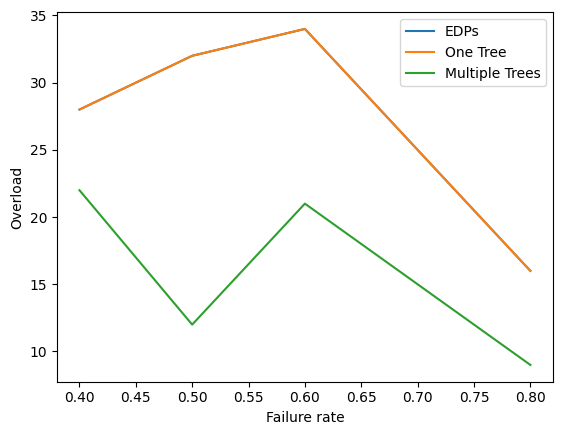

In [25]:
plt.plot(data["fail"], data['c_edp'], label='EDPs')
plt.plot(data["fail"], data['c_one'], label='One Tree')
plt.plot(data["fail"], data['c_multi'], label='Multiple Trees')
plt.xlabel("Failure rate")
plt.ylabel('Overload')
plt.legend()
plt.savefig('overload100nodes10runs.svg')

In [26]:
data_first = load_experiment(25)

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\3738776464.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_edges = random.sample(graph.edges(), number_of_failed_edges)


Graph with "25" and failre rate "0.4"
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7], [6, 4, 7], [6, 12, 7], [6, 14, 7], [6, 16, 7], [6, 17, 7], [6, 18, 7], [6, 20, 7], [6, 22, 7], [6, 23, 7], [6, 24, 7], [6, 1, 5, 7], [6, 11, 8, 7], [6, 15, 9, 7]]
EDPS : [[17, 7], [17, 0, 7], [17, 2, 7], [17, 3, 7], [17, 4, 7], [17,

Multiple berechnet
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7], [6, 4, 7], [6, 12, 7], [6, 14, 7], [6, 16, 7], [6, 17, 7], [6, 18, 7], [6, 20, 7], [6, 22, 7], [6, 23, 7], [6, 24, 7], [6, 1, 5, 7], [6, 11, 8, 7], [6, 15, 9, 7]]
EDPS : [[17, 7], [17, 0, 7], [17, 2, 7], [17, 3, 7], [17, 4, 7], [17, 5, 7], [17, 6, 7],

Multiple berechnet
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7], [6, 4, 7], [6, 12, 7], [6, 14, 7], [6, 16, 7], [6, 17, 7], [6, 18, 7], [6, 20, 7], [6, 22, 7], [6, 23, 7], [6, 24, 7], [6, 1, 5, 7], [6, 11, 8, 7], [6, 15, 9, 7]]
EDPS : [[17, 7], [17, 0, 7], [17, 2, 7], [17, 3, 7], [17, 4, 7], [17, 5, 7], [17, 6, 7],

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\3738776464.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_edges = random.sample(graph.edges(), number_of_failed_edges)


Multiple berechnet
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7], [6, 4, 7], [6, 12, 7], [6, 14, 7], [6, 16, 7], [6, 17, 7], [6, 18, 7], [6, 20, 7], [6, 22, 7], [6, 23, 7], [6, 24, 7], [6, 1, 5, 7], [6, 11, 8, 7], [6, 15, 9, 7]]
EDPS : [[17, 7], [17, 0, 7], [17, 2, 7], [17, 3, 7], [17, 4, 7], [17, 5, 7], [17, 6, 7],

One berechnet
Multiple berechnet
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7], [6, 4, 7], [6, 12, 7], [6, 14, 7], [6, 16, 7], [6, 17, 7], [6, 18, 7], [6, 20, 7], [6, 22, 7], [6, 23, 7], [6, 24, 7], [6, 1, 5, 7], [6, 11, 8, 7], [6, 15, 9, 7]]
EDPS : [[17, 7], [17, 0, 7], [17, 2, 7], [17, 3, 7], [17, 4, 7], [17, 5, 7

Multiple berechnet
Nodes is : 5
Edges is : 5
Failure is : 5
Overloaded edge edp is : 5
Overloaded edge one is : 5
Overloaded edge multi is : 5
Common edp is [7, 7, 7, 7, 7]
Common one is [7, 7, 7, 7, 7]
Common multi is [5, 5, 5, 5, 5]
Graph with "25" and failre rate "0.6"
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\3738776464.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_edges = random.sample(graph.edges(), number_of_failed_edges)


Multiple berechnet
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7], [6, 4, 7], [6, 12, 7], [6, 14, 7], [6, 16, 7], [6, 17, 7], [6, 18, 7], [6, 20, 7], [6, 22, 7], [6, 23, 7], [6, 24, 7], [6, 1, 5, 7], [6, 11, 8, 7], [6, 15, 9, 7]]
EDPS : [[17, 7], [17, 0, 7], [17, 2, 7], [17, 3, 7], [17, 4, 7], [17, 5, 7], [17, 6, 7],

Multiple berechnet
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7], [6, 4, 7], [6, 12, 7], [6, 14, 7], [6, 16, 7], [6, 17, 7], [6, 18, 7], [6, 20, 7], [6, 22, 7], [6, 23, 7], [6, 24, 7], [6, 1, 5, 7], [6, 11, 8, 7], [6, 15, 9, 7]]
EDPS : [[17, 7], [17, 0, 7], [17, 2, 7], [17, 3, 7], [17, 4, 7], [17, 5, 7], [17, 6, 7],

Multiple berechnet
Nodes is : 5
Edges is : 5
Failure is : 5
Overloaded edge edp is : 5
Overloaded edge one is : 5
Overloaded edge multi is : 5
Common edp is [9, 9, 9, 9, 9]
Common one is [9, 9, 9, 9, 9]
Common multi is [4, 4, 4, 4, 4]
Graph with "25" and failre rate "0.8"
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\3738776464.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_edges = random.sample(graph.edges(), number_of_failed_edges)


Multiple berechnet
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7], [6, 4, 7], [6, 12, 7], [6, 14, 7], [6, 16, 7], [6, 17, 7], [6, 18, 7], [6, 20, 7], [6, 22, 7], [6, 23, 7], [6, 24, 7], [6, 1, 5, 7], [6, 11, 8, 7], [6, 15, 9, 7]]
EDPS : [[17, 7], [17, 0, 7], [17, 2, 7], [17, 3, 7], [17, 4, 7], [17, 5, 7], [17, 6, 7],

Multiple berechnet
EDPS : [[23, 7], [23, 2, 7], [23, 4, 7], [23, 5, 7], [23, 6, 7], [23, 12, 7], [23, 14, 7], [23, 16, 7], [23, 18, 7], [23, 20, 7], [23, 22, 7], [23, 24, 7], [23, 1, 0, 7], [23, 10, 9, 7], [23, 11, 3, 7], [23, 13, 8, 7], [23, 21, 17, 7]]
EDPS : [[18, 7], [18, 0, 7], [18, 3, 7], [18, 4, 7], [18, 5, 7], [18, 6, 7], [18, 9, 7], [18, 14, 7], [18, 16, 7], [18, 17, 7], [18, 20, 7], [18, 22, 7], [18, 23, 7], [18, 24, 7], [18, 10, 2, 7], [18, 11, 8, 7], [18, 13, 12, 7]]
EDPS : [[2, 7], [2, 0, 7], [2, 3, 7], [2, 6, 7], [2, 8, 7], [2, 9, 7], [2, 14, 7], [2, 16, 7], [2, 17, 7], [2, 20, 7], [2, 22, 7], [2, 23, 7], [2, 24, 7], [2, 1, 4, 7], [2, 10, 5, 7], [2, 11, 12, 7], [2, 15, 18, 7]]
EDPS : [[6, 7], [6, 0, 7], [6, 2, 7], [6, 3, 7], [6, 4, 7], [6, 12, 7], [6, 14, 7], [6, 16, 7], [6, 17, 7], [6, 18, 7], [6, 20, 7], [6, 22, 7], [6, 23, 7], [6, 24, 7], [6, 1, 5, 7], [6, 11, 8, 7], [6, 15, 9, 7]]
EDPS : [[17, 7], [17, 0, 7], [17, 2, 7], [17, 3, 7], [17, 4, 7], [17, 5, 7], [17, 6, 7],

Multiple berechnet
Nodes is : 5
Edges is : 5
Failure is : 5
Overloaded edge edp is : 5
Overloaded edge one is : 5
Overloaded edge multi is : 5
Common edp is [7, 7, 7, 7, 7]
Common one is [7, 7, 7, 7, 7]
Common multi is [5, 5, 5, 5, 5]


In [29]:
data_second = load_experiment(50)

C:\Users\waill\AppData\Local\Temp\ipykernel_8652\3738776464.py:14: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  failed_edges = random.sample(graph.edges(), number_of_failed_edges)


Graph with "50" and failre rate "0.4"
EDPS : [[20, 1], [20, 0, 1], [20, 2, 1], [20, 3, 1], [20, 4, 1], [20, 5, 1], [20, 6, 1], [20, 7, 1], [20, 8, 1], [20, 12, 1], [20, 13, 1], [20, 14, 1], [20, 15, 1], [20, 16, 1], [20, 19, 1], [20, 21, 1], [20, 22, 1], [20, 23, 1], [20, 24, 1], [20, 25, 1], [20, 26, 1], [20, 28, 1], [20, 29, 1], [20, 31, 1], [20, 32, 1], [20, 33, 1], [20, 36, 1], [20, 37, 1], [20, 38, 1], [20, 40, 1], [20, 41, 1], [20, 43, 1], [20, 44, 1], [20, 46, 1], [20, 49, 1], [20, 11, 9, 1], [20, 27, 10, 1], [20, 34, 17, 1], [20, 39, 30, 1], [20, 42, 35, 1], [20, 47, 45, 1]]
EDPS : [[30, 1], [30, 0, 1], [30, 2, 1], [30, 3, 1], [30, 4, 1], [30, 5, 1], [30, 6, 1], [30, 8, 1], [30, 9, 1], [30, 10, 1], [30, 12, 1], [30, 13, 1], [30, 14, 1], [30, 19, 1], [30, 21, 1], [30, 23, 1], [30, 24, 1], [30, 25, 1], [30, 28, 1], [30, 32, 1], [30, 35, 1], [30, 36, 1], [30, 37, 1], [30, 38, 1], [30, 41, 1], [30, 44, 1], [30, 45, 1], [30, 46, 1], [30, 49, 1], [30, 11, 7, 1], [30, 18, 15, 1], [30,

EDPS : [[12, 1], [12, 2, 1], [12, 3, 1], [12, 4, 1], [12, 5, 1], [12, 6, 1], [12, 8, 1], [12, 9, 1], [12, 13, 1], [12, 15, 1], [12, 17, 1], [12, 19, 1], [12, 20, 1], [12, 21, 1], [12, 22, 1], [12, 23, 1], [12, 24, 1], [12, 26, 1], [12, 28, 1], [12, 29, 1], [12, 30, 1], [12, 31, 1], [12, 32, 1], [12, 33, 1], [12, 35, 1], [12, 36, 1], [12, 37, 1], [12, 40, 1], [12, 41, 1], [12, 44, 1], [12, 45, 1], [12, 11, 0, 1], [12, 27, 7, 1], [12, 34, 10, 1], [12, 39, 14, 1], [12, 47, 16, 1]]
EDPS : [[8, 1], [8, 0, 1], [8, 2, 1], [8, 4, 1], [8, 6, 1], [8, 7, 1], [8, 9, 1], [8, 10, 1], [8, 12, 1], [8, 14, 1], [8, 15, 1], [8, 19, 1], [8, 20, 1], [8, 21, 1], [8, 23, 1], [8, 25, 1], [8, 26, 1], [8, 28, 1], [8, 29, 1], [8, 30, 1], [8, 31, 1], [8, 32, 1], [8, 33, 1], [8, 36, 1], [8, 37, 1], [8, 38, 1], [8, 40, 1], [8, 43, 1], [8, 44, 1], [8, 45, 1], [8, 46, 1], [8, 49, 1], [8, 11, 3, 1], [8, 18, 5, 1], [8, 27, 13, 1], [8, 34, 16, 1], [8, 39, 22, 1], [8, 42, 17, 1], [8, 47, 24, 1], [8, 48, 41, 1]]
EDPS : [[

One berechnet


KeyboardInterrupt: 